# PhD Student Mental Health Project

## Overview

This notebook contains analysis of survey data conducted by Shift Learning on PhD students. The project uses multiple machine learning models such as logistic regression and decision trees to draw insights into what risk factors contribute to mental health problems in PhD students and make recommendations on how to improve. The project also include a predictive model that can be deployed to continuously monitor student mental health.

## Business Problem

PhD students are at high risk of mental health issues and have a high suicide rate. This project aims to help academia understand the risk factors in order to systematically improve student’s overall mental health. This project also makes recommendations on how to set up preventative measures for mental health issues among students.

#### End Users:
- Universities, research facilities, school mental health counselors

#### True Business Problem:

- Understand risk factors that contributes to PhD students needing help for anxiety and depression.
- create a model that helps to identify students who might need help

#### Context:
- False positive: predict that a student need help for anxiety/depression when they don't 
    - Outcome: trouble and disturbance to the student
- False negative: predict that a student doesn't need help for anxiety/depression when they actually do
    - Outcome: student not getting the help that they need

#### Model Evaluation

We will be focusing on recall because we want to minimize false negative. 

## Data Understanding

The data is aggregated by surveying and interviewing 6,320 current PhD students all over the world in 2019. There are around 60 questions about their personal information and their opinions and concerns about their PhD program.
Important questions include age, country of origin, country of study, whether/by whom they were bullied, whether/reason they need to work outside of their program, whether/which kind of discrimination the student faced, their career expectations, worries about the program/their future, etc.

We are modeling on the assumption that if students need help with anxiety and/or depression, they would ask for it. 

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import sklearn modeling tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# import CatBoost tools
import catboost
from catboost import Pool
from catboost import CatBoostClassifier

# import my own evaluate function
from utils import evaluate

# import and activate warning suppression tool
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define a function to print out information of a column
def info(label):
    '''
    input string of column name
    output comprehensive analysis of the column
    '''
    print(f'column name: {label}')
    print('     ')
    print(f'Question: {df[label][0]}')
    print('     ')
    print(f'number of null values: {df[label].isna().sum()}')
    print('     ')
    print('Value Count:')
    
    print(df[label].value_counts())

In [3]:
# function for cleaning and adding the column to list for inferential model
def process(column_name,dictionary):
    inf_df[column_name]=inf_df[column_name].map(dictionary)
    inf_col.append(column_name)

### EDA

In [4]:
# load dataframe
df=pd.read_csv('data.csv',dtype='str')

In [5]:
# check the dataframe
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


The first row is the questions.

In [6]:
# check the size of the dataset
df.shape

(6813, 274)

The dataset has 6812 data points and 274 columns. 

In [7]:
# check column names
list(df.columns)

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1',
 'Q1.a',
 'Q2',
 'Q3',
 'Q3.a',
 'Q4',
 'Q5',
 'Q6',
 'Q6.a',
 'Q7',
 'Q7.a',
 'Q8',
 'Q8.a',
 'Q9',
 'Q9.a',
 'Q10',
 'Q10.a',
 'Q11',
 'Q11.a',
 'Q12:1',
 'Q12:2',
 'Q12:3',
 'Q12:4',
 'Q12:5',
 'Q12:6',
 'Q12:7',
 'Q12:8',
 'Q12:9',
 'Q12:10',
 'Q12:11',
 'Q12.a',
 'Q13',
 'Q14',
 'Q14.a',
 'Q15.a',
 'Q15.b',
 'Q15.c',
 'Q15.d',
 'Q15.e',
 'Q15.f',
 'Q15.g',
 'Q15.h',
 'Q15.i',
 'Q15.j',
 'Q15.k',
 'Q15.l',
 'Q15.m',
 'Q15.n',
 'Q16',
 'Q17',
 'Q17.a',
 'Q18.a',
 'Q19.a',
 'Q20',
 'Q21.a',
 'Q21.b',
 'Q21.c',
 'Q21.d',
 'Q21.e',
 'Q21.f',
 'Q21.g',
 'Q21.h',
 'Q21.i',
 'Q22.a',
 'Q22.b',
 'Q22.c',
 'Q22.d',
 'Q22.e',
 'Q22.f',
 'Q22.g',
 'Q22.h',
 'Q22.i',
 'Q23',
 'Q24',
 'Q25',
 'Q25.a',
 'Q26',
 'Q27.a',
 'Q27.b',
 'Q27.c',
 'Q27.d',
 'Q27.e',
 'Q27.f',
 'Q28',
 'Q29',
 'Q29.a',
 'Q30.a',
 'Q30.b',
 'Q30.c',
 'Q30.d',
 'Q30.e',
 'Q30.f',
 'Q31',
 'Q32:1

Survey questions start from the 10th column.

In [8]:
# print out a list of the questions
question_list=list(df.columns)[9:]
for q in question_list:
    print('********')
    print(q)
    print(df[q][0])

********
Q1
Which, if any, of the following degrees are you currently studying for?
********
Q1.a
If other, please specify
********
Q2
Hidden
********
Q3
Which was the most important reason you decided to enrol in a PhD programme?
********
Q3.a
If other, please specify
********
Q4
Are you studying in the country you grew up in?   
********
Q5
Where do you currently live?
********
Q6
Which region in Asia?
********
Q6.a
If other, please specify
********
Q7
Which country in Australasia?
********
Q7.a
If other, please specify
********
Q8
Which country in Africa?
********
Q8.a
If other, please specify
********
Q9
Which country in Europe?
********
Q9.a
If other, please specify
********
Q10
Which country in North or Central America?
********
Q10.a
If other, please specify
********
Q11
Which country in South America?
********
Q11.a
If other, please specify
********
Q12:1
What prompted you to study outside your country of upbringing? 
********
Q12:2
What prompted you to study outside your count

Comprehensive exploratory data analysis was done by the original survey conductor and can be found [here](https://figshare.com/s/74a5ea79d76ad66a8af8?file=18543281).

#### Data Limitation

**Bias:**

Data can be skewed towards overrepresented classes, notably Caucasian students.

![Demographic](images/demographic.png)

**Target:**

Assume people who needs help would ask. Even though it would vastly underestimate the number of people who need help, it is the best metric we have now.

**Question Design:**

Survey questions are not specifically directed towards mental health, so the amount of information it can give is limited.

### Target

Our target column is Q28

In [9]:
# check values for target
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [10]:
df['Q28'].value_counts(normalize=True)

No                                                                          0.600000
Yes                                                                         0.356943
Prefer not to say                                                           0.042910
Have you ever sought help for anxiety or depression caused by PhD study?    0.000147
Name: Q28, dtype: float64

There are 4083 Nos and 2429 Yeses. There's a little bit of class imbalance, but not too bad.

In [11]:
# check null values
df['Q28'].isna().sum()

8

There are not many "prefer not to say"s or null values, so we can safely drop them.

In [12]:
# drop the rows that have null values in our target column
df=df.dropna(subset=['Q28'])
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


In [13]:
# drop "Prefer not to say"s
df=df[df['Q28']!='Prefer not to say']

In [14]:
# make a dictionary for mapping target column
dict_target={'Yes': 1, 'No': 0}

In [15]:
# map target column into numeric values
df['Q28']=df['Q28'].map(dict_target)

#### Features

There are two parts to this problem:
- inferential modeling:
    - figure out the risk factors for mental health issues in PhD students
- predictive modeling:
    - a model that can be put into use 

For these two approaches we need different data cleaning methods.

### Baseline Understanding

In [16]:
df['Q28'][1:].value_counts(normalize=True)

0.0    0.626996
1.0    0.373004
Name: Q28, dtype: float64

If we predict the majority class of not going to need help for anxiety/depression as a result of PhD study (assuming that if people need help, they ask for help), we will be right 62.7% of the time.

### Inferential Modeling 

For this method, I'm going to pick out features that I think might be most relevant to mental health based on common sense and clean them up individually.

The survey questions and answers can be found [here](https://figshare.com/s/74a5ea79d76ad66a8af8?file=18543278).

In [17]:
# create a new list for all the columns that we'll be using for inferential modeling
inf_col=[]

In [18]:
# create a new df for inferential modeling by dropping the non-question columns
inf_df=df.drop(columns=df.columns[:9])

In [19]:
inf_df

,Q1,Q1.a,Q2,Q3,Q3.a,Q4,Q5,Q6,Q6.a,Q7,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,"Which, if any, of the following degrees are yo...","If other, please specify",Hidden,Which was the most important reason you decide...,"If other, please specify",Are you studying in the country you grew up in...,Where do you currently live?,Which region in Asia?,"If other, please specify",Which country in Australasia?,...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,North or Central America,NaN,NaN,NaN,...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I want to pursue an academic career,NaN,No,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,Doctorate degree (PhD/DPhil/MD),NaN,NaN,Personal interest in my subject of choice,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
5,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,I think this is a great survey that all univer...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Doctorate degree (PhD/DPhil/MD),NaN,NaN,No job I want is available without a PhD,NaN,Yes,Europe,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,No,"Yes, I would like Nature Careers to contact me...",NaN,9833,NaN
6807,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I wanted to continue pursuing my research,NaN,No,North or Central America,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9834,NaN
6809,Doctorate degree (PhD/DPhil/MD),NaN,NaN,I want to pursue an academic career,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6811,Doctorate degree (PhD/DPhil/MD),NaN,NaN,Personal interest in my subject of choice,NaN,Yes,North or Central America,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


**Dual Degree**

In [20]:
info('Q1')

column name: Q1
     
Question: Which, if any, of the following degrees are you currently studying for?
     
number of null values: 0
     
Value Count:
Doctorate degree (PhD/DPhil/MD)                                            6294
Dual doctorate degree (MD-PhD, PhD-PhD or other combination)                218
Which, if any, of the following degrees are you currently studying for?       1
Name: Q1, dtype: int64


In [21]:
# create dictionary for converting values into numbers
dict_Q1={'Doctorate degree (PhD/DPhil/MD)': 0, 
         'Dual doctorate degree (MD-PhD, PhD-PhD or other combination)': 1, 
         'Which, if any, of the following degrees are you currently studying for?':'dual_degree'}

In [22]:
# change values in column Q1
inf_df['Q1']=inf_df['Q1'].replace(dict_Q1)

In [23]:
# add processed column to list
inf_col.append('Q1')

The previous two steps are going to be repeated throughout the inferential modeling cleaning process so I'll write a function for it.

**Home Country**

In [24]:
info('Q4')

column name: Q4
     
Question: Are you studying in the country you grew up in?   
     
number of null values: 0
     
Value Count:
Yes                                                   4153
 No                                                   2359
Are you studying in the country you grew up in?          1
Name: Q4, dtype: int64


In [25]:
# create dictionary for value mapping
dict_Q4={'Yes':1, 
         ' No':0,        
         'Are you studying in the country you grew up in? \xa0 ': 'home country'}

In [26]:
# process the column
process('Q4',dict_Q4)

**Ouside Job**

In [27]:
info('Q13')

column name: Q13
     
Question: Do you have a job alongside your studies?
     
number of null values: 0
     
Value Count:
No                                           5249
Yes                                          1263
Do you have a job alongside your studies?       1
Name: Q13, dtype: int64


In [28]:
# create dictionary for value mapping
dict_Q13={'Yes ':1, 
          'No':0, 
          'Do you have a job alongside your studies?': 'job'}

In [29]:
# process the column
process('Q13',dict_Q13)

**Bullying**

In [30]:
info('Q31')

column name: Q31
     
Question: Do you feel that you have experienced bullying in your PhD program?
     
number of null values: 7
     
Value Count:
No                                                                     4902
Yes                                                                    1388
Prefer not to say                                                       215
Do you feel that you have experienced bullying in your PhD program?       1
Name: Q31, dtype: int64


In [31]:
# create dictionary for value mapping
dict_Q31={'Yes':1, 
          'No': 0, 
          'Prefer not to say': 2, 
          'Do you feel that you have experienced bullying in your PhD program?': 'bullying'}

In [32]:
# process column
process('Q31',dict_Q31)

**discrimination/harrassment**

In [33]:
info('Q34')

column name: Q34
     
Question: Do you feel that you have experienced discrimination or harassment in your PhD program?
     
number of null values: 24
     
Value Count:
No                                                                                         4937
Yes                                                                                        1334
Prefer not to say                                                                           217
Do you feel that you have experienced discrimination or harassment in your PhD program?       1
Name: Q34, dtype: int64


In [34]:
# create dictionary for value mapping
dict_Q34={'Yes':1, 
          'No': 0, 
          'Prefer not to say': 2, 
          'Do you feel that you have experienced discrimination or harassment in your PhD program?': 'discrimination/harrassment'}

In [35]:
# process column
process('Q34',dict_Q34)

**Satisfaction**

In [36]:
info('Q19.a')

column name: Q19.a
     
Question: How satisfied are you with your PhD experience?
     
number of null values: 0
     
Value Count:
6                                                  2085
5                                                  1908
4 = Neither satisfied nor dissatisfied              717
3                                                   659
7 = Extremely satisfied                             592
2                                                   360
1 = Not at all satisfied                            191
How satisfied are you with your PhD experience?       1
Name: Q19.a, dtype: int64


Satisfaction is on a scale of 1 to 7, not at all satisfied to extremely satisfied. So the values just need to be reduced to numbers. 

In [37]:
# process the column values
inf_df['Q19.a'][1:]=inf_df['Q19.a'][1:].map(lambda x:int(x[0]))
# change the value of the first row 
inf_df['Q19.a'][0]='satisfaction'
# add the column to our column list
inf_col.append('Q19.a')

**Work Hours**

In [38]:
info('Q24')

column name: Q24
     
Question: On average, how many hours a week do you typically spend on your PhD programme?
     
number of null values: 0
     
Value Count:
41-50 hours                                                                        1785
51-60 hours                                                                        1609
31-40 hours                                                                         783
61-70 hours                                                                         774
71-80 hours                                                                         425
More than 80 hours                                                                  328
Less than 11 hours                                                                  287
21-30 hours                                                                         274
11-20 hours                                                                         247
On average, how many hours a week do you typi

For this column, we can just take the middle of the range and cap it at 81 hours for simplicity. 

In [39]:
# create dictionary for value mapping
dict_Q24={'41-50 hours': 45, 
          '51-60 hours': 55, 
          '31-40 hours': 35, 
          '61-70 hours': 65, 
          '71-80 hours': 75, 
          'More than 80 hours':81, 
          'Less than 11 hours': 5, 
          '21-30 hours': 25, 
          '11-20 hours': 15, 
          'On average, how many hours a week do you typically spend on your PhD programme?': 'hours_worked'}

In [40]:
# process the column
process('Q24', dict_Q24)

**Gender**

In [41]:
info('Q57')

column name: Q57
     
Question: Are you…
     
number of null values: 0
     
Value Count:
Female (including trans female)    3298
Male (including trans male)        3149
Prefer not to say                    35
Gender queer / Non binary            30
Are you…                              1
Name: Q57, dtype: int64


In [42]:
# create dictionary for value mapping
dict_Q57={'Female (including trans female)':0, 
          'Male (including trans male)': 1, 
          'Prefer not to say': 2, 
          'Gender queer / Non binary': 3, 
          'Are you…': 'gender'}

In [43]:
# process the column
process('Q57',dict_Q57)

**Age**

In [44]:
info('Q56')

column name: Q56
     
Question: What is your age?
     
number of null values: 0
     
Value Count:
25 - 34              5019
18 - 24               789
35 - 44               530
45 - 54               103
55 - 64                35
Prefer not to say      23
65 or over             13
What is your age?       1
Name: Q56, dtype: int64


Similar to the work hours column, I'll take the middle value and cap it at 65. Use majority class to fill in value for "prefer not to say".

In [45]:
# create dictionary for value mapping
dict_Q56={'25 - 34':30, 
          '18 - 24':21, 
          '35 - 44':40, 
          '45 - 54': 50, 
          '55 - 64': 60, 
          'Prefer not to say': 30, 
          '65 or over': 65, 
          'What is your age?': 'age'}

In [46]:
# process the column
process('Q56',dict_Q56)

**Expected Unemployment Time**

In [47]:
info('Q42')

column name: Q42
     
Question: After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?
     
number of null values: 0
     
Value Count:
Less than a year                                                                                                 1712
1 to 2 years                                                                                                     1258
3 to 6 years                                                                                                     1161
2 to 3 years                                                                                                     1046
Unsure                                                                                                            885
More than 6 years                                                                                                 450
After completing your PhD, how long do you think it will take you to find a permanent (non-trainee)

Similar to the age column, I'll take the middle value and cap it at 6. Use most frequent class to fill in value for "Unsure".

In [48]:
# create dictionary for value mapping
dict_Q42={'Less than a year': 0.5, 
          '1 to 2 years': 1.5, 
          '3 to 6 years': 4.5, 
          '2 to 3 years': 2.5, 
          'Unsure': 0.5, 
          'More than 6 years': 6, 
          'After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?': 'expected_unemployment_time'}

In [49]:
# process the column
process('Q42',dict_Q42)

In [50]:
# check the column list now
inf_col

['Q1', 'Q4', 'Q13', 'Q31', 'Q34', 'Q19.a', 'Q24', 'Q57', 'Q56', 'Q42']

In [51]:
# take out this subset
inf_df=inf_df[inf_col]

In [52]:
inf_df

,Q1,Q4,Q13,Q31,Q34,Q19.a,Q24,Q57,Q56,Q42
0,dual_degree,home country,job,bullying,discrimination/harrassment,satisfaction,hours_worked,gender,age,expected_unemployment_time
1,0,1,0,0,1,5,55,0,30,4.5
2,0,0,0,0,1,6,65,1,30,1.5
3,0,1,0,0,0,6,65,1,30,2.5
5,0,1,0,0,0,3,55,1,30,0.5
...,...,...,...,...,...,...,...,...,...,...
6806,0,1,0,0,0,6,45,1,21,1.5
6807,0,0,0,0,1,6,75,1,40,4.5
6809,0,1,0,0,0,4,35,0,30,0.5
6811,0,1,0,0,0,6,75,1,30,4.5


In [53]:
# make the first row column names
inf_df.columns = inf_df.iloc[0]
# drop the first row
inf_df=inf_df.drop([0])

In [54]:
# fill na for 'job', 'bullying', and 'discrimination/harrassment'
# assume all nulls are 'prefer not to say'
inf_df['bullying'].fillna(value=2,inplace=True)
inf_df['discrimination/harrassment'].fillna(value=2,inplace=True)

In [55]:
# make all the data floats
inf_df=inf_df.astype(float)

In [56]:
inf_df

,dual_degree,home country,job,bullying,discrimination/harrassment,satisfaction,hours_worked,gender,age,expected_unemployment_time
1,0.0,1.0,0.0,0.0,1.0,5.0,55.0,0.0,30.0,4.5
2,0.0,0.0,0.0,0.0,1.0,6.0,65.0,1.0,30.0,1.5
3,0.0,1.0,0.0,0.0,0.0,6.0,65.0,1.0,30.0,2.5
5,0.0,1.0,0.0,0.0,0.0,3.0,55.0,1.0,30.0,0.5
6,0.0,1.0,0.0,0.0,0.0,4.0,75.0,0.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...
6806,0.0,1.0,0.0,0.0,0.0,6.0,45.0,1.0,21.0,1.5
6807,0.0,0.0,0.0,0.0,1.0,6.0,75.0,1.0,40.0,4.5
6809,0.0,1.0,0.0,0.0,0.0,4.0,35.0,0.0,30.0,0.5
6811,0.0,1.0,0.0,0.0,0.0,6.0,75.0,1.0,30.0,4.5


#### Train Test Split (Inferential)

In [57]:
X_inf=inf_df
y_inf=df['Q28'][1:]
X_tr_inf, X_test_inf, y_tr_inf, y_test_inf = train_test_split(X_inf, y_inf, random_state=42)
X_train_inf, X_val_inf, y_train_inf, y_val_inf = train_test_split(X_tr_inf, y_tr_inf, random_state=42)

### Inferential Modeling

### Logistic Regression

#### Logistic Regression on Scaled Data for Feature Importance

In [58]:
# instantiate scaler
scaler=StandardScaler()
# fit scaler on training data and transform it
X_train_inf_scaled=scaler.fit_transform(X_train_inf)
# transform validation and test set
X_val_inf_scaled=scaler.transform(X_val_inf)
X_test_inf_scaled=scaler.transform(X_test_inf)

In [59]:
# instantiate and fit logistic regression on scaled data
lr_scaled=LogisticRegression()
lr_scaled.fit(X_train_inf_scaled,y_train_inf)

LogisticRegression()

Accuracy Score:
Train - 0.6699426699426699
Test - 0.6298116298116299
  
Precision Score:
Train - 0.6080910240202275
Test - 0.0
  
Recall Score: 
Train - 0.34855072463768116
Test - 0.0
  
F1 Score: 
Train - 0.44311377245508987
Test - 0.0
  
ROC_AUC: 
Train - 0.6063822392351786
Test - 0.5
  
  
Confusion matrix for test data


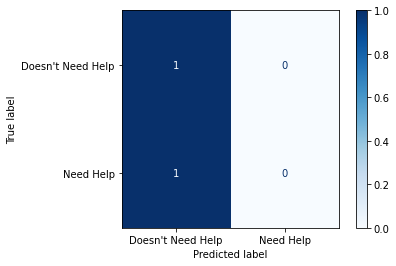

In [60]:
evaluate(lr_scaled,X_train_inf_scaled,y_train_inf, X_val_inf, y_val_inf)

In [61]:
# print out coefficient of the logistic regression model in a dataframe
coef_lr_scaled=pd.DataFrame(data=lr_scaled.coef_, columns=X_train_inf.columns).T
coef_lr_scaled

,0
0,
dual_degree,-0.000203
home country,-0.005066
job,-0.025679
bullying,0.293277
discrimination/harrassment,0.158266
satisfaction,-0.388380
hours_worked,0.011505
gender,-0.269279
age,-0.114616


In [62]:
# add a log odds column to this dataframe
coef_lr_scaled['log_odds']=coef_lr_scaled[0].map(lambda x:np.exp(x))
coef_lr_scaled

,0,log_odds
0,,
dual_degree,-0.000203,0.999797
home country,-0.005066,0.994947
job,-0.025679,0.974647
bullying,0.293277,1.340814
discrimination/harrassment,0.158266,1.171478
satisfaction,-0.388380,0.678154
hours_worked,0.011505,1.011572
gender,-0.269279,0.763930
age,-0.114616,0.891708


By scaling the data, we can see that bullying has the most impact on the model result. Now let's do a logistic regression on unscaled data to figure out the impact of this feature in terms of actual numbers.

#### Logistic Regression on Unscaled Data for Numerical Impact

Accuracy Score:
Train - 0.6693966693966694
Test - 0.6552006552006552
  
Precision Score:
Train - 0.6076433121019108
Test - 0.5584905660377358
  
Recall Score: 
Train - 0.3456521739130435
Test - 0.3274336283185841
  
F1 Score: 
Train - 0.44064665127020786
Test - 0.41283124128312415
  
ROC_AUC: 
Train - 0.6053709840217867
Test - 0.5876439923127381
  
  
Confusion matrix for test data


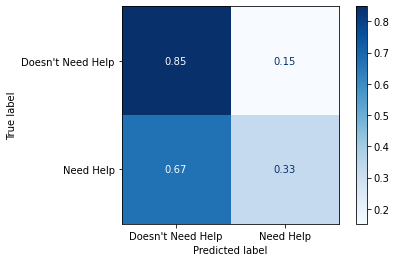

In [63]:
# instantiate logistic regression object
lr=LogisticRegression()
# fit the logistic regression
lr.fit(X_train_inf, y_train_inf)
# evaluate the model
evaluate(lr,X_train_inf,y_train_inf,X_val_inf,y_val_inf)

In [64]:
# print out coefficient of the logistic regression model in a dataframe
coef_lr=pd.DataFrame(data=lr.coef_, columns=X_train_inf.columns).T
coef_lr

,0
0,
dual_degree,-0.034009
home country,-0.005423
job,-0.071843
bullying,0.555394
discrimination/harrassment,0.302487
satisfaction,-0.264291
hours_worked,0.000697
gender,-0.500226
age,-0.020396


In [65]:
# add a log odds column to this dataframe
coef_lr['log_odds']=coef_lr[0].map(lambda x:np.exp(x))

In [66]:
coef_lr

,0,log_odds
0,,
dual_degree,-0.034009,0.966562
home country,-0.005423,0.994592
job,-0.071843,0.930677
bullying,0.555394,1.742628
discrimination/harrassment,0.302487,1.353221
satisfaction,-0.264291,0.767750
hours_worked,0.000697,1.000698
gender,-0.500226,0.606394
age,-0.020396,0.979811


**Interpretation**

holding everything else constant, the odds of needing help for anxiety and depression for students that are bullied (bullied = 1)over the odds of needing help for anxiety and depression for students that are not bullied (bullied = 0) is exp(.68) = 1.97.  In terms of percent change, we can say that the odds for getting anxiety and depression for students that are bullied are 97% higher than the odds for students that are not bullied.

#### Decision Tree

Accuracy Score:
Train - 0.6661206661206661
Test - 0.6437346437346437
  
Precision Score:
Train - 0.6288998357963875
Test - 0.5384615384615384
  
Recall Score: 
Train - 0.27753623188405796
Test - 0.26327433628318586
  
F1 Score: 
Train - 0.3851181498240322
Test - 0.3536404160475483
  
ROC_AUC: 
Train - 0.5892718391132948
Test - 0.5653172721728024
  
  
Confusion matrix for test data


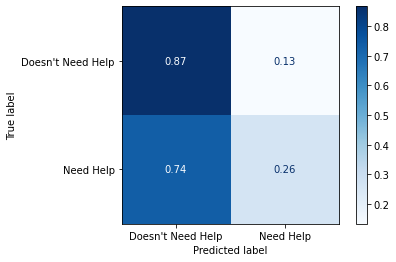

In [67]:
# instantiate, fit and evaluate decision tree model
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(X_train_inf,y_train_inf)
evaluate(dt,X_train_inf,y_train_inf,X_val_inf,y_val_inf)

In [68]:
#print out feature importance of the decision tree model in a dataframe
fi_dt=pd.DataFrame(data=dt.feature_importances_, index=X_train_inf.columns)
fi_dt

,0
0,
dual_degree,0.000000
home country,0.000000
job,0.000000
bullying,0.511641
discrimination/harrassment,0.056412
satisfaction,0.272708
hours_worked,0.000000
gender,0.159238
age,0.000000


**Interpretation**

Decision tree confirms that bullying is the most important contributor to whether a student needs help for anxiety/depression.

### Predictive Modeling

Drop columns that are totally non-related: 

There are two types of columns that needs dropping:
- columns that starts with "ID.", these are the administrative columns of when and how the survey is done.
- columns starting from Q60 are also administrative columns
- columns that are 'If other, please specify'
- columns that give away the answer, which is 'Q29' : Did you seek help for anxiety or depression within your institution? 

In [69]:
# create a list for columns that needs dropping and loop through all columns to find them
drop_list=[]
for c in list(df.columns):
    if c[:2]=='ID':
        drop_list.append(c)
    elif c[:2]=='Q6':
        drop_list.append(c)
    elif df[c][0]=='If other, please specify':
        drop_list.append(c)

In [70]:
# check drop list
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b']

In [71]:
# add question 29 because it gives out the answer
drop_list.append('Q29')
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b',
 'Q29']

In [72]:
# add question 55 because it's a another short answer column and we are not dealing with natural language processing in this project
drop_list.append('Q55')

In [73]:
# create dataframe for predictive modeling
df_pred=df.drop(columns=drop_list)

In [74]:
# fill all null values with 0
df_pred.fillna(0)

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,...,Q58:8,Q58:9,Q58:10,Q58:11,Q58:12,Q59:1,Q59:2,Q59:3,Q59:4,Q59:5
0,"Which, if any, of the following degrees are yo...",Hidden,Which was the most important reason you decide...,Are you studying in the country you grew up in...,Where do you currently live?,Which country in Australasia?,Which country in Africa?,Which country in Europe?,Which country in North or Central America?,Which country in South America?,...,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?
1,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,Mexico,0,...,0,0,0,0,0,0,0,"Yes, to an adult(s)",0,0
2,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
3,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
5,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,Europe,0,0,France,0,0,...,0,0,0,0,0,0,0,0,No,0
6807,Doctorate degree (PhD/DPhil/MD),0,I wanted to continue pursuing my research,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,"Yes, to child/children under 12",0,0,0,0
6809,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
6811,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0


In [75]:
# convert data type to string for catboost
df_pred=df_pred.astype('str')

### Train Test Split

In [76]:
# separate X and y, drop the first column because they are questions
X=df_pred.drop('Q28', axis=1)
X=X.drop(index=1)
y=df['Q28'][1:]

In [77]:
# train test split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

### CatBoost

**Untuned CatBoost**

In [78]:
# instantiate catboost object
cb=CatBoostClassifier(random_state=42, silent=True)

In [79]:
# make a list for categorical features
cat_features = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
print(cat_features)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12:1', 'Q12:2', 'Q12:3', 'Q12:4', 'Q12:5', 'Q12:6', 'Q12:7', 'Q12:8', 'Q12:9', 'Q12:10', 'Q12:11', 'Q13', 'Q14', 'Q15.a', 'Q15.b', 'Q15.c', 'Q15.d', 'Q15.e', 'Q15.f', 'Q15.g', 'Q15.h', 'Q15.i', 'Q15.j', 'Q15.k', 'Q15.l', 'Q15.m', 'Q15.n', 'Q16', 'Q17', 'Q18.a', 'Q19.a', 'Q20', 'Q21.a', 'Q21.b', 'Q21.c', 'Q21.d', 'Q21.e', 'Q21.f', 'Q21.g', 'Q21.h', 'Q21.i', 'Q22.a', 'Q22.b', 'Q22.c', 'Q22.d', 'Q22.e', 'Q22.f', 'Q22.g', 'Q22.h', 'Q22.i', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27.a', 'Q27.b', 'Q27.c', 'Q27.d', 'Q27.e', 'Q27.f', 'Q30.a', 'Q30.b', 'Q30.c', 'Q30.d', 'Q30.e', 'Q30.f', 'Q31', 'Q32:1', 'Q32:2', 'Q32:3', 'Q32:4', 'Q32:5', 'Q32:6', 'Q32:7', 'Q33', 'Q34', 'Q35:1', 'Q35:2', 'Q35:3', 'Q35:4', 'Q35:5', 'Q35:6', 'Q35:7', 'Q35:8', 'Q35:9', 'Q36.a', 'Q37.a', 'Q37.b', 'Q37.c', 'Q37.d', 'Q37.e', 'Q38.a', 'Q38.b', 'Q38.c', 'Q38.d', 'Q38.e', 'Q38.f', 'Q38.g', 'Q39:1', 'Q39:2', 'Q39:3', 'Q39:4', 'Q39:5', 'Q39:6', 'Q39:7', 'Q39:8', 'Q39:

In [80]:
# fit the model on training set
cb.fit(X_train,y_train, cat_features=cat_features)

In [81]:
# get feature importance for catboost model
cb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Q15.m,6.113318
1,Q57,3.017581
2,Q30.a,2.657536
3,Q31,2.553894
4,Q54:4,2.158595
...,...,...
221,Q58:5,0.022251
222,Q35:5,0.019389
223,Q2,0.000000
224,Q16,0.000000


Accuracy Score:
Train - 0.815997815997816
Test - 0.7125307125307125
  
Precision Score:
Train - 0.8268518518518518
Test - 0.6463768115942029
  
Recall Score: 
Train - 0.6471014492753623
Test - 0.49336283185840707
  
F1 Score: 
Train - 0.7260162601626016
Test - 0.5595984943538268
  
ROC_AUC: 
Train - 0.7825958407130207
Test - 0.6673576187900618
  
  
Confusion matrix for test data


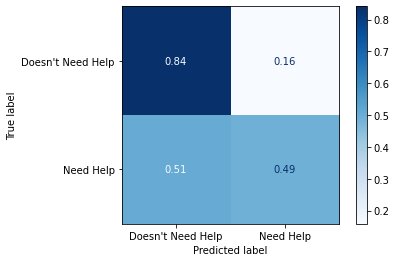

In [82]:
evaluate(cb,X_train,y_train,X_val,y_val)

The untuned catboost model is overfitted because the training accuracy is way higher than validation set accuracy.

**Tune CatBoost by Eliminating Noise Columns**

In [83]:
# code adapted from Matthew Turner, his github link (https://github.com/austint1121/Undiagnosed-ADHD-Identification)

# Select categorical features by selecting anything columns that aren't a float
categorical_features_indices = list(np.where(X_train.dtypes != float)[0])

# create catboost pool as input for this new model, select X, and y, specifying categorical columns
data = Pool(X_train, y_train, cat_features=categorical_features_indices)

# Instantiate model
model = CatBoostClassifier(random_state = 42)

# select features
summary = model.select_features(
    data,
    features_for_select=categorical_features_indices, 
    num_features_to_select=5, 
    steps=3,
    algorithm=catboost.EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=catboost.EShapCalcType.Regular,
    train_final_model=False,
    verbose=False
)

Learning rate set to 0.017935
Step #1 out of 3
Feature #1 eliminated
Feature #37 eliminated
Feature #63 eliminated
Feature #225 eliminated
Feature #81 eliminated
Feature #216 eliminated
Feature #0 eliminated
Feature #94 eliminated
Feature #110 eliminated
Feature #166 eliminated
Feature #153 eliminated
Feature #147 eliminated
Feature #219 eliminated
Feature #223 eliminated
Feature #113 eliminated
Feature #116 eliminated
Feature #222 eliminated
Feature #91 eliminated
Feature #128 eliminated
Feature #143 eliminated
Feature #17 eliminated
Feature #218 eliminated
Feature #164 eliminated
Feature #22 eliminated
Feature #151 eliminated
Feature #90 eliminated
Feature #125 eliminated
Feature #213 eliminated
Feature #138 eliminated
Feature #132 eliminated
Feature #194 eliminated
Feature #189 eliminated
Feature #83 eliminated
Feature #155 eliminated
Feature #157 eliminated
Feature #24 eliminated
Feature #217 eliminated
Feature #163 eliminated
Feature #220 eliminated
Feature #129 eliminated
Feature

Train a new model that eliminates all the feature catboost found to be redundant.

In [84]:
# Instantiate model
new_cb = CatBoostClassifier(random_state= 42)

# select features and train new model with those features
summary = new_cb.select_features(
    data,
    features_for_select=categorical_features_indices, 
    num_features_to_select=5, 
    steps=5,
    algorithm=catboost.EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=catboost.EShapCalcType.Regular,
    train_final_model=True,
    verbose=False
)

Learning rate set to 0.017935
Step #1 out of 5
Feature #1 eliminated
Feature #37 eliminated
Feature #63 eliminated
Feature #225 eliminated
Feature #81 eliminated
Feature #216 eliminated
Feature #0 eliminated
Feature #94 eliminated
Feature #110 eliminated
Feature #166 eliminated
Feature #153 eliminated
Feature #147 eliminated
Feature #219 eliminated
Feature #223 eliminated
Feature #113 eliminated
Feature #116 eliminated
Feature #222 eliminated
Feature #91 eliminated
Feature #128 eliminated
Feature #143 eliminated
Feature #17 eliminated
Feature #218 eliminated
Feature #164 eliminated
Feature #22 eliminated
Feature #151 eliminated
Feature #90 eliminated
Feature #125 eliminated
Feature #213 eliminated
Feature #138 eliminated
Feature #132 eliminated
Feature #194 eliminated
Feature #189 eliminated
Feature #83 eliminated
Feature #155 eliminated
Feature #157 eliminated
Feature #24 eliminated
Feature #217 eliminated
Feature #163 eliminated
Feature #220 eliminated
Feature #129 eliminated
Feature

Accuracy Score:
Train - 0.7654927654927655
Test - 0.6912366912366913
  
Precision Score:
Train - 0.7592039800995025
Test - 0.6132930513595166
  
Recall Score: 
Train - 0.5528985507246377
Test - 0.4491150442477876
  
F1 Score: 
Train - 0.639832285115304
Test - 0.5185185185185185
  
ROC_AUC: 
Train - 0.72344883734217
Test - 0.6413325546336467
  
  
Confusion matrix for test data


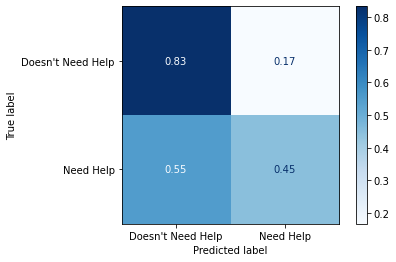

In [85]:
evaluate(new_cb,X_train,y_train,X_val,y_val)

The model is not overfitted.

#### Gridsearch CatBoost

Try gridsearch to see if there's an improvement.

In [86]:
# set up dictionary for parameters
cb_param={'learning_rate':[0.01,0.1,0.5],
          'depth':[3,7,10],
          'l2_leaf_reg':[1,5,9]}

In [87]:
# instantiate model object
gridsearch_cb=CatBoostClassifier(random_state=42)
# fit data to model object using gridsearch
result=gridsearch_cb.grid_search(cb_param, data, calc_cv_statistics=True, search_by_train_test_split=True, verbose=False)

0:	learn: 0.6914759	test: 0.6913096	best: 0.6913096 (0)	total: 49.9ms	remaining: 49.8s
1:	learn: 0.6901254	test: 0.6898500	best: 0.6898500 (1)	total: 102ms	remaining: 51s
2:	learn: 0.6885362	test: 0.6879550	best: 0.6879550 (2)	total: 141ms	remaining: 47s
3:	learn: 0.6868347	test: 0.6860660	best: 0.6860660 (3)	total: 192ms	remaining: 47.9s
4:	learn: 0.6854710	test: 0.6845787	best: 0.6845787 (4)	total: 225ms	remaining: 44.8s
5:	learn: 0.6840094	test: 0.6829461	best: 0.6829461 (5)	total: 260ms	remaining: 43.1s
6:	learn: 0.6823657	test: 0.6811539	best: 0.6811539 (6)	total: 298ms	remaining: 42.2s
7:	learn: 0.6808638	test: 0.6795243	best: 0.6795243 (7)	total: 337ms	remaining: 41.8s
8:	learn: 0.6793596	test: 0.6778006	best: 0.6778006 (8)	total: 375ms	remaining: 41.2s
9:	learn: 0.6778291	test: 0.6761141	best: 0.6761141 (9)	total: 414ms	remaining: 40.9s
10:	learn: 0.6766948	test: 0.6749349	best: 0.6749349 (10)	total: 450ms	remaining: 40.5s
11:	learn: 0.6755991	test: 0.6737278	best: 0.6737278 (1

95:	learn: 0.6160108	test: 0.6085237	best: 0.6085237 (95)	total: 3.6s	remaining: 33.9s
96:	learn: 0.6157795	test: 0.6083137	best: 0.6083137 (96)	total: 3.63s	remaining: 33.8s
97:	learn: 0.6154724	test: 0.6081031	best: 0.6081031 (97)	total: 3.67s	remaining: 33.8s
98:	learn: 0.6150993	test: 0.6078082	best: 0.6078082 (98)	total: 3.71s	remaining: 33.8s
99:	learn: 0.6148231	test: 0.6076107	best: 0.6076107 (99)	total: 3.75s	remaining: 33.7s
100:	learn: 0.6145523	test: 0.6072936	best: 0.6072936 (100)	total: 3.78s	remaining: 33.6s
101:	learn: 0.6142434	test: 0.6070406	best: 0.6070406 (101)	total: 3.82s	remaining: 33.6s
102:	learn: 0.6139042	test: 0.6067091	best: 0.6067091 (102)	total: 3.85s	remaining: 33.6s
103:	learn: 0.6135507	test: 0.6063247	best: 0.6063247 (103)	total: 3.89s	remaining: 33.5s
104:	learn: 0.6131896	test: 0.6059783	best: 0.6059783 (104)	total: 3.92s	remaining: 33.5s
105:	learn: 0.6128335	test: 0.6055239	best: 0.6055239 (105)	total: 3.96s	remaining: 33.4s
106:	learn: 0.6125122

193:	learn: 0.5926708	test: 0.5852015	best: 0.5852015 (193)	total: 7.49s	remaining: 31.1s
194:	learn: 0.5925713	test: 0.5850560	best: 0.5850560 (194)	total: 7.53s	remaining: 31.1s
195:	learn: 0.5925295	test: 0.5850430	best: 0.5850430 (195)	total: 7.57s	remaining: 31s
196:	learn: 0.5923144	test: 0.5848042	best: 0.5848042 (196)	total: 7.6s	remaining: 31s
197:	learn: 0.5921999	test: 0.5847464	best: 0.5847464 (197)	total: 7.64s	remaining: 30.9s
198:	learn: 0.5920845	test: 0.5846762	best: 0.5846762 (198)	total: 7.68s	remaining: 30.9s
199:	learn: 0.5918571	test: 0.5844616	best: 0.5844616 (199)	total: 7.71s	remaining: 30.9s
200:	learn: 0.5916789	test: 0.5843551	best: 0.5843551 (200)	total: 7.75s	remaining: 30.8s
201:	learn: 0.5915304	test: 0.5843261	best: 0.5843261 (201)	total: 7.79s	remaining: 30.8s
202:	learn: 0.5913886	test: 0.5842053	best: 0.5842053 (202)	total: 7.83s	remaining: 30.7s
203:	learn: 0.5913117	test: 0.5841604	best: 0.5841604 (203)	total: 7.87s	remaining: 30.7s
204:	learn: 0.5

289:	learn: 0.5813432	test: 0.5752156	best: 0.5752156 (289)	total: 11.1s	remaining: 27.2s
290:	learn: 0.5812312	test: 0.5750865	best: 0.5750865 (290)	total: 11.2s	remaining: 27.2s
291:	learn: 0.5810364	test: 0.5749586	best: 0.5749586 (291)	total: 11.2s	remaining: 27.2s
292:	learn: 0.5808510	test: 0.5747692	best: 0.5747692 (292)	total: 11.2s	remaining: 27.1s
293:	learn: 0.5807662	test: 0.5746814	best: 0.5746814 (293)	total: 11.3s	remaining: 27.1s
294:	learn: 0.5806502	test: 0.5746208	best: 0.5746208 (294)	total: 11.3s	remaining: 27s
295:	learn: 0.5806196	test: 0.5745640	best: 0.5745640 (295)	total: 11.4s	remaining: 27s
296:	learn: 0.5805649	test: 0.5745019	best: 0.5745019 (296)	total: 11.4s	remaining: 27s
297:	learn: 0.5805006	test: 0.5744196	best: 0.5744196 (297)	total: 11.4s	remaining: 26.9s
298:	learn: 0.5803075	test: 0.5742299	best: 0.5742299 (298)	total: 11.5s	remaining: 26.9s
299:	learn: 0.5802249	test: 0.5741224	best: 0.5741224 (299)	total: 11.5s	remaining: 26.8s
300:	learn: 0.58

386:	learn: 0.5734788	test: 0.5688663	best: 0.5688663 (386)	total: 14.8s	remaining: 23.4s
387:	learn: 0.5734588	test: 0.5688419	best: 0.5688419 (387)	total: 14.8s	remaining: 23.4s
388:	learn: 0.5733731	test: 0.5687662	best: 0.5687662 (388)	total: 14.9s	remaining: 23.4s
389:	learn: 0.5732942	test: 0.5687127	best: 0.5687127 (389)	total: 14.9s	remaining: 23.3s
390:	learn: 0.5732797	test: 0.5687061	best: 0.5687061 (390)	total: 14.9s	remaining: 23.3s
391:	learn: 0.5732192	test: 0.5686260	best: 0.5686260 (391)	total: 15s	remaining: 23.2s
392:	learn: 0.5731584	test: 0.5685843	best: 0.5685843 (392)	total: 15s	remaining: 23.2s
393:	learn: 0.5730812	test: 0.5685483	best: 0.5685483 (393)	total: 15.1s	remaining: 23.2s
394:	learn: 0.5730370	test: 0.5685137	best: 0.5685137 (394)	total: 15.1s	remaining: 23.1s
395:	learn: 0.5729369	test: 0.5685289	best: 0.5685137 (394)	total: 15.1s	remaining: 23.1s
396:	learn: 0.5728692	test: 0.5684629	best: 0.5684629 (396)	total: 15.2s	remaining: 23s
397:	learn: 0.57

478:	learn: 0.5677456	test: 0.5651208	best: 0.5651208 (478)	total: 18.2s	remaining: 19.8s
479:	learn: 0.5677012	test: 0.5650765	best: 0.5650765 (479)	total: 18.2s	remaining: 19.8s
480:	learn: 0.5676484	test: 0.5650666	best: 0.5650666 (480)	total: 18.3s	remaining: 19.7s
481:	learn: 0.5675572	test: 0.5650015	best: 0.5650015 (481)	total: 18.3s	remaining: 19.7s
482:	learn: 0.5675290	test: 0.5649659	best: 0.5649659 (482)	total: 18.4s	remaining: 19.7s
483:	learn: 0.5674919	test: 0.5649568	best: 0.5649568 (483)	total: 18.4s	remaining: 19.6s
484:	learn: 0.5674566	test: 0.5649097	best: 0.5649097 (484)	total: 18.4s	remaining: 19.6s
485:	learn: 0.5673973	test: 0.5648405	best: 0.5648405 (485)	total: 18.5s	remaining: 19.5s
486:	learn: 0.5673497	test: 0.5648013	best: 0.5648013 (486)	total: 18.5s	remaining: 19.5s
487:	learn: 0.5672927	test: 0.5647557	best: 0.5647557 (487)	total: 18.6s	remaining: 19.5s
488:	learn: 0.5672502	test: 0.5647505	best: 0.5647505 (488)	total: 18.6s	remaining: 19.4s
489:	learn

574:	learn: 0.5628606	test: 0.5626133	best: 0.5626116 (571)	total: 21.8s	remaining: 16.1s
575:	learn: 0.5628158	test: 0.5626438	best: 0.5626116 (571)	total: 21.9s	remaining: 16.1s
576:	learn: 0.5627939	test: 0.5626690	best: 0.5626116 (571)	total: 21.9s	remaining: 16.1s
577:	learn: 0.5627263	test: 0.5626646	best: 0.5626116 (571)	total: 22s	remaining: 16s
578:	learn: 0.5627051	test: 0.5626449	best: 0.5626116 (571)	total: 22s	remaining: 16s
579:	learn: 0.5626432	test: 0.5625951	best: 0.5625951 (579)	total: 22s	remaining: 16s
580:	learn: 0.5626208	test: 0.5625916	best: 0.5625916 (580)	total: 22.1s	remaining: 15.9s
581:	learn: 0.5625467	test: 0.5625832	best: 0.5625832 (581)	total: 22.1s	remaining: 15.9s
582:	learn: 0.5625142	test: 0.5625655	best: 0.5625655 (582)	total: 22.1s	remaining: 15.8s
583:	learn: 0.5624870	test: 0.5625623	best: 0.5625623 (583)	total: 22.2s	remaining: 15.8s
584:	learn: 0.5624175	test: 0.5625263	best: 0.5625263 (584)	total: 22.2s	remaining: 15.8s
585:	learn: 0.5623307	

670:	learn: 0.5581479	test: 0.5607778	best: 0.5607778 (670)	total: 25.7s	remaining: 12.6s
671:	learn: 0.5581191	test: 0.5607863	best: 0.5607778 (670)	total: 25.8s	remaining: 12.6s
672:	learn: 0.5580668	test: 0.5607642	best: 0.5607642 (672)	total: 25.8s	remaining: 12.5s
673:	learn: 0.5580215	test: 0.5607673	best: 0.5607642 (672)	total: 25.8s	remaining: 12.5s
674:	learn: 0.5580067	test: 0.5607692	best: 0.5607642 (672)	total: 25.9s	remaining: 12.5s
675:	learn: 0.5579599	test: 0.5607931	best: 0.5607642 (672)	total: 25.9s	remaining: 12.4s
676:	learn: 0.5579130	test: 0.5607450	best: 0.5607450 (676)	total: 26s	remaining: 12.4s
677:	learn: 0.5578917	test: 0.5607199	best: 0.5607199 (677)	total: 26s	remaining: 12.3s
678:	learn: 0.5578307	test: 0.5606808	best: 0.5606808 (678)	total: 26s	remaining: 12.3s
679:	learn: 0.5577743	test: 0.5605852	best: 0.5605852 (679)	total: 26.1s	remaining: 12.3s
680:	learn: 0.5577333	test: 0.5605259	best: 0.5605259 (680)	total: 26.1s	remaining: 12.2s
681:	learn: 0.55

764:	learn: 0.5541899	test: 0.5585630	best: 0.5585630 (764)	total: 29.4s	remaining: 9.04s
765:	learn: 0.5541459	test: 0.5585240	best: 0.5585240 (765)	total: 29.5s	remaining: 9s
766:	learn: 0.5540750	test: 0.5584394	best: 0.5584394 (766)	total: 29.5s	remaining: 8.96s
767:	learn: 0.5540287	test: 0.5584457	best: 0.5584394 (766)	total: 29.5s	remaining: 8.92s
768:	learn: 0.5539982	test: 0.5584583	best: 0.5584394 (766)	total: 29.6s	remaining: 8.89s
769:	learn: 0.5539155	test: 0.5584090	best: 0.5584090 (769)	total: 29.6s	remaining: 8.85s
770:	learn: 0.5538125	test: 0.5583701	best: 0.5583701 (770)	total: 29.7s	remaining: 8.81s
771:	learn: 0.5537507	test: 0.5583508	best: 0.5583508 (771)	total: 29.7s	remaining: 8.78s
772:	learn: 0.5537183	test: 0.5583208	best: 0.5583208 (772)	total: 29.8s	remaining: 8.75s
773:	learn: 0.5536574	test: 0.5582887	best: 0.5582887 (773)	total: 29.8s	remaining: 8.71s
774:	learn: 0.5536471	test: 0.5582916	best: 0.5582887 (773)	total: 29.9s	remaining: 8.68s
775:	learn: 0

859:	learn: 0.5495610	test: 0.5572062	best: 0.5571864 (856)	total: 33.3s	remaining: 5.43s
860:	learn: 0.5495147	test: 0.5572113	best: 0.5571864 (856)	total: 33.4s	remaining: 5.39s
861:	learn: 0.5495014	test: 0.5572115	best: 0.5571864 (856)	total: 33.4s	remaining: 5.35s
862:	learn: 0.5494440	test: 0.5572405	best: 0.5571864 (856)	total: 33.5s	remaining: 5.31s
863:	learn: 0.5494314	test: 0.5572482	best: 0.5571864 (856)	total: 33.5s	remaining: 5.27s
864:	learn: 0.5493909	test: 0.5572059	best: 0.5571864 (856)	total: 33.5s	remaining: 5.23s
865:	learn: 0.5493131	test: 0.5571847	best: 0.5571847 (865)	total: 33.6s	remaining: 5.19s
866:	learn: 0.5492538	test: 0.5571284	best: 0.5571284 (866)	total: 33.6s	remaining: 5.16s
867:	learn: 0.5492329	test: 0.5570856	best: 0.5570856 (867)	total: 33.6s	remaining: 5.12s
868:	learn: 0.5491617	test: 0.5570591	best: 0.5570591 (868)	total: 33.7s	remaining: 5.08s
869:	learn: 0.5491340	test: 0.5570338	best: 0.5570338 (869)	total: 33.7s	remaining: 5.04s
870:	learn

954:	learn: 0.5453130	test: 0.5560975	best: 0.5560975 (954)	total: 37s	remaining: 1.75s
955:	learn: 0.5452167	test: 0.5560978	best: 0.5560975 (954)	total: 37.1s	remaining: 1.71s
956:	learn: 0.5451833	test: 0.5560971	best: 0.5560971 (956)	total: 37.1s	remaining: 1.67s
957:	learn: 0.5451155	test: 0.5561084	best: 0.5560971 (956)	total: 37.2s	remaining: 1.63s
958:	learn: 0.5450609	test: 0.5560448	best: 0.5560448 (958)	total: 37.2s	remaining: 1.59s
959:	learn: 0.5450108	test: 0.5560295	best: 0.5560295 (959)	total: 37.2s	remaining: 1.55s
960:	learn: 0.5449306	test: 0.5559579	best: 0.5559579 (960)	total: 37.3s	remaining: 1.51s
961:	learn: 0.5448656	test: 0.5559712	best: 0.5559579 (960)	total: 37.3s	remaining: 1.47s
962:	learn: 0.5448224	test: 0.5559976	best: 0.5559579 (960)	total: 37.3s	remaining: 1.43s
963:	learn: 0.5447614	test: 0.5560048	best: 0.5559579 (960)	total: 37.4s	remaining: 1.4s
964:	learn: 0.5446674	test: 0.5559081	best: 0.5559081 (964)	total: 37.4s	remaining: 1.36s
965:	learn: 0

46:	learn: 0.5672318	test: 0.5677147	best: 0.5677147 (46)	total: 1.86s	remaining: 37.8s
47:	learn: 0.5666348	test: 0.5679404	best: 0.5677147 (46)	total: 1.9s	remaining: 37.7s
48:	learn: 0.5659801	test: 0.5674282	best: 0.5674282 (48)	total: 1.94s	remaining: 37.6s
49:	learn: 0.5656444	test: 0.5672215	best: 0.5672215 (49)	total: 1.98s	remaining: 37.5s
50:	learn: 0.5649011	test: 0.5662850	best: 0.5662850 (50)	total: 2.01s	remaining: 37.5s
51:	learn: 0.5641810	test: 0.5651711	best: 0.5651711 (51)	total: 2.05s	remaining: 37.4s
52:	learn: 0.5638233	test: 0.5647767	best: 0.5647767 (52)	total: 2.09s	remaining: 37.4s
53:	learn: 0.5634829	test: 0.5646357	best: 0.5646357 (53)	total: 2.13s	remaining: 37.3s
54:	learn: 0.5633443	test: 0.5645908	best: 0.5645908 (54)	total: 2.17s	remaining: 37.3s
55:	learn: 0.5628355	test: 0.5640354	best: 0.5640354 (55)	total: 2.21s	remaining: 37.2s
56:	learn: 0.5624414	test: 0.5641266	best: 0.5640354 (55)	total: 2.24s	remaining: 37.1s
57:	learn: 0.5620457	test: 0.5638

140:	learn: 0.5259125	test: 0.5504959	best: 0.5504914 (139)	total: 5.48s	remaining: 33.4s
141:	learn: 0.5258518	test: 0.5505850	best: 0.5504914 (139)	total: 5.52s	remaining: 33.4s
142:	learn: 0.5254799	test: 0.5506502	best: 0.5504914 (139)	total: 5.56s	remaining: 33.3s
143:	learn: 0.5250764	test: 0.5506448	best: 0.5504914 (139)	total: 5.6s	remaining: 33.3s
144:	learn: 0.5248120	test: 0.5506871	best: 0.5504914 (139)	total: 5.63s	remaining: 33.2s
145:	learn: 0.5244970	test: 0.5508290	best: 0.5504914 (139)	total: 5.68s	remaining: 33.2s
146:	learn: 0.5235910	test: 0.5501356	best: 0.5501356 (146)	total: 5.72s	remaining: 33.2s
147:	learn: 0.5233617	test: 0.5498179	best: 0.5498179 (147)	total: 5.75s	remaining: 33.1s
148:	learn: 0.5226503	test: 0.5497951	best: 0.5497951 (148)	total: 5.8s	remaining: 33.1s
149:	learn: 0.5223617	test: 0.5499071	best: 0.5497951 (148)	total: 5.85s	remaining: 33.2s
150:	learn: 0.5219054	test: 0.5495717	best: 0.5495717 (150)	total: 5.9s	remaining: 33.2s
151:	learn: 0

235:	learn: 0.4944268	test: 0.5475070	best: 0.5467286 (223)	total: 9.14s	remaining: 29.6s
236:	learn: 0.4943414	test: 0.5476468	best: 0.5467286 (223)	total: 9.18s	remaining: 29.6s
237:	learn: 0.4938865	test: 0.5477696	best: 0.5467286 (223)	total: 9.22s	remaining: 29.5s
238:	learn: 0.4931338	test: 0.5480757	best: 0.5467286 (223)	total: 9.26s	remaining: 29.5s
239:	learn: 0.4928634	test: 0.5479530	best: 0.5467286 (223)	total: 9.3s	remaining: 29.4s
240:	learn: 0.4926597	test: 0.5479606	best: 0.5467286 (223)	total: 9.33s	remaining: 29.4s
241:	learn: 0.4920885	test: 0.5480351	best: 0.5467286 (223)	total: 9.37s	remaining: 29.3s
242:	learn: 0.4917027	test: 0.5480289	best: 0.5467286 (223)	total: 9.4s	remaining: 29.3s
243:	learn: 0.4915503	test: 0.5479265	best: 0.5467286 (223)	total: 9.44s	remaining: 29.3s
244:	learn: 0.4913397	test: 0.5480078	best: 0.5467286 (223)	total: 9.48s	remaining: 29.2s
245:	learn: 0.4910848	test: 0.5479555	best: 0.5467286 (223)	total: 9.52s	remaining: 29.2s
246:	learn: 

331:	learn: 0.4666507	test: 0.5442576	best: 0.5441101 (328)	total: 13.3s	remaining: 26.8s
332:	learn: 0.4663740	test: 0.5442330	best: 0.5441101 (328)	total: 13.4s	remaining: 26.8s
333:	learn: 0.4660231	test: 0.5443745	best: 0.5441101 (328)	total: 13.4s	remaining: 26.8s
334:	learn: 0.4657453	test: 0.5444873	best: 0.5441101 (328)	total: 13.5s	remaining: 26.8s
335:	learn: 0.4654214	test: 0.5444208	best: 0.5441101 (328)	total: 13.5s	remaining: 26.7s
336:	learn: 0.4651296	test: 0.5447000	best: 0.5441101 (328)	total: 13.6s	remaining: 26.7s
337:	learn: 0.4648703	test: 0.5448298	best: 0.5441101 (328)	total: 13.6s	remaining: 26.7s
338:	learn: 0.4647932	test: 0.5448246	best: 0.5441101 (328)	total: 13.7s	remaining: 26.6s
339:	learn: 0.4647296	test: 0.5448235	best: 0.5441101 (328)	total: 13.7s	remaining: 26.6s
340:	learn: 0.4641522	test: 0.5443180	best: 0.5441101 (328)	total: 13.8s	remaining: 26.6s
341:	learn: 0.4639643	test: 0.5445106	best: 0.5441101 (328)	total: 13.8s	remaining: 26.6s
342:	learn

426:	learn: 0.4455030	test: 0.5450741	best: 0.5434932 (385)	total: 17.7s	remaining: 23.7s
427:	learn: 0.4452927	test: 0.5449806	best: 0.5434932 (385)	total: 17.7s	remaining: 23.7s
428:	learn: 0.4446765	test: 0.5451002	best: 0.5434932 (385)	total: 17.8s	remaining: 23.7s
429:	learn: 0.4445114	test: 0.5451132	best: 0.5434932 (385)	total: 17.8s	remaining: 23.6s
430:	learn: 0.4442799	test: 0.5447062	best: 0.5434932 (385)	total: 17.9s	remaining: 23.6s
431:	learn: 0.4440158	test: 0.5446773	best: 0.5434932 (385)	total: 17.9s	remaining: 23.6s
432:	learn: 0.4439306	test: 0.5447063	best: 0.5434932 (385)	total: 18s	remaining: 23.5s
433:	learn: 0.4435477	test: 0.5445548	best: 0.5434932 (385)	total: 18s	remaining: 23.5s
434:	learn: 0.4431232	test: 0.5446578	best: 0.5434932 (385)	total: 18s	remaining: 23.4s
435:	learn: 0.4425053	test: 0.5442477	best: 0.5434932 (385)	total: 18.1s	remaining: 23.4s
436:	learn: 0.4422408	test: 0.5447585	best: 0.5434932 (385)	total: 18.1s	remaining: 23.4s
437:	learn: 0.44

520:	learn: 0.4217342	test: 0.5405645	best: 0.5391490 (513)	total: 22.1s	remaining: 20.3s
521:	learn: 0.4214731	test: 0.5403963	best: 0.5391490 (513)	total: 22.2s	remaining: 20.3s
522:	learn: 0.4213057	test: 0.5400592	best: 0.5391490 (513)	total: 22.2s	remaining: 20.3s
523:	learn: 0.4210144	test: 0.5397972	best: 0.5391490 (513)	total: 22.3s	remaining: 20.2s
524:	learn: 0.4209167	test: 0.5396647	best: 0.5391490 (513)	total: 22.3s	remaining: 20.2s
525:	learn: 0.4206862	test: 0.5396194	best: 0.5391490 (513)	total: 22.4s	remaining: 20.2s
526:	learn: 0.4205051	test: 0.5396396	best: 0.5391490 (513)	total: 22.4s	remaining: 20.1s
527:	learn: 0.4204603	test: 0.5396865	best: 0.5391490 (513)	total: 22.5s	remaining: 20.1s
528:	learn: 0.4204434	test: 0.5396704	best: 0.5391490 (513)	total: 22.5s	remaining: 20.1s
529:	learn: 0.4201988	test: 0.5397506	best: 0.5391490 (513)	total: 22.6s	remaining: 20s
530:	learn: 0.4195664	test: 0.5396799	best: 0.5391490 (513)	total: 22.6s	remaining: 20s
531:	learn: 0.

613:	learn: 0.4051556	test: 0.5389447	best: 0.5385565 (601)	total: 26.5s	remaining: 16.7s
614:	learn: 0.4049237	test: 0.5389397	best: 0.5385565 (601)	total: 26.6s	remaining: 16.6s
615:	learn: 0.4046748	test: 0.5390693	best: 0.5385565 (601)	total: 26.6s	remaining: 16.6s
616:	learn: 0.4046592	test: 0.5390268	best: 0.5385565 (601)	total: 26.7s	remaining: 16.5s
617:	learn: 0.4045439	test: 0.5389668	best: 0.5385565 (601)	total: 26.7s	remaining: 16.5s
618:	learn: 0.4044417	test: 0.5388906	best: 0.5385565 (601)	total: 26.7s	remaining: 16.5s
619:	learn: 0.4040826	test: 0.5387113	best: 0.5385565 (601)	total: 26.8s	remaining: 16.4s
620:	learn: 0.4037929	test: 0.5385700	best: 0.5385565 (601)	total: 26.8s	remaining: 16.4s
621:	learn: 0.4036847	test: 0.5385705	best: 0.5385565 (601)	total: 26.9s	remaining: 16.3s
622:	learn: 0.4036401	test: 0.5384268	best: 0.5384268 (622)	total: 26.9s	remaining: 16.3s
623:	learn: 0.4036034	test: 0.5385893	best: 0.5384268 (622)	total: 27s	remaining: 16.2s
624:	learn: 

708:	learn: 0.3879657	test: 0.5385504	best: 0.5375160 (670)	total: 30.8s	remaining: 12.7s
709:	learn: 0.3878762	test: 0.5385306	best: 0.5375160 (670)	total: 30.9s	remaining: 12.6s
710:	learn: 0.3876355	test: 0.5386899	best: 0.5375160 (670)	total: 30.9s	remaining: 12.6s
711:	learn: 0.3876271	test: 0.5386903	best: 0.5375160 (670)	total: 31s	remaining: 12.5s
712:	learn: 0.3874912	test: 0.5385861	best: 0.5375160 (670)	total: 31s	remaining: 12.5s
713:	learn: 0.3873093	test: 0.5387245	best: 0.5375160 (670)	total: 31.1s	remaining: 12.4s
714:	learn: 0.3871866	test: 0.5386694	best: 0.5375160 (670)	total: 31.1s	remaining: 12.4s
715:	learn: 0.3869843	test: 0.5385390	best: 0.5375160 (670)	total: 31.1s	remaining: 12.4s
716:	learn: 0.3868819	test: 0.5385792	best: 0.5375160 (670)	total: 31.2s	remaining: 12.3s
717:	learn: 0.3867936	test: 0.5385038	best: 0.5375160 (670)	total: 31.2s	remaining: 12.3s
718:	learn: 0.3867024	test: 0.5385526	best: 0.5375160 (670)	total: 31.3s	remaining: 12.2s
719:	learn: 0.

802:	learn: 0.3741123	test: 0.5399260	best: 0.5375160 (670)	total: 35.2s	remaining: 8.64s
803:	learn: 0.3738778	test: 0.5397325	best: 0.5375160 (670)	total: 35.3s	remaining: 8.6s
804:	learn: 0.3737379	test: 0.5399042	best: 0.5375160 (670)	total: 35.3s	remaining: 8.56s
805:	learn: 0.3734088	test: 0.5396888	best: 0.5375160 (670)	total: 35.4s	remaining: 8.51s
806:	learn: 0.3733851	test: 0.5396987	best: 0.5375160 (670)	total: 35.4s	remaining: 8.47s
807:	learn: 0.3732177	test: 0.5396720	best: 0.5375160 (670)	total: 35.5s	remaining: 8.43s
808:	learn: 0.3730565	test: 0.5398111	best: 0.5375160 (670)	total: 35.5s	remaining: 8.38s
809:	learn: 0.3729256	test: 0.5397949	best: 0.5375160 (670)	total: 35.6s	remaining: 8.34s
810:	learn: 0.3727174	test: 0.5397230	best: 0.5375160 (670)	total: 35.6s	remaining: 8.3s
811:	learn: 0.3725079	test: 0.5398282	best: 0.5375160 (670)	total: 35.6s	remaining: 8.25s
812:	learn: 0.3722967	test: 0.5398872	best: 0.5375160 (670)	total: 35.7s	remaining: 8.21s
813:	learn: 

897:	learn: 0.3566180	test: 0.5431318	best: 0.5375160 (670)	total: 39.6s	remaining: 4.5s
898:	learn: 0.3565381	test: 0.5429580	best: 0.5375160 (670)	total: 39.7s	remaining: 4.46s
899:	learn: 0.3565231	test: 0.5429619	best: 0.5375160 (670)	total: 39.7s	remaining: 4.41s
900:	learn: 0.3561361	test: 0.5431349	best: 0.5375160 (670)	total: 39.8s	remaining: 4.37s
901:	learn: 0.3559303	test: 0.5432188	best: 0.5375160 (670)	total: 39.8s	remaining: 4.32s
902:	learn: 0.3556190	test: 0.5431717	best: 0.5375160 (670)	total: 39.8s	remaining: 4.28s
903:	learn: 0.3554975	test: 0.5431644	best: 0.5375160 (670)	total: 39.9s	remaining: 4.24s
904:	learn: 0.3552204	test: 0.5431911	best: 0.5375160 (670)	total: 39.9s	remaining: 4.19s
905:	learn: 0.3549477	test: 0.5431545	best: 0.5375160 (670)	total: 40s	remaining: 4.15s
906:	learn: 0.3549178	test: 0.5431420	best: 0.5375160 (670)	total: 40s	remaining: 4.1s
907:	learn: 0.3548852	test: 0.5431407	best: 0.5375160 (670)	total: 40.1s	remaining: 4.06s
908:	learn: 0.35

990:	learn: 0.3424328	test: 0.5414958	best: 0.5375160 (670)	total: 44.1s	remaining: 400ms
991:	learn: 0.3419685	test: 0.5417422	best: 0.5375160 (670)	total: 44.1s	remaining: 356ms
992:	learn: 0.3416548	test: 0.5418722	best: 0.5375160 (670)	total: 44.1s	remaining: 311ms
993:	learn: 0.3415334	test: 0.5418379	best: 0.5375160 (670)	total: 44.2s	remaining: 267ms
994:	learn: 0.3414979	test: 0.5418653	best: 0.5375160 (670)	total: 44.2s	remaining: 222ms
995:	learn: 0.3413639	test: 0.5420910	best: 0.5375160 (670)	total: 44.3s	remaining: 178ms
996:	learn: 0.3413547	test: 0.5420903	best: 0.5375160 (670)	total: 44.3s	remaining: 133ms
997:	learn: 0.3410570	test: 0.5424087	best: 0.5375160 (670)	total: 44.4s	remaining: 88.9ms
998:	learn: 0.3409604	test: 0.5423862	best: 0.5375160 (670)	total: 44.4s	remaining: 44.5ms
999:	learn: 0.3408365	test: 0.5423903	best: 0.5375160 (670)	total: 44.5s	remaining: 0us

bestTest = 0.5375159893
bestIteration = 670

0:	learn: 0.6320693	test: 0.6235710	best: 0.6235710 (0

86:	learn: 0.4562861	test: 0.5712511	best: 0.5489326 (44)	total: 3.14s	remaining: 32.9s
87:	learn: 0.4543595	test: 0.5718696	best: 0.5489326 (44)	total: 3.17s	remaining: 32.9s
88:	learn: 0.4535972	test: 0.5716971	best: 0.5489326 (44)	total: 3.21s	remaining: 32.9s
89:	learn: 0.4534766	test: 0.5714360	best: 0.5489326 (44)	total: 3.25s	remaining: 32.9s
90:	learn: 0.4512711	test: 0.5738373	best: 0.5489326 (44)	total: 3.29s	remaining: 32.8s
91:	learn: 0.4509449	test: 0.5736899	best: 0.5489326 (44)	total: 3.32s	remaining: 32.8s
92:	learn: 0.4473837	test: 0.5756426	best: 0.5489326 (44)	total: 3.36s	remaining: 32.7s
93:	learn: 0.4456902	test: 0.5748201	best: 0.5489326 (44)	total: 3.39s	remaining: 32.7s
94:	learn: 0.4447802	test: 0.5742728	best: 0.5489326 (44)	total: 3.43s	remaining: 32.7s
95:	learn: 0.4439004	test: 0.5745404	best: 0.5489326 (44)	total: 3.46s	remaining: 32.6s
96:	learn: 0.4433739	test: 0.5748581	best: 0.5489326 (44)	total: 3.5s	remaining: 32.6s
97:	learn: 0.4433516	test: 0.5748

184:	learn: 0.3747252	test: 0.5819269	best: 0.5489326 (44)	total: 6.97s	remaining: 30.7s
185:	learn: 0.3738674	test: 0.5820183	best: 0.5489326 (44)	total: 7.01s	remaining: 30.7s
186:	learn: 0.3732784	test: 0.5822886	best: 0.5489326 (44)	total: 7.04s	remaining: 30.6s
187:	learn: 0.3731015	test: 0.5822333	best: 0.5489326 (44)	total: 7.08s	remaining: 30.6s
188:	learn: 0.3724368	test: 0.5827103	best: 0.5489326 (44)	total: 7.11s	remaining: 30.5s
189:	learn: 0.3715170	test: 0.5823395	best: 0.5489326 (44)	total: 7.15s	remaining: 30.5s
190:	learn: 0.3709912	test: 0.5824851	best: 0.5489326 (44)	total: 7.18s	remaining: 30.4s
191:	learn: 0.3703138	test: 0.5806993	best: 0.5489326 (44)	total: 7.22s	remaining: 30.4s
192:	learn: 0.3697586	test: 0.5802467	best: 0.5489326 (44)	total: 7.25s	remaining: 30.3s
193:	learn: 0.3697314	test: 0.5802953	best: 0.5489326 (44)	total: 7.29s	remaining: 30.3s
194:	learn: 0.3691771	test: 0.5817436	best: 0.5489326 (44)	total: 7.33s	remaining: 30.3s
195:	learn: 0.3689915

277:	learn: 0.3136958	test: 0.5989265	best: 0.5489326 (44)	total: 10.3s	remaining: 26.7s
278:	learn: 0.3132055	test: 0.5994304	best: 0.5489326 (44)	total: 10.3s	remaining: 26.6s
279:	learn: 0.3128544	test: 0.5994396	best: 0.5489326 (44)	total: 10.3s	remaining: 26.6s
280:	learn: 0.3127204	test: 0.5996301	best: 0.5489326 (44)	total: 10.4s	remaining: 26.6s
281:	learn: 0.3123908	test: 0.5990201	best: 0.5489326 (44)	total: 10.4s	remaining: 26.5s
282:	learn: 0.3118355	test: 0.5985752	best: 0.5489326 (44)	total: 10.5s	remaining: 26.5s
283:	learn: 0.3110575	test: 0.5986610	best: 0.5489326 (44)	total: 10.5s	remaining: 26.4s
284:	learn: 0.3103187	test: 0.6009384	best: 0.5489326 (44)	total: 10.5s	remaining: 26.4s
285:	learn: 0.3088330	test: 0.6004346	best: 0.5489326 (44)	total: 10.6s	remaining: 26.4s
286:	learn: 0.3084511	test: 0.5993772	best: 0.5489326 (44)	total: 10.6s	remaining: 26.3s
287:	learn: 0.3082929	test: 0.5995591	best: 0.5489326 (44)	total: 10.6s	remaining: 26.3s
288:	learn: 0.3080471

374:	learn: 0.2684749	test: 0.6102399	best: 0.5489326 (44)	total: 13.8s	remaining: 22.9s
375:	learn: 0.2681402	test: 0.6110297	best: 0.5489326 (44)	total: 13.8s	remaining: 22.9s
376:	learn: 0.2679391	test: 0.6110573	best: 0.5489326 (44)	total: 13.8s	remaining: 22.9s
377:	learn: 0.2669388	test: 0.6126050	best: 0.5489326 (44)	total: 13.9s	remaining: 22.8s
378:	learn: 0.2666947	test: 0.6136819	best: 0.5489326 (44)	total: 13.9s	remaining: 22.8s
379:	learn: 0.2666693	test: 0.6136922	best: 0.5489326 (44)	total: 13.9s	remaining: 22.8s
380:	learn: 0.2665286	test: 0.6137056	best: 0.5489326 (44)	total: 14s	remaining: 22.7s
381:	learn: 0.2663354	test: 0.6135911	best: 0.5489326 (44)	total: 14s	remaining: 22.7s
382:	learn: 0.2659079	test: 0.6142171	best: 0.5489326 (44)	total: 14.1s	remaining: 22.7s
383:	learn: 0.2653923	test: 0.6134014	best: 0.5489326 (44)	total: 14.1s	remaining: 22.6s
384:	learn: 0.2648282	test: 0.6142566	best: 0.5489326 (44)	total: 14.2s	remaining: 22.6s
385:	learn: 0.2646029	tes

468:	learn: 0.2300772	test: 0.6332078	best: 0.5489326 (44)	total: 17.7s	remaining: 20s
469:	learn: 0.2298057	test: 0.6338848	best: 0.5489326 (44)	total: 17.7s	remaining: 20s
470:	learn: 0.2290836	test: 0.6329613	best: 0.5489326 (44)	total: 17.8s	remaining: 19.9s
471:	learn: 0.2282731	test: 0.6327685	best: 0.5489326 (44)	total: 17.8s	remaining: 19.9s
472:	learn: 0.2280812	test: 0.6327170	best: 0.5489326 (44)	total: 17.9s	remaining: 19.9s
473:	learn: 0.2274931	test: 0.6335269	best: 0.5489326 (44)	total: 17.9s	remaining: 19.9s
474:	learn: 0.2272907	test: 0.6327209	best: 0.5489326 (44)	total: 17.9s	remaining: 19.8s
475:	learn: 0.2266352	test: 0.6327165	best: 0.5489326 (44)	total: 18s	remaining: 19.8s
476:	learn: 0.2264507	test: 0.6336951	best: 0.5489326 (44)	total: 18s	remaining: 19.8s
477:	learn: 0.2260873	test: 0.6338652	best: 0.5489326 (44)	total: 18.1s	remaining: 19.8s
478:	learn: 0.2260870	test: 0.6338696	best: 0.5489326 (44)	total: 18.1s	remaining: 19.7s
479:	learn: 0.2259645	test: 0

562:	learn: 0.1980345	test: 0.6561775	best: 0.5489326 (44)	total: 22s	remaining: 17.1s
563:	learn: 0.1974785	test: 0.6558683	best: 0.5489326 (44)	total: 22s	remaining: 17s
564:	learn: 0.1971937	test: 0.6563267	best: 0.5489326 (44)	total: 22.1s	remaining: 17s
565:	learn: 0.1968968	test: 0.6568917	best: 0.5489326 (44)	total: 22.1s	remaining: 17s
566:	learn: 0.1961545	test: 0.6562201	best: 0.5489326 (44)	total: 22.2s	remaining: 16.9s
567:	learn: 0.1957790	test: 0.6571168	best: 0.5489326 (44)	total: 22.2s	remaining: 16.9s
568:	learn: 0.1953765	test: 0.6570824	best: 0.5489326 (44)	total: 22.3s	remaining: 16.9s
569:	learn: 0.1945846	test: 0.6579623	best: 0.5489326 (44)	total: 22.3s	remaining: 16.8s
570:	learn: 0.1944704	test: 0.6577547	best: 0.5489326 (44)	total: 22.3s	remaining: 16.8s
571:	learn: 0.1942287	test: 0.6578389	best: 0.5489326 (44)	total: 22.4s	remaining: 16.8s
572:	learn: 0.1939338	test: 0.6569070	best: 0.5489326 (44)	total: 22.4s	remaining: 16.7s
573:	learn: 0.1937449	test: 0.6

656:	learn: 0.1715528	test: 0.6680988	best: 0.5489326 (44)	total: 26.3s	remaining: 13.7s
657:	learn: 0.1713441	test: 0.6685222	best: 0.5489326 (44)	total: 26.4s	remaining: 13.7s
658:	learn: 0.1710824	test: 0.6673439	best: 0.5489326 (44)	total: 26.4s	remaining: 13.7s
659:	learn: 0.1710321	test: 0.6665359	best: 0.5489326 (44)	total: 26.4s	remaining: 13.6s
660:	learn: 0.1706189	test: 0.6680203	best: 0.5489326 (44)	total: 26.5s	remaining: 13.6s
661:	learn: 0.1701468	test: 0.6671017	best: 0.5489326 (44)	total: 26.5s	remaining: 13.5s
662:	learn: 0.1694527	test: 0.6675631	best: 0.5489326 (44)	total: 26.6s	remaining: 13.5s
663:	learn: 0.1688230	test: 0.6675200	best: 0.5489326 (44)	total: 26.6s	remaining: 13.5s
664:	learn: 0.1685174	test: 0.6676159	best: 0.5489326 (44)	total: 26.7s	remaining: 13.4s
665:	learn: 0.1682660	test: 0.6667936	best: 0.5489326 (44)	total: 26.7s	remaining: 13.4s
666:	learn: 0.1678663	test: 0.6664093	best: 0.5489326 (44)	total: 26.8s	remaining: 13.4s
667:	learn: 0.1676844

752:	learn: 0.1477363	test: 0.6882483	best: 0.5489326 (44)	total: 30.1s	remaining: 9.87s
753:	learn: 0.1473867	test: 0.6880052	best: 0.5489326 (44)	total: 30.1s	remaining: 9.82s
754:	learn: 0.1470770	test: 0.6880129	best: 0.5489326 (44)	total: 30.2s	remaining: 9.78s
755:	learn: 0.1468450	test: 0.6881530	best: 0.5489326 (44)	total: 30.2s	remaining: 9.74s
756:	learn: 0.1468017	test: 0.6886868	best: 0.5489326 (44)	total: 30.2s	remaining: 9.7s
757:	learn: 0.1462337	test: 0.6894274	best: 0.5489326 (44)	total: 30.3s	remaining: 9.66s
758:	learn: 0.1460093	test: 0.6903903	best: 0.5489326 (44)	total: 30.3s	remaining: 9.62s
759:	learn: 0.1456667	test: 0.6900121	best: 0.5489326 (44)	total: 30.3s	remaining: 9.58s
760:	learn: 0.1453350	test: 0.6914072	best: 0.5489326 (44)	total: 30.4s	remaining: 9.54s
761:	learn: 0.1449815	test: 0.6908728	best: 0.5489326 (44)	total: 30.4s	remaining: 9.49s
762:	learn: 0.1446954	test: 0.6900444	best: 0.5489326 (44)	total: 30.4s	remaining: 9.45s
763:	learn: 0.1445208	

846:	learn: 0.1259394	test: 0.6892054	best: 0.5489326 (44)	total: 33.4s	remaining: 6.04s
847:	learn: 0.1256664	test: 0.6900862	best: 0.5489326 (44)	total: 33.5s	remaining: 6s
848:	learn: 0.1256430	test: 0.6901668	best: 0.5489326 (44)	total: 33.5s	remaining: 5.96s
849:	learn: 0.1255862	test: 0.6906877	best: 0.5489326 (44)	total: 33.5s	remaining: 5.92s
850:	learn: 0.1252161	test: 0.6908625	best: 0.5489326 (44)	total: 33.6s	remaining: 5.88s
851:	learn: 0.1250576	test: 0.6914699	best: 0.5489326 (44)	total: 33.6s	remaining: 5.84s
852:	learn: 0.1249868	test: 0.6911468	best: 0.5489326 (44)	total: 33.6s	remaining: 5.8s
853:	learn: 0.1248348	test: 0.6918405	best: 0.5489326 (44)	total: 33.7s	remaining: 5.76s
854:	learn: 0.1247606	test: 0.6918750	best: 0.5489326 (44)	total: 33.7s	remaining: 5.72s
855:	learn: 0.1247432	test: 0.6918840	best: 0.5489326 (44)	total: 33.7s	remaining: 5.68s
856:	learn: 0.1245536	test: 0.6915744	best: 0.5489326 (44)	total: 33.8s	remaining: 5.64s
857:	learn: 0.1242422	tes

941:	learn: 0.1098937	test: 0.6976191	best: 0.5489326 (44)	total: 36.8s	remaining: 2.27s
942:	learn: 0.1096772	test: 0.6981616	best: 0.5489326 (44)	total: 36.9s	remaining: 2.23s
943:	learn: 0.1095979	test: 0.6975659	best: 0.5489326 (44)	total: 36.9s	remaining: 2.19s
944:	learn: 0.1095963	test: 0.6975622	best: 0.5489326 (44)	total: 36.9s	remaining: 2.15s
945:	learn: 0.1095673	test: 0.6979957	best: 0.5489326 (44)	total: 37s	remaining: 2.11s
946:	learn: 0.1094522	test: 0.6977611	best: 0.5489326 (44)	total: 37s	remaining: 2.07s
947:	learn: 0.1093076	test: 0.6977325	best: 0.5489326 (44)	total: 37s	remaining: 2.03s
948:	learn: 0.1093065	test: 0.6977365	best: 0.5489326 (44)	total: 37.1s	remaining: 1.99s
949:	learn: 0.1089717	test: 0.6988301	best: 0.5489326 (44)	total: 37.1s	remaining: 1.95s
950:	learn: 0.1087684	test: 0.6986829	best: 0.5489326 (44)	total: 37.1s	remaining: 1.91s
951:	learn: 0.1086984	test: 0.6985776	best: 0.5489326 (44)	total: 37.2s	remaining: 1.87s
952:	learn: 0.1084022	test:

34:	learn: 0.6500114	test: 0.6453248	best: 0.6453248 (34)	total: 1.24s	remaining: 34.1s
35:	learn: 0.6490260	test: 0.6442484	best: 0.6442484 (35)	total: 1.27s	remaining: 34s
36:	learn: 0.6481012	test: 0.6432542	best: 0.6432542 (36)	total: 1.3s	remaining: 33.9s
37:	learn: 0.6471568	test: 0.6423420	best: 0.6423420 (37)	total: 1.34s	remaining: 33.8s
38:	learn: 0.6465010	test: 0.6416175	best: 0.6416175 (38)	total: 1.37s	remaining: 33.9s
39:	learn: 0.6457116	test: 0.6406800	best: 0.6406800 (39)	total: 1.41s	remaining: 33.9s
40:	learn: 0.6450073	test: 0.6399237	best: 0.6399237 (40)	total: 1.45s	remaining: 33.9s
41:	learn: 0.6443780	test: 0.6393498	best: 0.6393498 (41)	total: 1.48s	remaining: 33.8s
42:	learn: 0.6434951	test: 0.6383486	best: 0.6383486 (42)	total: 1.52s	remaining: 33.8s
43:	learn: 0.6427471	test: 0.6375698	best: 0.6375698 (43)	total: 1.55s	remaining: 33.8s
44:	learn: 0.6418866	test: 0.6366033	best: 0.6366033 (44)	total: 1.59s	remaining: 33.7s
45:	learn: 0.6412155	test: 0.635808

132:	learn: 0.6049851	test: 0.5973826	best: 0.5973826 (132)	total: 4.64s	remaining: 30.2s
133:	learn: 0.6047733	test: 0.5971704	best: 0.5971704 (133)	total: 4.67s	remaining: 30.2s
134:	learn: 0.6045668	test: 0.5969419	best: 0.5969419 (134)	total: 4.71s	remaining: 30.2s
135:	learn: 0.6042974	test: 0.5966598	best: 0.5966598 (135)	total: 4.74s	remaining: 30.1s
136:	learn: 0.6040353	test: 0.5963979	best: 0.5963979 (136)	total: 4.78s	remaining: 30.1s
137:	learn: 0.6038259	test: 0.5961294	best: 0.5961294 (137)	total: 4.81s	remaining: 30s
138:	learn: 0.6035542	test: 0.5958816	best: 0.5958816 (138)	total: 4.85s	remaining: 30s
139:	learn: 0.6033090	test: 0.5956271	best: 0.5956271 (139)	total: 4.88s	remaining: 30s
140:	learn: 0.6030441	test: 0.5953305	best: 0.5953305 (140)	total: 4.91s	remaining: 29.9s
141:	learn: 0.6028212	test: 0.5950622	best: 0.5950622 (141)	total: 4.95s	remaining: 29.9s
142:	learn: 0.6026835	test: 0.5949310	best: 0.5949310 (142)	total: 4.98s	remaining: 29.9s
143:	learn: 0.60

225:	learn: 0.5886807	test: 0.5815847	best: 0.5815847 (225)	total: 7.9s	remaining: 27.1s
226:	learn: 0.5885545	test: 0.5814582	best: 0.5814582 (226)	total: 7.93s	remaining: 27s
227:	learn: 0.5883599	test: 0.5813185	best: 0.5813185 (227)	total: 7.97s	remaining: 27s
228:	learn: 0.5882509	test: 0.5811354	best: 0.5811354 (228)	total: 8s	remaining: 26.9s
229:	learn: 0.5880565	test: 0.5809509	best: 0.5809509 (229)	total: 8.03s	remaining: 26.9s
230:	learn: 0.5878847	test: 0.5808636	best: 0.5808636 (230)	total: 8.07s	remaining: 26.9s
231:	learn: 0.5878099	test: 0.5808243	best: 0.5808243 (231)	total: 8.1s	remaining: 26.8s
232:	learn: 0.5877074	test: 0.5807431	best: 0.5807431 (232)	total: 8.14s	remaining: 26.8s
233:	learn: 0.5876456	test: 0.5806626	best: 0.5806626 (233)	total: 8.17s	remaining: 26.7s
234:	learn: 0.5874500	test: 0.5805100	best: 0.5805100 (234)	total: 8.21s	remaining: 26.7s
235:	learn: 0.5873847	test: 0.5803878	best: 0.5803878 (235)	total: 8.24s	remaining: 26.7s
236:	learn: 0.58726

317:	learn: 0.5789927	test: 0.5733038	best: 0.5733038 (317)	total: 11.1s	remaining: 23.7s
318:	learn: 0.5789609	test: 0.5732667	best: 0.5732667 (318)	total: 11.1s	remaining: 23.7s
319:	learn: 0.5788935	test: 0.5731963	best: 0.5731963 (319)	total: 11.1s	remaining: 23.7s
320:	learn: 0.5788427	test: 0.5732033	best: 0.5731963 (319)	total: 11.2s	remaining: 23.6s
321:	learn: 0.5787332	test: 0.5731140	best: 0.5731140 (321)	total: 11.2s	remaining: 23.6s
322:	learn: 0.5786692	test: 0.5730622	best: 0.5730622 (322)	total: 11.2s	remaining: 23.6s
323:	learn: 0.5785216	test: 0.5730417	best: 0.5730417 (323)	total: 11.3s	remaining: 23.5s
324:	learn: 0.5784548	test: 0.5729473	best: 0.5729473 (324)	total: 11.3s	remaining: 23.5s
325:	learn: 0.5783755	test: 0.5729507	best: 0.5729473 (324)	total: 11.3s	remaining: 23.5s
326:	learn: 0.5783178	test: 0.5729102	best: 0.5729102 (326)	total: 11.4s	remaining: 23.4s
327:	learn: 0.5782655	test: 0.5728480	best: 0.5728480 (327)	total: 11.4s	remaining: 23.4s
328:	learn

412:	learn: 0.5720592	test: 0.5683792	best: 0.5683792 (412)	total: 14.4s	remaining: 20.5s
413:	learn: 0.5719965	test: 0.5683473	best: 0.5683473 (413)	total: 14.4s	remaining: 20.4s
414:	learn: 0.5718822	test: 0.5682544	best: 0.5682544 (414)	total: 14.5s	remaining: 20.4s
415:	learn: 0.5718149	test: 0.5682056	best: 0.5682056 (415)	total: 14.5s	remaining: 20.4s
416:	learn: 0.5717132	test: 0.5681648	best: 0.5681648 (416)	total: 14.5s	remaining: 20.3s
417:	learn: 0.5716645	test: 0.5681751	best: 0.5681648 (416)	total: 14.6s	remaining: 20.3s
418:	learn: 0.5716591	test: 0.5681742	best: 0.5681648 (416)	total: 14.6s	remaining: 20.2s
419:	learn: 0.5716194	test: 0.5681531	best: 0.5681531 (419)	total: 14.6s	remaining: 20.2s
420:	learn: 0.5715303	test: 0.5681087	best: 0.5681087 (420)	total: 14.7s	remaining: 20.2s
421:	learn: 0.5714291	test: 0.5680532	best: 0.5680532 (421)	total: 14.7s	remaining: 20.1s
422:	learn: 0.5713534	test: 0.5679781	best: 0.5679781 (422)	total: 14.7s	remaining: 20.1s
423:	learn

506:	learn: 0.5664358	test: 0.5650075	best: 0.5650075 (506)	total: 17.8s	remaining: 17.3s
507:	learn: 0.5663882	test: 0.5649713	best: 0.5649713 (507)	total: 17.9s	remaining: 17.3s
508:	learn: 0.5663263	test: 0.5649457	best: 0.5649457 (508)	total: 17.9s	remaining: 17.3s
509:	learn: 0.5662389	test: 0.5649226	best: 0.5649226 (509)	total: 17.9s	remaining: 17.2s
510:	learn: 0.5662116	test: 0.5648927	best: 0.5648927 (510)	total: 18s	remaining: 17.2s
511:	learn: 0.5661806	test: 0.5648637	best: 0.5648637 (511)	total: 18s	remaining: 17.2s
512:	learn: 0.5661113	test: 0.5648153	best: 0.5648153 (512)	total: 18s	remaining: 17.1s
513:	learn: 0.5660705	test: 0.5648080	best: 0.5648080 (513)	total: 18.1s	remaining: 17.1s
514:	learn: 0.5659838	test: 0.5646821	best: 0.5646821 (514)	total: 18.1s	remaining: 17.1s
515:	learn: 0.5659719	test: 0.5646802	best: 0.5646802 (515)	total: 18.1s	remaining: 17s
516:	learn: 0.5659049	test: 0.5647131	best: 0.5646802 (515)	total: 18.2s	remaining: 17s
517:	learn: 0.565895

602:	learn: 0.5622302	test: 0.5629354	best: 0.5629354 (602)	total: 21.2s	remaining: 13.9s
603:	learn: 0.5621832	test: 0.5629476	best: 0.5629354 (602)	total: 21.2s	remaining: 13.9s
604:	learn: 0.5621372	test: 0.5629497	best: 0.5629354 (602)	total: 21.3s	remaining: 13.9s
605:	learn: 0.5620785	test: 0.5629696	best: 0.5629354 (602)	total: 21.3s	remaining: 13.8s
606:	learn: 0.5620663	test: 0.5629698	best: 0.5629354 (602)	total: 21.3s	remaining: 13.8s
607:	learn: 0.5620158	test: 0.5629431	best: 0.5629354 (602)	total: 21.4s	remaining: 13.8s
608:	learn: 0.5619609	test: 0.5628799	best: 0.5628799 (608)	total: 21.4s	remaining: 13.7s
609:	learn: 0.5618412	test: 0.5627902	best: 0.5627902 (609)	total: 21.4s	remaining: 13.7s
610:	learn: 0.5617843	test: 0.5627603	best: 0.5627603 (610)	total: 21.5s	remaining: 13.7s
611:	learn: 0.5617422	test: 0.5627078	best: 0.5627078 (611)	total: 21.5s	remaining: 13.6s
612:	learn: 0.5617021	test: 0.5627184	best: 0.5627078 (611)	total: 21.5s	remaining: 13.6s
613:	learn

695:	learn: 0.5581087	test: 0.5610300	best: 0.5610300 (695)	total: 24.5s	remaining: 10.7s
696:	learn: 0.5580684	test: 0.5610043	best: 0.5610043 (696)	total: 24.5s	remaining: 10.7s
697:	learn: 0.5580603	test: 0.5610081	best: 0.5610043 (696)	total: 24.6s	remaining: 10.6s
698:	learn: 0.5580492	test: 0.5609983	best: 0.5609983 (698)	total: 24.6s	remaining: 10.6s
699:	learn: 0.5580102	test: 0.5609630	best: 0.5609630 (699)	total: 24.6s	remaining: 10.6s
700:	learn: 0.5579683	test: 0.5609463	best: 0.5609463 (700)	total: 24.7s	remaining: 10.5s
701:	learn: 0.5579359	test: 0.5609367	best: 0.5609367 (701)	total: 24.7s	remaining: 10.5s
702:	learn: 0.5579088	test: 0.5609394	best: 0.5609367 (701)	total: 24.7s	remaining: 10.5s
703:	learn: 0.5578848	test: 0.5609623	best: 0.5609367 (701)	total: 24.8s	remaining: 10.4s
704:	learn: 0.5578273	test: 0.5609943	best: 0.5609367 (701)	total: 24.8s	remaining: 10.4s
705:	learn: 0.5577779	test: 0.5609265	best: 0.5609265 (705)	total: 24.8s	remaining: 10.3s
706:	learn

791:	learn: 0.5538584	test: 0.5593496	best: 0.5593483 (785)	total: 27.9s	remaining: 7.33s
792:	learn: 0.5537892	test: 0.5593106	best: 0.5593106 (792)	total: 28s	remaining: 7.3s
793:	learn: 0.5537014	test: 0.5593133	best: 0.5593106 (792)	total: 28s	remaining: 7.26s
794:	learn: 0.5536839	test: 0.5593180	best: 0.5593106 (792)	total: 28s	remaining: 7.23s
795:	learn: 0.5536265	test: 0.5593394	best: 0.5593106 (792)	total: 28.1s	remaining: 7.19s
796:	learn: 0.5535836	test: 0.5593482	best: 0.5593106 (792)	total: 28.1s	remaining: 7.16s
797:	learn: 0.5535765	test: 0.5593485	best: 0.5593106 (792)	total: 28.1s	remaining: 7.12s
798:	learn: 0.5535379	test: 0.5593251	best: 0.5593106 (792)	total: 28.2s	remaining: 7.09s
799:	learn: 0.5535348	test: 0.5593229	best: 0.5593106 (792)	total: 28.2s	remaining: 7.05s
800:	learn: 0.5534861	test: 0.5593320	best: 0.5593106 (792)	total: 28.2s	remaining: 7.01s
801:	learn: 0.5533896	test: 0.5592845	best: 0.5592845 (801)	total: 28.3s	remaining: 6.97s
802:	learn: 0.553

886:	learn: 0.5492744	test: 0.5580876	best: 0.5580876 (886)	total: 31.3s	remaining: 3.99s
887:	learn: 0.5492612	test: 0.5580896	best: 0.5580876 (886)	total: 31.3s	remaining: 3.95s
888:	learn: 0.5492471	test: 0.5581021	best: 0.5580876 (886)	total: 31.4s	remaining: 3.92s
889:	learn: 0.5492325	test: 0.5581023	best: 0.5580876 (886)	total: 31.4s	remaining: 3.88s
890:	learn: 0.5491604	test: 0.5580955	best: 0.5580876 (886)	total: 31.4s	remaining: 3.85s
891:	learn: 0.5490853	test: 0.5581019	best: 0.5580876 (886)	total: 31.5s	remaining: 3.81s
892:	learn: 0.5490629	test: 0.5580875	best: 0.5580875 (892)	total: 31.5s	remaining: 3.78s
893:	learn: 0.5490229	test: 0.5580621	best: 0.5580621 (893)	total: 31.6s	remaining: 3.74s
894:	learn: 0.5490024	test: 0.5580526	best: 0.5580526 (894)	total: 31.6s	remaining: 3.71s
895:	learn: 0.5489351	test: 0.5580580	best: 0.5580526 (894)	total: 31.6s	remaining: 3.67s
896:	learn: 0.5489204	test: 0.5580243	best: 0.5580243 (896)	total: 31.7s	remaining: 3.63s
897:	learn

983:	learn: 0.5447425	test: 0.5565129	best: 0.5565129 (983)	total: 34.8s	remaining: 566ms
984:	learn: 0.5447215	test: 0.5565211	best: 0.5565129 (983)	total: 34.8s	remaining: 531ms
985:	learn: 0.5446765	test: 0.5565182	best: 0.5565129 (983)	total: 34.9s	remaining: 495ms
986:	learn: 0.5446478	test: 0.5565345	best: 0.5565129 (983)	total: 34.9s	remaining: 460ms
987:	learn: 0.5446231	test: 0.5565368	best: 0.5565129 (983)	total: 35s	remaining: 425ms
988:	learn: 0.5445936	test: 0.5565494	best: 0.5565129 (983)	total: 35s	remaining: 389ms
989:	learn: 0.5445844	test: 0.5565465	best: 0.5565129 (983)	total: 35s	remaining: 354ms
990:	learn: 0.5445327	test: 0.5565153	best: 0.5565129 (983)	total: 35.1s	remaining: 319ms
991:	learn: 0.5444510	test: 0.5564899	best: 0.5564899 (991)	total: 35.1s	remaining: 283ms
992:	learn: 0.5443936	test: 0.5564569	best: 0.5564569 (992)	total: 35.1s	remaining: 248ms
993:	learn: 0.5442670	test: 0.5564185	best: 0.5564185 (993)	total: 35.2s	remaining: 212ms
994:	learn: 0.54

80:	learn: 0.5542506	test: 0.5592995	best: 0.5592995 (80)	total: 2.95s	remaining: 33.4s
81:	learn: 0.5539176	test: 0.5590864	best: 0.5590864 (81)	total: 2.98s	remaining: 33.4s
82:	learn: 0.5534746	test: 0.5586479	best: 0.5586479 (82)	total: 3.02s	remaining: 33.3s
83:	learn: 0.5531182	test: 0.5584688	best: 0.5584688 (83)	total: 3.05s	remaining: 33.3s
84:	learn: 0.5528555	test: 0.5580774	best: 0.5580774 (84)	total: 3.08s	remaining: 33.2s
85:	learn: 0.5525803	test: 0.5581800	best: 0.5580774 (84)	total: 3.12s	remaining: 33.1s
86:	learn: 0.5513457	test: 0.5567262	best: 0.5567262 (86)	total: 3.15s	remaining: 33.1s
87:	learn: 0.5510200	test: 0.5565329	best: 0.5565329 (87)	total: 3.19s	remaining: 33.1s
88:	learn: 0.5507146	test: 0.5565365	best: 0.5565329 (87)	total: 3.22s	remaining: 33s
89:	learn: 0.5502841	test: 0.5566113	best: 0.5565329 (87)	total: 3.26s	remaining: 33s
90:	learn: 0.5497842	test: 0.5563146	best: 0.5563146 (90)	total: 3.29s	remaining: 32.9s
91:	learn: 0.5497392	test: 0.5562976

174:	learn: 0.5163251	test: 0.5509008	best: 0.5500717 (162)	total: 6.29s	remaining: 29.6s
175:	learn: 0.5158713	test: 0.5500687	best: 0.5500687 (175)	total: 6.32s	remaining: 29.6s
176:	learn: 0.5148147	test: 0.5495720	best: 0.5495720 (176)	total: 6.35s	remaining: 29.5s
177:	learn: 0.5145880	test: 0.5495876	best: 0.5495720 (176)	total: 6.39s	remaining: 29.5s
178:	learn: 0.5144119	test: 0.5496945	best: 0.5495720 (176)	total: 6.42s	remaining: 29.5s
179:	learn: 0.5142257	test: 0.5497401	best: 0.5495720 (176)	total: 6.46s	remaining: 29.4s
180:	learn: 0.5135673	test: 0.5498191	best: 0.5495720 (176)	total: 6.5s	remaining: 29.4s
181:	learn: 0.5130191	test: 0.5499667	best: 0.5495720 (176)	total: 6.53s	remaining: 29.4s
182:	learn: 0.5129481	test: 0.5499457	best: 0.5495720 (176)	total: 6.57s	remaining: 29.3s
183:	learn: 0.5127130	test: 0.5499372	best: 0.5495720 (176)	total: 6.61s	remaining: 29.3s
184:	learn: 0.5124851	test: 0.5499731	best: 0.5495720 (176)	total: 6.65s	remaining: 29.3s
185:	learn:

266:	learn: 0.4915681	test: 0.5501949	best: 0.5493169 (210)	total: 9.59s	remaining: 26.3s
267:	learn: 0.4909996	test: 0.5502587	best: 0.5493169 (210)	total: 9.62s	remaining: 26.3s
268:	learn: 0.4908029	test: 0.5498640	best: 0.5493169 (210)	total: 9.66s	remaining: 26.2s
269:	learn: 0.4903911	test: 0.5498702	best: 0.5493169 (210)	total: 9.69s	remaining: 26.2s
270:	learn: 0.4902731	test: 0.5498267	best: 0.5493169 (210)	total: 9.73s	remaining: 26.2s
271:	learn: 0.4902365	test: 0.5498422	best: 0.5493169 (210)	total: 9.77s	remaining: 26.1s
272:	learn: 0.4900354	test: 0.5498737	best: 0.5493169 (210)	total: 9.8s	remaining: 26.1s
273:	learn: 0.4898222	test: 0.5497899	best: 0.5493169 (210)	total: 9.84s	remaining: 26.1s
274:	learn: 0.4895245	test: 0.5497080	best: 0.5493169 (210)	total: 9.88s	remaining: 26s
275:	learn: 0.4893793	test: 0.5497612	best: 0.5493169 (210)	total: 9.91s	remaining: 26s
276:	learn: 0.4890118	test: 0.5499686	best: 0.5493169 (210)	total: 9.94s	remaining: 26s
277:	learn: 0.488

359:	learn: 0.4676620	test: 0.5494366	best: 0.5489985 (356)	total: 12.9s	remaining: 23s
360:	learn: 0.4672645	test: 0.5495453	best: 0.5489985 (356)	total: 13s	remaining: 23s
361:	learn: 0.4669411	test: 0.5496335	best: 0.5489985 (356)	total: 13s	remaining: 22.9s
362:	learn: 0.4666975	test: 0.5495728	best: 0.5489985 (356)	total: 13.1s	remaining: 22.9s
363:	learn: 0.4666011	test: 0.5496176	best: 0.5489985 (356)	total: 13.1s	remaining: 22.9s
364:	learn: 0.4662800	test: 0.5495858	best: 0.5489985 (356)	total: 13.1s	remaining: 22.8s
365:	learn: 0.4657979	test: 0.5495653	best: 0.5489985 (356)	total: 13.2s	remaining: 22.8s
366:	learn: 0.4656087	test: 0.5495838	best: 0.5489985 (356)	total: 13.2s	remaining: 22.8s
367:	learn: 0.4655489	test: 0.5495282	best: 0.5489985 (356)	total: 13.2s	remaining: 22.7s
368:	learn: 0.4651423	test: 0.5495593	best: 0.5489985 (356)	total: 13.3s	remaining: 22.7s
369:	learn: 0.4648553	test: 0.5499330	best: 0.5489985 (356)	total: 13.3s	remaining: 22.7s
370:	learn: 0.4645

455:	learn: 0.4462446	test: 0.5507075	best: 0.5489985 (356)	total: 16.3s	remaining: 19.5s
456:	learn: 0.4461835	test: 0.5506747	best: 0.5489985 (356)	total: 16.4s	remaining: 19.5s
457:	learn: 0.4461520	test: 0.5506737	best: 0.5489985 (356)	total: 16.4s	remaining: 19.4s
458:	learn: 0.4458221	test: 0.5505276	best: 0.5489985 (356)	total: 16.5s	remaining: 19.4s
459:	learn: 0.4457367	test: 0.5505268	best: 0.5489985 (356)	total: 16.5s	remaining: 19.4s
460:	learn: 0.4455276	test: 0.5505761	best: 0.5489985 (356)	total: 16.5s	remaining: 19.3s
461:	learn: 0.4451425	test: 0.5505703	best: 0.5489985 (356)	total: 16.6s	remaining: 19.3s
462:	learn: 0.4449622	test: 0.5506237	best: 0.5489985 (356)	total: 16.6s	remaining: 19.3s
463:	learn: 0.4446768	test: 0.5507674	best: 0.5489985 (356)	total: 16.7s	remaining: 19.2s
464:	learn: 0.4444275	test: 0.5506720	best: 0.5489985 (356)	total: 16.7s	remaining: 19.2s
465:	learn: 0.4441179	test: 0.5506624	best: 0.5489985 (356)	total: 16.7s	remaining: 19.2s
466:	learn

551:	learn: 0.4281978	test: 0.5541692	best: 0.5489985 (356)	total: 19.8s	remaining: 16.1s
552:	learn: 0.4281057	test: 0.5541213	best: 0.5489985 (356)	total: 19.8s	remaining: 16s
553:	learn: 0.4279484	test: 0.5538496	best: 0.5489985 (356)	total: 19.9s	remaining: 16s
554:	learn: 0.4276731	test: 0.5538748	best: 0.5489985 (356)	total: 19.9s	remaining: 16s
555:	learn: 0.4274439	test: 0.5532886	best: 0.5489985 (356)	total: 19.9s	remaining: 15.9s
556:	learn: 0.4272656	test: 0.5534601	best: 0.5489985 (356)	total: 20s	remaining: 15.9s
557:	learn: 0.4270929	test: 0.5535756	best: 0.5489985 (356)	total: 20s	remaining: 15.8s
558:	learn: 0.4268918	test: 0.5536251	best: 0.5489985 (356)	total: 20s	remaining: 15.8s
559:	learn: 0.4267964	test: 0.5535848	best: 0.5489985 (356)	total: 20.1s	remaining: 15.8s
560:	learn: 0.4267653	test: 0.5535941	best: 0.5489985 (356)	total: 20.1s	remaining: 15.7s
561:	learn: 0.4266054	test: 0.5535777	best: 0.5489985 (356)	total: 20.2s	remaining: 15.7s
562:	learn: 0.4265523	

647:	learn: 0.4092218	test: 0.5561220	best: 0.5489985 (356)	total: 23.3s	remaining: 12.6s
648:	learn: 0.4091620	test: 0.5561652	best: 0.5489985 (356)	total: 23.3s	remaining: 12.6s
649:	learn: 0.4091242	test: 0.5561359	best: 0.5489985 (356)	total: 23.4s	remaining: 12.6s
650:	learn: 0.4089882	test: 0.5561148	best: 0.5489985 (356)	total: 23.4s	remaining: 12.5s
651:	learn: 0.4089489	test: 0.5561019	best: 0.5489985 (356)	total: 23.4s	remaining: 12.5s
652:	learn: 0.4089186	test: 0.5562295	best: 0.5489985 (356)	total: 23.5s	remaining: 12.5s
653:	learn: 0.4086325	test: 0.5566373	best: 0.5489985 (356)	total: 23.5s	remaining: 12.4s
654:	learn: 0.4085718	test: 0.5564619	best: 0.5489985 (356)	total: 23.5s	remaining: 12.4s
655:	learn: 0.4083068	test: 0.5562962	best: 0.5489985 (356)	total: 23.6s	remaining: 12.4s
656:	learn: 0.4081683	test: 0.5562606	best: 0.5489985 (356)	total: 23.6s	remaining: 12.3s
657:	learn: 0.4081659	test: 0.5562610	best: 0.5489985 (356)	total: 23.6s	remaining: 12.3s
658:	learn

740:	learn: 0.3933474	test: 0.5580861	best: 0.5489985 (356)	total: 26.6s	remaining: 9.29s
741:	learn: 0.3933207	test: 0.5580543	best: 0.5489985 (356)	total: 26.6s	remaining: 9.26s
742:	learn: 0.3930474	test: 0.5580814	best: 0.5489985 (356)	total: 26.7s	remaining: 9.23s
743:	learn: 0.3929975	test: 0.5581820	best: 0.5489985 (356)	total: 26.7s	remaining: 9.19s
744:	learn: 0.3929915	test: 0.5582085	best: 0.5489985 (356)	total: 26.7s	remaining: 9.15s
745:	learn: 0.3928438	test: 0.5581682	best: 0.5489985 (356)	total: 26.8s	remaining: 9.12s
746:	learn: 0.3927099	test: 0.5580840	best: 0.5489985 (356)	total: 26.8s	remaining: 9.09s
747:	learn: 0.3926872	test: 0.5580759	best: 0.5489985 (356)	total: 26.9s	remaining: 9.05s
748:	learn: 0.3926828	test: 0.5580774	best: 0.5489985 (356)	total: 26.9s	remaining: 9.01s
749:	learn: 0.3926658	test: 0.5580865	best: 0.5489985 (356)	total: 26.9s	remaining: 8.97s
750:	learn: 0.3926281	test: 0.5580805	best: 0.5489985 (356)	total: 27s	remaining: 8.94s
751:	learn: 

833:	learn: 0.3807014	test: 0.5580446	best: 0.5489985 (356)	total: 29.9s	remaining: 5.95s
834:	learn: 0.3806428	test: 0.5581921	best: 0.5489985 (356)	total: 29.9s	remaining: 5.91s
835:	learn: 0.3804266	test: 0.5583990	best: 0.5489985 (356)	total: 30s	remaining: 5.88s
836:	learn: 0.3803820	test: 0.5584254	best: 0.5489985 (356)	total: 30s	remaining: 5.84s
837:	learn: 0.3803575	test: 0.5584300	best: 0.5489985 (356)	total: 30s	remaining: 5.8s
838:	learn: 0.3802883	test: 0.5584492	best: 0.5489985 (356)	total: 30.1s	remaining: 5.77s
839:	learn: 0.3800501	test: 0.5584537	best: 0.5489985 (356)	total: 30.1s	remaining: 5.73s
840:	learn: 0.3798382	test: 0.5583580	best: 0.5489985 (356)	total: 30.1s	remaining: 5.7s
841:	learn: 0.3798113	test: 0.5583471	best: 0.5489985 (356)	total: 30.2s	remaining: 5.66s
842:	learn: 0.3797600	test: 0.5583207	best: 0.5489985 (356)	total: 30.2s	remaining: 5.62s
843:	learn: 0.3796223	test: 0.5588109	best: 0.5489985 (356)	total: 30.2s	remaining: 5.59s
844:	learn: 0.3794

931:	learn: 0.3655653	test: 0.5594710	best: 0.5489985 (356)	total: 33.4s	remaining: 2.44s
932:	learn: 0.3653382	test: 0.5594458	best: 0.5489985 (356)	total: 33.4s	remaining: 2.4s
933:	learn: 0.3651764	test: 0.5593699	best: 0.5489985 (356)	total: 33.5s	remaining: 2.37s
934:	learn: 0.3650570	test: 0.5594085	best: 0.5489985 (356)	total: 33.5s	remaining: 2.33s
935:	learn: 0.3648974	test: 0.5593907	best: 0.5489985 (356)	total: 33.6s	remaining: 2.29s
936:	learn: 0.3647714	test: 0.5594254	best: 0.5489985 (356)	total: 33.6s	remaining: 2.26s
937:	learn: 0.3646005	test: 0.5595087	best: 0.5489985 (356)	total: 33.6s	remaining: 2.22s
938:	learn: 0.3644503	test: 0.5596064	best: 0.5489985 (356)	total: 33.7s	remaining: 2.19s
939:	learn: 0.3643010	test: 0.5596404	best: 0.5489985 (356)	total: 33.7s	remaining: 2.15s
940:	learn: 0.3640848	test: 0.5595702	best: 0.5489985 (356)	total: 33.7s	remaining: 2.11s
941:	learn: 0.3635328	test: 0.5601882	best: 0.5489985 (356)	total: 33.8s	remaining: 2.08s
942:	learn:

28:	learn: 0.5397058	test: 0.5667610	best: 0.5667610 (28)	total: 1.07s	remaining: 36s
29:	learn: 0.5357325	test: 0.5648677	best: 0.5648677 (29)	total: 1.11s	remaining: 35.9s
30:	learn: 0.5352047	test: 0.5648275	best: 0.5648275 (30)	total: 1.15s	remaining: 35.8s
31:	learn: 0.5329737	test: 0.5651068	best: 0.5648275 (30)	total: 1.18s	remaining: 35.8s
32:	learn: 0.5318166	test: 0.5666149	best: 0.5648275 (30)	total: 1.22s	remaining: 35.7s
33:	learn: 0.5289544	test: 0.5670364	best: 0.5648275 (30)	total: 1.25s	remaining: 35.6s
34:	learn: 0.5286402	test: 0.5673278	best: 0.5648275 (30)	total: 1.28s	remaining: 35.4s
35:	learn: 0.5275123	test: 0.5680044	best: 0.5648275 (30)	total: 1.32s	remaining: 35.3s
36:	learn: 0.5254250	test: 0.5662610	best: 0.5648275 (30)	total: 1.35s	remaining: 35.2s
37:	learn: 0.5248656	test: 0.5656387	best: 0.5648275 (30)	total: 1.39s	remaining: 35.1s
38:	learn: 0.5223887	test: 0.5668008	best: 0.5648275 (30)	total: 1.42s	remaining: 35s
39:	learn: 0.5189207	test: 0.5683489

126:	learn: 0.4262636	test: 0.5884172	best: 0.5648275 (30)	total: 4.51s	remaining: 31s
127:	learn: 0.4258948	test: 0.5884402	best: 0.5648275 (30)	total: 4.55s	remaining: 31s
128:	learn: 0.4244100	test: 0.5882604	best: 0.5648275 (30)	total: 4.59s	remaining: 31s
129:	learn: 0.4240393	test: 0.5878053	best: 0.5648275 (30)	total: 4.62s	remaining: 30.9s
130:	learn: 0.4231570	test: 0.5874048	best: 0.5648275 (30)	total: 4.66s	remaining: 30.9s
131:	learn: 0.4217759	test: 0.5860815	best: 0.5648275 (30)	total: 4.69s	remaining: 30.9s
132:	learn: 0.4206418	test: 0.5867658	best: 0.5648275 (30)	total: 4.73s	remaining: 30.8s
133:	learn: 0.4197195	test: 0.5874376	best: 0.5648275 (30)	total: 4.76s	remaining: 30.8s
134:	learn: 0.4192619	test: 0.5874887	best: 0.5648275 (30)	total: 4.8s	remaining: 30.7s
135:	learn: 0.4181722	test: 0.5861065	best: 0.5648275 (30)	total: 4.83s	remaining: 30.7s
136:	learn: 0.4178590	test: 0.5860316	best: 0.5648275 (30)	total: 4.87s	remaining: 30.7s
137:	learn: 0.4177989	test: 

224:	learn: 0.3670380	test: 0.5952806	best: 0.5648275 (30)	total: 8.05s	remaining: 27.7s
225:	learn: 0.3669843	test: 0.5952981	best: 0.5648275 (30)	total: 8.09s	remaining: 27.7s
226:	learn: 0.3664100	test: 0.5952888	best: 0.5648275 (30)	total: 8.12s	remaining: 27.6s
227:	learn: 0.3656989	test: 0.5956891	best: 0.5648275 (30)	total: 8.15s	remaining: 27.6s
228:	learn: 0.3653768	test: 0.5956872	best: 0.5648275 (30)	total: 8.19s	remaining: 27.6s
229:	learn: 0.3653698	test: 0.5956874	best: 0.5648275 (30)	total: 8.22s	remaining: 27.5s
230:	learn: 0.3647447	test: 0.5956315	best: 0.5648275 (30)	total: 8.26s	remaining: 27.5s
231:	learn: 0.3646800	test: 0.5956334	best: 0.5648275 (30)	total: 8.29s	remaining: 27.5s
232:	learn: 0.3637571	test: 0.5977015	best: 0.5648275 (30)	total: 8.34s	remaining: 27.5s
233:	learn: 0.3636270	test: 0.5975172	best: 0.5648275 (30)	total: 8.38s	remaining: 27.4s
234:	learn: 0.3624906	test: 0.5977818	best: 0.5648275 (30)	total: 8.41s	remaining: 27.4s
235:	learn: 0.3614055

318:	learn: 0.3179813	test: 0.6166760	best: 0.5648275 (30)	total: 11.4s	remaining: 24.4s
319:	learn: 0.3174058	test: 0.6149258	best: 0.5648275 (30)	total: 11.5s	remaining: 24.3s
320:	learn: 0.3172223	test: 0.6149263	best: 0.5648275 (30)	total: 11.5s	remaining: 24.3s
321:	learn: 0.3163438	test: 0.6153617	best: 0.5648275 (30)	total: 11.5s	remaining: 24.3s
322:	learn: 0.3150992	test: 0.6156858	best: 0.5648275 (30)	total: 11.6s	remaining: 24.2s
323:	learn: 0.3143943	test: 0.6138295	best: 0.5648275 (30)	total: 11.6s	remaining: 24.2s
324:	learn: 0.3140997	test: 0.6136438	best: 0.5648275 (30)	total: 11.6s	remaining: 24.2s
325:	learn: 0.3140161	test: 0.6136415	best: 0.5648275 (30)	total: 11.7s	remaining: 24.1s
326:	learn: 0.3139548	test: 0.6136451	best: 0.5648275 (30)	total: 11.7s	remaining: 24.1s
327:	learn: 0.3137986	test: 0.6139123	best: 0.5648275 (30)	total: 11.7s	remaining: 24s
328:	learn: 0.3137019	test: 0.6139195	best: 0.5648275 (30)	total: 11.8s	remaining: 24s
329:	learn: 0.3135740	tes

411:	learn: 0.2810315	test: 0.6237936	best: 0.5648275 (30)	total: 14.7s	remaining: 21s
412:	learn: 0.2802402	test: 0.6243204	best: 0.5648275 (30)	total: 14.8s	remaining: 21s
413:	learn: 0.2801995	test: 0.6243090	best: 0.5648275 (30)	total: 14.8s	remaining: 20.9s
414:	learn: 0.2797464	test: 0.6243614	best: 0.5648275 (30)	total: 14.8s	remaining: 20.9s
415:	learn: 0.2790642	test: 0.6249788	best: 0.5648275 (30)	total: 14.9s	remaining: 20.9s
416:	learn: 0.2789621	test: 0.6252685	best: 0.5648275 (30)	total: 14.9s	remaining: 20.8s
417:	learn: 0.2782157	test: 0.6248536	best: 0.5648275 (30)	total: 14.9s	remaining: 20.8s
418:	learn: 0.2774744	test: 0.6229480	best: 0.5648275 (30)	total: 15s	remaining: 20.8s
419:	learn: 0.2771646	test: 0.6235980	best: 0.5648275 (30)	total: 15s	remaining: 20.7s
420:	learn: 0.2759373	test: 0.6248108	best: 0.5648275 (30)	total: 15s	remaining: 20.7s
421:	learn: 0.2749909	test: 0.6252723	best: 0.5648275 (30)	total: 15.1s	remaining: 20.7s
422:	learn: 0.2736196	test: 0.6

506:	learn: 0.2384032	test: 0.6296469	best: 0.5648275 (30)	total: 18.6s	remaining: 18.1s
507:	learn: 0.2382169	test: 0.6296588	best: 0.5648275 (30)	total: 18.6s	remaining: 18s
508:	learn: 0.2376401	test: 0.6307440	best: 0.5648275 (30)	total: 18.6s	remaining: 18s
509:	learn: 0.2371634	test: 0.6305251	best: 0.5648275 (30)	total: 18.7s	remaining: 17.9s
510:	learn: 0.2367770	test: 0.6299988	best: 0.5648275 (30)	total: 18.7s	remaining: 17.9s
511:	learn: 0.2365881	test: 0.6302688	best: 0.5648275 (30)	total: 18.8s	remaining: 17.9s
512:	learn: 0.2360185	test: 0.6305422	best: 0.5648275 (30)	total: 18.8s	remaining: 17.8s
513:	learn: 0.2358747	test: 0.6306972	best: 0.5648275 (30)	total: 18.8s	remaining: 17.8s
514:	learn: 0.2358690	test: 0.6306958	best: 0.5648275 (30)	total: 18.9s	remaining: 17.8s
515:	learn: 0.2347155	test: 0.6320539	best: 0.5648275 (30)	total: 18.9s	remaining: 17.7s
516:	learn: 0.2341507	test: 0.6326654	best: 0.5648275 (30)	total: 18.9s	remaining: 17.7s
517:	learn: 0.2336132	tes

604:	learn: 0.2097076	test: 0.6363854	best: 0.5648275 (30)	total: 22.1s	remaining: 14.4s
605:	learn: 0.2094798	test: 0.6363817	best: 0.5648275 (30)	total: 22.1s	remaining: 14.4s
606:	learn: 0.2093277	test: 0.6363668	best: 0.5648275 (30)	total: 22.2s	remaining: 14.4s
607:	learn: 0.2089792	test: 0.6357474	best: 0.5648275 (30)	total: 22.2s	remaining: 14.3s
608:	learn: 0.2089792	test: 0.6357473	best: 0.5648275 (30)	total: 22.2s	remaining: 14.3s
609:	learn: 0.2089688	test: 0.6357457	best: 0.5648275 (30)	total: 22.3s	remaining: 14.2s
610:	learn: 0.2088284	test: 0.6349070	best: 0.5648275 (30)	total: 22.3s	remaining: 14.2s
611:	learn: 0.2087955	test: 0.6348202	best: 0.5648275 (30)	total: 22.3s	remaining: 14.2s
612:	learn: 0.2085027	test: 0.6348282	best: 0.5648275 (30)	total: 22.4s	remaining: 14.1s
613:	learn: 0.2078968	test: 0.6356565	best: 0.5648275 (30)	total: 22.4s	remaining: 14.1s
614:	learn: 0.2073909	test: 0.6359502	best: 0.5648275 (30)	total: 22.5s	remaining: 14.1s
615:	learn: 0.2072615

697:	learn: 0.1815350	test: 0.6434601	best: 0.5648275 (30)	total: 25.9s	remaining: 11.2s
698:	learn: 0.1811824	test: 0.6431293	best: 0.5648275 (30)	total: 26s	remaining: 11.2s
699:	learn: 0.1809828	test: 0.6430311	best: 0.5648275 (30)	total: 26s	remaining: 11.2s
700:	learn: 0.1806436	test: 0.6434207	best: 0.5648275 (30)	total: 26.1s	remaining: 11.1s
701:	learn: 0.1803359	test: 0.6447990	best: 0.5648275 (30)	total: 26.1s	remaining: 11.1s
702:	learn: 0.1800248	test: 0.6444216	best: 0.5648275 (30)	total: 26.2s	remaining: 11.1s
703:	learn: 0.1792663	test: 0.6473403	best: 0.5648275 (30)	total: 26.3s	remaining: 11s
704:	learn: 0.1790667	test: 0.6478560	best: 0.5648275 (30)	total: 26.3s	remaining: 11s
705:	learn: 0.1787564	test: 0.6476906	best: 0.5648275 (30)	total: 26.4s	remaining: 11s
706:	learn: 0.1785387	test: 0.6480019	best: 0.5648275 (30)	total: 26.5s	remaining: 11s
707:	learn: 0.1782597	test: 0.6479273	best: 0.5648275 (30)	total: 26.5s	remaining: 10.9s
708:	learn: 0.1779876	test: 0.648

794:	learn: 0.1573952	test: 0.6611994	best: 0.5648275 (30)	total: 31.1s	remaining: 8.03s
795:	learn: 0.1571621	test: 0.6617573	best: 0.5648275 (30)	total: 31.2s	remaining: 7.99s
796:	learn: 0.1566792	test: 0.6624244	best: 0.5648275 (30)	total: 31.2s	remaining: 7.96s
797:	learn: 0.1565207	test: 0.6632177	best: 0.5648275 (30)	total: 31.3s	remaining: 7.92s
798:	learn: 0.1562788	test: 0.6633918	best: 0.5648275 (30)	total: 31.3s	remaining: 7.88s
799:	learn: 0.1559173	test: 0.6652209	best: 0.5648275 (30)	total: 31.4s	remaining: 7.84s
800:	learn: 0.1557814	test: 0.6652437	best: 0.5648275 (30)	total: 31.4s	remaining: 7.81s
801:	learn: 0.1557704	test: 0.6652373	best: 0.5648275 (30)	total: 31.5s	remaining: 7.77s
802:	learn: 0.1554353	test: 0.6655053	best: 0.5648275 (30)	total: 31.5s	remaining: 7.73s
803:	learn: 0.1553301	test: 0.6654837	best: 0.5648275 (30)	total: 31.6s	remaining: 7.69s
804:	learn: 0.1552971	test: 0.6654888	best: 0.5648275 (30)	total: 31.6s	remaining: 7.66s
805:	learn: 0.1549719

889:	learn: 0.1385161	test: 0.6731075	best: 0.5648275 (30)	total: 35.5s	remaining: 4.39s
890:	learn: 0.1383560	test: 0.6735712	best: 0.5648275 (30)	total: 35.6s	remaining: 4.35s
891:	learn: 0.1380546	test: 0.6742430	best: 0.5648275 (30)	total: 35.6s	remaining: 4.31s
892:	learn: 0.1375945	test: 0.6737893	best: 0.5648275 (30)	total: 35.7s	remaining: 4.28s
893:	learn: 0.1374422	test: 0.6739394	best: 0.5648275 (30)	total: 35.7s	remaining: 4.24s
894:	learn: 0.1372788	test: 0.6749919	best: 0.5648275 (30)	total: 35.8s	remaining: 4.2s
895:	learn: 0.1370036	test: 0.6760550	best: 0.5648275 (30)	total: 35.8s	remaining: 4.16s
896:	learn: 0.1368047	test: 0.6763027	best: 0.5648275 (30)	total: 35.9s	remaining: 4.12s
897:	learn: 0.1365752	test: 0.6768041	best: 0.5648275 (30)	total: 35.9s	remaining: 4.08s
898:	learn: 0.1365752	test: 0.6768011	best: 0.5648275 (30)	total: 36s	remaining: 4.04s
899:	learn: 0.1365683	test: 0.6767958	best: 0.5648275 (30)	total: 36s	remaining: 4s
900:	learn: 0.1362310	test: 0

982:	learn: 0.1225589	test: 0.6855834	best: 0.5648275 (30)	total: 39.3s	remaining: 680ms
983:	learn: 0.1225588	test: 0.6855831	best: 0.5648275 (30)	total: 39.3s	remaining: 640ms
984:	learn: 0.1225438	test: 0.6856088	best: 0.5648275 (30)	total: 39.4s	remaining: 600ms
985:	learn: 0.1222975	test: 0.6856323	best: 0.5648275 (30)	total: 39.4s	remaining: 560ms
986:	learn: 0.1221645	test: 0.6858404	best: 0.5648275 (30)	total: 39.5s	remaining: 520ms
987:	learn: 0.1221566	test: 0.6858459	best: 0.5648275 (30)	total: 39.5s	remaining: 480ms
988:	learn: 0.1221413	test: 0.6858945	best: 0.5648275 (30)	total: 39.5s	remaining: 440ms
989:	learn: 0.1221283	test: 0.6859129	best: 0.5648275 (30)	total: 39.6s	remaining: 400ms
990:	learn: 0.1219362	test: 0.6856005	best: 0.5648275 (30)	total: 39.6s	remaining: 360ms
991:	learn: 0.1214790	test: 0.6850956	best: 0.5648275 (30)	total: 39.6s	remaining: 320ms
992:	learn: 0.1212038	test: 0.6849654	best: 0.5648275 (30)	total: 39.7s	remaining: 280ms
993:	learn: 0.1209280

75:	learn: 0.6251265	test: 0.6176815	best: 0.6176815 (75)	total: 2.71s	remaining: 33s
76:	learn: 0.6246522	test: 0.6171776	best: 0.6171776 (76)	total: 2.75s	remaining: 33s
77:	learn: 0.6242278	test: 0.6166697	best: 0.6166697 (77)	total: 2.78s	remaining: 32.9s
78:	learn: 0.6236920	test: 0.6160508	best: 0.6160508 (78)	total: 2.82s	remaining: 32.8s
79:	learn: 0.6232010	test: 0.6155742	best: 0.6155742 (79)	total: 2.85s	remaining: 32.8s
80:	learn: 0.6227221	test: 0.6149288	best: 0.6149288 (80)	total: 2.89s	remaining: 32.8s
81:	learn: 0.6222617	test: 0.6144469	best: 0.6144469 (81)	total: 2.93s	remaining: 32.8s
82:	learn: 0.6220035	test: 0.6141968	best: 0.6141968 (82)	total: 2.96s	remaining: 32.7s
83:	learn: 0.6216031	test: 0.6137969	best: 0.6137969 (83)	total: 3s	remaining: 32.7s
84:	learn: 0.6212216	test: 0.6133101	best: 0.6133101 (84)	total: 3.03s	remaining: 32.6s
85:	learn: 0.6207280	test: 0.6127590	best: 0.6127590 (85)	total: 3.06s	remaining: 32.6s
86:	learn: 0.6202736	test: 0.6123416	be

169:	learn: 0.5973967	test: 0.5888644	best: 0.5888644 (169)	total: 6.15s	remaining: 30s
170:	learn: 0.5972233	test: 0.5887176	best: 0.5887176 (170)	total: 6.19s	remaining: 30s
171:	learn: 0.5969924	test: 0.5884878	best: 0.5884878 (171)	total: 6.22s	remaining: 30s
172:	learn: 0.5968052	test: 0.5882693	best: 0.5882693 (172)	total: 6.26s	remaining: 29.9s
173:	learn: 0.5966957	test: 0.5881674	best: 0.5881674 (173)	total: 6.29s	remaining: 29.9s
174:	learn: 0.5964812	test: 0.5879281	best: 0.5879281 (174)	total: 6.33s	remaining: 29.8s
175:	learn: 0.5963286	test: 0.5877978	best: 0.5877978 (175)	total: 6.36s	remaining: 29.8s
176:	learn: 0.5961285	test: 0.5875949	best: 0.5875949 (176)	total: 6.4s	remaining: 29.7s
177:	learn: 0.5959224	test: 0.5873541	best: 0.5873541 (177)	total: 6.43s	remaining: 29.7s
178:	learn: 0.5957542	test: 0.5872228	best: 0.5872228 (178)	total: 6.46s	remaining: 29.6s
179:	learn: 0.5956303	test: 0.5870481	best: 0.5870481 (179)	total: 6.5s	remaining: 29.6s
180:	learn: 0.5954

266:	learn: 0.5837557	test: 0.5761525	best: 0.5761525 (266)	total: 9.52s	remaining: 26.1s
267:	learn: 0.5836721	test: 0.5761329	best: 0.5761329 (267)	total: 9.55s	remaining: 26.1s
268:	learn: 0.5835303	test: 0.5760148	best: 0.5760148 (268)	total: 9.59s	remaining: 26.1s
269:	learn: 0.5833254	test: 0.5758257	best: 0.5758257 (269)	total: 9.62s	remaining: 26s
270:	learn: 0.5831655	test: 0.5756340	best: 0.5756340 (270)	total: 9.65s	remaining: 26s
271:	learn: 0.5830672	test: 0.5755434	best: 0.5755434 (271)	total: 9.69s	remaining: 25.9s
272:	learn: 0.5829206	test: 0.5754173	best: 0.5754173 (272)	total: 9.72s	remaining: 25.9s
273:	learn: 0.5827471	test: 0.5752128	best: 0.5752128 (273)	total: 9.76s	remaining: 25.9s
274:	learn: 0.5826646	test: 0.5751328	best: 0.5751328 (274)	total: 9.79s	remaining: 25.8s
275:	learn: 0.5825072	test: 0.5751373	best: 0.5751328 (274)	total: 9.83s	remaining: 25.8s
276:	learn: 0.5824551	test: 0.5750734	best: 0.5750734 (276)	total: 9.86s	remaining: 25.7s
277:	learn: 0.

363:	learn: 0.5754740	test: 0.5693977	best: 0.5693977 (363)	total: 12.9s	remaining: 22.5s
364:	learn: 0.5753704	test: 0.5693167	best: 0.5693167 (364)	total: 12.9s	remaining: 22.5s
365:	learn: 0.5752815	test: 0.5692836	best: 0.5692836 (365)	total: 12.9s	remaining: 22.4s
366:	learn: 0.5751161	test: 0.5691318	best: 0.5691318 (366)	total: 13s	remaining: 22.4s
367:	learn: 0.5750281	test: 0.5690938	best: 0.5690938 (367)	total: 13s	remaining: 22.3s
368:	learn: 0.5749800	test: 0.5690163	best: 0.5690163 (368)	total: 13s	remaining: 22.3s
369:	learn: 0.5749108	test: 0.5689919	best: 0.5689919 (369)	total: 13.1s	remaining: 22.3s
370:	learn: 0.5748172	test: 0.5689556	best: 0.5689556 (370)	total: 13.1s	remaining: 22.2s
371:	learn: 0.5747492	test: 0.5689805	best: 0.5689556 (370)	total: 13.1s	remaining: 22.2s
372:	learn: 0.5747208	test: 0.5690473	best: 0.5689556 (370)	total: 13.2s	remaining: 22.2s
373:	learn: 0.5746608	test: 0.5690160	best: 0.5689556 (370)	total: 13.2s	remaining: 22.1s
374:	learn: 0.57

459:	learn: 0.5694440	test: 0.5646263	best: 0.5646263 (459)	total: 16.3s	remaining: 19.2s
460:	learn: 0.5693577	test: 0.5645682	best: 0.5645682 (460)	total: 16.4s	remaining: 19.2s
461:	learn: 0.5693040	test: 0.5645862	best: 0.5645682 (460)	total: 16.4s	remaining: 19.1s
462:	learn: 0.5692670	test: 0.5645737	best: 0.5645682 (460)	total: 16.5s	remaining: 19.1s
463:	learn: 0.5692276	test: 0.5645734	best: 0.5645682 (460)	total: 16.5s	remaining: 19.1s
464:	learn: 0.5691657	test: 0.5645743	best: 0.5645682 (460)	total: 16.6s	remaining: 19.1s
465:	learn: 0.5690980	test: 0.5645450	best: 0.5645450 (465)	total: 16.6s	remaining: 19s
466:	learn: 0.5690435	test: 0.5644575	best: 0.5644575 (466)	total: 16.6s	remaining: 19s
467:	learn: 0.5689333	test: 0.5643694	best: 0.5643694 (467)	total: 16.7s	remaining: 18.9s
468:	learn: 0.5688935	test: 0.5643702	best: 0.5643694 (467)	total: 16.7s	remaining: 18.9s
469:	learn: 0.5688509	test: 0.5643098	best: 0.5643098 (469)	total: 16.7s	remaining: 18.9s
470:	learn: 0.

552:	learn: 0.5644069	test: 0.5624267	best: 0.5624267 (552)	total: 19.6s	remaining: 15.9s
553:	learn: 0.5643716	test: 0.5624021	best: 0.5624021 (553)	total: 19.7s	remaining: 15.8s
554:	learn: 0.5643278	test: 0.5623548	best: 0.5623548 (554)	total: 19.7s	remaining: 15.8s
555:	learn: 0.5642656	test: 0.5622976	best: 0.5622976 (555)	total: 19.7s	remaining: 15.7s
556:	learn: 0.5641885	test: 0.5622230	best: 0.5622230 (556)	total: 19.8s	remaining: 15.7s
557:	learn: 0.5641662	test: 0.5622142	best: 0.5622142 (557)	total: 19.8s	remaining: 15.7s
558:	learn: 0.5640886	test: 0.5621413	best: 0.5621413 (558)	total: 19.8s	remaining: 15.6s
559:	learn: 0.5640031	test: 0.5620750	best: 0.5620750 (559)	total: 19.9s	remaining: 15.6s
560:	learn: 0.5639045	test: 0.5620624	best: 0.5620624 (560)	total: 19.9s	remaining: 15.6s
561:	learn: 0.5638811	test: 0.5620678	best: 0.5620624 (560)	total: 19.9s	remaining: 15.5s
562:	learn: 0.5637944	test: 0.5619465	best: 0.5619465 (562)	total: 20s	remaining: 15.5s
563:	learn: 

646:	learn: 0.5600504	test: 0.5602103	best: 0.5602040 (645)	total: 22.9s	remaining: 12.5s
647:	learn: 0.5599964	test: 0.5601725	best: 0.5601725 (647)	total: 23s	remaining: 12.5s
648:	learn: 0.5599760	test: 0.5601609	best: 0.5601609 (648)	total: 23s	remaining: 12.4s
649:	learn: 0.5599163	test: 0.5601785	best: 0.5601609 (648)	total: 23s	remaining: 12.4s
650:	learn: 0.5598964	test: 0.5601721	best: 0.5601609 (648)	total: 23.1s	remaining: 12.4s
651:	learn: 0.5598720	test: 0.5601784	best: 0.5601609 (648)	total: 23.1s	remaining: 12.3s
652:	learn: 0.5598351	test: 0.5601861	best: 0.5601609 (648)	total: 23.1s	remaining: 12.3s
653:	learn: 0.5597413	test: 0.5601629	best: 0.5601609 (648)	total: 23.2s	remaining: 12.3s
654:	learn: 0.5597159	test: 0.5601587	best: 0.5601587 (654)	total: 23.2s	remaining: 12.2s
655:	learn: 0.5596494	test: 0.5601181	best: 0.5601181 (655)	total: 23.2s	remaining: 12.2s
656:	learn: 0.5596199	test: 0.5601165	best: 0.5601165 (656)	total: 23.3s	remaining: 12.2s
657:	learn: 0.55

738:	learn: 0.5562772	test: 0.5586896	best: 0.5586896 (738)	total: 26.2s	remaining: 9.26s
739:	learn: 0.5562453	test: 0.5586601	best: 0.5586601 (739)	total: 26.3s	remaining: 9.23s
740:	learn: 0.5562138	test: 0.5586492	best: 0.5586492 (740)	total: 26.3s	remaining: 9.19s
741:	learn: 0.5561922	test: 0.5586570	best: 0.5586492 (740)	total: 26.3s	remaining: 9.15s
742:	learn: 0.5561071	test: 0.5586313	best: 0.5586313 (742)	total: 26.4s	remaining: 9.12s
743:	learn: 0.5560980	test: 0.5586272	best: 0.5586272 (743)	total: 26.4s	remaining: 9.08s
744:	learn: 0.5560376	test: 0.5585779	best: 0.5585779 (744)	total: 26.4s	remaining: 9.05s
745:	learn: 0.5560109	test: 0.5585710	best: 0.5585710 (745)	total: 26.5s	remaining: 9.01s
746:	learn: 0.5559300	test: 0.5585616	best: 0.5585616 (746)	total: 26.5s	remaining: 8.98s
747:	learn: 0.5558556	test: 0.5585248	best: 0.5585248 (747)	total: 26.5s	remaining: 8.94s
748:	learn: 0.5558252	test: 0.5584726	best: 0.5584726 (748)	total: 26.6s	remaining: 8.9s
749:	learn:

830:	learn: 0.5520810	test: 0.5573027	best: 0.5572750 (823)	total: 29.5s	remaining: 6s
831:	learn: 0.5520424	test: 0.5573054	best: 0.5572750 (823)	total: 29.6s	remaining: 5.97s
832:	learn: 0.5519806	test: 0.5572693	best: 0.5572693 (832)	total: 29.6s	remaining: 5.93s
833:	learn: 0.5519077	test: 0.5572133	best: 0.5572133 (833)	total: 29.6s	remaining: 5.9s
834:	learn: 0.5518726	test: 0.5571631	best: 0.5571631 (834)	total: 29.7s	remaining: 5.87s
835:	learn: 0.5518126	test: 0.5571879	best: 0.5571631 (834)	total: 29.8s	remaining: 5.84s
836:	learn: 0.5517745	test: 0.5571869	best: 0.5571631 (834)	total: 29.9s	remaining: 5.82s
837:	learn: 0.5517269	test: 0.5571785	best: 0.5571631 (834)	total: 29.9s	remaining: 5.78s
838:	learn: 0.5516749	test: 0.5571479	best: 0.5571479 (838)	total: 30s	remaining: 5.75s
839:	learn: 0.5516583	test: 0.5571393	best: 0.5571393 (839)	total: 30s	remaining: 5.71s
840:	learn: 0.5515938	test: 0.5571095	best: 0.5571095 (840)	total: 30s	remaining: 5.68s
841:	learn: 0.551549

926:	learn: 0.5476699	test: 0.5557859	best: 0.5557768 (923)	total: 33.1s	remaining: 2.61s
927:	learn: 0.5476494	test: 0.5557772	best: 0.5557768 (923)	total: 33.2s	remaining: 2.57s
928:	learn: 0.5476477	test: 0.5557757	best: 0.5557757 (928)	total: 33.2s	remaining: 2.54s
929:	learn: 0.5475427	test: 0.5556707	best: 0.5556707 (929)	total: 33.2s	remaining: 2.5s
930:	learn: 0.5474842	test: 0.5556619	best: 0.5556619 (930)	total: 33.3s	remaining: 2.47s
931:	learn: 0.5473757	test: 0.5556165	best: 0.5556165 (931)	total: 33.3s	remaining: 2.43s
932:	learn: 0.5473589	test: 0.5556251	best: 0.5556165 (931)	total: 33.4s	remaining: 2.4s
933:	learn: 0.5472804	test: 0.5556527	best: 0.5556165 (931)	total: 33.4s	remaining: 2.36s
934:	learn: 0.5472139	test: 0.5556297	best: 0.5556165 (931)	total: 33.4s	remaining: 2.32s
935:	learn: 0.5471888	test: 0.5556204	best: 0.5556165 (931)	total: 33.5s	remaining: 2.29s
936:	learn: 0.5471683	test: 0.5555992	best: 0.5555992 (936)	total: 33.5s	remaining: 2.25s
937:	learn: 

21:	learn: 0.5895135	test: 0.5821685	best: 0.5821685 (21)	total: 781ms	remaining: 34.7s
22:	learn: 0.5883525	test: 0.5810725	best: 0.5810725 (22)	total: 815ms	remaining: 34.6s
23:	learn: 0.5869944	test: 0.5796802	best: 0.5796802 (23)	total: 853ms	remaining: 34.7s
24:	learn: 0.5856578	test: 0.5781229	best: 0.5781229 (24)	total: 888ms	remaining: 34.6s
25:	learn: 0.5846002	test: 0.5774707	best: 0.5774707 (25)	total: 923ms	remaining: 34.6s
26:	learn: 0.5830098	test: 0.5764768	best: 0.5764768 (26)	total: 959ms	remaining: 34.5s
27:	learn: 0.5818656	test: 0.5751445	best: 0.5751445 (27)	total: 994ms	remaining: 34.5s
28:	learn: 0.5812652	test: 0.5744658	best: 0.5744658 (28)	total: 1.03s	remaining: 34.4s
29:	learn: 0.5799629	test: 0.5729465	best: 0.5729465 (29)	total: 1.06s	remaining: 34.4s
30:	learn: 0.5790443	test: 0.5724718	best: 0.5724718 (30)	total: 1.1s	remaining: 34.3s
31:	learn: 0.5789389	test: 0.5722396	best: 0.5722396 (31)	total: 1.13s	remaining: 34.2s
32:	learn: 0.5788058	test: 0.5720

119:	learn: 0.5386743	test: 0.5542495	best: 0.5541683 (104)	total: 4.23s	remaining: 31s
120:	learn: 0.5384337	test: 0.5542335	best: 0.5541683 (104)	total: 4.26s	remaining: 31s
121:	learn: 0.5376391	test: 0.5545487	best: 0.5541683 (104)	total: 4.3s	remaining: 30.9s
122:	learn: 0.5371379	test: 0.5543383	best: 0.5541683 (104)	total: 4.33s	remaining: 30.9s
123:	learn: 0.5360817	test: 0.5534487	best: 0.5534487 (123)	total: 4.37s	remaining: 30.9s
124:	learn: 0.5357741	test: 0.5533437	best: 0.5533437 (124)	total: 4.41s	remaining: 30.9s
125:	learn: 0.5357222	test: 0.5533285	best: 0.5533285 (125)	total: 4.45s	remaining: 30.9s
126:	learn: 0.5354594	test: 0.5531996	best: 0.5531996 (126)	total: 4.48s	remaining: 30.8s
127:	learn: 0.5351050	test: 0.5527965	best: 0.5527965 (127)	total: 4.52s	remaining: 30.8s
128:	learn: 0.5348990	test: 0.5525054	best: 0.5525054 (128)	total: 4.55s	remaining: 30.7s
129:	learn: 0.5347953	test: 0.5522658	best: 0.5522658 (129)	total: 4.59s	remaining: 30.7s
130:	learn: 0.5

216:	learn: 0.5057097	test: 0.5478753	best: 0.5478753 (216)	total: 7.74s	remaining: 27.9s
217:	learn: 0.5056748	test: 0.5478672	best: 0.5478672 (217)	total: 7.78s	remaining: 27.9s
218:	learn: 0.5054819	test: 0.5478849	best: 0.5478672 (217)	total: 7.81s	remaining: 27.9s
219:	learn: 0.5054090	test: 0.5478287	best: 0.5478287 (219)	total: 7.84s	remaining: 27.8s
220:	learn: 0.5052375	test: 0.5476514	best: 0.5476514 (220)	total: 7.88s	remaining: 27.8s
221:	learn: 0.5050815	test: 0.5475233	best: 0.5475233 (221)	total: 7.92s	remaining: 27.7s
222:	learn: 0.5048393	test: 0.5475221	best: 0.5475221 (222)	total: 7.95s	remaining: 27.7s
223:	learn: 0.5043479	test: 0.5479843	best: 0.5475221 (222)	total: 7.99s	remaining: 27.7s
224:	learn: 0.5041576	test: 0.5478870	best: 0.5475221 (222)	total: 8.02s	remaining: 27.6s
225:	learn: 0.5038685	test: 0.5475543	best: 0.5475221 (222)	total: 8.06s	remaining: 27.6s
226:	learn: 0.5034146	test: 0.5474980	best: 0.5474980 (226)	total: 8.09s	remaining: 27.6s
227:	learn

310:	learn: 0.4816566	test: 0.5478855	best: 0.5464868 (271)	total: 11.1s	remaining: 24.6s
311:	learn: 0.4809761	test: 0.5474658	best: 0.5464868 (271)	total: 11.1s	remaining: 24.6s
312:	learn: 0.4804889	test: 0.5475891	best: 0.5464868 (271)	total: 11.2s	remaining: 24.5s
313:	learn: 0.4803928	test: 0.5476372	best: 0.5464868 (271)	total: 11.2s	remaining: 24.5s
314:	learn: 0.4802654	test: 0.5476295	best: 0.5464868 (271)	total: 11.2s	remaining: 24.5s
315:	learn: 0.4798008	test: 0.5484925	best: 0.5464868 (271)	total: 11.3s	remaining: 24.4s
316:	learn: 0.4791508	test: 0.5484355	best: 0.5464868 (271)	total: 11.3s	remaining: 24.4s
317:	learn: 0.4790131	test: 0.5485436	best: 0.5464868 (271)	total: 11.4s	remaining: 24.3s
318:	learn: 0.4787396	test: 0.5485345	best: 0.5464868 (271)	total: 11.4s	remaining: 24.3s
319:	learn: 0.4782898	test: 0.5486240	best: 0.5464868 (271)	total: 11.4s	remaining: 24.3s
320:	learn: 0.4781692	test: 0.5486116	best: 0.5464868 (271)	total: 11.5s	remaining: 24.2s
321:	learn

403:	learn: 0.4602699	test: 0.5482178	best: 0.5464868 (271)	total: 14.5s	remaining: 21.4s
404:	learn: 0.4602201	test: 0.5481855	best: 0.5464868 (271)	total: 14.6s	remaining: 21.4s
405:	learn: 0.4600507	test: 0.5480896	best: 0.5464868 (271)	total: 14.6s	remaining: 21.4s
406:	learn: 0.4599964	test: 0.5480960	best: 0.5464868 (271)	total: 14.6s	remaining: 21.3s
407:	learn: 0.4599734	test: 0.5480970	best: 0.5464868 (271)	total: 14.7s	remaining: 21.3s
408:	learn: 0.4597654	test: 0.5478929	best: 0.5464868 (271)	total: 14.7s	remaining: 21.3s
409:	learn: 0.4595959	test: 0.5479441	best: 0.5464868 (271)	total: 14.8s	remaining: 21.3s
410:	learn: 0.4595268	test: 0.5479921	best: 0.5464868 (271)	total: 14.8s	remaining: 21.2s
411:	learn: 0.4595024	test: 0.5479999	best: 0.5464868 (271)	total: 14.9s	remaining: 21.2s
412:	learn: 0.4590357	test: 0.5481217	best: 0.5464868 (271)	total: 14.9s	remaining: 21.2s
413:	learn: 0.4587364	test: 0.5478196	best: 0.5464868 (271)	total: 14.9s	remaining: 21.1s
414:	learn

499:	learn: 0.4418324	test: 0.5482904	best: 0.5464868 (271)	total: 18.1s	remaining: 18.1s
500:	learn: 0.4416938	test: 0.5482595	best: 0.5464868 (271)	total: 18.1s	remaining: 18.1s
501:	learn: 0.4415759	test: 0.5481287	best: 0.5464868 (271)	total: 18.2s	remaining: 18s
502:	learn: 0.4411814	test: 0.5481282	best: 0.5464868 (271)	total: 18.2s	remaining: 18s
503:	learn: 0.4409649	test: 0.5479736	best: 0.5464868 (271)	total: 18.2s	remaining: 17.9s
504:	learn: 0.4406888	test: 0.5480205	best: 0.5464868 (271)	total: 18.3s	remaining: 17.9s
505:	learn: 0.4404407	test: 0.5481915	best: 0.5464868 (271)	total: 18.3s	remaining: 17.9s
506:	learn: 0.4403858	test: 0.5482775	best: 0.5464868 (271)	total: 18.3s	remaining: 17.8s
507:	learn: 0.4403548	test: 0.5482973	best: 0.5464868 (271)	total: 18.4s	remaining: 17.8s
508:	learn: 0.4400546	test: 0.5482395	best: 0.5464868 (271)	total: 18.4s	remaining: 17.8s
509:	learn: 0.4397999	test: 0.5484629	best: 0.5464868 (271)	total: 18.4s	remaining: 17.7s
510:	learn: 0.

591:	learn: 0.4251383	test: 0.5468647	best: 0.5462269 (561)	total: 21.5s	remaining: 14.8s
592:	learn: 0.4250773	test: 0.5468996	best: 0.5462269 (561)	total: 21.5s	remaining: 14.8s
593:	learn: 0.4248969	test: 0.5468036	best: 0.5462269 (561)	total: 21.5s	remaining: 14.7s
594:	learn: 0.4248882	test: 0.5468044	best: 0.5462269 (561)	total: 21.6s	remaining: 14.7s
595:	learn: 0.4248833	test: 0.5468072	best: 0.5462269 (561)	total: 21.6s	remaining: 14.6s
596:	learn: 0.4248065	test: 0.5467991	best: 0.5462269 (561)	total: 21.6s	remaining: 14.6s
597:	learn: 0.4243326	test: 0.5467655	best: 0.5462269 (561)	total: 21.7s	remaining: 14.6s
598:	learn: 0.4242457	test: 0.5468036	best: 0.5462269 (561)	total: 21.7s	remaining: 14.5s
599:	learn: 0.4240244	test: 0.5464286	best: 0.5462269 (561)	total: 21.8s	remaining: 14.5s
600:	learn: 0.4239443	test: 0.5464640	best: 0.5462269 (561)	total: 21.8s	remaining: 14.5s
601:	learn: 0.4239231	test: 0.5464368	best: 0.5462269 (561)	total: 21.8s	remaining: 14.4s
602:	learn

686:	learn: 0.4094850	test: 0.5475635	best: 0.5462269 (561)	total: 25s	remaining: 11.4s
687:	learn: 0.4094389	test: 0.5475499	best: 0.5462269 (561)	total: 25.1s	remaining: 11.4s
688:	learn: 0.4093095	test: 0.5476806	best: 0.5462269 (561)	total: 25.1s	remaining: 11.3s
689:	learn: 0.4092994	test: 0.5476385	best: 0.5462269 (561)	total: 25.2s	remaining: 11.3s
690:	learn: 0.4089610	test: 0.5474801	best: 0.5462269 (561)	total: 25.3s	remaining: 11.3s
691:	learn: 0.4087877	test: 0.5471301	best: 0.5462269 (561)	total: 25.4s	remaining: 11.3s
692:	learn: 0.4087359	test: 0.5472518	best: 0.5462269 (561)	total: 25.5s	remaining: 11.3s
693:	learn: 0.4082897	test: 0.5475640	best: 0.5462269 (561)	total: 25.6s	remaining: 11.3s
694:	learn: 0.4081061	test: 0.5473474	best: 0.5462269 (561)	total: 25.7s	remaining: 11.3s
695:	learn: 0.4080668	test: 0.5473217	best: 0.5462269 (561)	total: 25.8s	remaining: 11.3s
696:	learn: 0.4078272	test: 0.5471754	best: 0.5462269 (561)	total: 25.9s	remaining: 11.2s
697:	learn: 

783:	learn: 0.3948692	test: 0.5461554	best: 0.5456584 (766)	total: 29.1s	remaining: 8.02s
784:	learn: 0.3948563	test: 0.5461553	best: 0.5456584 (766)	total: 29.2s	remaining: 7.98s
785:	learn: 0.3947283	test: 0.5461208	best: 0.5456584 (766)	total: 29.2s	remaining: 7.95s
786:	learn: 0.3945201	test: 0.5464344	best: 0.5456584 (766)	total: 29.2s	remaining: 7.91s
787:	learn: 0.3944311	test: 0.5463458	best: 0.5456584 (766)	total: 29.3s	remaining: 7.87s
788:	learn: 0.3943968	test: 0.5463299	best: 0.5456584 (766)	total: 29.3s	remaining: 7.83s
789:	learn: 0.3937977	test: 0.5461041	best: 0.5456584 (766)	total: 29.3s	remaining: 7.8s
790:	learn: 0.3937513	test: 0.5461051	best: 0.5456584 (766)	total: 29.4s	remaining: 7.77s
791:	learn: 0.3937317	test: 0.5461049	best: 0.5456584 (766)	total: 29.5s	remaining: 7.74s
792:	learn: 0.3936889	test: 0.5461939	best: 0.5456584 (766)	total: 29.5s	remaining: 7.7s
793:	learn: 0.3936458	test: 0.5462471	best: 0.5456584 (766)	total: 29.5s	remaining: 7.66s
794:	learn: 

880:	learn: 0.3811292	test: 0.5453404	best: 0.5450850 (830)	total: 32.6s	remaining: 4.41s
881:	learn: 0.3810425	test: 0.5453427	best: 0.5450850 (830)	total: 32.7s	remaining: 4.37s
882:	learn: 0.3809790	test: 0.5453993	best: 0.5450850 (830)	total: 32.7s	remaining: 4.34s
883:	learn: 0.3807652	test: 0.5454607	best: 0.5450850 (830)	total: 32.8s	remaining: 4.3s
884:	learn: 0.3807395	test: 0.5454594	best: 0.5450850 (830)	total: 32.8s	remaining: 4.26s
885:	learn: 0.3805644	test: 0.5454328	best: 0.5450850 (830)	total: 32.8s	remaining: 4.22s
886:	learn: 0.3803962	test: 0.5455813	best: 0.5450850 (830)	total: 32.9s	remaining: 4.19s
887:	learn: 0.3803322	test: 0.5457189	best: 0.5450850 (830)	total: 32.9s	remaining: 4.15s
888:	learn: 0.3802471	test: 0.5457192	best: 0.5450850 (830)	total: 32.9s	remaining: 4.11s
889:	learn: 0.3801686	test: 0.5457210	best: 0.5450850 (830)	total: 33s	remaining: 4.07s
890:	learn: 0.3799821	test: 0.5457596	best: 0.5450850 (830)	total: 33s	remaining: 4.04s
891:	learn: 0.3

972:	learn: 0.3703794	test: 0.5445498	best: 0.5444027 (963)	total: 36s	remaining: 998ms
973:	learn: 0.3702494	test: 0.5446393	best: 0.5444027 (963)	total: 36s	remaining: 961ms
974:	learn: 0.3698520	test: 0.5445121	best: 0.5444027 (963)	total: 36s	remaining: 924ms
975:	learn: 0.3698283	test: 0.5445120	best: 0.5444027 (963)	total: 36.1s	remaining: 887ms
976:	learn: 0.3698138	test: 0.5445387	best: 0.5444027 (963)	total: 36.1s	remaining: 850ms
977:	learn: 0.3694450	test: 0.5447718	best: 0.5444027 (963)	total: 36.1s	remaining: 813ms
978:	learn: 0.3694046	test: 0.5447695	best: 0.5444027 (963)	total: 36.2s	remaining: 776ms
979:	learn: 0.3692776	test: 0.5444916	best: 0.5444027 (963)	total: 36.2s	remaining: 739ms
980:	learn: 0.3691334	test: 0.5444783	best: 0.5444027 (963)	total: 36.2s	remaining: 702ms
981:	learn: 0.3691316	test: 0.5444784	best: 0.5444027 (963)	total: 36.3s	remaining: 665ms
982:	learn: 0.3690178	test: 0.5445258	best: 0.5444027 (963)	total: 36.3s	remaining: 628ms
983:	learn: 0.36

69:	learn: 0.4816798	test: 0.5782605	best: 0.5560380 (22)	total: 2.53s	remaining: 33.7s
70:	learn: 0.4804860	test: 0.5777563	best: 0.5560380 (22)	total: 2.58s	remaining: 33.7s
71:	learn: 0.4773666	test: 0.5788722	best: 0.5560380 (22)	total: 2.63s	remaining: 33.8s
72:	learn: 0.4764394	test: 0.5777937	best: 0.5560380 (22)	total: 2.67s	remaining: 33.9s
73:	learn: 0.4750746	test: 0.5788558	best: 0.5560380 (22)	total: 2.71s	remaining: 34s
74:	learn: 0.4730739	test: 0.5804265	best: 0.5560380 (22)	total: 2.75s	remaining: 33.9s
75:	learn: 0.4726173	test: 0.5802452	best: 0.5560380 (22)	total: 2.78s	remaining: 33.9s
76:	learn: 0.4714374	test: 0.5809869	best: 0.5560380 (22)	total: 2.82s	remaining: 33.9s
77:	learn: 0.4713601	test: 0.5812109	best: 0.5560380 (22)	total: 2.86s	remaining: 33.9s
78:	learn: 0.4706196	test: 0.5818606	best: 0.5560380 (22)	total: 2.9s	remaining: 33.8s
79:	learn: 0.4683449	test: 0.5844859	best: 0.5560380 (22)	total: 2.93s	remaining: 33.7s
80:	learn: 0.4681183	test: 0.584539

162:	learn: 0.4061106	test: 0.5969550	best: 0.5560380 (22)	total: 6.19s	remaining: 31.8s
163:	learn: 0.4060895	test: 0.5969577	best: 0.5560380 (22)	total: 6.22s	remaining: 31.7s
164:	learn: 0.4052672	test: 0.5970502	best: 0.5560380 (22)	total: 6.26s	remaining: 31.7s
165:	learn: 0.4039189	test: 0.5975131	best: 0.5560380 (22)	total: 6.29s	remaining: 31.6s
166:	learn: 0.4028166	test: 0.5981315	best: 0.5560380 (22)	total: 6.33s	remaining: 31.6s
167:	learn: 0.4026036	test: 0.5978121	best: 0.5560380 (22)	total: 6.37s	remaining: 31.5s
168:	learn: 0.4017099	test: 0.5979824	best: 0.5560380 (22)	total: 6.4s	remaining: 31.5s
169:	learn: 0.4010605	test: 0.5970464	best: 0.5560380 (22)	total: 6.45s	remaining: 31.5s
170:	learn: 0.4009859	test: 0.5970290	best: 0.5560380 (22)	total: 6.49s	remaining: 31.5s
171:	learn: 0.4000266	test: 0.5970692	best: 0.5560380 (22)	total: 6.53s	remaining: 31.5s
172:	learn: 0.3998679	test: 0.5970704	best: 0.5560380 (22)	total: 6.57s	remaining: 31.4s
173:	learn: 0.3992723	

257:	learn: 0.3571984	test: 0.6010567	best: 0.5560380 (22)	total: 9.81s	remaining: 28.2s
258:	learn: 0.3561924	test: 0.6010950	best: 0.5560380 (22)	total: 9.81s	remaining: 28.2s
259:	learn: 0.3559733	test: 0.6011014	best: 0.5560380 (22)	total: 9.87s	remaining: 28.2s
260:	learn: 0.3550117	test: 0.6032531	best: 0.5560380 (22)	total: 10.1s	remaining: 28.6s
261:	learn: 0.3549132	test: 0.6032220	best: 0.5560380 (22)	total: 10.1s	remaining: 28.6s
262:	learn: 0.3542993	test: 0.6037144	best: 0.5560380 (22)	total: 10.2s	remaining: 28.6s
263:	learn: 0.3542439	test: 0.6037356	best: 0.5560380 (22)	total: 10.3s	remaining: 28.8s
264:	learn: 0.3537797	test: 0.6027384	best: 0.5560380 (22)	total: 10.4s	remaining: 29.1s
265:	learn: 0.3525164	test: 0.6032406	best: 0.5560380 (22)	total: 10.5s	remaining: 29.1s
266:	learn: 0.3523153	test: 0.6029862	best: 0.5560380 (22)	total: 10.6s	remaining: 29.1s
267:	learn: 0.3518310	test: 0.6037272	best: 0.5560380 (22)	total: 10.6s	remaining: 29.2s
268:	learn: 0.3516420

350:	learn: 0.3046124	test: 0.6114262	best: 0.5560380 (22)	total: 27.7s	remaining: 51.4s
351:	learn: 0.3041721	test: 0.6111918	best: 0.5560380 (22)	total: 27.8s	remaining: 51.3s
352:	learn: 0.3035215	test: 0.6105322	best: 0.5560380 (22)	total: 27.9s	remaining: 51.2s
353:	learn: 0.3030818	test: 0.6116037	best: 0.5560380 (22)	total: 27.9s	remaining: 51.1s
354:	learn: 0.3021540	test: 0.6114982	best: 0.5560380 (22)	total: 28s	remaining: 51s
355:	learn: 0.3021363	test: 0.6114929	best: 0.5560380 (22)	total: 28.1s	remaining: 51s
356:	learn: 0.3019097	test: 0.6114714	best: 0.5560380 (22)	total: 28.2s	remaining: 50.8s
357:	learn: 0.3017320	test: 0.6119266	best: 0.5560380 (22)	total: 28.2s	remaining: 50.7s
358:	learn: 0.3015626	test: 0.6119620	best: 0.5560380 (22)	total: 28.3s	remaining: 50.6s
359:	learn: 0.3014048	test: 0.6119593	best: 0.5560380 (22)	total: 28.3s	remaining: 50.5s
360:	learn: 0.3013286	test: 0.6147319	best: 0.5560380 (22)	total: 28.4s	remaining: 50.4s
361:	learn: 0.3010756	test:

445:	learn: 0.2650982	test: 0.6294205	best: 0.5560380 (22)	total: 33s	remaining: 41.1s
446:	learn: 0.2648714	test: 0.6292788	best: 0.5560380 (22)	total: 33.1s	remaining: 41s
447:	learn: 0.2648101	test: 0.6293123	best: 0.5560380 (22)	total: 33.2s	remaining: 41s
448:	learn: 0.2646522	test: 0.6294237	best: 0.5560380 (22)	total: 33.3s	remaining: 41s
449:	learn: 0.2642763	test: 0.6293093	best: 0.5560380 (22)	total: 33.4s	remaining: 40.9s
450:	learn: 0.2635659	test: 0.6286943	best: 0.5560380 (22)	total: 33.4s	remaining: 40.8s
451:	learn: 0.2633279	test: 0.6274372	best: 0.5560380 (22)	total: 33.5s	remaining: 40.7s
452:	learn: 0.2627173	test: 0.6274217	best: 0.5560380 (22)	total: 33.6s	remaining: 40.6s
453:	learn: 0.2626768	test: 0.6272818	best: 0.5560380 (22)	total: 33.6s	remaining: 40.5s
454:	learn: 0.2622813	test: 0.6263355	best: 0.5560380 (22)	total: 33.7s	remaining: 40.4s
455:	learn: 0.2605907	test: 0.6263989	best: 0.5560380 (22)	total: 33.7s	remaining: 40.3s
456:	learn: 0.2605746	test: 0

538:	learn: 0.2342882	test: 0.6417869	best: 0.5560380 (22)	total: 37.7s	remaining: 32.3s
539:	learn: 0.2339621	test: 0.6411044	best: 0.5560380 (22)	total: 37.8s	remaining: 32.3s
540:	learn: 0.2331172	test: 0.6411809	best: 0.5560380 (22)	total: 37.8s	remaining: 32.2s
541:	learn: 0.2330965	test: 0.6411950	best: 0.5560380 (22)	total: 37.9s	remaining: 32.1s
542:	learn: 0.2324568	test: 0.6401421	best: 0.5560380 (22)	total: 38s	remaining: 32s
543:	learn: 0.2322109	test: 0.6394657	best: 0.5560380 (22)	total: 38s	remaining: 31.9s
544:	learn: 0.2314572	test: 0.6385931	best: 0.5560380 (22)	total: 38.1s	remaining: 31.8s
545:	learn: 0.2313421	test: 0.6386846	best: 0.5560380 (22)	total: 38.1s	remaining: 31.8s
546:	learn: 0.2311754	test: 0.6386863	best: 0.5560380 (22)	total: 38.2s	remaining: 31.7s
547:	learn: 0.2310483	test: 0.6386932	best: 0.5560380 (22)	total: 38.2s	remaining: 31.6s
548:	learn: 0.2310034	test: 0.6386293	best: 0.5560380 (22)	total: 38.3s	remaining: 31.5s
549:	learn: 0.2305943	test:

634:	learn: 0.2010659	test: 0.6447034	best: 0.5560380 (22)	total: 42.6s	remaining: 24.5s
635:	learn: 0.2010379	test: 0.6447655	best: 0.5560380 (22)	total: 42.6s	remaining: 24.4s
636:	learn: 0.2010233	test: 0.6447839	best: 0.5560380 (22)	total: 42.7s	remaining: 24.4s
637:	learn: 0.2003757	test: 0.6449066	best: 0.5560380 (22)	total: 42.8s	remaining: 24.3s
638:	learn: 0.2003187	test: 0.6452025	best: 0.5560380 (22)	total: 42.8s	remaining: 24.2s
639:	learn: 0.2001448	test: 0.6450509	best: 0.5560380 (22)	total: 42.9s	remaining: 24.2s
640:	learn: 0.1995407	test: 0.6460050	best: 0.5560380 (22)	total: 42.9s	remaining: 24.1s
641:	learn: 0.1995096	test: 0.6460361	best: 0.5560380 (22)	total: 43s	remaining: 24s
642:	learn: 0.1984653	test: 0.6459308	best: 0.5560380 (22)	total: 43s	remaining: 23.9s
643:	learn: 0.1981381	test: 0.6455928	best: 0.5560380 (22)	total: 43.1s	remaining: 23.9s
644:	learn: 0.1978993	test: 0.6454799	best: 0.5560380 (22)	total: 43.1s	remaining: 23.8s
645:	learn: 0.1974948	test:

730:	learn: 0.1777750	test: 0.6434390	best: 0.5560380 (22)	total: 47.1s	remaining: 17.3s
731:	learn: 0.1775090	test: 0.6434882	best: 0.5560380 (22)	total: 47.1s	remaining: 17.3s
732:	learn: 0.1766723	test: 0.6456395	best: 0.5560380 (22)	total: 47.1s	remaining: 17.2s
733:	learn: 0.1760857	test: 0.6458254	best: 0.5560380 (22)	total: 47.2s	remaining: 17.1s
734:	learn: 0.1759383	test: 0.6450242	best: 0.5560380 (22)	total: 47.2s	remaining: 17.1s
735:	learn: 0.1758872	test: 0.6450145	best: 0.5560380 (22)	total: 47.3s	remaining: 17s
736:	learn: 0.1754769	test: 0.6436273	best: 0.5560380 (22)	total: 47.3s	remaining: 16.9s
737:	learn: 0.1754687	test: 0.6436008	best: 0.5560380 (22)	total: 47.4s	remaining: 16.8s
738:	learn: 0.1754317	test: 0.6436605	best: 0.5560380 (22)	total: 47.4s	remaining: 16.8s
739:	learn: 0.1754157	test: 0.6436321	best: 0.5560380 (22)	total: 47.4s	remaining: 16.7s
740:	learn: 0.1750211	test: 0.6418802	best: 0.5560380 (22)	total: 47.5s	remaining: 16.6s
741:	learn: 0.1749569	t

827:	learn: 0.1602573	test: 0.6479939	best: 0.5560380 (22)	total: 51.6s	remaining: 10.7s
828:	learn: 0.1599391	test: 0.6491415	best: 0.5560380 (22)	total: 51.6s	remaining: 10.7s
829:	learn: 0.1597791	test: 0.6492520	best: 0.5560380 (22)	total: 51.7s	remaining: 10.6s
830:	learn: 0.1596159	test: 0.6481673	best: 0.5560380 (22)	total: 51.7s	remaining: 10.5s
831:	learn: 0.1595817	test: 0.6481416	best: 0.5560380 (22)	total: 51.7s	remaining: 10.5s
832:	learn: 0.1595604	test: 0.6481014	best: 0.5560380 (22)	total: 51.8s	remaining: 10.4s
833:	learn: 0.1592745	test: 0.6482403	best: 0.5560380 (22)	total: 51.8s	remaining: 10.3s
834:	learn: 0.1587224	test: 0.6469749	best: 0.5560380 (22)	total: 51.8s	remaining: 10.3s
835:	learn: 0.1586960	test: 0.6469833	best: 0.5560380 (22)	total: 51.9s	remaining: 10.2s
836:	learn: 0.1586710	test: 0.6469722	best: 0.5560380 (22)	total: 51.9s	remaining: 10.1s
837:	learn: 0.1586140	test: 0.6472724	best: 0.5560380 (22)	total: 52s	remaining: 10.1s
838:	learn: 0.1585600	t

923:	learn: 0.1431610	test: 0.6484464	best: 0.5560380 (22)	total: 55.1s	remaining: 4.54s
924:	learn: 0.1430767	test: 0.6479931	best: 0.5560380 (22)	total: 55.1s	remaining: 4.48s
925:	learn: 0.1429656	test: 0.6470647	best: 0.5560380 (22)	total: 55.2s	remaining: 4.42s
926:	learn: 0.1427538	test: 0.6478044	best: 0.5560380 (22)	total: 55.2s	remaining: 4.35s
927:	learn: 0.1427537	test: 0.6477949	best: 0.5560380 (22)	total: 55.3s	remaining: 4.29s
928:	learn: 0.1425780	test: 0.6481613	best: 0.5560380 (22)	total: 55.3s	remaining: 4.23s
929:	learn: 0.1415602	test: 0.6511833	best: 0.5560380 (22)	total: 55.3s	remaining: 4.17s
930:	learn: 0.1414224	test: 0.6520238	best: 0.5560380 (22)	total: 55.4s	remaining: 4.11s
931:	learn: 0.1411133	test: 0.6520572	best: 0.5560380 (22)	total: 55.4s	remaining: 4.05s
932:	learn: 0.1410433	test: 0.6520714	best: 0.5560380 (22)	total: 55.4s	remaining: 3.99s
933:	learn: 0.1409995	test: 0.6520584	best: 0.5560380 (22)	total: 55.5s	remaining: 3.92s
934:	learn: 0.1409694

17:	learn: 0.6619577	test: 0.6620358	best: 0.6620358 (17)	total: 3.54s	remaining: 3m 13s
18:	learn: 0.6603066	test: 0.6603755	best: 0.6603755 (18)	total: 3.74s	remaining: 3m 13s
19:	learn: 0.6589355	test: 0.6589288	best: 0.6589288 (19)	total: 3.92s	remaining: 3m 12s
20:	learn: 0.6573285	test: 0.6573911	best: 0.6573911 (20)	total: 4.1s	remaining: 3m 11s
21:	learn: 0.6559959	test: 0.6559701	best: 0.6559701 (21)	total: 4.29s	remaining: 3m 10s
22:	learn: 0.6544891	test: 0.6544868	best: 0.6544868 (22)	total: 4.46s	remaining: 3m 9s
23:	learn: 0.6531674	test: 0.6531870	best: 0.6531870 (23)	total: 4.63s	remaining: 3m 8s
24:	learn: 0.6518801	test: 0.6520020	best: 0.6520020 (24)	total: 4.81s	remaining: 3m 7s
25:	learn: 0.6504002	test: 0.6507401	best: 0.6507401 (25)	total: 5s	remaining: 3m 7s
26:	learn: 0.6491883	test: 0.6496079	best: 0.6496079 (26)	total: 5.18s	remaining: 3m 6s
27:	learn: 0.6479890	test: 0.6485674	best: 0.6485674 (27)	total: 5.37s	remaining: 3m 6s
28:	learn: 0.6466617	test: 0.64

111:	learn: 0.5811418	test: 0.5934223	best: 0.5934223 (111)	total: 19.9s	remaining: 2m 37s
112:	learn: 0.5805542	test: 0.5930072	best: 0.5930072 (112)	total: 20.1s	remaining: 2m 37s
113:	learn: 0.5801102	test: 0.5928486	best: 0.5928486 (113)	total: 20.3s	remaining: 2m 37s
114:	learn: 0.5796558	test: 0.5925330	best: 0.5925330 (114)	total: 20.5s	remaining: 2m 37s
115:	learn: 0.5790732	test: 0.5922634	best: 0.5922634 (115)	total: 20.7s	remaining: 2m 37s
116:	learn: 0.5787263	test: 0.5919355	best: 0.5919355 (116)	total: 20.8s	remaining: 2m 36s
117:	learn: 0.5783511	test: 0.5915293	best: 0.5915293 (117)	total: 20.9s	remaining: 2m 36s
118:	learn: 0.5780559	test: 0.5912556	best: 0.5912556 (118)	total: 21.1s	remaining: 2m 36s
119:	learn: 0.5778892	test: 0.5910136	best: 0.5910136 (119)	total: 21.2s	remaining: 2m 35s
120:	learn: 0.5773248	test: 0.5908578	best: 0.5908578 (120)	total: 21.4s	remaining: 2m 35s
121:	learn: 0.5771878	test: 0.5907136	best: 0.5907136 (121)	total: 21.4s	remaining: 2m 34s

203:	learn: 0.5455501	test: 0.5751615	best: 0.5751615 (203)	total: 35.7s	remaining: 2m 19s
204:	learn: 0.5452729	test: 0.5750956	best: 0.5750956 (204)	total: 35.9s	remaining: 2m 19s
205:	learn: 0.5449615	test: 0.5750244	best: 0.5750244 (205)	total: 36.1s	remaining: 2m 19s
206:	learn: 0.5446845	test: 0.5749457	best: 0.5749457 (206)	total: 36.3s	remaining: 2m 19s
207:	learn: 0.5444003	test: 0.5748302	best: 0.5748302 (207)	total: 36.5s	remaining: 2m 18s
208:	learn: 0.5440250	test: 0.5746963	best: 0.5746963 (208)	total: 36.7s	remaining: 2m 18s
209:	learn: 0.5435636	test: 0.5744214	best: 0.5744214 (209)	total: 36.8s	remaining: 2m 18s
210:	learn: 0.5432831	test: 0.5742281	best: 0.5742281 (210)	total: 37s	remaining: 2m 18s
211:	learn: 0.5427656	test: 0.5739523	best: 0.5739523 (211)	total: 37.2s	remaining: 2m 18s
212:	learn: 0.5424868	test: 0.5738861	best: 0.5738861 (212)	total: 37.4s	remaining: 2m 18s
213:	learn: 0.5422023	test: 0.5737967	best: 0.5737967 (213)	total: 37.6s	remaining: 2m 17s
2

294:	learn: 0.5192921	test: 0.5667385	best: 0.5667385 (294)	total: 52.3s	remaining: 2m 5s
295:	learn: 0.5191324	test: 0.5667165	best: 0.5667165 (295)	total: 52.5s	remaining: 2m 4s
296:	learn: 0.5186830	test: 0.5666708	best: 0.5666708 (296)	total: 52.7s	remaining: 2m 4s
297:	learn: 0.5182690	test: 0.5666405	best: 0.5666405 (297)	total: 52.9s	remaining: 2m 4s
298:	learn: 0.5178130	test: 0.5665617	best: 0.5665617 (298)	total: 53s	remaining: 2m 4s
299:	learn: 0.5175542	test: 0.5665670	best: 0.5665617 (298)	total: 53.2s	remaining: 2m 4s
300:	learn: 0.5173700	test: 0.5665775	best: 0.5665617 (298)	total: 53.4s	remaining: 2m 4s
301:	learn: 0.5170332	test: 0.5666367	best: 0.5665617 (298)	total: 53.6s	remaining: 2m 3s
302:	learn: 0.5167738	test: 0.5664983	best: 0.5664983 (302)	total: 53.8s	remaining: 2m 3s
303:	learn: 0.5164956	test: 0.5664296	best: 0.5664296 (303)	total: 54s	remaining: 2m 3s
304:	learn: 0.5163780	test: 0.5663620	best: 0.5663620 (304)	total: 54.2s	remaining: 2m 3s
305:	learn: 0.

386:	learn: 0.4974776	test: 0.5625990	best: 0.5625990 (386)	total: 1m 7s	remaining: 1m 47s
387:	learn: 0.4973590	test: 0.5625622	best: 0.5625622 (387)	total: 1m 8s	remaining: 1m 47s
388:	learn: 0.4969203	test: 0.5625303	best: 0.5625303 (388)	total: 1m 8s	remaining: 1m 47s
389:	learn: 0.4968170	test: 0.5624983	best: 0.5624983 (389)	total: 1m 8s	remaining: 1m 46s
390:	learn: 0.4965759	test: 0.5624057	best: 0.5624057 (390)	total: 1m 8s	remaining: 1m 46s
391:	learn: 0.4963560	test: 0.5623221	best: 0.5623221 (391)	total: 1m 8s	remaining: 1m 46s
392:	learn: 0.4961291	test: 0.5622113	best: 0.5622113 (392)	total: 1m 8s	remaining: 1m 46s
393:	learn: 0.4958078	test: 0.5621943	best: 0.5621943 (393)	total: 1m 9s	remaining: 1m 46s
394:	learn: 0.4956779	test: 0.5621146	best: 0.5621146 (394)	total: 1m 9s	remaining: 1m 46s
395:	learn: 0.4953354	test: 0.5620045	best: 0.5620045 (395)	total: 1m 9s	remaining: 1m 45s
396:	learn: 0.4952295	test: 0.5620650	best: 0.5620045 (395)	total: 1m 9s	remaining: 1m 45s

476:	learn: 0.4789240	test: 0.5589230	best: 0.5589230 (476)	total: 1m 23s	remaining: 1m 32s
477:	learn: 0.4786822	test: 0.5587438	best: 0.5587438 (477)	total: 1m 24s	remaining: 1m 31s
478:	learn: 0.4784242	test: 0.5585869	best: 0.5585869 (478)	total: 1m 24s	remaining: 1m 31s
479:	learn: 0.4782687	test: 0.5585063	best: 0.5585063 (479)	total: 1m 24s	remaining: 1m 31s
480:	learn: 0.4782281	test: 0.5584677	best: 0.5584677 (480)	total: 1m 24s	remaining: 1m 31s
481:	learn: 0.4781281	test: 0.5584734	best: 0.5584677 (480)	total: 1m 24s	remaining: 1m 31s
482:	learn: 0.4780283	test: 0.5585124	best: 0.5584677 (480)	total: 1m 24s	remaining: 1m 30s
483:	learn: 0.4779044	test: 0.5584725	best: 0.5584677 (480)	total: 1m 25s	remaining: 1m 30s
484:	learn: 0.4778397	test: 0.5584310	best: 0.5584310 (484)	total: 1m 25s	remaining: 1m 30s
485:	learn: 0.4777073	test: 0.5584147	best: 0.5584147 (485)	total: 1m 25s	remaining: 1m 30s
486:	learn: 0.4776829	test: 0.5583938	best: 0.5583938 (486)	total: 1m 25s	remain

566:	learn: 0.4631656	test: 0.5564220	best: 0.5564216 (565)	total: 1m 41s	remaining: 1m 17s
567:	learn: 0.4630179	test: 0.5564108	best: 0.5564108 (567)	total: 1m 41s	remaining: 1m 17s
568:	learn: 0.4629205	test: 0.5563994	best: 0.5563994 (568)	total: 1m 41s	remaining: 1m 17s
569:	learn: 0.4626147	test: 0.5563867	best: 0.5563867 (569)	total: 1m 41s	remaining: 1m 16s
570:	learn: 0.4624979	test: 0.5563876	best: 0.5563867 (569)	total: 1m 42s	remaining: 1m 16s
571:	learn: 0.4623458	test: 0.5563506	best: 0.5563506 (571)	total: 1m 42s	remaining: 1m 16s
572:	learn: 0.4620505	test: 0.5561011	best: 0.5561011 (572)	total: 1m 42s	remaining: 1m 16s
573:	learn: 0.4618160	test: 0.5559999	best: 0.5559999 (573)	total: 1m 42s	remaining: 1m 16s
574:	learn: 0.4617516	test: 0.5560106	best: 0.5559999 (573)	total: 1m 42s	remaining: 1m 16s
575:	learn: 0.4616436	test: 0.5559952	best: 0.5559952 (575)	total: 1m 43s	remaining: 1m 15s
576:	learn: 0.4615801	test: 0.5559557	best: 0.5559557 (576)	total: 1m 43s	remain

657:	learn: 0.4451917	test: 0.5542603	best: 0.5539327 (649)	total: 1m 59s	remaining: 1m 2s
658:	learn: 0.4449895	test: 0.5542447	best: 0.5539327 (649)	total: 1m 59s	remaining: 1m 2s
659:	learn: 0.4449705	test: 0.5542479	best: 0.5539327 (649)	total: 2m	remaining: 1m 1s
660:	learn: 0.4448589	test: 0.5542227	best: 0.5539327 (649)	total: 2m	remaining: 1m 1s
661:	learn: 0.4447974	test: 0.5542251	best: 0.5539327 (649)	total: 2m	remaining: 1m 1s
662:	learn: 0.4445347	test: 0.5542563	best: 0.5539327 (649)	total: 2m	remaining: 1m 1s
663:	learn: 0.4444552	test: 0.5542419	best: 0.5539327 (649)	total: 2m	remaining: 1m 1s
664:	learn: 0.4442532	test: 0.5542366	best: 0.5539327 (649)	total: 2m	remaining: 1m
665:	learn: 0.4440700	test: 0.5542153	best: 0.5539327 (649)	total: 2m 1s	remaining: 1m
666:	learn: 0.4438934	test: 0.5542133	best: 0.5539327 (649)	total: 2m 1s	remaining: 1m
667:	learn: 0.4436705	test: 0.5542976	best: 0.5539327 (649)	total: 2m 1s	remaining: 1m
668:	learn: 0.4434022	test: 0.5543970	

750:	learn: 0.4281696	test: 0.5525124	best: 0.5525070 (749)	total: 2m 16s	remaining: 45.3s
751:	learn: 0.4278687	test: 0.5524185	best: 0.5524185 (751)	total: 2m 16s	remaining: 45.2s
752:	learn: 0.4277364	test: 0.5525253	best: 0.5524185 (751)	total: 2m 17s	remaining: 45s
753:	learn: 0.4276057	test: 0.5525015	best: 0.5524185 (751)	total: 2m 17s	remaining: 44.8s
754:	learn: 0.4274500	test: 0.5525646	best: 0.5524185 (751)	total: 2m 17s	remaining: 44.6s
755:	learn: 0.4272483	test: 0.5525671	best: 0.5524185 (751)	total: 2m 17s	remaining: 44.4s
756:	learn: 0.4270942	test: 0.5525096	best: 0.5524185 (751)	total: 2m 17s	remaining: 44.2s
757:	learn: 0.4268771	test: 0.5525063	best: 0.5524185 (751)	total: 2m 17s	remaining: 44.1s
758:	learn: 0.4266688	test: 0.5524542	best: 0.5524185 (751)	total: 2m 18s	remaining: 43.9s
759:	learn: 0.4265359	test: 0.5524245	best: 0.5524185 (751)	total: 2m 18s	remaining: 43.7s
760:	learn: 0.4263513	test: 0.5523140	best: 0.5523140 (760)	total: 2m 18s	remaining: 43.5s
7

841:	learn: 0.4080419	test: 0.5520610	best: 0.5517739 (810)	total: 2m 33s	remaining: 28.8s
842:	learn: 0.4078169	test: 0.5519892	best: 0.5517739 (810)	total: 2m 33s	remaining: 28.7s
843:	learn: 0.4077345	test: 0.5519983	best: 0.5517739 (810)	total: 2m 34s	remaining: 28.5s
844:	learn: 0.4076003	test: 0.5519578	best: 0.5517739 (810)	total: 2m 34s	remaining: 28.3s
845:	learn: 0.4073043	test: 0.5519412	best: 0.5517739 (810)	total: 2m 34s	remaining: 28.1s
846:	learn: 0.4070958	test: 0.5518244	best: 0.5517739 (810)	total: 2m 34s	remaining: 27.9s
847:	learn: 0.4067798	test: 0.5517938	best: 0.5517739 (810)	total: 2m 34s	remaining: 27.8s
848:	learn: 0.4065989	test: 0.5518549	best: 0.5517739 (810)	total: 2m 35s	remaining: 27.6s
849:	learn: 0.4064494	test: 0.5518718	best: 0.5517739 (810)	total: 2m 35s	remaining: 27.4s
850:	learn: 0.4062009	test: 0.5519335	best: 0.5517739 (810)	total: 2m 35s	remaining: 27.2s
851:	learn: 0.4060646	test: 0.5519039	best: 0.5517739 (810)	total: 2m 35s	remaining: 27s
8

932:	learn: 0.3896910	test: 0.5508846	best: 0.5508846 (932)	total: 2m 51s	remaining: 12.3s
933:	learn: 0.3895291	test: 0.5508296	best: 0.5508296 (933)	total: 2m 51s	remaining: 12.1s
934:	learn: 0.3893779	test: 0.5507956	best: 0.5507956 (934)	total: 2m 51s	remaining: 11.9s
935:	learn: 0.3890593	test: 0.5508735	best: 0.5507956 (934)	total: 2m 51s	remaining: 11.7s
936:	learn: 0.3888188	test: 0.5509238	best: 0.5507956 (934)	total: 2m 51s	remaining: 11.6s
937:	learn: 0.3884896	test: 0.5509220	best: 0.5507956 (934)	total: 2m 51s	remaining: 11.4s
938:	learn: 0.3883813	test: 0.5509076	best: 0.5507956 (934)	total: 2m 52s	remaining: 11.2s
939:	learn: 0.3882014	test: 0.5508890	best: 0.5507956 (934)	total: 2m 52s	remaining: 11s
940:	learn: 0.3878980	test: 0.5508489	best: 0.5507956 (934)	total: 2m 52s	remaining: 10.8s
941:	learn: 0.3878077	test: 0.5508639	best: 0.5507956 (934)	total: 2m 52s	remaining: 10.6s
942:	learn: 0.3877280	test: 0.5508835	best: 0.5507956 (934)	total: 2m 52s	remaining: 10.5s
9

23:	learn: 0.5328112	test: 0.5750008	best: 0.5750008 (23)	total: 4.26s	remaining: 2m 53s
24:	learn: 0.5320553	test: 0.5746734	best: 0.5746734 (24)	total: 4.35s	remaining: 2m 49s
25:	learn: 0.5286286	test: 0.5743321	best: 0.5743321 (25)	total: 4.53s	remaining: 2m 49s
26:	learn: 0.5260651	test: 0.5723635	best: 0.5723635 (26)	total: 4.71s	remaining: 2m 49s
27:	learn: 0.5231584	test: 0.5711382	best: 0.5711382 (27)	total: 4.88s	remaining: 2m 49s
28:	learn: 0.5200691	test: 0.5703101	best: 0.5703101 (28)	total: 5.06s	remaining: 2m 49s
29:	learn: 0.5172672	test: 0.5708925	best: 0.5703101 (28)	total: 5.28s	remaining: 2m 50s
30:	learn: 0.5141198	test: 0.5705235	best: 0.5703101 (28)	total: 5.47s	remaining: 2m 50s
31:	learn: 0.5106044	test: 0.5712271	best: 0.5703101 (28)	total: 5.66s	remaining: 2m 51s
32:	learn: 0.5070427	test: 0.5698063	best: 0.5698063 (32)	total: 5.85s	remaining: 2m 51s
33:	learn: 0.5027293	test: 0.5699502	best: 0.5698063 (32)	total: 6.03s	remaining: 2m 51s
34:	learn: 0.4997508	

116:	learn: 0.3435898	test: 0.5593876	best: 0.5570409 (96)	total: 22s	remaining: 2m 45s
117:	learn: 0.3414317	test: 0.5598699	best: 0.5570409 (96)	total: 22.2s	remaining: 2m 45s
118:	learn: 0.3404538	test: 0.5587326	best: 0.5570409 (96)	total: 22.3s	remaining: 2m 45s
119:	learn: 0.3387645	test: 0.5587994	best: 0.5570409 (96)	total: 22.5s	remaining: 2m 44s
120:	learn: 0.3377514	test: 0.5585826	best: 0.5570409 (96)	total: 22.7s	remaining: 2m 44s
121:	learn: 0.3364908	test: 0.5584314	best: 0.5570409 (96)	total: 22.9s	remaining: 2m 44s
122:	learn: 0.3350991	test: 0.5591801	best: 0.5570409 (96)	total: 23s	remaining: 2m 44s
123:	learn: 0.3339429	test: 0.5590273	best: 0.5570409 (96)	total: 23.2s	remaining: 2m 43s
124:	learn: 0.3317712	test: 0.5593221	best: 0.5570409 (96)	total: 23.4s	remaining: 2m 43s
125:	learn: 0.3303598	test: 0.5596263	best: 0.5570409 (96)	total: 23.6s	remaining: 2m 43s
126:	learn: 0.3295666	test: 0.5595835	best: 0.5570409 (96)	total: 23.7s	remaining: 2m 43s
127:	learn: 0.

208:	learn: 0.2364185	test: 0.5695067	best: 0.5570409 (96)	total: 41.1s	remaining: 2m 35s
209:	learn: 0.2360108	test: 0.5694791	best: 0.5570409 (96)	total: 41.3s	remaining: 2m 35s
210:	learn: 0.2350656	test: 0.5702303	best: 0.5570409 (96)	total: 41.5s	remaining: 2m 35s
211:	learn: 0.2342466	test: 0.5702318	best: 0.5570409 (96)	total: 41.8s	remaining: 2m 35s
212:	learn: 0.2330466	test: 0.5708866	best: 0.5570409 (96)	total: 42s	remaining: 2m 35s
213:	learn: 0.2321008	test: 0.5710396	best: 0.5570409 (96)	total: 42.3s	remaining: 2m 35s
214:	learn: 0.2313888	test: 0.5706658	best: 0.5570409 (96)	total: 42.5s	remaining: 2m 35s
215:	learn: 0.2308037	test: 0.5712043	best: 0.5570409 (96)	total: 42.6s	remaining: 2m 34s
216:	learn: 0.2290184	test: 0.5711053	best: 0.5570409 (96)	total: 42.8s	remaining: 2m 34s
217:	learn: 0.2277956	test: 0.5711239	best: 0.5570409 (96)	total: 43.1s	remaining: 2m 34s
218:	learn: 0.2270964	test: 0.5713537	best: 0.5570409 (96)	total: 43.3s	remaining: 2m 34s
219:	learn: 

300:	learn: 0.1664546	test: 0.5778170	best: 0.5570409 (96)	total: 1m	remaining: 2m 19s
301:	learn: 0.1660654	test: 0.5776477	best: 0.5570409 (96)	total: 1m	remaining: 2m 19s
302:	learn: 0.1652089	test: 0.5766404	best: 0.5570409 (96)	total: 1m	remaining: 2m 19s
303:	learn: 0.1646957	test: 0.5769349	best: 0.5570409 (96)	total: 1m	remaining: 2m 18s
304:	learn: 0.1639460	test: 0.5771260	best: 0.5570409 (96)	total: 1m	remaining: 2m 18s
305:	learn: 0.1635967	test: 0.5767505	best: 0.5570409 (96)	total: 1m 1s	remaining: 2m 18s
306:	learn: 0.1630549	test: 0.5767872	best: 0.5570409 (96)	total: 1m 1s	remaining: 2m 18s
307:	learn: 0.1627870	test: 0.5767450	best: 0.5570409 (96)	total: 1m 1s	remaining: 2m 18s
308:	learn: 0.1625376	test: 0.5768553	best: 0.5570409 (96)	total: 1m 1s	remaining: 2m 18s
309:	learn: 0.1618681	test: 0.5776316	best: 0.5570409 (96)	total: 1m 2s	remaining: 2m 18s
310:	learn: 0.1614876	test: 0.5778524	best: 0.5570409 (96)	total: 1m 2s	remaining: 2m 17s
311:	learn: 0.1609341	tes

392:	learn: 0.1196962	test: 0.5842677	best: 0.5570409 (96)	total: 1m 18s	remaining: 2m 1s
393:	learn: 0.1196215	test: 0.5843900	best: 0.5570409 (96)	total: 1m 18s	remaining: 2m 1s
394:	learn: 0.1190770	test: 0.5850218	best: 0.5570409 (96)	total: 1m 19s	remaining: 2m 1s
395:	learn: 0.1188373	test: 0.5852238	best: 0.5570409 (96)	total: 1m 19s	remaining: 2m
396:	learn: 0.1184694	test: 0.5855406	best: 0.5570409 (96)	total: 1m 19s	remaining: 2m
397:	learn: 0.1180988	test: 0.5856909	best: 0.5570409 (96)	total: 1m 19s	remaining: 2m
398:	learn: 0.1176852	test: 0.5857617	best: 0.5570409 (96)	total: 1m 19s	remaining: 2m
399:	learn: 0.1173376	test: 0.5857811	best: 0.5570409 (96)	total: 1m 20s	remaining: 2m
400:	learn: 0.1173029	test: 0.5858191	best: 0.5570409 (96)	total: 1m 20s	remaining: 2m
401:	learn: 0.1171865	test: 0.5857306	best: 0.5570409 (96)	total: 1m 20s	remaining: 1m 59s
402:	learn: 0.1163529	test: 0.5858307	best: 0.5570409 (96)	total: 1m 20s	remaining: 1m 59s
403:	learn: 0.1157989	test

483:	learn: 0.0880953	test: 0.5926750	best: 0.5570409 (96)	total: 1m 37s	remaining: 1m 43s
484:	learn: 0.0878051	test: 0.5926392	best: 0.5570409 (96)	total: 1m 37s	remaining: 1m 43s
485:	learn: 0.0876087	test: 0.5930148	best: 0.5570409 (96)	total: 1m 37s	remaining: 1m 43s
486:	learn: 0.0872555	test: 0.5932461	best: 0.5570409 (96)	total: 1m 37s	remaining: 1m 42s
487:	learn: 0.0870052	test: 0.5931827	best: 0.5570409 (96)	total: 1m 37s	remaining: 1m 42s
488:	learn: 0.0866115	test: 0.5936633	best: 0.5570409 (96)	total: 1m 38s	remaining: 1m 42s
489:	learn: 0.0864256	test: 0.5932791	best: 0.5570409 (96)	total: 1m 38s	remaining: 1m 42s
490:	learn: 0.0860835	test: 0.5936973	best: 0.5570409 (96)	total: 1m 38s	remaining: 1m 42s
491:	learn: 0.0857001	test: 0.5931463	best: 0.5570409 (96)	total: 1m 38s	remaining: 1m 42s
492:	learn: 0.0852640	test: 0.5925101	best: 0.5570409 (96)	total: 1m 39s	remaining: 1m 41s
493:	learn: 0.0847985	test: 0.5929732	best: 0.5570409 (96)	total: 1m 39s	remaining: 1m 41s

574:	learn: 0.0653626	test: 0.5966710	best: 0.5570409 (96)	total: 1m 56s	remaining: 1m 25s
575:	learn: 0.0653165	test: 0.5968054	best: 0.5570409 (96)	total: 1m 56s	remaining: 1m 25s
576:	learn: 0.0650918	test: 0.5971712	best: 0.5570409 (96)	total: 1m 56s	remaining: 1m 25s
577:	learn: 0.0650380	test: 0.5972698	best: 0.5570409 (96)	total: 1m 56s	remaining: 1m 25s
578:	learn: 0.0648714	test: 0.5971747	best: 0.5570409 (96)	total: 1m 56s	remaining: 1m 25s
579:	learn: 0.0647113	test: 0.5968364	best: 0.5570409 (96)	total: 1m 57s	remaining: 1m 24s
580:	learn: 0.0643294	test: 0.5961097	best: 0.5570409 (96)	total: 1m 57s	remaining: 1m 24s
581:	learn: 0.0641002	test: 0.5962488	best: 0.5570409 (96)	total: 1m 57s	remaining: 1m 24s
582:	learn: 0.0638917	test: 0.5966127	best: 0.5570409 (96)	total: 1m 57s	remaining: 1m 24s
583:	learn: 0.0637124	test: 0.5969754	best: 0.5570409 (96)	total: 1m 57s	remaining: 1m 23s
584:	learn: 0.0635627	test: 0.5970079	best: 0.5570409 (96)	total: 1m 58s	remaining: 1m 23s

665:	learn: 0.0501779	test: 0.6033026	best: 0.5570409 (96)	total: 2m 19s	remaining: 1m 9s
666:	learn: 0.0500850	test: 0.6035229	best: 0.5570409 (96)	total: 2m 19s	remaining: 1m 9s
667:	learn: 0.0498568	test: 0.6030997	best: 0.5570409 (96)	total: 2m 19s	remaining: 1m 9s
668:	learn: 0.0497493	test: 0.6035140	best: 0.5570409 (96)	total: 2m 20s	remaining: 1m 9s
669:	learn: 0.0496133	test: 0.6042976	best: 0.5570409 (96)	total: 2m 20s	remaining: 1m 9s
670:	learn: 0.0495345	test: 0.6042070	best: 0.5570409 (96)	total: 2m 21s	remaining: 1m 9s
671:	learn: 0.0494862	test: 0.6041079	best: 0.5570409 (96)	total: 2m 21s	remaining: 1m 9s
672:	learn: 0.0493500	test: 0.6041609	best: 0.5570409 (96)	total: 2m 21s	remaining: 1m 8s
673:	learn: 0.0492467	test: 0.6041273	best: 0.5570409 (96)	total: 2m 21s	remaining: 1m 8s
674:	learn: 0.0490900	test: 0.6041575	best: 0.5570409 (96)	total: 2m 22s	remaining: 1m 8s
675:	learn: 0.0490183	test: 0.6042523	best: 0.5570409 (96)	total: 2m 22s	remaining: 1m 8s
676:	learn

757:	learn: 0.0385376	test: 0.6137219	best: 0.5570409 (96)	total: 2m 44s	remaining: 52.4s
758:	learn: 0.0384849	test: 0.6139359	best: 0.5570409 (96)	total: 2m 44s	remaining: 52.2s
759:	learn: 0.0384496	test: 0.6140159	best: 0.5570409 (96)	total: 2m 44s	remaining: 52s
760:	learn: 0.0384183	test: 0.6138732	best: 0.5570409 (96)	total: 2m 44s	remaining: 51.7s
761:	learn: 0.0383387	test: 0.6133262	best: 0.5570409 (96)	total: 2m 44s	remaining: 51.5s
762:	learn: 0.0382284	test: 0.6134251	best: 0.5570409 (96)	total: 2m 45s	remaining: 51.3s
763:	learn: 0.0381752	test: 0.6132279	best: 0.5570409 (96)	total: 2m 45s	remaining: 51.1s
764:	learn: 0.0381037	test: 0.6133191	best: 0.5570409 (96)	total: 2m 45s	remaining: 50.9s
765:	learn: 0.0380083	test: 0.6135201	best: 0.5570409 (96)	total: 2m 45s	remaining: 50.6s
766:	learn: 0.0379540	test: 0.6137180	best: 0.5570409 (96)	total: 2m 46s	remaining: 50.4s
767:	learn: 0.0377983	test: 0.6134397	best: 0.5570409 (96)	total: 2m 46s	remaining: 50.2s
768:	learn: 

850:	learn: 0.0300630	test: 0.6185431	best: 0.5570409 (96)	total: 3m 2s	remaining: 31.9s
851:	learn: 0.0300062	test: 0.6182556	best: 0.5570409 (96)	total: 3m 2s	remaining: 31.7s
852:	learn: 0.0299537	test: 0.6181266	best: 0.5570409 (96)	total: 3m 2s	remaining: 31.5s
853:	learn: 0.0299410	test: 0.6182640	best: 0.5570409 (96)	total: 3m 2s	remaining: 31.2s
854:	learn: 0.0298442	test: 0.6182425	best: 0.5570409 (96)	total: 3m 2s	remaining: 31s
855:	learn: 0.0296468	test: 0.6180508	best: 0.5570409 (96)	total: 3m 3s	remaining: 30.8s
856:	learn: 0.0295816	test: 0.6186443	best: 0.5570409 (96)	total: 3m 3s	remaining: 30.6s
857:	learn: 0.0295665	test: 0.6189119	best: 0.5570409 (96)	total: 3m 3s	remaining: 30.4s
858:	learn: 0.0294851	test: 0.6191137	best: 0.5570409 (96)	total: 3m 3s	remaining: 30.1s
859:	learn: 0.0294679	test: 0.6191940	best: 0.5570409 (96)	total: 3m 3s	remaining: 29.9s
860:	learn: 0.0293935	test: 0.6192696	best: 0.5570409 (96)	total: 3m 3s	remaining: 29.7s
861:	learn: 0.0293783	t

942:	learn: 0.0244695	test: 0.6246364	best: 0.5570409 (96)	total: 3m 18s	remaining: 12s
943:	learn: 0.0243638	test: 0.6246890	best: 0.5570409 (96)	total: 3m 18s	remaining: 11.8s
944:	learn: 0.0243095	test: 0.6249257	best: 0.5570409 (96)	total: 3m 19s	remaining: 11.6s
945:	learn: 0.0241907	test: 0.6252455	best: 0.5570409 (96)	total: 3m 19s	remaining: 11.4s
946:	learn: 0.0241483	test: 0.6254695	best: 0.5570409 (96)	total: 3m 19s	remaining: 11.2s
947:	learn: 0.0240707	test: 0.6257356	best: 0.5570409 (96)	total: 3m 19s	remaining: 10.9s
948:	learn: 0.0239482	test: 0.6253317	best: 0.5570409 (96)	total: 3m 19s	remaining: 10.7s
949:	learn: 0.0238356	test: 0.6257302	best: 0.5570409 (96)	total: 3m 20s	remaining: 10.5s
950:	learn: 0.0238057	test: 0.6256102	best: 0.5570409 (96)	total: 3m 20s	remaining: 10.3s
951:	learn: 0.0237570	test: 0.6255019	best: 0.5570409 (96)	total: 3m 20s	remaining: 10.1s
952:	learn: 0.0237252	test: 0.6254518	best: 0.5570409 (96)	total: 3m 20s	remaining: 9.89s
953:	learn: 

34:	learn: 0.3088521	test: 0.6213102	best: 0.5712249 (5)	total: 6.02s	remaining: 2m 45s
35:	learn: 0.3038922	test: 0.6196830	best: 0.5712249 (5)	total: 6.2s	remaining: 2m 46s
36:	learn: 0.2966515	test: 0.6196782	best: 0.5712249 (5)	total: 6.38s	remaining: 2m 46s
37:	learn: 0.2865158	test: 0.6180717	best: 0.5712249 (5)	total: 6.55s	remaining: 2m 45s
38:	learn: 0.2828835	test: 0.6190604	best: 0.5712249 (5)	total: 6.74s	remaining: 2m 45s
39:	learn: 0.2775749	test: 0.6259503	best: 0.5712249 (5)	total: 6.92s	remaining: 2m 45s
40:	learn: 0.2730820	test: 0.6280355	best: 0.5712249 (5)	total: 7.1s	remaining: 2m 46s
41:	learn: 0.2641387	test: 0.6314683	best: 0.5712249 (5)	total: 7.27s	remaining: 2m 45s
42:	learn: 0.2610085	test: 0.6341513	best: 0.5712249 (5)	total: 7.44s	remaining: 2m 45s
43:	learn: 0.2593838	test: 0.6345056	best: 0.5712249 (5)	total: 7.62s	remaining: 2m 45s
44:	learn: 0.2542667	test: 0.6365617	best: 0.5712249 (5)	total: 7.8s	remaining: 2m 45s
45:	learn: 0.2504916	test: 0.636826

127:	learn: 0.0796745	test: 0.7169040	best: 0.5712249 (5)	total: 22.8s	remaining: 2m 35s
128:	learn: 0.0784795	test: 0.7178729	best: 0.5712249 (5)	total: 23s	remaining: 2m 35s
129:	learn: 0.0772916	test: 0.7194803	best: 0.5712249 (5)	total: 23.2s	remaining: 2m 35s
130:	learn: 0.0766184	test: 0.7186097	best: 0.5712249 (5)	total: 23.3s	remaining: 2m 34s
131:	learn: 0.0758434	test: 0.7206620	best: 0.5712249 (5)	total: 23.5s	remaining: 2m 34s
132:	learn: 0.0754936	test: 0.7229631	best: 0.5712249 (5)	total: 23.7s	remaining: 2m 34s
133:	learn: 0.0753981	test: 0.7228996	best: 0.5712249 (5)	total: 23.9s	remaining: 2m 34s
134:	learn: 0.0744747	test: 0.7235816	best: 0.5712249 (5)	total: 24s	remaining: 2m 34s
135:	learn: 0.0733559	test: 0.7264790	best: 0.5712249 (5)	total: 24.2s	remaining: 2m 33s
136:	learn: 0.0716735	test: 0.7284144	best: 0.5712249 (5)	total: 24.4s	remaining: 2m 33s
137:	learn: 0.0712865	test: 0.7279905	best: 0.5712249 (5)	total: 24.6s	remaining: 2m 33s
138:	learn: 0.0711765	tes

220:	learn: 0.0274261	test: 0.7617256	best: 0.5712249 (5)	total: 39.1s	remaining: 2m 17s
221:	learn: 0.0270021	test: 0.7662645	best: 0.5712249 (5)	total: 39.3s	remaining: 2m 17s
222:	learn: 0.0265296	test: 0.7696451	best: 0.5712249 (5)	total: 39.4s	remaining: 2m 17s
223:	learn: 0.0260750	test: 0.7706281	best: 0.5712249 (5)	total: 39.6s	remaining: 2m 17s
224:	learn: 0.0256048	test: 0.7710810	best: 0.5712249 (5)	total: 39.8s	remaining: 2m 17s
225:	learn: 0.0252164	test: 0.7720253	best: 0.5712249 (5)	total: 40s	remaining: 2m 16s
226:	learn: 0.0252135	test: 0.7720297	best: 0.5712249 (5)	total: 40.2s	remaining: 2m 16s
227:	learn: 0.0251393	test: 0.7713589	best: 0.5712249 (5)	total: 40.4s	remaining: 2m 16s
228:	learn: 0.0249017	test: 0.7732336	best: 0.5712249 (5)	total: 40.5s	remaining: 2m 16s
229:	learn: 0.0247662	test: 0.7727815	best: 0.5712249 (5)	total: 40.7s	remaining: 2m 16s
230:	learn: 0.0245470	test: 0.7745980	best: 0.5712249 (5)	total: 40.9s	remaining: 2m 16s
231:	learn: 0.0242677	t

314:	learn: 0.0118908	test: 0.8267983	best: 0.5712249 (5)	total: 57.4s	remaining: 2m 4s
315:	learn: 0.0117368	test: 0.8266806	best: 0.5712249 (5)	total: 57.5s	remaining: 2m 4s
316:	learn: 0.0116245	test: 0.8275688	best: 0.5712249 (5)	total: 57.7s	remaining: 2m 4s
317:	learn: 0.0115385	test: 0.8279746	best: 0.5712249 (5)	total: 57.9s	remaining: 2m 4s
318:	learn: 0.0114787	test: 0.8286795	best: 0.5712249 (5)	total: 58.1s	remaining: 2m 3s
319:	learn: 0.0114785	test: 0.8286745	best: 0.5712249 (5)	total: 58.3s	remaining: 2m 3s
320:	learn: 0.0113862	test: 0.8310715	best: 0.5712249 (5)	total: 58.4s	remaining: 2m 3s
321:	learn: 0.0113366	test: 0.8314061	best: 0.5712249 (5)	total: 58.6s	remaining: 2m 3s
322:	learn: 0.0112247	test: 0.8330648	best: 0.5712249 (5)	total: 58.8s	remaining: 2m 3s
323:	learn: 0.0111935	test: 0.8342490	best: 0.5712249 (5)	total: 58.9s	remaining: 2m 2s
324:	learn: 0.0110759	test: 0.8347911	best: 0.5712249 (5)	total: 59.1s	remaining: 2m 2s
325:	learn: 0.0109046	test: 0.83

407:	learn: 0.0062380	test: 0.8615324	best: 0.5712249 (5)	total: 1m 16s	remaining: 1m 51s
408:	learn: 0.0062380	test: 0.8615340	best: 0.5712249 (5)	total: 1m 16s	remaining: 1m 50s
409:	learn: 0.0062378	test: 0.8615362	best: 0.5712249 (5)	total: 1m 16s	remaining: 1m 50s
410:	learn: 0.0062378	test: 0.8615384	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 50s
411:	learn: 0.0062376	test: 0.8615328	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 50s
412:	learn: 0.0062376	test: 0.8615309	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 49s
413:	learn: 0.0062374	test: 0.8615488	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 49s
414:	learn: 0.0062372	test: 0.8615794	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 49s
415:	learn: 0.0061966	test: 0.8616207	best: 0.5712249 (5)	total: 1m 17s	remaining: 1m 49s
416:	learn: 0.0061463	test: 0.8625564	best: 0.5712249 (5)	total: 1m 18s	remaining: 1m 49s
417:	learn: 0.0061125	test: 0.8620031	best: 0.5712249 (5)	total: 1m 18s	remaining: 1m 48s
418:	learn

500:	learn: 0.0049428	test: 0.8808243	best: 0.5712249 (5)	total: 1m 32s	remaining: 1m 32s
501:	learn: 0.0048940	test: 0.8811064	best: 0.5712249 (5)	total: 1m 32s	remaining: 1m 32s
502:	learn: 0.0048497	test: 0.8815726	best: 0.5712249 (5)	total: 1m 32s	remaining: 1m 31s
503:	learn: 0.0048072	test: 0.8800440	best: 0.5712249 (5)	total: 1m 33s	remaining: 1m 31s
504:	learn: 0.0047625	test: 0.8812684	best: 0.5712249 (5)	total: 1m 33s	remaining: 1m 31s
505:	learn: 0.0047209	test: 0.8832145	best: 0.5712249 (5)	total: 1m 33s	remaining: 1m 31s
506:	learn: 0.0047047	test: 0.8840697	best: 0.5712249 (5)	total: 1m 33s	remaining: 1m 31s
507:	learn: 0.0047047	test: 0.8840697	best: 0.5712249 (5)	total: 1m 33s	remaining: 1m 30s
508:	learn: 0.0047046	test: 0.8840698	best: 0.5712249 (5)	total: 1m 34s	remaining: 1m 30s
509:	learn: 0.0047046	test: 0.8840698	best: 0.5712249 (5)	total: 1m 34s	remaining: 1m 30s
510:	learn: 0.0047046	test: 0.8840729	best: 0.5712249 (5)	total: 1m 34s	remaining: 1m 30s
511:	learn

592:	learn: 0.0042592	test: 0.8931954	best: 0.5712249 (5)	total: 1m 49s	remaining: 1m 14s
593:	learn: 0.0042590	test: 0.8931968	best: 0.5712249 (5)	total: 1m 49s	remaining: 1m 14s
594:	learn: 0.0042589	test: 0.8931810	best: 0.5712249 (5)	total: 1m 49s	remaining: 1m 14s
595:	learn: 0.0042588	test: 0.8931699	best: 0.5712249 (5)	total: 1m 49s	remaining: 1m 14s
596:	learn: 0.0042119	test: 0.8929279	best: 0.5712249 (5)	total: 1m 49s	remaining: 1m 14s
597:	learn: 0.0042119	test: 0.8929279	best: 0.5712249 (5)	total: 1m 50s	remaining: 1m 13s
598:	learn: 0.0042119	test: 0.8929293	best: 0.5712249 (5)	total: 1m 50s	remaining: 1m 13s
599:	learn: 0.0042118	test: 0.8929300	best: 0.5712249 (5)	total: 1m 50s	remaining: 1m 13s
600:	learn: 0.0042117	test: 0.8929332	best: 0.5712249 (5)	total: 1m 50s	remaining: 1m 13s
601:	learn: 0.0041850	test: 0.8948831	best: 0.5712249 (5)	total: 1m 50s	remaining: 1m 13s
602:	learn: 0.0041850	test: 0.8948826	best: 0.5712249 (5)	total: 1m 51s	remaining: 1m 13s
603:	learn

685:	learn: 0.0038356	test: 0.8987475	best: 0.5712249 (5)	total: 2m 6s	remaining: 57.8s
686:	learn: 0.0038356	test: 0.8987489	best: 0.5712249 (5)	total: 2m 6s	remaining: 57.6s
687:	learn: 0.0038355	test: 0.8987597	best: 0.5712249 (5)	total: 2m 6s	remaining: 57.4s
688:	learn: 0.0038355	test: 0.8987568	best: 0.5712249 (5)	total: 2m 6s	remaining: 57.3s
689:	learn: 0.0038355	test: 0.8987568	best: 0.5712249 (5)	total: 2m 7s	remaining: 57.1s
690:	learn: 0.0038355	test: 0.8987568	best: 0.5712249 (5)	total: 2m 7s	remaining: 56.9s
691:	learn: 0.0038355	test: 0.8987568	best: 0.5712249 (5)	total: 2m 7s	remaining: 56.7s
692:	learn: 0.0038355	test: 0.8987561	best: 0.5712249 (5)	total: 2m 7s	remaining: 56.5s
693:	learn: 0.0038355	test: 0.8987587	best: 0.5712249 (5)	total: 2m 7s	remaining: 56.3s
694:	learn: 0.0038355	test: 0.8987583	best: 0.5712249 (5)	total: 2m 7s	remaining: 56.1s
695:	learn: 0.0038354	test: 0.8987596	best: 0.5712249 (5)	total: 2m 8s	remaining: 55.9s
696:	learn: 0.0038354	test: 0.89

779:	learn: 0.0037947	test: 0.8964331	best: 0.5712249 (5)	total: 2m 23s	remaining: 40.6s
780:	learn: 0.0037946	test: 0.8964336	best: 0.5712249 (5)	total: 2m 23s	remaining: 40.4s
781:	learn: 0.0037946	test: 0.8964336	best: 0.5712249 (5)	total: 2m 24s	remaining: 40.2s
782:	learn: 0.0037946	test: 0.8964473	best: 0.5712249 (5)	total: 2m 24s	remaining: 40s
783:	learn: 0.0037945	test: 0.8964462	best: 0.5712249 (5)	total: 2m 24s	remaining: 39.8s
784:	learn: 0.0037937	test: 0.8963902	best: 0.5712249 (5)	total: 2m 24s	remaining: 39.6s
785:	learn: 0.0037936	test: 0.8963913	best: 0.5712249 (5)	total: 2m 24s	remaining: 39.4s
786:	learn: 0.0037936	test: 0.8964102	best: 0.5712249 (5)	total: 2m 25s	remaining: 39.2s
787:	learn: 0.0037935	test: 0.8963984	best: 0.5712249 (5)	total: 2m 25s	remaining: 39.1s
788:	learn: 0.0037935	test: 0.8963989	best: 0.5712249 (5)	total: 2m 25s	remaining: 38.9s
789:	learn: 0.0037935	test: 0.8964001	best: 0.5712249 (5)	total: 2m 25s	remaining: 38.7s
790:	learn: 0.0037934	t

873:	learn: 0.0035679	test: 0.8998521	best: 0.5712249 (5)	total: 2m 40s	remaining: 23.1s
874:	learn: 0.0035679	test: 0.8998521	best: 0.5712249 (5)	total: 2m 40s	remaining: 22.9s
875:	learn: 0.0035679	test: 0.8998525	best: 0.5712249 (5)	total: 2m 40s	remaining: 22.8s
876:	learn: 0.0035679	test: 0.8998525	best: 0.5712249 (5)	total: 2m 41s	remaining: 22.6s
877:	learn: 0.0035679	test: 0.8998528	best: 0.5712249 (5)	total: 2m 41s	remaining: 22.4s
878:	learn: 0.0035679	test: 0.8998544	best: 0.5712249 (5)	total: 2m 41s	remaining: 22.2s
879:	learn: 0.0035679	test: 0.8998591	best: 0.5712249 (5)	total: 2m 41s	remaining: 22.1s
880:	learn: 0.0035677	test: 0.8998581	best: 0.5712249 (5)	total: 2m 41s	remaining: 21.9s
881:	learn: 0.0035677	test: 0.8998584	best: 0.5712249 (5)	total: 2m 42s	remaining: 21.7s
882:	learn: 0.0035677	test: 0.8998595	best: 0.5712249 (5)	total: 2m 42s	remaining: 21.5s
883:	learn: 0.0035677	test: 0.8998578	best: 0.5712249 (5)	total: 2m 42s	remaining: 21.3s
884:	learn: 0.0035677

967:	learn: 0.0035293	test: 0.9003840	best: 0.5712249 (5)	total: 2m 59s	remaining: 5.94s
968:	learn: 0.0035293	test: 0.9003928	best: 0.5712249 (5)	total: 2m 59s	remaining: 5.75s
969:	learn: 0.0035293	test: 0.9003928	best: 0.5712249 (5)	total: 3m	remaining: 5.57s
970:	learn: 0.0035292	test: 0.9004224	best: 0.5712249 (5)	total: 3m	remaining: 5.39s
971:	learn: 0.0035292	test: 0.9004224	best: 0.5712249 (5)	total: 3m	remaining: 5.2s
972:	learn: 0.0035292	test: 0.9004224	best: 0.5712249 (5)	total: 3m	remaining: 5.02s
973:	learn: 0.0035292	test: 0.9004241	best: 0.5712249 (5)	total: 3m 1s	remaining: 4.83s
974:	learn: 0.0035292	test: 0.9004241	best: 0.5712249 (5)	total: 3m 1s	remaining: 4.65s
975:	learn: 0.0035292	test: 0.9004241	best: 0.5712249 (5)	total: 3m 1s	remaining: 4.46s
976:	learn: 0.0035291	test: 0.9004344	best: 0.5712249 (5)	total: 3m 1s	remaining: 4.28s
977:	learn: 0.0035291	test: 0.9004351	best: 0.5712249 (5)	total: 3m 2s	remaining: 4.09s
978:	learn: 0.0035291	test: 0.9004351	best:

60:	learn: 0.6195275	test: 0.6181788	best: 0.6181788 (60)	total: 10.7s	remaining: 2m 45s
61:	learn: 0.6187839	test: 0.6175812	best: 0.6175812 (61)	total: 10.9s	remaining: 2m 45s
62:	learn: 0.6181429	test: 0.6170000	best: 0.6170000 (62)	total: 11.1s	remaining: 2m 45s
63:	learn: 0.6176658	test: 0.6164400	best: 0.6164400 (63)	total: 11.2s	remaining: 2m 43s
64:	learn: 0.6169898	test: 0.6159712	best: 0.6159712 (64)	total: 11.4s	remaining: 2m 43s
65:	learn: 0.6163026	test: 0.6152736	best: 0.6152736 (65)	total: 11.5s	remaining: 2m 43s
66:	learn: 0.6154356	test: 0.6145149	best: 0.6145149 (66)	total: 11.7s	remaining: 2m 43s
67:	learn: 0.6147126	test: 0.6138529	best: 0.6138529 (67)	total: 11.9s	remaining: 2m 43s
68:	learn: 0.6140704	test: 0.6132413	best: 0.6132413 (68)	total: 12.1s	remaining: 2m 43s
69:	learn: 0.6132245	test: 0.6124633	best: 0.6124633 (69)	total: 12.3s	remaining: 2m 43s
70:	learn: 0.6126166	test: 0.6120398	best: 0.6120398 (70)	total: 12.5s	remaining: 2m 43s
71:	learn: 0.6122184	

153:	learn: 0.5711285	test: 0.5822823	best: 0.5822823 (153)	total: 27.7s	remaining: 2m 32s
154:	learn: 0.5708223	test: 0.5820064	best: 0.5820064 (154)	total: 27.9s	remaining: 2m 32s
155:	learn: 0.5704711	test: 0.5818049	best: 0.5818049 (155)	total: 28.1s	remaining: 2m 32s
156:	learn: 0.5700915	test: 0.5815410	best: 0.5815410 (156)	total: 28.3s	remaining: 2m 31s
157:	learn: 0.5696103	test: 0.5813630	best: 0.5813630 (157)	total: 28.5s	remaining: 2m 31s
158:	learn: 0.5692290	test: 0.5810873	best: 0.5810873 (158)	total: 28.7s	remaining: 2m 31s
159:	learn: 0.5688655	test: 0.5807665	best: 0.5807665 (159)	total: 28.8s	remaining: 2m 31s
160:	learn: 0.5685934	test: 0.5805844	best: 0.5805844 (160)	total: 29s	remaining: 2m 31s
161:	learn: 0.5682655	test: 0.5804183	best: 0.5804183 (161)	total: 29.2s	remaining: 2m 31s
162:	learn: 0.5678016	test: 0.5800792	best: 0.5800792 (162)	total: 29.4s	remaining: 2m 30s
163:	learn: 0.5673670	test: 0.5798572	best: 0.5798572 (163)	total: 29.6s	remaining: 2m 30s
1

244:	learn: 0.5450021	test: 0.5701246	best: 0.5701246 (244)	total: 44s	remaining: 2m 15s
245:	learn: 0.5447817	test: 0.5699777	best: 0.5699777 (245)	total: 44.2s	remaining: 2m 15s
246:	learn: 0.5444643	test: 0.5698451	best: 0.5698451 (246)	total: 44.4s	remaining: 2m 15s
247:	learn: 0.5442114	test: 0.5697094	best: 0.5697094 (247)	total: 44.5s	remaining: 2m 15s
248:	learn: 0.5438509	test: 0.5694826	best: 0.5694826 (248)	total: 44.7s	remaining: 2m 14s
249:	learn: 0.5436288	test: 0.5693926	best: 0.5693926 (249)	total: 44.9s	remaining: 2m 14s
250:	learn: 0.5433813	test: 0.5692702	best: 0.5692702 (250)	total: 45.1s	remaining: 2m 14s
251:	learn: 0.5431615	test: 0.5692203	best: 0.5692203 (251)	total: 45.3s	remaining: 2m 14s
252:	learn: 0.5428266	test: 0.5690800	best: 0.5690800 (252)	total: 45.5s	remaining: 2m 14s
253:	learn: 0.5424904	test: 0.5689166	best: 0.5689166 (253)	total: 45.6s	remaining: 2m 14s
254:	learn: 0.5422902	test: 0.5688149	best: 0.5688149 (254)	total: 45.8s	remaining: 2m 13s
2

337:	learn: 0.5230133	test: 0.5625664	best: 0.5625072 (333)	total: 1m 1s	remaining: 2m
338:	learn: 0.5227191	test: 0.5624918	best: 0.5624918 (338)	total: 1m 1s	remaining: 2m
339:	learn: 0.5225387	test: 0.5623865	best: 0.5623865 (339)	total: 1m 1s	remaining: 1m 59s
340:	learn: 0.5222949	test: 0.5623470	best: 0.5623470 (340)	total: 1m 2s	remaining: 1m 59s
341:	learn: 0.5222939	test: 0.5623488	best: 0.5623470 (340)	total: 1m 2s	remaining: 1m 59s
342:	learn: 0.5221281	test: 0.5622513	best: 0.5622513 (342)	total: 1m 2s	remaining: 1m 59s
343:	learn: 0.5220741	test: 0.5622291	best: 0.5622291 (343)	total: 1m 2s	remaining: 1m 59s
344:	learn: 0.5219554	test: 0.5622006	best: 0.5622006 (344)	total: 1m 3s	remaining: 2m
345:	learn: 0.5218701	test: 0.5622000	best: 0.5622000 (345)	total: 1m 4s	remaining: 2m 1s
346:	learn: 0.5216419	test: 0.5621106	best: 0.5621106 (346)	total: 1m 4s	remaining: 2m 1s
347:	learn: 0.5213285	test: 0.5620223	best: 0.5620223 (347)	total: 1m 4s	remaining: 2m 1s
348:	learn: 0.

428:	learn: 0.5073964	test: 0.5600319	best: 0.5600319 (428)	total: 1m 22s	remaining: 1m 50s
429:	learn: 0.5071954	test: 0.5599985	best: 0.5599985 (429)	total: 1m 22s	remaining: 1m 49s
430:	learn: 0.5069207	test: 0.5599029	best: 0.5599029 (430)	total: 1m 23s	remaining: 1m 49s
431:	learn: 0.5066815	test: 0.5598379	best: 0.5598379 (431)	total: 1m 23s	remaining: 1m 49s
432:	learn: 0.5065622	test: 0.5597786	best: 0.5597786 (432)	total: 1m 23s	remaining: 1m 49s
433:	learn: 0.5064519	test: 0.5597520	best: 0.5597520 (433)	total: 1m 23s	remaining: 1m 49s
434:	learn: 0.5063054	test: 0.5596741	best: 0.5596741 (434)	total: 1m 23s	remaining: 1m 48s
435:	learn: 0.5060449	test: 0.5596301	best: 0.5596301 (435)	total: 1m 24s	remaining: 1m 48s
436:	learn: 0.5060051	test: 0.5596655	best: 0.5596301 (435)	total: 1m 24s	remaining: 1m 48s
437:	learn: 0.5057130	test: 0.5597224	best: 0.5596301 (435)	total: 1m 24s	remaining: 1m 48s
438:	learn: 0.5055466	test: 0.5596730	best: 0.5596301 (435)	total: 1m 24s	remain

518:	learn: 0.4928521	test: 0.5567841	best: 0.5567841 (518)	total: 1m 40s	remaining: 1m 33s
519:	learn: 0.4927592	test: 0.5567767	best: 0.5567767 (519)	total: 1m 40s	remaining: 1m 32s
520:	learn: 0.4926096	test: 0.5566989	best: 0.5566989 (520)	total: 1m 40s	remaining: 1m 32s
521:	learn: 0.4924659	test: 0.5566343	best: 0.5566343 (521)	total: 1m 40s	remaining: 1m 32s
522:	learn: 0.4923083	test: 0.5566408	best: 0.5566343 (521)	total: 1m 41s	remaining: 1m 32s
523:	learn: 0.4922127	test: 0.5565832	best: 0.5565832 (523)	total: 1m 41s	remaining: 1m 32s
524:	learn: 0.4922127	test: 0.5565832	best: 0.5565832 (524)	total: 1m 41s	remaining: 1m 31s
525:	learn: 0.4920878	test: 0.5565592	best: 0.5565592 (525)	total: 1m 41s	remaining: 1m 31s
526:	learn: 0.4917682	test: 0.5565317	best: 0.5565317 (526)	total: 1m 41s	remaining: 1m 31s
527:	learn: 0.4916166	test: 0.5565410	best: 0.5565317 (526)	total: 1m 41s	remaining: 1m 31s
528:	learn: 0.4914661	test: 0.5565107	best: 0.5565107 (528)	total: 1m 42s	remain

608:	learn: 0.4783606	test: 0.5549072	best: 0.5548219 (605)	total: 1m 59s	remaining: 1m 16s
609:	learn: 0.4780846	test: 0.5549729	best: 0.5548219 (605)	total: 1m 59s	remaining: 1m 16s
610:	learn: 0.4779785	test: 0.5550046	best: 0.5548219 (605)	total: 1m 59s	remaining: 1m 16s
611:	learn: 0.4778715	test: 0.5549542	best: 0.5548219 (605)	total: 2m	remaining: 1m 16s
612:	learn: 0.4777567	test: 0.5549427	best: 0.5548219 (605)	total: 2m	remaining: 1m 16s
613:	learn: 0.4776150	test: 0.5549498	best: 0.5548219 (605)	total: 2m	remaining: 1m 15s
614:	learn: 0.4775811	test: 0.5549280	best: 0.5548219 (605)	total: 2m	remaining: 1m 15s
615:	learn: 0.4774758	test: 0.5549516	best: 0.5548219 (605)	total: 2m 1s	remaining: 1m 15s
616:	learn: 0.4773029	test: 0.5549553	best: 0.5548219 (605)	total: 2m 1s	remaining: 1m 15s
617:	learn: 0.4770051	test: 0.5549529	best: 0.5548219 (605)	total: 2m 1s	remaining: 1m 15s
618:	learn: 0.4767725	test: 0.5550187	best: 0.5548219 (605)	total: 2m 1s	remaining: 1m 14s
619:	lea

699:	learn: 0.4652980	test: 0.5537121	best: 0.5537121 (699)	total: 2m 17s	remaining: 58.7s
700:	learn: 0.4652381	test: 0.5536776	best: 0.5536776 (700)	total: 2m 17s	remaining: 58.5s
701:	learn: 0.4651706	test: 0.5536646	best: 0.5536646 (701)	total: 2m 17s	remaining: 58.3s
702:	learn: 0.4650422	test: 0.5536998	best: 0.5536646 (701)	total: 2m 17s	remaining: 58.1s
703:	learn: 0.4649927	test: 0.5536782	best: 0.5536646 (701)	total: 2m 17s	remaining: 57.9s
704:	learn: 0.4648920	test: 0.5536303	best: 0.5536303 (704)	total: 2m 17s	remaining: 57.7s
705:	learn: 0.4647012	test: 0.5536902	best: 0.5536303 (704)	total: 2m 18s	remaining: 57.5s
706:	learn: 0.4645772	test: 0.5536758	best: 0.5536303 (704)	total: 2m 18s	remaining: 57.3s
707:	learn: 0.4644555	test: 0.5536087	best: 0.5536087 (707)	total: 2m 18s	remaining: 57.1s
708:	learn: 0.4642647	test: 0.5536051	best: 0.5536051 (708)	total: 2m 18s	remaining: 56.9s
709:	learn: 0.4641137	test: 0.5535579	best: 0.5535579 (709)	total: 2m 18s	remaining: 56.7s

791:	learn: 0.4514404	test: 0.5517965	best: 0.5517134 (787)	total: 2m 34s	remaining: 40.5s
792:	learn: 0.4513273	test: 0.5517914	best: 0.5517134 (787)	total: 2m 34s	remaining: 40.3s
793:	learn: 0.4511791	test: 0.5516738	best: 0.5516738 (793)	total: 2m 34s	remaining: 40.1s
794:	learn: 0.4509738	test: 0.5516922	best: 0.5516738 (793)	total: 2m 34s	remaining: 39.9s
795:	learn: 0.4507019	test: 0.5515545	best: 0.5515545 (795)	total: 2m 34s	remaining: 39.7s
796:	learn: 0.4505164	test: 0.5515395	best: 0.5515395 (796)	total: 2m 35s	remaining: 39.5s
797:	learn: 0.4502863	test: 0.5514915	best: 0.5514915 (797)	total: 2m 35s	remaining: 39.3s
798:	learn: 0.4501832	test: 0.5514651	best: 0.5514651 (798)	total: 2m 35s	remaining: 39.1s
799:	learn: 0.4498271	test: 0.5514523	best: 0.5514523 (799)	total: 2m 35s	remaining: 38.9s
800:	learn: 0.4496011	test: 0.5514645	best: 0.5514523 (799)	total: 2m 35s	remaining: 38.7s
801:	learn: 0.4493622	test: 0.5514515	best: 0.5514515 (801)	total: 2m 36s	remaining: 38.6s

883:	learn: 0.4367653	test: 0.5508870	best: 0.5508436 (882)	total: 2m 53s	remaining: 22.8s
884:	learn: 0.4365099	test: 0.5509299	best: 0.5508436 (882)	total: 2m 53s	remaining: 22.6s
885:	learn: 0.4362346	test: 0.5509706	best: 0.5508436 (882)	total: 2m 53s	remaining: 22.4s
886:	learn: 0.4360742	test: 0.5509290	best: 0.5508436 (882)	total: 2m 54s	remaining: 22.2s
887:	learn: 0.4359617	test: 0.5508086	best: 0.5508086 (887)	total: 2m 54s	remaining: 22s
888:	learn: 0.4358282	test: 0.5507312	best: 0.5507312 (888)	total: 2m 54s	remaining: 21.8s
889:	learn: 0.4356559	test: 0.5507350	best: 0.5507312 (888)	total: 2m 55s	remaining: 21.6s
890:	learn: 0.4355128	test: 0.5506844	best: 0.5506844 (890)	total: 2m 55s	remaining: 21.4s
891:	learn: 0.4353177	test: 0.5506218	best: 0.5506218 (891)	total: 2m 55s	remaining: 21.2s
892:	learn: 0.4351553	test: 0.5505125	best: 0.5505125 (892)	total: 2m 55s	remaining: 21s
893:	learn: 0.4350199	test: 0.5505160	best: 0.5505125 (892)	total: 2m 55s	remaining: 20.9s
894

975:	learn: 0.4215111	test: 0.5495604	best: 0.5492091 (963)	total: 3m 11s	remaining: 4.71s
976:	learn: 0.4213461	test: 0.5495135	best: 0.5492091 (963)	total: 3m 11s	remaining: 4.52s
977:	learn: 0.4211018	test: 0.5494331	best: 0.5492091 (963)	total: 3m 12s	remaining: 4.32s
978:	learn: 0.4210888	test: 0.5494325	best: 0.5492091 (963)	total: 3m 12s	remaining: 4.12s
979:	learn: 0.4209578	test: 0.5494973	best: 0.5492091 (963)	total: 3m 12s	remaining: 3.93s
980:	learn: 0.4208739	test: 0.5495107	best: 0.5492091 (963)	total: 3m 12s	remaining: 3.73s
981:	learn: 0.4206134	test: 0.5494502	best: 0.5492091 (963)	total: 3m 12s	remaining: 3.54s
982:	learn: 0.4203444	test: 0.5495482	best: 0.5492091 (963)	total: 3m 13s	remaining: 3.34s
983:	learn: 0.4202157	test: 0.5495018	best: 0.5492091 (963)	total: 3m 13s	remaining: 3.15s
984:	learn: 0.4201144	test: 0.5494906	best: 0.5492091 (963)	total: 3m 13s	remaining: 2.95s
985:	learn: 0.4199755	test: 0.5494840	best: 0.5492091 (963)	total: 3m 13s	remaining: 2.75s

68:	learn: 0.4669081	test: 0.5642974	best: 0.5638120 (66)	total: 12.8s	remaining: 2m 52s
69:	learn: 0.4648965	test: 0.5655850	best: 0.5638120 (66)	total: 13s	remaining: 2m 52s
70:	learn: 0.4630818	test: 0.5642919	best: 0.5638120 (66)	total: 13.2s	remaining: 2m 52s
71:	learn: 0.4609803	test: 0.5636664	best: 0.5636664 (71)	total: 13.4s	remaining: 2m 52s
72:	learn: 0.4597810	test: 0.5635042	best: 0.5635042 (72)	total: 13.5s	remaining: 2m 52s
73:	learn: 0.4569263	test: 0.5644293	best: 0.5635042 (72)	total: 13.7s	remaining: 2m 51s
74:	learn: 0.4558607	test: 0.5639857	best: 0.5635042 (72)	total: 13.9s	remaining: 2m 52s
75:	learn: 0.4552467	test: 0.5642147	best: 0.5635042 (72)	total: 14.1s	remaining: 2m 51s
76:	learn: 0.4537021	test: 0.5641406	best: 0.5635042 (72)	total: 14.3s	remaining: 2m 51s
77:	learn: 0.4513377	test: 0.5625936	best: 0.5625936 (77)	total: 14.5s	remaining: 2m 51s
78:	learn: 0.4492537	test: 0.5630192	best: 0.5625936 (77)	total: 14.7s	remaining: 2m 51s
79:	learn: 0.4475487	te

161:	learn: 0.3281781	test: 0.5609933	best: 0.5606654 (149)	total: 34.1s	remaining: 2m 56s
162:	learn: 0.3262004	test: 0.5612757	best: 0.5606654 (149)	total: 34.3s	remaining: 2m 55s
163:	learn: 0.3259726	test: 0.5613031	best: 0.5606654 (149)	total: 34.4s	remaining: 2m 55s
164:	learn: 0.3247352	test: 0.5615686	best: 0.5606654 (149)	total: 34.6s	remaining: 2m 55s
165:	learn: 0.3232999	test: 0.5626999	best: 0.5606654 (149)	total: 34.8s	remaining: 2m 54s
166:	learn: 0.3232491	test: 0.5626587	best: 0.5606654 (149)	total: 35s	remaining: 2m 54s
167:	learn: 0.3223355	test: 0.5625297	best: 0.5606654 (149)	total: 35.2s	remaining: 2m 54s
168:	learn: 0.3208220	test: 0.5616171	best: 0.5606654 (149)	total: 35.4s	remaining: 2m 53s
169:	learn: 0.3206493	test: 0.5614233	best: 0.5606654 (149)	total: 35.6s	remaining: 2m 53s
170:	learn: 0.3200600	test: 0.5615720	best: 0.5606654 (149)	total: 35.8s	remaining: 2m 53s
171:	learn: 0.3199984	test: 0.5615619	best: 0.5606654 (149)	total: 36s	remaining: 2m 53s
172

252:	learn: 0.2465091	test: 0.5624924	best: 0.5600860 (214)	total: 53.4s	remaining: 2m 37s
253:	learn: 0.2458526	test: 0.5628363	best: 0.5600860 (214)	total: 53.5s	remaining: 2m 37s
254:	learn: 0.2448776	test: 0.5631046	best: 0.5600860 (214)	total: 53.7s	remaining: 2m 36s
255:	learn: 0.2448493	test: 0.5631497	best: 0.5600860 (214)	total: 53.9s	remaining: 2m 36s
256:	learn: 0.2447811	test: 0.5631097	best: 0.5600860 (214)	total: 54s	remaining: 2m 36s
257:	learn: 0.2439276	test: 0.5636132	best: 0.5600860 (214)	total: 54.2s	remaining: 2m 35s
258:	learn: 0.2427583	test: 0.5643699	best: 0.5600860 (214)	total: 54.3s	remaining: 2m 35s
259:	learn: 0.2423010	test: 0.5643390	best: 0.5600860 (214)	total: 54.5s	remaining: 2m 35s
260:	learn: 0.2417806	test: 0.5642492	best: 0.5600860 (214)	total: 54.7s	remaining: 2m 34s
261:	learn: 0.2409441	test: 0.5644068	best: 0.5600860 (214)	total: 54.9s	remaining: 2m 34s
262:	learn: 0.2398361	test: 0.5643785	best: 0.5600860 (214)	total: 55.1s	remaining: 2m 34s
2

343:	learn: 0.1881134	test: 0.5685115	best: 0.5600860 (214)	total: 1m 15s	remaining: 2m 23s
344:	learn: 0.1867984	test: 0.5691831	best: 0.5600860 (214)	total: 1m 15s	remaining: 2m 23s
345:	learn: 0.1860005	test: 0.5686103	best: 0.5600860 (214)	total: 1m 15s	remaining: 2m 23s
346:	learn: 0.1856538	test: 0.5686771	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 23s
347:	learn: 0.1850937	test: 0.5688316	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 22s
348:	learn: 0.1844570	test: 0.5688246	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 22s
349:	learn: 0.1840333	test: 0.5689445	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 22s
350:	learn: 0.1834967	test: 0.5688588	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 21s
351:	learn: 0.1825350	test: 0.5690048	best: 0.5600860 (214)	total: 1m 16s	remaining: 2m 21s
352:	learn: 0.1824946	test: 0.5689725	best: 0.5600860 (214)	total: 1m 17s	remaining: 2m 21s
353:	learn: 0.1822749	test: 0.5689802	best: 0.5600860 (214)	total: 1m 17s	remain

433:	learn: 0.1507884	test: 0.5698374	best: 0.5600860 (214)	total: 1m 32s	remaining: 2m
434:	learn: 0.1503309	test: 0.5699199	best: 0.5600860 (214)	total: 1m 32s	remaining: 2m
435:	learn: 0.1499164	test: 0.5699120	best: 0.5600860 (214)	total: 1m 32s	remaining: 2m
436:	learn: 0.1496455	test: 0.5700329	best: 0.5600860 (214)	total: 1m 33s	remaining: 1m 59s
437:	learn: 0.1493627	test: 0.5696486	best: 0.5600860 (214)	total: 1m 33s	remaining: 1m 59s
438:	learn: 0.1490161	test: 0.5695461	best: 0.5600860 (214)	total: 1m 33s	remaining: 1m 59s
439:	learn: 0.1489842	test: 0.5695353	best: 0.5600860 (214)	total: 1m 33s	remaining: 1m 59s
440:	learn: 0.1485346	test: 0.5696446	best: 0.5600860 (214)	total: 1m 34s	remaining: 1m 59s
441:	learn: 0.1481962	test: 0.5696441	best: 0.5600860 (214)	total: 1m 34s	remaining: 1m 59s
442:	learn: 0.1475432	test: 0.5697742	best: 0.5600860 (214)	total: 1m 34s	remaining: 1m 58s
443:	learn: 0.1472843	test: 0.5698683	best: 0.5600860 (214)	total: 1m 34s	remaining: 1m 58s


523:	learn: 0.1234582	test: 0.5723478	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 40s
524:	learn: 0.1232631	test: 0.5724796	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 40s
525:	learn: 0.1231211	test: 0.5723793	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 40s
526:	learn: 0.1229142	test: 0.5722187	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 40s
527:	learn: 0.1223692	test: 0.5723408	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 39s
528:	learn: 0.1220273	test: 0.5721432	best: 0.5600860 (214)	total: 1m 51s	remaining: 1m 39s
529:	learn: 0.1214842	test: 0.5718372	best: 0.5600860 (214)	total: 1m 52s	remaining: 1m 39s
530:	learn: 0.1213535	test: 0.5718643	best: 0.5600860 (214)	total: 1m 52s	remaining: 1m 39s
531:	learn: 0.1210304	test: 0.5721633	best: 0.5600860 (214)	total: 1m 52s	remaining: 1m 38s
532:	learn: 0.1208628	test: 0.5727418	best: 0.5600860 (214)	total: 1m 52s	remaining: 1m 38s
533:	learn: 0.1204694	test: 0.5729448	best: 0.5600860 (214)	total: 1m 52s	remain

613:	learn: 0.1012376	test: 0.5799503	best: 0.5600860 (214)	total: 2m 9s	remaining: 1m 21s
614:	learn: 0.1012141	test: 0.5798704	best: 0.5600860 (214)	total: 2m 9s	remaining: 1m 21s
615:	learn: 0.1009730	test: 0.5797573	best: 0.5600860 (214)	total: 2m 9s	remaining: 1m 20s
616:	learn: 0.1007220	test: 0.5803189	best: 0.5600860 (214)	total: 2m 10s	remaining: 1m 20s
617:	learn: 0.1003668	test: 0.5805097	best: 0.5600860 (214)	total: 2m 10s	remaining: 1m 20s
618:	learn: 0.1002312	test: 0.5805924	best: 0.5600860 (214)	total: 2m 10s	remaining: 1m 20s
619:	learn: 0.1000829	test: 0.5804949	best: 0.5600860 (214)	total: 2m 10s	remaining: 1m 20s
620:	learn: 0.0997315	test: 0.5809675	best: 0.5600860 (214)	total: 2m 10s	remaining: 1m 19s
621:	learn: 0.0995297	test: 0.5815780	best: 0.5600860 (214)	total: 2m 11s	remaining: 1m 19s
622:	learn: 0.0993387	test: 0.5818381	best: 0.5600860 (214)	total: 2m 11s	remaining: 1m 19s
623:	learn: 0.0990838	test: 0.5821708	best: 0.5600860 (214)	total: 2m 11s	remaining

703:	learn: 0.0859610	test: 0.5882651	best: 0.5600860 (214)	total: 2m 29s	remaining: 1m 2s
704:	learn: 0.0857645	test: 0.5882163	best: 0.5600860 (214)	total: 2m 29s	remaining: 1m 2s
705:	learn: 0.0855018	test: 0.5881508	best: 0.5600860 (214)	total: 2m 29s	remaining: 1m 2s
706:	learn: 0.0854655	test: 0.5881450	best: 0.5600860 (214)	total: 2m 29s	remaining: 1m 2s
707:	learn: 0.0851889	test: 0.5883434	best: 0.5600860 (214)	total: 2m 30s	remaining: 1m 1s
708:	learn: 0.0849599	test: 0.5885859	best: 0.5600860 (214)	total: 2m 30s	remaining: 1m 1s
709:	learn: 0.0846611	test: 0.5886866	best: 0.5600860 (214)	total: 2m 30s	remaining: 1m 1s
710:	learn: 0.0844216	test: 0.5882650	best: 0.5600860 (214)	total: 2m 30s	remaining: 1m 1s
711:	learn: 0.0844082	test: 0.5882422	best: 0.5600860 (214)	total: 2m 30s	remaining: 1m 1s
712:	learn: 0.0844057	test: 0.5882510	best: 0.5600860 (214)	total: 2m 31s	remaining: 1m
713:	learn: 0.0843239	test: 0.5882129	best: 0.5600860 (214)	total: 2m 31s	remaining: 1m
714:	

794:	learn: 0.0714423	test: 0.5918210	best: 0.5600860 (214)	total: 2m 51s	remaining: 44.3s
795:	learn: 0.0713391	test: 0.5916836	best: 0.5600860 (214)	total: 2m 51s	remaining: 44.1s
796:	learn: 0.0710589	test: 0.5914867	best: 0.5600860 (214)	total: 2m 52s	remaining: 43.9s
797:	learn: 0.0709978	test: 0.5914374	best: 0.5600860 (214)	total: 2m 52s	remaining: 43.6s
798:	learn: 0.0707480	test: 0.5915028	best: 0.5600860 (214)	total: 2m 52s	remaining: 43.4s
799:	learn: 0.0707433	test: 0.5915058	best: 0.5600860 (214)	total: 2m 52s	remaining: 43.2s
800:	learn: 0.0707363	test: 0.5914983	best: 0.5600860 (214)	total: 2m 52s	remaining: 43s
801:	learn: 0.0706432	test: 0.5915190	best: 0.5600860 (214)	total: 2m 53s	remaining: 42.7s
802:	learn: 0.0705826	test: 0.5915643	best: 0.5600860 (214)	total: 2m 53s	remaining: 42.5s
803:	learn: 0.0704231	test: 0.5915312	best: 0.5600860 (214)	total: 2m 53s	remaining: 42.3s
804:	learn: 0.0702044	test: 0.5922565	best: 0.5600860 (214)	total: 2m 53s	remaining: 42.1s
8

885:	learn: 0.0615026	test: 0.5966865	best: 0.5600860 (214)	total: 3m 10s	remaining: 24.5s
886:	learn: 0.0612097	test: 0.5975618	best: 0.5600860 (214)	total: 3m 10s	remaining: 24.3s
887:	learn: 0.0610464	test: 0.5976479	best: 0.5600860 (214)	total: 3m 10s	remaining: 24.1s
888:	learn: 0.0609669	test: 0.5977738	best: 0.5600860 (214)	total: 3m 11s	remaining: 23.9s
889:	learn: 0.0609353	test: 0.5975771	best: 0.5600860 (214)	total: 3m 11s	remaining: 23.6s
890:	learn: 0.0607319	test: 0.5976714	best: 0.5600860 (214)	total: 3m 11s	remaining: 23.4s
891:	learn: 0.0606876	test: 0.5977073	best: 0.5600860 (214)	total: 3m 11s	remaining: 23.2s
892:	learn: 0.0604671	test: 0.5975304	best: 0.5600860 (214)	total: 3m 11s	remaining: 23s
893:	learn: 0.0603880	test: 0.5979879	best: 0.5600860 (214)	total: 3m 12s	remaining: 22.8s
894:	learn: 0.0602724	test: 0.5978416	best: 0.5600860 (214)	total: 3m 12s	remaining: 22.6s
895:	learn: 0.0602626	test: 0.5978507	best: 0.5600860 (214)	total: 3m 12s	remaining: 22.3s
8

976:	learn: 0.0532203	test: 0.6023876	best: 0.5600860 (214)	total: 3m 29s	remaining: 4.93s
977:	learn: 0.0530973	test: 0.6020599	best: 0.5600860 (214)	total: 3m 29s	remaining: 4.72s
978:	learn: 0.0529722	test: 0.6016844	best: 0.5600860 (214)	total: 3m 30s	remaining: 4.5s
979:	learn: 0.0528229	test: 0.6016467	best: 0.5600860 (214)	total: 3m 30s	remaining: 4.29s
980:	learn: 0.0527867	test: 0.6018869	best: 0.5600860 (214)	total: 3m 30s	remaining: 4.08s
981:	learn: 0.0527306	test: 0.6019422	best: 0.5600860 (214)	total: 3m 30s	remaining: 3.86s
982:	learn: 0.0526604	test: 0.6019852	best: 0.5600860 (214)	total: 3m 30s	remaining: 3.65s
983:	learn: 0.0526395	test: 0.6020029	best: 0.5600860 (214)	total: 3m 31s	remaining: 3.43s
984:	learn: 0.0525869	test: 0.6020503	best: 0.5600860 (214)	total: 3m 31s	remaining: 3.22s
985:	learn: 0.0524787	test: 0.6021533	best: 0.5600860 (214)	total: 3m 31s	remaining: 3s
986:	learn: 0.0523933	test: 0.6026148	best: 0.5600860 (214)	total: 3m 31s	remaining: 2.79s
987

68:	learn: 0.2409162	test: 0.6537270	best: 0.5721685 (12)	total: 12.5s	remaining: 2m 49s
69:	learn: 0.2365998	test: 0.6586201	best: 0.5721685 (12)	total: 12.7s	remaining: 2m 48s
70:	learn: 0.2299870	test: 0.6605404	best: 0.5721685 (12)	total: 12.9s	remaining: 2m 48s
71:	learn: 0.2277139	test: 0.6615715	best: 0.5721685 (12)	total: 13.1s	remaining: 2m 48s
72:	learn: 0.2273894	test: 0.6612538	best: 0.5721685 (12)	total: 13.2s	remaining: 2m 46s
73:	learn: 0.2251939	test: 0.6602666	best: 0.5721685 (12)	total: 13.3s	remaining: 2m 46s
74:	learn: 0.2203646	test: 0.6648729	best: 0.5721685 (12)	total: 13.5s	remaining: 2m 46s
75:	learn: 0.2186316	test: 0.6674443	best: 0.5721685 (12)	total: 13.7s	remaining: 2m 46s
76:	learn: 0.2146680	test: 0.6730347	best: 0.5721685 (12)	total: 13.9s	remaining: 2m 46s
77:	learn: 0.2143750	test: 0.6730355	best: 0.5721685 (12)	total: 14.1s	remaining: 2m 46s
78:	learn: 0.2120019	test: 0.6735040	best: 0.5721685 (12)	total: 14.2s	remaining: 2m 46s
79:	learn: 0.2101356	

160:	learn: 0.0848274	test: 0.7185665	best: 0.5721685 (12)	total: 29.3s	remaining: 2m 32s
161:	learn: 0.0848237	test: 0.7184771	best: 0.5721685 (12)	total: 29.5s	remaining: 2m 32s
162:	learn: 0.0846894	test: 0.7186418	best: 0.5721685 (12)	total: 29.7s	remaining: 2m 32s
163:	learn: 0.0842179	test: 0.7185790	best: 0.5721685 (12)	total: 29.9s	remaining: 2m 32s
164:	learn: 0.0824121	test: 0.7208262	best: 0.5721685 (12)	total: 30.1s	remaining: 2m 32s
165:	learn: 0.0809293	test: 0.7243662	best: 0.5721685 (12)	total: 30.3s	remaining: 2m 32s
166:	learn: 0.0803525	test: 0.7249953	best: 0.5721685 (12)	total: 30.5s	remaining: 2m 31s
167:	learn: 0.0792548	test: 0.7263377	best: 0.5721685 (12)	total: 30.6s	remaining: 2m 31s
168:	learn: 0.0789766	test: 0.7262592	best: 0.5721685 (12)	total: 30.8s	remaining: 2m 31s
169:	learn: 0.0789765	test: 0.7262583	best: 0.5721685 (12)	total: 31s	remaining: 2m 31s
170:	learn: 0.0776605	test: 0.7296288	best: 0.5721685 (12)	total: 31.2s	remaining: 2m 31s
171:	learn: 

253:	learn: 0.0400925	test: 0.7427013	best: 0.5721685 (12)	total: 46.2s	remaining: 2m 15s
254:	learn: 0.0400914	test: 0.7427598	best: 0.5721685 (12)	total: 46.4s	remaining: 2m 15s
255:	learn: 0.0399117	test: 0.7436196	best: 0.5721685 (12)	total: 46.6s	remaining: 2m 15s
256:	learn: 0.0397971	test: 0.7429450	best: 0.5721685 (12)	total: 46.7s	remaining: 2m 15s
257:	learn: 0.0397868	test: 0.7429755	best: 0.5721685 (12)	total: 46.9s	remaining: 2m 14s
258:	learn: 0.0396011	test: 0.7456645	best: 0.5721685 (12)	total: 47.1s	remaining: 2m 14s
259:	learn: 0.0396011	test: 0.7456641	best: 0.5721685 (12)	total: 47.3s	remaining: 2m 14s
260:	learn: 0.0395274	test: 0.7457103	best: 0.5721685 (12)	total: 47.4s	remaining: 2m 14s
261:	learn: 0.0393557	test: 0.7450047	best: 0.5721685 (12)	total: 47.6s	remaining: 2m 14s
262:	learn: 0.0390379	test: 0.7430694	best: 0.5721685 (12)	total: 47.8s	remaining: 2m 13s
263:	learn: 0.0387774	test: 0.7454491	best: 0.5721685 (12)	total: 47.9s	remaining: 2m 13s
264:	learn

346:	learn: 0.0290736	test: 0.7547424	best: 0.5721685 (12)	total: 1m 3s	remaining: 1m 59s
347:	learn: 0.0288933	test: 0.7541566	best: 0.5721685 (12)	total: 1m 3s	remaining: 1m 59s
348:	learn: 0.0288840	test: 0.7543489	best: 0.5721685 (12)	total: 1m 3s	remaining: 1m 59s
349:	learn: 0.0288838	test: 0.7543290	best: 0.5721685 (12)	total: 1m 4s	remaining: 1m 59s
350:	learn: 0.0288716	test: 0.7540295	best: 0.5721685 (12)	total: 1m 4s	remaining: 1m 58s
351:	learn: 0.0288716	test: 0.7540285	best: 0.5721685 (12)	total: 1m 4s	remaining: 1m 58s
352:	learn: 0.0288467	test: 0.7539037	best: 0.5721685 (12)	total: 1m 4s	remaining: 1m 58s
353:	learn: 0.0288381	test: 0.7539379	best: 0.5721685 (12)	total: 1m 4s	remaining: 1m 58s
354:	learn: 0.0287145	test: 0.7554829	best: 0.5721685 (12)	total: 1m 5s	remaining: 1m 58s
355:	learn: 0.0287144	test: 0.7554894	best: 0.5721685 (12)	total: 1m 5s	remaining: 1m 58s
356:	learn: 0.0286760	test: 0.7559472	best: 0.5721685 (12)	total: 1m 5s	remaining: 1m 57s
357:	learn

437:	learn: 0.0214794	test: 0.7765685	best: 0.5721685 (12)	total: 1m 24s	remaining: 1m 48s
438:	learn: 0.0214751	test: 0.7764198	best: 0.5721685 (12)	total: 1m 24s	remaining: 1m 47s
439:	learn: 0.0213663	test: 0.7794152	best: 0.5721685 (12)	total: 1m 24s	remaining: 1m 47s
440:	learn: 0.0212160	test: 0.7803221	best: 0.5721685 (12)	total: 1m 24s	remaining: 1m 47s
441:	learn: 0.0210021	test: 0.7823347	best: 0.5721685 (12)	total: 1m 24s	remaining: 1m 47s
442:	learn: 0.0208563	test: 0.7834517	best: 0.5721685 (12)	total: 1m 25s	remaining: 1m 47s
443:	learn: 0.0207345	test: 0.7842761	best: 0.5721685 (12)	total: 1m 25s	remaining: 1m 46s
444:	learn: 0.0206212	test: 0.7828213	best: 0.5721685 (12)	total: 1m 25s	remaining: 1m 46s
445:	learn: 0.0203722	test: 0.7840586	best: 0.5721685 (12)	total: 1m 25s	remaining: 1m 46s
446:	learn: 0.0202755	test: 0.7843332	best: 0.5721685 (12)	total: 1m 25s	remaining: 1m 46s
447:	learn: 0.0202754	test: 0.7843394	best: 0.5721685 (12)	total: 1m 26s	remaining: 1m 46s

528:	learn: 0.0158918	test: 0.8010178	best: 0.5721685 (12)	total: 1m 41s	remaining: 1m 30s
529:	learn: 0.0158918	test: 0.8010210	best: 0.5721685 (12)	total: 1m 41s	remaining: 1m 30s
530:	learn: 0.0158918	test: 0.8010313	best: 0.5721685 (12)	total: 1m 41s	remaining: 1m 29s
531:	learn: 0.0158918	test: 0.8010339	best: 0.5721685 (12)	total: 1m 41s	remaining: 1m 29s
532:	learn: 0.0158917	test: 0.8010356	best: 0.5721685 (12)	total: 1m 42s	remaining: 1m 29s
533:	learn: 0.0157513	test: 0.8009322	best: 0.5721685 (12)	total: 1m 42s	remaining: 1m 29s
534:	learn: 0.0156179	test: 0.8011782	best: 0.5721685 (12)	total: 1m 42s	remaining: 1m 29s
535:	learn: 0.0155595	test: 0.8025414	best: 0.5721685 (12)	total: 1m 42s	remaining: 1m 28s
536:	learn: 0.0155387	test: 0.8025226	best: 0.5721685 (12)	total: 1m 42s	remaining: 1m 28s
537:	learn: 0.0155387	test: 0.8025215	best: 0.5721685 (12)	total: 1m 43s	remaining: 1m 28s
538:	learn: 0.0155138	test: 0.8025142	best: 0.5721685 (12)	total: 1m 43s	remaining: 1m 28s

619:	learn: 0.0133838	test: 0.8125555	best: 0.5721685 (12)	total: 1m 58s	remaining: 1m 12s
620:	learn: 0.0133838	test: 0.8125484	best: 0.5721685 (12)	total: 1m 59s	remaining: 1m 12s
621:	learn: 0.0133837	test: 0.8125371	best: 0.5721685 (12)	total: 1m 59s	remaining: 1m 12s
622:	learn: 0.0133837	test: 0.8125378	best: 0.5721685 (12)	total: 1m 59s	remaining: 1m 12s
623:	learn: 0.0133837	test: 0.8125363	best: 0.5721685 (12)	total: 1m 59s	remaining: 1m 12s
624:	learn: 0.0133837	test: 0.8125362	best: 0.5721685 (12)	total: 1m 59s	remaining: 1m 11s
625:	learn: 0.0133826	test: 0.8125165	best: 0.5721685 (12)	total: 2m	remaining: 1m 11s
626:	learn: 0.0133825	test: 0.8125053	best: 0.5721685 (12)	total: 2m	remaining: 1m 11s
627:	learn: 0.0133824	test: 0.8125284	best: 0.5721685 (12)	total: 2m	remaining: 1m 11s
628:	learn: 0.0133120	test: 0.8133385	best: 0.5721685 (12)	total: 2m	remaining: 1m 11s
629:	learn: 0.0133120	test: 0.8133617	best: 0.5721685 (12)	total: 2m	remaining: 1m 10s
630:	learn: 0.01331

712:	learn: 0.0132570	test: 0.8143529	best: 0.5721685 (12)	total: 2m 14s	remaining: 54s
713:	learn: 0.0132570	test: 0.8143462	best: 0.5721685 (12)	total: 2m 14s	remaining: 53.9s
714:	learn: 0.0132570	test: 0.8143465	best: 0.5721685 (12)	total: 2m 14s	remaining: 53.7s
715:	learn: 0.0132570	test: 0.8143476	best: 0.5721685 (12)	total: 2m 14s	remaining: 53.5s
716:	learn: 0.0132569	test: 0.8143507	best: 0.5721685 (12)	total: 2m 14s	remaining: 53.3s
717:	learn: 0.0132569	test: 0.8143450	best: 0.5721685 (12)	total: 2m 15s	remaining: 53.1s
718:	learn: 0.0132566	test: 0.8143560	best: 0.5721685 (12)	total: 2m 15s	remaining: 52.9s
719:	learn: 0.0132542	test: 0.8143924	best: 0.5721685 (12)	total: 2m 15s	remaining: 52.7s
720:	learn: 0.0132541	test: 0.8143900	best: 0.5721685 (12)	total: 2m 15s	remaining: 52.5s
721:	learn: 0.0132541	test: 0.8143798	best: 0.5721685 (12)	total: 2m 15s	remaining: 52.3s
722:	learn: 0.0132538	test: 0.8143534	best: 0.5721685 (12)	total: 2m 15s	remaining: 52.1s
723:	learn: 

805:	learn: 0.0126364	test: 0.8142816	best: 0.5721685 (12)	total: 2m 29s	remaining: 35.9s
806:	learn: 0.0126364	test: 0.8142799	best: 0.5721685 (12)	total: 2m 29s	remaining: 35.7s
807:	learn: 0.0126364	test: 0.8142769	best: 0.5721685 (12)	total: 2m 29s	remaining: 35.5s
808:	learn: 0.0126364	test: 0.8142451	best: 0.5721685 (12)	total: 2m 29s	remaining: 35.4s
809:	learn: 0.0126364	test: 0.8142350	best: 0.5721685 (12)	total: 2m 30s	remaining: 35.2s
810:	learn: 0.0126363	test: 0.8142211	best: 0.5721685 (12)	total: 2m 30s	remaining: 35s
811:	learn: 0.0126361	test: 0.8141852	best: 0.5721685 (12)	total: 2m 30s	remaining: 34.8s
812:	learn: 0.0126360	test: 0.8141623	best: 0.5721685 (12)	total: 2m 30s	remaining: 34.6s
813:	learn: 0.0126360	test: 0.8141485	best: 0.5721685 (12)	total: 2m 30s	remaining: 34.4s
814:	learn: 0.0126354	test: 0.8141396	best: 0.5721685 (12)	total: 2m 30s	remaining: 34.2s
815:	learn: 0.0126353	test: 0.8141374	best: 0.5721685 (12)	total: 2m 30s	remaining: 34s
816:	learn: 0.

898:	learn: 0.0124188	test: 0.8131339	best: 0.5721685 (12)	total: 2m 45s	remaining: 18.6s
899:	learn: 0.0124183	test: 0.8131033	best: 0.5721685 (12)	total: 2m 45s	remaining: 18.4s
900:	learn: 0.0124183	test: 0.8130987	best: 0.5721685 (12)	total: 2m 46s	remaining: 18.3s
901:	learn: 0.0124183	test: 0.8130990	best: 0.5721685 (12)	total: 2m 46s	remaining: 18.1s
902:	learn: 0.0124180	test: 0.8131295	best: 0.5721685 (12)	total: 2m 46s	remaining: 17.9s
903:	learn: 0.0124176	test: 0.8130960	best: 0.5721685 (12)	total: 2m 46s	remaining: 17.7s
904:	learn: 0.0123939	test: 0.8125954	best: 0.5721685 (12)	total: 2m 46s	remaining: 17.5s
905:	learn: 0.0123930	test: 0.8125442	best: 0.5721685 (12)	total: 2m 47s	remaining: 17.3s
906:	learn: 0.0123925	test: 0.8125160	best: 0.5721685 (12)	total: 2m 47s	remaining: 17.1s
907:	learn: 0.0123848	test: 0.8126281	best: 0.5721685 (12)	total: 2m 47s	remaining: 17s
908:	learn: 0.0123848	test: 0.8126623	best: 0.5721685 (12)	total: 2m 47s	remaining: 16.8s
909:	learn: 

991:	learn: 0.0119338	test: 0.8175575	best: 0.5721685 (12)	total: 3m 4s	remaining: 1.49s
992:	learn: 0.0119336	test: 0.8175333	best: 0.5721685 (12)	total: 3m 4s	remaining: 1.3s
993:	learn: 0.0119336	test: 0.8175323	best: 0.5721685 (12)	total: 3m 4s	remaining: 1.11s
994:	learn: 0.0119331	test: 0.8175109	best: 0.5721685 (12)	total: 3m 4s	remaining: 928ms
995:	learn: 0.0119330	test: 0.8175340	best: 0.5721685 (12)	total: 3m 4s	remaining: 742ms
996:	learn: 0.0119328	test: 0.8174966	best: 0.5721685 (12)	total: 3m 4s	remaining: 557ms
997:	learn: 0.0119328	test: 0.8174961	best: 0.5721685 (12)	total: 3m 5s	remaining: 371ms
998:	learn: 0.0119327	test: 0.8174763	best: 0.5721685 (12)	total: 3m 5s	remaining: 185ms
999:	learn: 0.0119104	test: 0.8173678	best: 0.5721685 (12)	total: 3m 5s	remaining: 0us

bestTest = 0.5721685186
bestIteration = 12

0:	learn: 0.6913672	test: 0.6912371	best: 0.6912371 (0)	total: 175ms	remaining: 2m 54s
1:	learn: 0.6896454	test: 0.6893339	best: 0.6893339 (1)	total: 229ms	r

85:	learn: 0.6047000	test: 0.6049206	best: 0.6049206 (85)	total: 13.5s	remaining: 2m 23s
86:	learn: 0.6041196	test: 0.6045210	best: 0.6045210 (86)	total: 13.7s	remaining: 2m 23s
87:	learn: 0.6035069	test: 0.6039786	best: 0.6039786 (87)	total: 13.8s	remaining: 2m 23s
88:	learn: 0.6029598	test: 0.6035769	best: 0.6035769 (88)	total: 14s	remaining: 2m 23s
89:	learn: 0.6024072	test: 0.6033554	best: 0.6033554 (89)	total: 14.2s	remaining: 2m 23s
90:	learn: 0.6018554	test: 0.6028677	best: 0.6028677 (90)	total: 14.4s	remaining: 2m 23s
91:	learn: 0.6013739	test: 0.6024139	best: 0.6024139 (91)	total: 14.6s	remaining: 2m 23s
92:	learn: 0.6007155	test: 0.6018158	best: 0.6018158 (92)	total: 14.7s	remaining: 2m 23s
93:	learn: 0.6002506	test: 0.6015446	best: 0.6015446 (93)	total: 14.9s	remaining: 2m 23s
94:	learn: 0.5997642	test: 0.6012303	best: 0.6012303 (94)	total: 15.1s	remaining: 2m 23s
95:	learn: 0.5994993	test: 0.6009820	best: 0.6009820 (95)	total: 15.1s	remaining: 2m 22s
96:	learn: 0.5990345	te

177:	learn: 0.5650890	test: 0.5781297	best: 0.5781297 (177)	total: 29.8s	remaining: 2m 17s
178:	learn: 0.5646162	test: 0.5779245	best: 0.5779245 (178)	total: 30s	remaining: 2m 17s
179:	learn: 0.5642652	test: 0.5776982	best: 0.5776982 (179)	total: 30.2s	remaining: 2m 17s
180:	learn: 0.5641477	test: 0.5775694	best: 0.5775694 (180)	total: 30.3s	remaining: 2m 16s
181:	learn: 0.5637327	test: 0.5774465	best: 0.5774465 (181)	total: 30.4s	remaining: 2m 16s
182:	learn: 0.5633873	test: 0.5772321	best: 0.5772321 (182)	total: 30.6s	remaining: 2m 16s
183:	learn: 0.5632072	test: 0.5772524	best: 0.5772321 (182)	total: 30.8s	remaining: 2m 16s
184:	learn: 0.5627481	test: 0.5771767	best: 0.5771767 (184)	total: 30.9s	remaining: 2m 16s
185:	learn: 0.5623690	test: 0.5769285	best: 0.5769285 (185)	total: 31.1s	remaining: 2m 16s
186:	learn: 0.5620982	test: 0.5767300	best: 0.5767300 (186)	total: 31.2s	remaining: 2m 15s
187:	learn: 0.5619235	test: 0.5766540	best: 0.5766540 (187)	total: 31.4s	remaining: 2m 15s
1

269:	learn: 0.5405202	test: 0.5671919	best: 0.5671919 (269)	total: 46.6s	remaining: 2m 6s
270:	learn: 0.5402962	test: 0.5672434	best: 0.5671919 (269)	total: 46.9s	remaining: 2m 6s
271:	learn: 0.5400362	test: 0.5672141	best: 0.5671919 (269)	total: 47s	remaining: 2m 5s
272:	learn: 0.5398235	test: 0.5671135	best: 0.5671135 (272)	total: 47.2s	remaining: 2m 5s
273:	learn: 0.5394805	test: 0.5670051	best: 0.5670051 (273)	total: 47.4s	remaining: 2m 5s
274:	learn: 0.5393694	test: 0.5669657	best: 0.5669657 (274)	total: 47.6s	remaining: 2m 5s
275:	learn: 0.5390153	test: 0.5669423	best: 0.5669423 (275)	total: 47.8s	remaining: 2m 5s
276:	learn: 0.5388423	test: 0.5669295	best: 0.5669295 (276)	total: 48s	remaining: 2m 5s
277:	learn: 0.5386169	test: 0.5668759	best: 0.5668759 (277)	total: 48.1s	remaining: 2m 5s
278:	learn: 0.5383411	test: 0.5667447	best: 0.5667447 (278)	total: 48.3s	remaining: 2m 4s
279:	learn: 0.5381581	test: 0.5666530	best: 0.5666530 (279)	total: 48.5s	remaining: 2m 4s
280:	learn: 0.

361:	learn: 0.5222070	test: 0.5625462	best: 0.5625462 (361)	total: 1m 4s	remaining: 1m 53s
362:	learn: 0.5219948	test: 0.5624764	best: 0.5624764 (362)	total: 1m 4s	remaining: 1m 52s
363:	learn: 0.5217427	test: 0.5624856	best: 0.5624764 (362)	total: 1m 4s	remaining: 1m 52s
364:	learn: 0.5215060	test: 0.5624035	best: 0.5624035 (364)	total: 1m 4s	remaining: 1m 52s
365:	learn: 0.5212567	test: 0.5623666	best: 0.5623666 (365)	total: 1m 4s	remaining: 1m 52s
366:	learn: 0.5210945	test: 0.5623774	best: 0.5623666 (365)	total: 1m 5s	remaining: 1m 52s
367:	learn: 0.5208588	test: 0.5623712	best: 0.5623666 (365)	total: 1m 5s	remaining: 1m 52s
368:	learn: 0.5206579	test: 0.5622860	best: 0.5622860 (368)	total: 1m 5s	remaining: 1m 51s
369:	learn: 0.5204900	test: 0.5623153	best: 0.5622860 (368)	total: 1m 5s	remaining: 1m 51s
370:	learn: 0.5202562	test: 0.5622820	best: 0.5622820 (370)	total: 1m 5s	remaining: 1m 51s
371:	learn: 0.5201144	test: 0.5623357	best: 0.5622820 (370)	total: 1m 6s	remaining: 1m 51s

452:	learn: 0.5074955	test: 0.5581457	best: 0.5581457 (452)	total: 1m 20s	remaining: 1m 36s
453:	learn: 0.5073987	test: 0.5581655	best: 0.5581457 (452)	total: 1m 20s	remaining: 1m 36s
454:	learn: 0.5072763	test: 0.5581321	best: 0.5581321 (454)	total: 1m 20s	remaining: 1m 36s
455:	learn: 0.5070534	test: 0.5580756	best: 0.5580756 (455)	total: 1m 20s	remaining: 1m 36s
456:	learn: 0.5068945	test: 0.5580846	best: 0.5580756 (455)	total: 1m 21s	remaining: 1m 36s
457:	learn: 0.5067674	test: 0.5580604	best: 0.5580604 (457)	total: 1m 21s	remaining: 1m 36s
458:	learn: 0.5066263	test: 0.5580326	best: 0.5580326 (458)	total: 1m 21s	remaining: 1m 35s
459:	learn: 0.5064846	test: 0.5579717	best: 0.5579717 (459)	total: 1m 21s	remaining: 1m 35s
460:	learn: 0.5063880	test: 0.5579691	best: 0.5579691 (460)	total: 1m 21s	remaining: 1m 35s
461:	learn: 0.5062921	test: 0.5579405	best: 0.5579405 (461)	total: 1m 21s	remaining: 1m 35s
462:	learn: 0.5062225	test: 0.5579061	best: 0.5579061 (462)	total: 1m 22s	remain

542:	learn: 0.4951570	test: 0.5562573	best: 0.5562573 (542)	total: 1m 37s	remaining: 1m 21s
543:	learn: 0.4949217	test: 0.5563137	best: 0.5562573 (542)	total: 1m 37s	remaining: 1m 21s
544:	learn: 0.4946031	test: 0.5562848	best: 0.5562573 (542)	total: 1m 37s	remaining: 1m 21s
545:	learn: 0.4943909	test: 0.5564263	best: 0.5562573 (542)	total: 1m 37s	remaining: 1m 21s
546:	learn: 0.4941367	test: 0.5564391	best: 0.5562573 (542)	total: 1m 38s	remaining: 1m 21s
547:	learn: 0.4939640	test: 0.5564116	best: 0.5562573 (542)	total: 1m 38s	remaining: 1m 21s
548:	learn: 0.4939298	test: 0.5563979	best: 0.5562573 (542)	total: 1m 38s	remaining: 1m 20s
549:	learn: 0.4937922	test: 0.5563404	best: 0.5562573 (542)	total: 1m 38s	remaining: 1m 20s
550:	learn: 0.4936663	test: 0.5563897	best: 0.5562573 (542)	total: 1m 38s	remaining: 1m 20s
551:	learn: 0.4934533	test: 0.5564505	best: 0.5562573 (542)	total: 1m 39s	remaining: 1m 20s
552:	learn: 0.4933742	test: 0.5564784	best: 0.5562573 (542)	total: 1m 39s	remain

633:	learn: 0.4827524	test: 0.5551392	best: 0.5551392 (633)	total: 1m 55s	remaining: 1m 6s
634:	learn: 0.4825964	test: 0.5551469	best: 0.5551392 (633)	total: 1m 55s	remaining: 1m 6s
635:	learn: 0.4824762	test: 0.5551525	best: 0.5551392 (633)	total: 1m 55s	remaining: 1m 6s
636:	learn: 0.4824523	test: 0.5551549	best: 0.5551392 (633)	total: 1m 55s	remaining: 1m 5s
637:	learn: 0.4820587	test: 0.5551298	best: 0.5551298 (637)	total: 1m 55s	remaining: 1m 5s
638:	learn: 0.4819519	test: 0.5551649	best: 0.5551298 (637)	total: 1m 56s	remaining: 1m 5s
639:	learn: 0.4818679	test: 0.5551366	best: 0.5551298 (637)	total: 1m 56s	remaining: 1m 5s
640:	learn: 0.4817117	test: 0.5551373	best: 0.5551298 (637)	total: 1m 56s	remaining: 1m 5s
641:	learn: 0.4816013	test: 0.5551422	best: 0.5551298 (637)	total: 1m 56s	remaining: 1m 5s
642:	learn: 0.4815031	test: 0.5551450	best: 0.5551298 (637)	total: 1m 56s	remaining: 1m 4s
643:	learn: 0.4813151	test: 0.5551746	best: 0.5551298 (637)	total: 1m 57s	remaining: 1m 4s

726:	learn: 0.4696798	test: 0.5533387	best: 0.5533343 (725)	total: 2m 12s	remaining: 49.6s
727:	learn: 0.4695942	test: 0.5533045	best: 0.5533045 (727)	total: 2m 12s	remaining: 49.4s
728:	learn: 0.4693579	test: 0.5531242	best: 0.5531242 (728)	total: 2m 12s	remaining: 49.3s
729:	learn: 0.4690691	test: 0.5530912	best: 0.5530912 (729)	total: 2m 12s	remaining: 49.1s
730:	learn: 0.4689192	test: 0.5530645	best: 0.5530645 (730)	total: 2m 12s	remaining: 48.9s
731:	learn: 0.4687426	test: 0.5530460	best: 0.5530460 (731)	total: 2m 13s	remaining: 48.7s
732:	learn: 0.4685493	test: 0.5530021	best: 0.5530021 (732)	total: 2m 13s	remaining: 48.6s
733:	learn: 0.4684341	test: 0.5530237	best: 0.5530021 (732)	total: 2m 13s	remaining: 48.4s
734:	learn: 0.4683114	test: 0.5529559	best: 0.5529559 (734)	total: 2m 13s	remaining: 48.2s
735:	learn: 0.4681701	test: 0.5529213	best: 0.5529213 (735)	total: 2m 13s	remaining: 48s
736:	learn: 0.4681233	test: 0.5529332	best: 0.5529213 (735)	total: 2m 14s	remaining: 47.8s
7

817:	learn: 0.4554743	test: 0.5516418	best: 0.5515265 (813)	total: 2m 29s	remaining: 33.2s
818:	learn: 0.4552620	test: 0.5516694	best: 0.5515265 (813)	total: 2m 29s	remaining: 33s
819:	learn: 0.4552257	test: 0.5516837	best: 0.5515265 (813)	total: 2m 29s	remaining: 32.8s
820:	learn: 0.4550143	test: 0.5516719	best: 0.5515265 (813)	total: 2m 29s	remaining: 32.6s
821:	learn: 0.4548329	test: 0.5516529	best: 0.5515265 (813)	total: 2m 29s	remaining: 32.4s
822:	learn: 0.4546924	test: 0.5515932	best: 0.5515265 (813)	total: 2m 29s	remaining: 32.2s
823:	learn: 0.4544657	test: 0.5515181	best: 0.5515181 (823)	total: 2m 30s	remaining: 32.1s
824:	learn: 0.4542837	test: 0.5514829	best: 0.5514829 (824)	total: 2m 30s	remaining: 31.9s
825:	learn: 0.4541432	test: 0.5514835	best: 0.5514829 (824)	total: 2m 30s	remaining: 31.7s
826:	learn: 0.4540900	test: 0.5515062	best: 0.5514829 (824)	total: 2m 30s	remaining: 31.5s
827:	learn: 0.4539556	test: 0.5514467	best: 0.5514467 (827)	total: 2m 30s	remaining: 31.3s
8

908:	learn: 0.4427074	test: 0.5508891	best: 0.5508891 (908)	total: 2m 46s	remaining: 16.6s
909:	learn: 0.4424607	test: 0.5508835	best: 0.5508835 (909)	total: 2m 46s	remaining: 16.4s
910:	learn: 0.4423839	test: 0.5508720	best: 0.5508720 (910)	total: 2m 46s	remaining: 16.3s
911:	learn: 0.4421940	test: 0.5507856	best: 0.5507856 (911)	total: 2m 46s	remaining: 16.1s
912:	learn: 0.4420087	test: 0.5507346	best: 0.5507346 (912)	total: 2m 46s	remaining: 15.9s
913:	learn: 0.4418356	test: 0.5507115	best: 0.5507115 (913)	total: 2m 47s	remaining: 15.7s
914:	learn: 0.4416844	test: 0.5507097	best: 0.5507097 (914)	total: 2m 47s	remaining: 15.5s
915:	learn: 0.4414445	test: 0.5506439	best: 0.5506439 (915)	total: 2m 47s	remaining: 15.4s
916:	learn: 0.4412404	test: 0.5506228	best: 0.5506228 (916)	total: 2m 47s	remaining: 15.2s
917:	learn: 0.4411305	test: 0.5505869	best: 0.5505869 (917)	total: 2m 47s	remaining: 15s
918:	learn: 0.4409005	test: 0.5506005	best: 0.5505869 (917)	total: 2m 47s	remaining: 14.8s
9

999:	learn: 0.4290648	test: 0.5489906	best: 0.5488624 (995)	total: 3m 3s	remaining: 0us

bestTest = 0.5488623757
bestIteration = 995

0:	learn: 0.6762337	test: 0.6749579	best: 0.6749579 (0)	total: 216ms	remaining: 3m 35s
1:	learn: 0.6630514	test: 0.6598405	best: 0.6598405 (1)	total: 271ms	remaining: 2m 15s
2:	learn: 0.6494777	test: 0.6472949	best: 0.6472949 (2)	total: 451ms	remaining: 2m 29s
3:	learn: 0.6393344	test: 0.6367145	best: 0.6367145 (3)	total: 626ms	remaining: 2m 35s
4:	learn: 0.6313368	test: 0.6290166	best: 0.6290166 (4)	total: 827ms	remaining: 2m 44s
5:	learn: 0.6205960	test: 0.6197896	best: 0.6197896 (5)	total: 1.03s	remaining: 2m 50s
6:	learn: 0.6116486	test: 0.6126287	best: 0.6126287 (6)	total: 1.23s	remaining: 2m 54s
7:	learn: 0.6064802	test: 0.6075362	best: 0.6075362 (7)	total: 1.43s	remaining: 2m 57s
8:	learn: 0.6024997	test: 0.6042354	best: 0.6042354 (8)	total: 1.51s	remaining: 2m 46s
9:	learn: 0.5963442	test: 0.5993185	best: 0.5993185 (9)	total: 1.68s	remaining: 2m 

91:	learn: 0.4438586	test: 0.5585216	best: 0.5572158 (87)	total: 16.1s	remaining: 2m 38s
92:	learn: 0.4421995	test: 0.5591537	best: 0.5572158 (87)	total: 16.3s	remaining: 2m 38s
93:	learn: 0.4421104	test: 0.5591359	best: 0.5572158 (87)	total: 16.4s	remaining: 2m 38s
94:	learn: 0.4412610	test: 0.5595118	best: 0.5572158 (87)	total: 16.6s	remaining: 2m 38s
95:	learn: 0.4395758	test: 0.5596976	best: 0.5572158 (87)	total: 16.8s	remaining: 2m 38s
96:	learn: 0.4372332	test: 0.5589922	best: 0.5572158 (87)	total: 17s	remaining: 2m 38s
97:	learn: 0.4369329	test: 0.5587795	best: 0.5572158 (87)	total: 17.2s	remaining: 2m 37s
98:	learn: 0.4357729	test: 0.5589283	best: 0.5572158 (87)	total: 17.3s	remaining: 2m 37s
99:	learn: 0.4347085	test: 0.5583862	best: 0.5572158 (87)	total: 17.6s	remaining: 2m 38s
100:	learn: 0.4344362	test: 0.5583949	best: 0.5572158 (87)	total: 17.7s	remaining: 2m 37s
101:	learn: 0.4335678	test: 0.5583970	best: 0.5572158 (87)	total: 17.9s	remaining: 2m 37s
102:	learn: 0.4330357

183:	learn: 0.3461593	test: 0.5575708	best: 0.5552505 (121)	total: 33.3s	remaining: 2m 27s
184:	learn: 0.3447637	test: 0.5573684	best: 0.5552505 (121)	total: 33.5s	remaining: 2m 27s
185:	learn: 0.3435384	test: 0.5568585	best: 0.5552505 (121)	total: 33.7s	remaining: 2m 27s
186:	learn: 0.3424736	test: 0.5569430	best: 0.5552505 (121)	total: 33.9s	remaining: 2m 27s
187:	learn: 0.3420054	test: 0.5570252	best: 0.5552505 (121)	total: 34.1s	remaining: 2m 27s
188:	learn: 0.3419783	test: 0.5570354	best: 0.5552505 (121)	total: 34.4s	remaining: 2m 27s
189:	learn: 0.3399048	test: 0.5564865	best: 0.5552505 (121)	total: 34.6s	remaining: 2m 27s
190:	learn: 0.3385302	test: 0.5571663	best: 0.5552505 (121)	total: 34.8s	remaining: 2m 27s
191:	learn: 0.3381950	test: 0.5573854	best: 0.5552505 (121)	total: 35s	remaining: 2m 27s
192:	learn: 0.3357928	test: 0.5573229	best: 0.5552505 (121)	total: 35.2s	remaining: 2m 27s
193:	learn: 0.3352301	test: 0.5566709	best: 0.5552505 (121)	total: 35.5s	remaining: 2m 27s
1

274:	learn: 0.2747866	test: 0.5572855	best: 0.5552505 (121)	total: 51.8s	remaining: 2m 16s
275:	learn: 0.2744328	test: 0.5570656	best: 0.5552505 (121)	total: 52s	remaining: 2m 16s
276:	learn: 0.2740327	test: 0.5569496	best: 0.5552505 (121)	total: 52.2s	remaining: 2m 16s
277:	learn: 0.2734810	test: 0.5568012	best: 0.5552505 (121)	total: 52.4s	remaining: 2m 16s
278:	learn: 0.2725471	test: 0.5571397	best: 0.5552505 (121)	total: 52.6s	remaining: 2m 15s
279:	learn: 0.2722286	test: 0.5567074	best: 0.5552505 (121)	total: 52.8s	remaining: 2m 15s
280:	learn: 0.2721014	test: 0.5567249	best: 0.5552505 (121)	total: 53s	remaining: 2m 15s
281:	learn: 0.2710557	test: 0.5572260	best: 0.5552505 (121)	total: 53.2s	remaining: 2m 15s
282:	learn: 0.2704488	test: 0.5572070	best: 0.5552505 (121)	total: 53.3s	remaining: 2m 15s
283:	learn: 0.2700044	test: 0.5574838	best: 0.5552505 (121)	total: 53.5s	remaining: 2m 14s
284:	learn: 0.2691999	test: 0.5573492	best: 0.5552505 (121)	total: 53.7s	remaining: 2m 14s
285

366:	learn: 0.2222175	test: 0.5548253	best: 0.5547752 (365)	total: 1m 8s	remaining: 1m 58s
367:	learn: 0.2213619	test: 0.5551783	best: 0.5547752 (365)	total: 1m 8s	remaining: 1m 58s
368:	learn: 0.2211139	test: 0.5550571	best: 0.5547752 (365)	total: 1m 9s	remaining: 1m 58s
369:	learn: 0.2210769	test: 0.5550575	best: 0.5547752 (365)	total: 1m 9s	remaining: 1m 57s
370:	learn: 0.2200385	test: 0.5549332	best: 0.5547752 (365)	total: 1m 9s	remaining: 1m 57s
371:	learn: 0.2200112	test: 0.5549294	best: 0.5547752 (365)	total: 1m 9s	remaining: 1m 57s
372:	learn: 0.2193918	test: 0.5551198	best: 0.5547752 (365)	total: 1m 9s	remaining: 1m 57s
373:	learn: 0.2185872	test: 0.5546673	best: 0.5546673 (373)	total: 1m 9s	remaining: 1m 57s
374:	learn: 0.2185057	test: 0.5546769	best: 0.5546673 (373)	total: 1m 10s	remaining: 1m 56s
375:	learn: 0.2181765	test: 0.5550963	best: 0.5546673 (373)	total: 1m 10s	remaining: 1m 56s
376:	learn: 0.2176597	test: 0.5555618	best: 0.5546673 (373)	total: 1m 10s	remaining: 1m 

456:	learn: 0.1815271	test: 0.5630299	best: 0.5546673 (373)	total: 1m 24s	remaining: 1m 40s
457:	learn: 0.1811589	test: 0.5635594	best: 0.5546673 (373)	total: 1m 25s	remaining: 1m 40s
458:	learn: 0.1808480	test: 0.5632868	best: 0.5546673 (373)	total: 1m 25s	remaining: 1m 40s
459:	learn: 0.1806883	test: 0.5632257	best: 0.5546673 (373)	total: 1m 25s	remaining: 1m 40s
460:	learn: 0.1806744	test: 0.5631945	best: 0.5546673 (373)	total: 1m 25s	remaining: 1m 40s
461:	learn: 0.1800936	test: 0.5631066	best: 0.5546673 (373)	total: 1m 25s	remaining: 1m 39s
462:	learn: 0.1796661	test: 0.5632381	best: 0.5546673 (373)	total: 1m 26s	remaining: 1m 39s
463:	learn: 0.1794336	test: 0.5631637	best: 0.5546673 (373)	total: 1m 26s	remaining: 1m 39s
464:	learn: 0.1793010	test: 0.5630822	best: 0.5546673 (373)	total: 1m 26s	remaining: 1m 39s
465:	learn: 0.1790501	test: 0.5636378	best: 0.5546673 (373)	total: 1m 26s	remaining: 1m 39s
466:	learn: 0.1787883	test: 0.5632644	best: 0.5546673 (373)	total: 1m 26s	remain

547:	learn: 0.1520366	test: 0.5652213	best: 0.5546673 (373)	total: 1m 41s	remaining: 1m 23s
548:	learn: 0.1518496	test: 0.5650953	best: 0.5546673 (373)	total: 1m 41s	remaining: 1m 23s
549:	learn: 0.1516865	test: 0.5650772	best: 0.5546673 (373)	total: 1m 42s	remaining: 1m 23s
550:	learn: 0.1516613	test: 0.5650990	best: 0.5546673 (373)	total: 1m 42s	remaining: 1m 23s
551:	learn: 0.1508994	test: 0.5648342	best: 0.5546673 (373)	total: 1m 42s	remaining: 1m 23s
552:	learn: 0.1504406	test: 0.5652188	best: 0.5546673 (373)	total: 1m 42s	remaining: 1m 23s
553:	learn: 0.1501224	test: 0.5653760	best: 0.5546673 (373)	total: 1m 42s	remaining: 1m 22s
554:	learn: 0.1499325	test: 0.5655512	best: 0.5546673 (373)	total: 1m 43s	remaining: 1m 22s
555:	learn: 0.1496757	test: 0.5659240	best: 0.5546673 (373)	total: 1m 43s	remaining: 1m 22s
556:	learn: 0.1492667	test: 0.5659676	best: 0.5546673 (373)	total: 1m 43s	remaining: 1m 22s
557:	learn: 0.1489675	test: 0.5664766	best: 0.5546673 (373)	total: 1m 43s	remain

637:	learn: 0.1278476	test: 0.5667908	best: 0.5546673 (373)	total: 1m 59s	remaining: 1m 7s
638:	learn: 0.1276536	test: 0.5670165	best: 0.5546673 (373)	total: 1m 59s	remaining: 1m 7s
639:	learn: 0.1272832	test: 0.5669478	best: 0.5546673 (373)	total: 2m	remaining: 1m 7s
640:	learn: 0.1271515	test: 0.5671353	best: 0.5546673 (373)	total: 2m	remaining: 1m 7s
641:	learn: 0.1267612	test: 0.5668799	best: 0.5546673 (373)	total: 2m	remaining: 1m 7s
642:	learn: 0.1264835	test: 0.5672391	best: 0.5546673 (373)	total: 2m	remaining: 1m 6s
643:	learn: 0.1264626	test: 0.5672096	best: 0.5546673 (373)	total: 2m	remaining: 1m 6s
644:	learn: 0.1264405	test: 0.5671781	best: 0.5546673 (373)	total: 2m	remaining: 1m 6s
645:	learn: 0.1260238	test: 0.5677524	best: 0.5546673 (373)	total: 2m 1s	remaining: 1m 6s
646:	learn: 0.1256270	test: 0.5677069	best: 0.5546673 (373)	total: 2m 1s	remaining: 1m 6s
647:	learn: 0.1256261	test: 0.5676968	best: 0.5546673 (373)	total: 2m 1s	remaining: 1m 6s
648:	learn: 0.1252566	test

729:	learn: 0.1114683	test: 0.5724620	best: 0.5546673 (373)	total: 2m 17s	remaining: 50.9s
730:	learn: 0.1110584	test: 0.5722384	best: 0.5546673 (373)	total: 2m 17s	remaining: 50.8s
731:	learn: 0.1108864	test: 0.5717795	best: 0.5546673 (373)	total: 2m 18s	remaining: 50.6s
732:	learn: 0.1107677	test: 0.5716245	best: 0.5546673 (373)	total: 2m 18s	remaining: 50.4s
733:	learn: 0.1107384	test: 0.5716772	best: 0.5546673 (373)	total: 2m 18s	remaining: 50.2s
734:	learn: 0.1105859	test: 0.5714766	best: 0.5546673 (373)	total: 2m 18s	remaining: 50s
735:	learn: 0.1102217	test: 0.5714243	best: 0.5546673 (373)	total: 2m 18s	remaining: 49.8s
736:	learn: 0.1099987	test: 0.5709722	best: 0.5546673 (373)	total: 2m 19s	remaining: 49.6s
737:	learn: 0.1098186	test: 0.5711896	best: 0.5546673 (373)	total: 2m 19s	remaining: 49.4s
738:	learn: 0.1093215	test: 0.5709591	best: 0.5546673 (373)	total: 2m 19s	remaining: 49.3s
739:	learn: 0.1088954	test: 0.5710285	best: 0.5546673 (373)	total: 2m 19s	remaining: 49.1s
7

820:	learn: 0.0963975	test: 0.5751153	best: 0.5546673 (373)	total: 2m 35s	remaining: 33.8s
821:	learn: 0.0963178	test: 0.5751081	best: 0.5546673 (373)	total: 2m 35s	remaining: 33.7s
822:	learn: 0.0961488	test: 0.5753027	best: 0.5546673 (373)	total: 2m 35s	remaining: 33.5s
823:	learn: 0.0958920	test: 0.5750676	best: 0.5546673 (373)	total: 2m 35s	remaining: 33.3s
824:	learn: 0.0957501	test: 0.5751348	best: 0.5546673 (373)	total: 2m 36s	remaining: 33.1s
825:	learn: 0.0956264	test: 0.5753477	best: 0.5546673 (373)	total: 2m 36s	remaining: 33s
826:	learn: 0.0955152	test: 0.5756019	best: 0.5546673 (373)	total: 2m 36s	remaining: 32.8s
827:	learn: 0.0952571	test: 0.5755529	best: 0.5546673 (373)	total: 2m 36s	remaining: 32.6s
828:	learn: 0.0951534	test: 0.5756414	best: 0.5546673 (373)	total: 2m 37s	remaining: 32.4s
829:	learn: 0.0949933	test: 0.5755705	best: 0.5546673 (373)	total: 2m 37s	remaining: 32.2s
830:	learn: 0.0949376	test: 0.5755015	best: 0.5546673 (373)	total: 2m 37s	remaining: 32s
831

912:	learn: 0.0833810	test: 0.5801165	best: 0.5546673 (373)	total: 2m 54s	remaining: 16.7s
913:	learn: 0.0832001	test: 0.5802357	best: 0.5546673 (373)	total: 2m 55s	remaining: 16.5s
914:	learn: 0.0829960	test: 0.5799982	best: 0.5546673 (373)	total: 2m 55s	remaining: 16.3s
915:	learn: 0.0828665	test: 0.5800440	best: 0.5546673 (373)	total: 2m 55s	remaining: 16.1s
916:	learn: 0.0827975	test: 0.5799092	best: 0.5546673 (373)	total: 2m 55s	remaining: 15.9s
917:	learn: 0.0827734	test: 0.5800626	best: 0.5546673 (373)	total: 2m 55s	remaining: 15.7s
918:	learn: 0.0827439	test: 0.5800990	best: 0.5546673 (373)	total: 2m 56s	remaining: 15.5s
919:	learn: 0.0825721	test: 0.5801428	best: 0.5546673 (373)	total: 2m 56s	remaining: 15.3s
920:	learn: 0.0824692	test: 0.5800769	best: 0.5546673 (373)	total: 2m 56s	remaining: 15.1s
921:	learn: 0.0824635	test: 0.5800654	best: 0.5546673 (373)	total: 2m 56s	remaining: 14.9s
922:	learn: 0.0824261	test: 0.5801279	best: 0.5546673 (373)	total: 2m 56s	remaining: 14.7s

3:	learn: 0.5650011	test: 0.5854859	best: 0.5854859 (3)	total: 718ms	remaining: 2m 58s
4:	learn: 0.5538208	test: 0.5799075	best: 0.5799075 (4)	total: 896ms	remaining: 2m 58s
5:	learn: 0.5412088	test: 0.5786396	best: 0.5786396 (5)	total: 1.08s	remaining: 2m 58s
6:	learn: 0.5290871	test: 0.5807602	best: 0.5786396 (5)	total: 1.25s	remaining: 2m 57s
7:	learn: 0.5220160	test: 0.5808158	best: 0.5786396 (5)	total: 1.44s	remaining: 2m 58s
8:	learn: 0.5114407	test: 0.5749292	best: 0.5749292 (8)	total: 1.61s	remaining: 2m 57s
9:	learn: 0.5050483	test: 0.5781486	best: 0.5749292 (8)	total: 1.83s	remaining: 3m
10:	learn: 0.5018643	test: 0.5733696	best: 0.5733696 (10)	total: 2.01s	remaining: 3m
11:	learn: 0.4956265	test: 0.5716800	best: 0.5716800 (11)	total: 2.2s	remaining: 3m
12:	learn: 0.4883258	test: 0.5739336	best: 0.5716800 (11)	total: 2.38s	remaining: 3m 1s
13:	learn: 0.4743349	test: 0.5768481	best: 0.5716800 (11)	total: 2.56s	remaining: 3m
14:	learn: 0.4684194	test: 0.5784451	best: 0.5716800 

96:	learn: 0.1916193	test: 0.6367101	best: 0.5716800 (11)	total: 17.7s	remaining: 2m 44s
97:	learn: 0.1868247	test: 0.6437514	best: 0.5716800 (11)	total: 17.9s	remaining: 2m 44s
98:	learn: 0.1867597	test: 0.6440024	best: 0.5716800 (11)	total: 18s	remaining: 2m 44s
99:	learn: 0.1859521	test: 0.6439112	best: 0.5716800 (11)	total: 18.2s	remaining: 2m 43s
100:	learn: 0.1844039	test: 0.6446540	best: 0.5716800 (11)	total: 18.4s	remaining: 2m 43s
101:	learn: 0.1817822	test: 0.6435166	best: 0.5716800 (11)	total: 18.5s	remaining: 2m 43s
102:	learn: 0.1817421	test: 0.6434899	best: 0.5716800 (11)	total: 18.7s	remaining: 2m 43s
103:	learn: 0.1784114	test: 0.6450660	best: 0.5716800 (11)	total: 18.9s	remaining: 2m 42s
104:	learn: 0.1757427	test: 0.6437285	best: 0.5716800 (11)	total: 19.1s	remaining: 2m 42s
105:	learn: 0.1735948	test: 0.6427671	best: 0.5716800 (11)	total: 19.2s	remaining: 2m 42s
106:	learn: 0.1730523	test: 0.6433297	best: 0.5716800 (11)	total: 19.4s	remaining: 2m 42s
107:	learn: 0.16

189:	learn: 0.0782178	test: 0.6828894	best: 0.5716800 (11)	total: 34.7s	remaining: 2m 28s
190:	learn: 0.0781796	test: 0.6828862	best: 0.5716800 (11)	total: 34.8s	remaining: 2m 27s
191:	learn: 0.0772251	test: 0.6849366	best: 0.5716800 (11)	total: 35s	remaining: 2m 27s
192:	learn: 0.0769099	test: 0.6852003	best: 0.5716800 (11)	total: 35.2s	remaining: 2m 27s
193:	learn: 0.0762228	test: 0.6863261	best: 0.5716800 (11)	total: 35.4s	remaining: 2m 27s
194:	learn: 0.0755264	test: 0.6871498	best: 0.5716800 (11)	total: 35.6s	remaining: 2m 27s
195:	learn: 0.0754818	test: 0.6869550	best: 0.5716800 (11)	total: 35.8s	remaining: 2m 26s
196:	learn: 0.0747867	test: 0.6876465	best: 0.5716800 (11)	total: 36s	remaining: 2m 26s
197:	learn: 0.0742907	test: 0.6886341	best: 0.5716800 (11)	total: 36.1s	remaining: 2m 26s
198:	learn: 0.0732804	test: 0.6897130	best: 0.5716800 (11)	total: 36.3s	remaining: 2m 26s
199:	learn: 0.0727571	test: 0.6906477	best: 0.5716800 (11)	total: 36.5s	remaining: 2m 25s
200:	learn: 0.

282:	learn: 0.0490925	test: 0.7065835	best: 0.5716800 (11)	total: 51.9s	remaining: 2m 11s
283:	learn: 0.0490519	test: 0.7063619	best: 0.5716800 (11)	total: 52.1s	remaining: 2m 11s
284:	learn: 0.0486543	test: 0.7057961	best: 0.5716800 (11)	total: 52.3s	remaining: 2m 11s
285:	learn: 0.0484059	test: 0.7044206	best: 0.5716800 (11)	total: 52.5s	remaining: 2m 10s
286:	learn: 0.0483691	test: 0.7044390	best: 0.5716800 (11)	total: 52.6s	remaining: 2m 10s
287:	learn: 0.0483688	test: 0.7044518	best: 0.5716800 (11)	total: 52.8s	remaining: 2m 10s
288:	learn: 0.0483537	test: 0.7045338	best: 0.5716800 (11)	total: 52.9s	remaining: 2m 10s
289:	learn: 0.0483534	test: 0.7045406	best: 0.5716800 (11)	total: 53.1s	remaining: 2m 9s
290:	learn: 0.0482568	test: 0.7044450	best: 0.5716800 (11)	total: 53.3s	remaining: 2m 9s
291:	learn: 0.0480208	test: 0.7045993	best: 0.5716800 (11)	total: 53.5s	remaining: 2m 9s
292:	learn: 0.0475579	test: 0.7063607	best: 0.5716800 (11)	total: 53.6s	remaining: 2m 9s
293:	learn: 0.

376:	learn: 0.0331802	test: 0.7163101	best: 0.5716800 (11)	total: 1m 8s	remaining: 1m 53s
377:	learn: 0.0328721	test: 0.7149972	best: 0.5716800 (11)	total: 1m 8s	remaining: 1m 53s
378:	learn: 0.0326905	test: 0.7172541	best: 0.5716800 (11)	total: 1m 9s	remaining: 1m 53s
379:	learn: 0.0326905	test: 0.7172548	best: 0.5716800 (11)	total: 1m 9s	remaining: 1m 53s
380:	learn: 0.0324720	test: 0.7185085	best: 0.5716800 (11)	total: 1m 9s	remaining: 1m 52s
381:	learn: 0.0324446	test: 0.7186705	best: 0.5716800 (11)	total: 1m 9s	remaining: 1m 52s
382:	learn: 0.0324446	test: 0.7186715	best: 0.5716800 (11)	total: 1m 9s	remaining: 1m 52s
383:	learn: 0.0324441	test: 0.7187050	best: 0.5716800 (11)	total: 1m 10s	remaining: 1m 52s
384:	learn: 0.0324440	test: 0.7187115	best: 0.5716800 (11)	total: 1m 10s	remaining: 1m 52s
385:	learn: 0.0324440	test: 0.7187142	best: 0.5716800 (11)	total: 1m 10s	remaining: 1m 52s
386:	learn: 0.0324398	test: 0.7187268	best: 0.5716800 (11)	total: 1m 10s	remaining: 1m 52s
387:	l

467:	learn: 0.0242505	test: 0.7409816	best: 0.5716800 (11)	total: 1m 25s	remaining: 1m 37s
468:	learn: 0.0242466	test: 0.7407349	best: 0.5716800 (11)	total: 1m 25s	remaining: 1m 37s
469:	learn: 0.0242466	test: 0.7407348	best: 0.5716800 (11)	total: 1m 26s	remaining: 1m 37s
470:	learn: 0.0241545	test: 0.7413736	best: 0.5716800 (11)	total: 1m 26s	remaining: 1m 37s
471:	learn: 0.0238459	test: 0.7427452	best: 0.5716800 (11)	total: 1m 26s	remaining: 1m 36s
472:	learn: 0.0238458	test: 0.7427734	best: 0.5716800 (11)	total: 1m 26s	remaining: 1m 36s
473:	learn: 0.0238455	test: 0.7427698	best: 0.5716800 (11)	total: 1m 27s	remaining: 1m 36s
474:	learn: 0.0238401	test: 0.7428191	best: 0.5716800 (11)	total: 1m 27s	remaining: 1m 36s
475:	learn: 0.0237212	test: 0.7429235	best: 0.5716800 (11)	total: 1m 27s	remaining: 1m 36s
476:	learn: 0.0235742	test: 0.7435773	best: 0.5716800 (11)	total: 1m 27s	remaining: 1m 36s
477:	learn: 0.0235619	test: 0.7435740	best: 0.5716800 (11)	total: 1m 27s	remaining: 1m 36s

558:	learn: 0.0180437	test: 0.7649254	best: 0.5716800 (11)	total: 1m 43s	remaining: 1m 21s
559:	learn: 0.0179023	test: 0.7627251	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 21s
560:	learn: 0.0178676	test: 0.7626945	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 21s
561:	learn: 0.0178676	test: 0.7626969	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 21s
562:	learn: 0.0178675	test: 0.7627085	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 21s
563:	learn: 0.0178674	test: 0.7627060	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 20s
564:	learn: 0.0178673	test: 0.7627380	best: 0.5716800 (11)	total: 1m 44s	remaining: 1m 20s
565:	learn: 0.0178644	test: 0.7628558	best: 0.5716800 (11)	total: 1m 45s	remaining: 1m 20s
566:	learn: 0.0178070	test: 0.7618319	best: 0.5716800 (11)	total: 1m 45s	remaining: 1m 20s
567:	learn: 0.0177686	test: 0.7626200	best: 0.5716800 (11)	total: 1m 45s	remaining: 1m 20s
568:	learn: 0.0177268	test: 0.7625848	best: 0.5716800 (11)	total: 1m 45s	remaining: 1m 20s

649:	learn: 0.0158481	test: 0.7736433	best: 0.5716800 (11)	total: 1m 59s	remaining: 1m 4s
650:	learn: 0.0158481	test: 0.7736303	best: 0.5716800 (11)	total: 1m 59s	remaining: 1m 4s
651:	learn: 0.0158481	test: 0.7736219	best: 0.5716800 (11)	total: 2m	remaining: 1m 4s
652:	learn: 0.0158480	test: 0.7736371	best: 0.5716800 (11)	total: 2m	remaining: 1m 3s
653:	learn: 0.0158422	test: 0.7737450	best: 0.5716800 (11)	total: 2m	remaining: 1m 3s
654:	learn: 0.0158108	test: 0.7733369	best: 0.5716800 (11)	total: 2m	remaining: 1m 3s
655:	learn: 0.0158107	test: 0.7733005	best: 0.5716800 (11)	total: 2m	remaining: 1m 3s
656:	learn: 0.0158107	test: 0.7733019	best: 0.5716800 (11)	total: 2m	remaining: 1m 3s
657:	learn: 0.0158105	test: 0.7732959	best: 0.5716800 (11)	total: 2m 1s	remaining: 1m 2s
658:	learn: 0.0157697	test: 0.7732008	best: 0.5716800 (11)	total: 2m 1s	remaining: 1m 2s
659:	learn: 0.0155800	test: 0.7725377	best: 0.5716800 (11)	total: 2m 1s	remaining: 1m 2s
660:	learn: 0.0155229	test: 0.7722377

742:	learn: 0.0144926	test: 0.7769305	best: 0.5716800 (11)	total: 2m 15s	remaining: 47s
743:	learn: 0.0144926	test: 0.7769338	best: 0.5716800 (11)	total: 2m 15s	remaining: 46.8s
744:	learn: 0.0144925	test: 0.7769440	best: 0.5716800 (11)	total: 2m 16s	remaining: 46.6s
745:	learn: 0.0144924	test: 0.7769369	best: 0.5716800 (11)	total: 2m 16s	remaining: 46.4s
746:	learn: 0.0144924	test: 0.7769425	best: 0.5716800 (11)	total: 2m 16s	remaining: 46.2s
747:	learn: 0.0144923	test: 0.7769376	best: 0.5716800 (11)	total: 2m 16s	remaining: 46s
748:	learn: 0.0144923	test: 0.7769397	best: 0.5716800 (11)	total: 2m 16s	remaining: 45.8s
749:	learn: 0.0144922	test: 0.7769318	best: 0.5716800 (11)	total: 2m 16s	remaining: 45.6s
750:	learn: 0.0144919	test: 0.7768629	best: 0.5716800 (11)	total: 2m 16s	remaining: 45.4s
751:	learn: 0.0144918	test: 0.7768561	best: 0.5716800 (11)	total: 2m 17s	remaining: 45.2s
752:	learn: 0.0144915	test: 0.7768803	best: 0.5716800 (11)	total: 2m 17s	remaining: 45s
753:	learn: 0.01

834:	learn: 0.0139841	test: 0.7820720	best: 0.5716800 (11)	total: 2m 31s	remaining: 29.9s
835:	learn: 0.0139840	test: 0.7820730	best: 0.5716800 (11)	total: 2m 31s	remaining: 29.7s
836:	learn: 0.0139839	test: 0.7820549	best: 0.5716800 (11)	total: 2m 31s	remaining: 29.5s
837:	learn: 0.0139839	test: 0.7820542	best: 0.5716800 (11)	total: 2m 31s	remaining: 29.4s
838:	learn: 0.0139537	test: 0.7820292	best: 0.5716800 (11)	total: 2m 32s	remaining: 29.2s
839:	learn: 0.0139497	test: 0.7819388	best: 0.5716800 (11)	total: 2m 32s	remaining: 29s
840:	learn: 0.0139495	test: 0.7819973	best: 0.5716800 (11)	total: 2m 32s	remaining: 28.8s
841:	learn: 0.0139495	test: 0.7819932	best: 0.5716800 (11)	total: 2m 32s	remaining: 28.6s
842:	learn: 0.0139493	test: 0.7819905	best: 0.5716800 (11)	total: 2m 32s	remaining: 28.4s
843:	learn: 0.0139488	test: 0.7819987	best: 0.5716800 (11)	total: 2m 32s	remaining: 28.2s
844:	learn: 0.0139486	test: 0.7819961	best: 0.5716800 (11)	total: 2m 32s	remaining: 28.1s
845:	learn: 

926:	learn: 0.0132698	test: 0.7857224	best: 0.5716800 (11)	total: 2m 46s	remaining: 13.1s
927:	learn: 0.0132698	test: 0.7856912	best: 0.5716800 (11)	total: 2m 46s	remaining: 12.9s
928:	learn: 0.0132698	test: 0.7856850	best: 0.5716800 (11)	total: 2m 47s	remaining: 12.8s
929:	learn: 0.0132697	test: 0.7856654	best: 0.5716800 (11)	total: 2m 47s	remaining: 12.6s
930:	learn: 0.0132697	test: 0.7856642	best: 0.5716800 (11)	total: 2m 47s	remaining: 12.4s
931:	learn: 0.0132697	test: 0.7856556	best: 0.5716800 (11)	total: 2m 47s	remaining: 12.2s
932:	learn: 0.0132611	test: 0.7854247	best: 0.5716800 (11)	total: 2m 47s	remaining: 12s
933:	learn: 0.0132611	test: 0.7854238	best: 0.5716800 (11)	total: 2m 47s	remaining: 11.9s
934:	learn: 0.0132611	test: 0.7854197	best: 0.5716800 (11)	total: 2m 48s	remaining: 11.7s
935:	learn: 0.0132610	test: 0.7853738	best: 0.5716800 (11)	total: 2m 48s	remaining: 11.5s
936:	learn: 0.0132609	test: 0.7853691	best: 0.5716800 (11)	total: 2m 48s	remaining: 11.3s
937:	learn: 

18:	learn: 0.6498883	test: 0.6597541	best: 0.6597541 (18)	total: 6.82s	remaining: 5m 52s
19:	learn: 0.6475204	test: 0.6585023	best: 0.6585023 (19)	total: 7.21s	remaining: 5m 53s
20:	learn: 0.6451703	test: 0.6571034	best: 0.6571034 (20)	total: 7.64s	remaining: 5m 56s
21:	learn: 0.6433872	test: 0.6556608	best: 0.6556608 (21)	total: 8.03s	remaining: 5m 57s
22:	learn: 0.6408717	test: 0.6538266	best: 0.6538266 (22)	total: 8.44s	remaining: 5m 58s
23:	learn: 0.6377179	test: 0.6518620	best: 0.6518620 (23)	total: 8.82s	remaining: 5m 58s
24:	learn: 0.6356611	test: 0.6503864	best: 0.6503864 (24)	total: 9.2s	remaining: 5m 58s
25:	learn: 0.6346587	test: 0.6492707	best: 0.6492707 (25)	total: 9.23s	remaining: 5m 45s
26:	learn: 0.6310781	test: 0.6477926	best: 0.6477926 (26)	total: 9.66s	remaining: 5m 48s
27:	learn: 0.6286689	test: 0.6465217	best: 0.6465217 (27)	total: 10.1s	remaining: 5m 50s
28:	learn: 0.6275036	test: 0.6452638	best: 0.6452638 (28)	total: 10.3s	remaining: 5m 45s
29:	learn: 0.6250310	t

111:	learn: 0.5222597	test: 0.5888904	best: 0.5888904 (111)	total: 40.6s	remaining: 5m 22s
112:	learn: 0.5206898	test: 0.5884210	best: 0.5884210 (112)	total: 41s	remaining: 5m 21s
113:	learn: 0.5197999	test: 0.5879225	best: 0.5879225 (113)	total: 41.3s	remaining: 5m 21s
114:	learn: 0.5185604	test: 0.5873744	best: 0.5873744 (114)	total: 41.8s	remaining: 5m 21s
115:	learn: 0.5173309	test: 0.5870555	best: 0.5870555 (115)	total: 42.2s	remaining: 5m 21s
116:	learn: 0.5165360	test: 0.5867925	best: 0.5867925 (116)	total: 42.6s	remaining: 5m 21s
117:	learn: 0.5163024	test: 0.5866035	best: 0.5866035 (117)	total: 42.6s	remaining: 5m 18s
118:	learn: 0.5151058	test: 0.5864527	best: 0.5864527 (118)	total: 43s	remaining: 5m 18s
119:	learn: 0.5137267	test: 0.5863499	best: 0.5863499 (119)	total: 43.4s	remaining: 5m 18s
120:	learn: 0.5125706	test: 0.5862051	best: 0.5862051 (120)	total: 43.8s	remaining: 5m 18s
121:	learn: 0.5113583	test: 0.5858863	best: 0.5858863 (121)	total: 44.2s	remaining: 5m 17s
122

202:	learn: 0.4398181	test: 0.5699553	best: 0.5699553 (202)	total: 1m 13s	remaining: 4m 47s
203:	learn: 0.4380398	test: 0.5696581	best: 0.5696581 (203)	total: 1m 13s	remaining: 4m 47s
204:	learn: 0.4369042	test: 0.5695379	best: 0.5695379 (204)	total: 1m 14s	remaining: 4m 47s
205:	learn: 0.4362092	test: 0.5695322	best: 0.5695322 (205)	total: 1m 14s	remaining: 4m 47s
206:	learn: 0.4354271	test: 0.5692952	best: 0.5692952 (206)	total: 1m 14s	remaining: 4m 46s
207:	learn: 0.4345035	test: 0.5692425	best: 0.5692425 (207)	total: 1m 15s	remaining: 4m 46s
208:	learn: 0.4333298	test: 0.5690340	best: 0.5690340 (208)	total: 1m 15s	remaining: 4m 46s
209:	learn: 0.4329668	test: 0.5689397	best: 0.5689397 (209)	total: 1m 15s	remaining: 4m 45s
210:	learn: 0.4321682	test: 0.5687924	best: 0.5687924 (210)	total: 1m 16s	remaining: 4m 45s
211:	learn: 0.4315340	test: 0.5688035	best: 0.5687924 (210)	total: 1m 16s	remaining: 4m 45s
212:	learn: 0.4309532	test: 0.5685914	best: 0.5685914 (212)	total: 1m 17s	remain

293:	learn: 0.3809437	test: 0.5612473	best: 0.5612473 (293)	total: 1m 47s	remaining: 4m 16s
294:	learn: 0.3806250	test: 0.5611700	best: 0.5611700 (294)	total: 1m 47s	remaining: 4m 16s
295:	learn: 0.3798842	test: 0.5610683	best: 0.5610683 (295)	total: 1m 47s	remaining: 4m 16s
296:	learn: 0.3795898	test: 0.5610055	best: 0.5610055 (296)	total: 1m 48s	remaining: 4m 15s
297:	learn: 0.3792426	test: 0.5609312	best: 0.5609312 (297)	total: 1m 48s	remaining: 4m 15s
298:	learn: 0.3783121	test: 0.5607923	best: 0.5607923 (298)	total: 1m 48s	remaining: 4m 15s
299:	learn: 0.3777460	test: 0.5607064	best: 0.5607064 (299)	total: 1m 49s	remaining: 4m 14s
300:	learn: 0.3771204	test: 0.5606724	best: 0.5606724 (300)	total: 1m 49s	remaining: 4m 14s
301:	learn: 0.3765173	test: 0.5605490	best: 0.5605490 (301)	total: 1m 49s	remaining: 4m 14s
302:	learn: 0.3758694	test: 0.5604586	best: 0.5604586 (302)	total: 1m 50s	remaining: 4m 13s
303:	learn: 0.3749851	test: 0.5604521	best: 0.5604521 (303)	total: 1m 50s	remain

383:	learn: 0.3362345	test: 0.5569026	best: 0.5567381 (377)	total: 2m 18s	remaining: 3m 42s
384:	learn: 0.3353769	test: 0.5571280	best: 0.5567381 (377)	total: 2m 19s	remaining: 3m 42s
385:	learn: 0.3350611	test: 0.5570570	best: 0.5567381 (377)	total: 2m 19s	remaining: 3m 41s
386:	learn: 0.3344381	test: 0.5569171	best: 0.5567381 (377)	total: 2m 19s	remaining: 3m 41s
387:	learn: 0.3338893	test: 0.5567748	best: 0.5567381 (377)	total: 2m 20s	remaining: 3m 41s
388:	learn: 0.3335608	test: 0.5567430	best: 0.5567381 (377)	total: 2m 20s	remaining: 3m 40s
389:	learn: 0.3331483	test: 0.5566864	best: 0.5566864 (389)	total: 2m 21s	remaining: 3m 40s
390:	learn: 0.3327033	test: 0.5564661	best: 0.5564661 (390)	total: 2m 21s	remaining: 3m 40s
391:	learn: 0.3318899	test: 0.5564090	best: 0.5564090 (391)	total: 2m 21s	remaining: 3m 40s
392:	learn: 0.3314330	test: 0.5563809	best: 0.5563809 (392)	total: 2m 22s	remaining: 3m 39s
393:	learn: 0.3312534	test: 0.5563825	best: 0.5563809 (392)	total: 2m 22s	remain

473:	learn: 0.2983444	test: 0.5549785	best: 0.5545230 (443)	total: 2m 54s	remaining: 3m 13s
474:	learn: 0.2978738	test: 0.5548530	best: 0.5545230 (443)	total: 2m 54s	remaining: 3m 13s
475:	learn: 0.2976968	test: 0.5547911	best: 0.5545230 (443)	total: 2m 55s	remaining: 3m 12s
476:	learn: 0.2971233	test: 0.5548554	best: 0.5545230 (443)	total: 2m 55s	remaining: 3m 12s
477:	learn: 0.2968651	test: 0.5548526	best: 0.5545230 (443)	total: 2m 55s	remaining: 3m 12s
478:	learn: 0.2965739	test: 0.5548223	best: 0.5545230 (443)	total: 2m 56s	remaining: 3m 11s
479:	learn: 0.2965633	test: 0.5548204	best: 0.5545230 (443)	total: 2m 56s	remaining: 3m 10s
480:	learn: 0.2960426	test: 0.5548254	best: 0.5545230 (443)	total: 2m 56s	remaining: 3m 10s
481:	learn: 0.2954723	test: 0.5548764	best: 0.5545230 (443)	total: 2m 57s	remaining: 3m 10s
482:	learn: 0.2950126	test: 0.5549438	best: 0.5545230 (443)	total: 2m 57s	remaining: 3m 9s
483:	learn: 0.2945458	test: 0.5549726	best: 0.5545230 (443)	total: 2m 57s	remaini

563:	learn: 0.2651786	test: 0.5530525	best: 0.5529666 (561)	total: 3m 26s	remaining: 2m 39s
564:	learn: 0.2648790	test: 0.5529972	best: 0.5529666 (561)	total: 3m 27s	remaining: 2m 39s
565:	learn: 0.2646645	test: 0.5529563	best: 0.5529563 (565)	total: 3m 27s	remaining: 2m 39s
566:	learn: 0.2642362	test: 0.5528506	best: 0.5528506 (566)	total: 3m 28s	remaining: 2m 38s
567:	learn: 0.2636044	test: 0.5528856	best: 0.5528506 (566)	total: 3m 28s	remaining: 2m 38s
568:	learn: 0.2631613	test: 0.5530974	best: 0.5528506 (566)	total: 3m 28s	remaining: 2m 38s
569:	learn: 0.2628762	test: 0.5530882	best: 0.5528506 (566)	total: 3m 29s	remaining: 2m 37s
570:	learn: 0.2623831	test: 0.5530322	best: 0.5528506 (566)	total: 3m 29s	remaining: 2m 37s
571:	learn: 0.2620232	test: 0.5531451	best: 0.5528506 (566)	total: 3m 29s	remaining: 2m 37s
572:	learn: 0.2620116	test: 0.5531278	best: 0.5528506 (566)	total: 3m 29s	remaining: 2m 36s
573:	learn: 0.2616079	test: 0.5531014	best: 0.5528506 (566)	total: 3m 30s	remain

653:	learn: 0.2350269	test: 0.5520247	best: 0.5520247 (653)	total: 4m	remaining: 2m 7s
654:	learn: 0.2345921	test: 0.5521217	best: 0.5520247 (653)	total: 4m	remaining: 2m 6s
655:	learn: 0.2341314	test: 0.5521006	best: 0.5520247 (653)	total: 4m 1s	remaining: 2m 6s
656:	learn: 0.2335952	test: 0.5521342	best: 0.5520247 (653)	total: 4m 1s	remaining: 2m 6s
657:	learn: 0.2333203	test: 0.5520358	best: 0.5520247 (653)	total: 4m 1s	remaining: 2m 5s
658:	learn: 0.2329905	test: 0.5520703	best: 0.5520247 (653)	total: 4m 2s	remaining: 2m 5s
659:	learn: 0.2327625	test: 0.5519691	best: 0.5519691 (659)	total: 4m 2s	remaining: 2m 5s
660:	learn: 0.2326122	test: 0.5519806	best: 0.5519691 (659)	total: 4m 3s	remaining: 2m 4s
661:	learn: 0.2322971	test: 0.5519060	best: 0.5519060 (661)	total: 4m 3s	remaining: 2m 4s
662:	learn: 0.2317816	test: 0.5518765	best: 0.5518765 (662)	total: 4m 3s	remaining: 2m 3s
663:	learn: 0.2315455	test: 0.5518507	best: 0.5518507 (663)	total: 4m 4s	remaining: 2m 3s
664:	learn: 0.23

743:	learn: 0.2044289	test: 0.5506849	best: 0.5506385 (731)	total: 4m 35s	remaining: 1m 34s
744:	learn: 0.2043190	test: 0.5506655	best: 0.5506385 (731)	total: 4m 35s	remaining: 1m 34s
745:	learn: 0.2037435	test: 0.5506970	best: 0.5506385 (731)	total: 4m 35s	remaining: 1m 33s
746:	learn: 0.2032864	test: 0.5507605	best: 0.5506385 (731)	total: 4m 36s	remaining: 1m 33s
747:	learn: 0.2030134	test: 0.5507555	best: 0.5506385 (731)	total: 4m 36s	remaining: 1m 33s
748:	learn: 0.2028327	test: 0.5507236	best: 0.5506385 (731)	total: 4m 36s	remaining: 1m 32s
749:	learn: 0.2025700	test: 0.5507247	best: 0.5506385 (731)	total: 4m 37s	remaining: 1m 32s
750:	learn: 0.2022486	test: 0.5506691	best: 0.5506385 (731)	total: 4m 37s	remaining: 1m 32s
751:	learn: 0.2019557	test: 0.5506091	best: 0.5506091 (751)	total: 4m 38s	remaining: 1m 31s
752:	learn: 0.2017363	test: 0.5507882	best: 0.5506091 (751)	total: 4m 38s	remaining: 1m 31s
753:	learn: 0.2012361	test: 0.5507343	best: 0.5506091 (751)	total: 4m 38s	remain

833:	learn: 0.1778263	test: 0.5501027	best: 0.5498432 (830)	total: 5m 11s	remaining: 1m 1s
834:	learn: 0.1775060	test: 0.5500362	best: 0.5498432 (830)	total: 5m 11s	remaining: 1m 1s
835:	learn: 0.1771512	test: 0.5500000	best: 0.5498432 (830)	total: 5m 12s	remaining: 1m 1s
836:	learn: 0.1769260	test: 0.5500145	best: 0.5498432 (830)	total: 5m 12s	remaining: 1m
837:	learn: 0.1764502	test: 0.5499341	best: 0.5498432 (830)	total: 5m 12s	remaining: 1m
838:	learn: 0.1761575	test: 0.5498984	best: 0.5498432 (830)	total: 5m 13s	remaining: 1m
839:	learn: 0.1758811	test: 0.5498088	best: 0.5498088 (839)	total: 5m 13s	remaining: 59.7s
840:	learn: 0.1754410	test: 0.5497261	best: 0.5497261 (840)	total: 5m 13s	remaining: 59.3s
841:	learn: 0.1751346	test: 0.5497149	best: 0.5497149 (841)	total: 5m 14s	remaining: 59s
842:	learn: 0.1746948	test: 0.5497396	best: 0.5497149 (841)	total: 5m 14s	remaining: 58.6s
843:	learn: 0.1745453	test: 0.5496914	best: 0.5496914 (843)	total: 5m 15s	remaining: 58.2s
844:	learn

924:	learn: 0.1514524	test: 0.5492601	best: 0.5483938 (908)	total: 5m 46s	remaining: 28.1s
925:	learn: 0.1512947	test: 0.5492071	best: 0.5483938 (908)	total: 5m 47s	remaining: 27.8s
926:	learn: 0.1511011	test: 0.5492131	best: 0.5483938 (908)	total: 5m 47s	remaining: 27.4s
927:	learn: 0.1508434	test: 0.5492059	best: 0.5483938 (908)	total: 5m 48s	remaining: 27s
928:	learn: 0.1504579	test: 0.5491262	best: 0.5483938 (908)	total: 5m 48s	remaining: 26.6s
929:	learn: 0.1501964	test: 0.5489868	best: 0.5483938 (908)	total: 5m 48s	remaining: 26.3s
930:	learn: 0.1500038	test: 0.5489776	best: 0.5483938 (908)	total: 5m 49s	remaining: 25.9s
931:	learn: 0.1496840	test: 0.5490746	best: 0.5483938 (908)	total: 5m 49s	remaining: 25.5s
932:	learn: 0.1494721	test: 0.5488215	best: 0.5483938 (908)	total: 5m 49s	remaining: 25.1s
933:	learn: 0.1493009	test: 0.5488160	best: 0.5483938 (908)	total: 5m 50s	remaining: 24.8s
934:	learn: 0.1489918	test: 0.5488808	best: 0.5483938 (908)	total: 5m 50s	remaining: 24.4s
9

15:	learn: 0.5015523	test: 0.5847030	best: 0.5847030 (15)	total: 5.77s	remaining: 5m 55s
16:	learn: 0.4887141	test: 0.5827711	best: 0.5827711 (16)	total: 6.16s	remaining: 5m 55s
17:	learn: 0.4767908	test: 0.5823497	best: 0.5823497 (17)	total: 6.54s	remaining: 5m 56s
18:	learn: 0.4706005	test: 0.5815123	best: 0.5815123 (18)	total: 6.92s	remaining: 5m 57s
19:	learn: 0.4645220	test: 0.5822207	best: 0.5815123 (18)	total: 7.31s	remaining: 5m 58s
20:	learn: 0.4545329	test: 0.5858601	best: 0.5815123 (18)	total: 7.67s	remaining: 5m 57s
21:	learn: 0.4475592	test: 0.5831816	best: 0.5815123 (18)	total: 8.03s	remaining: 5m 56s
22:	learn: 0.4402903	test: 0.5820227	best: 0.5815123 (18)	total: 8.4s	remaining: 5m 57s
23:	learn: 0.4329556	test: 0.5804898	best: 0.5804898 (23)	total: 8.78s	remaining: 5m 57s
24:	learn: 0.4229644	test: 0.5797333	best: 0.5797333 (24)	total: 9.15s	remaining: 5m 57s
25:	learn: 0.4159539	test: 0.5784205	best: 0.5784205 (25)	total: 9.54s	remaining: 5m 57s
26:	learn: 0.4085312	t

108:	learn: 0.1250421	test: 0.5834904	best: 0.5694504 (38)	total: 43.6s	remaining: 5m 56s
109:	learn: 0.1238992	test: 0.5828165	best: 0.5694504 (38)	total: 44s	remaining: 5m 56s
110:	learn: 0.1213181	test: 0.5830860	best: 0.5694504 (38)	total: 44.4s	remaining: 5m 55s
111:	learn: 0.1204610	test: 0.5825669	best: 0.5694504 (38)	total: 44.7s	remaining: 5m 54s
112:	learn: 0.1187759	test: 0.5821065	best: 0.5694504 (38)	total: 45.1s	remaining: 5m 53s
113:	learn: 0.1166395	test: 0.5835557	best: 0.5694504 (38)	total: 45.5s	remaining: 5m 53s
114:	learn: 0.1132710	test: 0.5851196	best: 0.5694504 (38)	total: 45.9s	remaining: 5m 53s
115:	learn: 0.1119255	test: 0.5852675	best: 0.5694504 (38)	total: 46.3s	remaining: 5m 52s
116:	learn: 0.1097694	test: 0.5847106	best: 0.5694504 (38)	total: 46.7s	remaining: 5m 52s
117:	learn: 0.1076095	test: 0.5850598	best: 0.5694504 (38)	total: 47s	remaining: 5m 51s
118:	learn: 0.1062084	test: 0.5858950	best: 0.5694504 (38)	total: 47.4s	remaining: 5m 51s
119:	learn: 0.

200:	learn: 0.0421822	test: 0.6128033	best: 0.5694504 (38)	total: 1m 18s	remaining: 5m 13s
201:	learn: 0.0415805	test: 0.6137050	best: 0.5694504 (38)	total: 1m 19s	remaining: 5m 13s
202:	learn: 0.0413630	test: 0.6132313	best: 0.5694504 (38)	total: 1m 19s	remaining: 5m 12s
203:	learn: 0.0405832	test: 0.6138878	best: 0.5694504 (38)	total: 1m 20s	remaining: 5m 12s
204:	learn: 0.0401102	test: 0.6140621	best: 0.5694504 (38)	total: 1m 20s	remaining: 5m 11s
205:	learn: 0.0397837	test: 0.6146795	best: 0.5694504 (38)	total: 1m 20s	remaining: 5m 11s
206:	learn: 0.0394164	test: 0.6151523	best: 0.5694504 (38)	total: 1m 21s	remaining: 5m 11s
207:	learn: 0.0389657	test: 0.6154550	best: 0.5694504 (38)	total: 1m 21s	remaining: 5m 10s
208:	learn: 0.0384935	test: 0.6159557	best: 0.5694504 (38)	total: 1m 21s	remaining: 5m 10s
209:	learn: 0.0380122	test: 0.6168423	best: 0.5694504 (38)	total: 1m 22s	remaining: 5m 9s
210:	learn: 0.0376679	test: 0.6175446	best: 0.5694504 (38)	total: 1m 22s	remaining: 5m 9s
2

291:	learn: 0.0193565	test: 0.6359217	best: 0.5694504 (38)	total: 1m 53s	remaining: 4m 34s
292:	learn: 0.0192708	test: 0.6357765	best: 0.5694504 (38)	total: 1m 53s	remaining: 4m 34s
293:	learn: 0.0191125	test: 0.6359848	best: 0.5694504 (38)	total: 1m 54s	remaining: 4m 33s
294:	learn: 0.0189769	test: 0.6368766	best: 0.5694504 (38)	total: 1m 54s	remaining: 4m 33s
295:	learn: 0.0189114	test: 0.6371324	best: 0.5694504 (38)	total: 1m 54s	remaining: 4m 33s
296:	learn: 0.0187630	test: 0.6381342	best: 0.5694504 (38)	total: 1m 55s	remaining: 4m 32s
297:	learn: 0.0185258	test: 0.6382936	best: 0.5694504 (38)	total: 1m 55s	remaining: 4m 32s
298:	learn: 0.0183701	test: 0.6384240	best: 0.5694504 (38)	total: 1m 55s	remaining: 4m 31s
299:	learn: 0.0183216	test: 0.6378467	best: 0.5694504 (38)	total: 1m 56s	remaining: 4m 31s
300:	learn: 0.0182260	test: 0.6382456	best: 0.5694504 (38)	total: 1m 56s	remaining: 4m 30s
301:	learn: 0.0181082	test: 0.6384703	best: 0.5694504 (38)	total: 1m 57s	remaining: 4m 30s

382:	learn: 0.0112682	test: 0.6546759	best: 0.5694504 (38)	total: 2m 28s	remaining: 4m
383:	learn: 0.0112264	test: 0.6546282	best: 0.5694504 (38)	total: 2m 29s	remaining: 3m 59s
384:	learn: 0.0111533	test: 0.6547873	best: 0.5694504 (38)	total: 2m 29s	remaining: 3m 59s
385:	learn: 0.0110912	test: 0.6556175	best: 0.5694504 (38)	total: 2m 30s	remaining: 3m 59s
386:	learn: 0.0109834	test: 0.6557850	best: 0.5694504 (38)	total: 2m 30s	remaining: 3m 58s
387:	learn: 0.0109061	test: 0.6558091	best: 0.5694504 (38)	total: 2m 31s	remaining: 3m 58s
388:	learn: 0.0108735	test: 0.6562789	best: 0.5694504 (38)	total: 2m 31s	remaining: 3m 58s
389:	learn: 0.0108151	test: 0.6566742	best: 0.5694504 (38)	total: 2m 32s	remaining: 3m 58s
390:	learn: 0.0107485	test: 0.6570666	best: 0.5694504 (38)	total: 2m 32s	remaining: 3m 57s
391:	learn: 0.0107024	test: 0.6571721	best: 0.5694504 (38)	total: 2m 33s	remaining: 3m 57s
392:	learn: 0.0106285	test: 0.6565742	best: 0.5694504 (38)	total: 2m 33s	remaining: 3m 57s
393

473:	learn: 0.0075212	test: 0.6702929	best: 0.5694504 (38)	total: 3m 5s	remaining: 3m 25s
474:	learn: 0.0074992	test: 0.6706358	best: 0.5694504 (38)	total: 3m 5s	remaining: 3m 25s
475:	learn: 0.0074384	test: 0.6709436	best: 0.5694504 (38)	total: 3m 5s	remaining: 3m 24s
476:	learn: 0.0074018	test: 0.6712046	best: 0.5694504 (38)	total: 3m 6s	remaining: 3m 24s
477:	learn: 0.0073597	test: 0.6708510	best: 0.5694504 (38)	total: 3m 6s	remaining: 3m 23s
478:	learn: 0.0073208	test: 0.6708365	best: 0.5694504 (38)	total: 3m 7s	remaining: 3m 23s
479:	learn: 0.0072940	test: 0.6712671	best: 0.5694504 (38)	total: 3m 7s	remaining: 3m 23s
480:	learn: 0.0072619	test: 0.6711866	best: 0.5694504 (38)	total: 3m 8s	remaining: 3m 22s
481:	learn: 0.0072300	test: 0.6716246	best: 0.5694504 (38)	total: 3m 8s	remaining: 3m 22s
482:	learn: 0.0072112	test: 0.6715658	best: 0.5694504 (38)	total: 3m 9s	remaining: 3m 22s
483:	learn: 0.0071930	test: 0.6719048	best: 0.5694504 (38)	total: 3m 9s	remaining: 3m 22s
484:	learn

564:	learn: 0.0053655	test: 0.6796809	best: 0.5694504 (38)	total: 3m 42s	remaining: 2m 50s
565:	learn: 0.0053563	test: 0.6797756	best: 0.5694504 (38)	total: 3m 42s	remaining: 2m 50s
566:	learn: 0.0053337	test: 0.6799447	best: 0.5694504 (38)	total: 3m 42s	remaining: 2m 50s
567:	learn: 0.0053220	test: 0.6799207	best: 0.5694504 (38)	total: 3m 43s	remaining: 2m 49s
568:	learn: 0.0053061	test: 0.6801432	best: 0.5694504 (38)	total: 3m 43s	remaining: 2m 49s
569:	learn: 0.0052953	test: 0.6800911	best: 0.5694504 (38)	total: 3m 43s	remaining: 2m 48s
570:	learn: 0.0052680	test: 0.6804831	best: 0.5694504 (38)	total: 3m 44s	remaining: 2m 48s
571:	learn: 0.0052533	test: 0.6812678	best: 0.5694504 (38)	total: 3m 44s	remaining: 2m 48s
572:	learn: 0.0052394	test: 0.6817000	best: 0.5694504 (38)	total: 3m 45s	remaining: 2m 47s
573:	learn: 0.0052300	test: 0.6816789	best: 0.5694504 (38)	total: 3m 45s	remaining: 2m 47s
574:	learn: 0.0052141	test: 0.6817683	best: 0.5694504 (38)	total: 3m 46s	remaining: 2m 47s

655:	learn: 0.0041615	test: 0.6917924	best: 0.5694504 (38)	total: 4m 20s	remaining: 2m 16s
656:	learn: 0.0041506	test: 0.6921254	best: 0.5694504 (38)	total: 4m 21s	remaining: 2m 16s
657:	learn: 0.0041506	test: 0.6921277	best: 0.5694504 (38)	total: 4m 21s	remaining: 2m 16s
658:	learn: 0.0041505	test: 0.6921264	best: 0.5694504 (38)	total: 4m 22s	remaining: 2m 15s
659:	learn: 0.0041348	test: 0.6923397	best: 0.5694504 (38)	total: 4m 22s	remaining: 2m 15s
660:	learn: 0.0041215	test: 0.6923429	best: 0.5694504 (38)	total: 4m 22s	remaining: 2m 14s
661:	learn: 0.0041107	test: 0.6927194	best: 0.5694504 (38)	total: 4m 23s	remaining: 2m 14s
662:	learn: 0.0041107	test: 0.6927204	best: 0.5694504 (38)	total: 4m 23s	remaining: 2m 14s
663:	learn: 0.0040975	test: 0.6929612	best: 0.5694504 (38)	total: 4m 24s	remaining: 2m 13s
664:	learn: 0.0040859	test: 0.6931109	best: 0.5694504 (38)	total: 4m 24s	remaining: 2m 13s
665:	learn: 0.0040769	test: 0.6932275	best: 0.5694504 (38)	total: 4m 24s	remaining: 2m 12s

746:	learn: 0.0033826	test: 0.6995072	best: 0.5694504 (38)	total: 4m 56s	remaining: 1m 40s
747:	learn: 0.0033709	test: 0.6995967	best: 0.5694504 (38)	total: 4m 56s	remaining: 1m 39s
748:	learn: 0.0033632	test: 0.6996748	best: 0.5694504 (38)	total: 4m 57s	remaining: 1m 39s
749:	learn: 0.0033536	test: 0.7000972	best: 0.5694504 (38)	total: 4m 57s	remaining: 1m 39s
750:	learn: 0.0033416	test: 0.7004116	best: 0.5694504 (38)	total: 4m 57s	remaining: 1m 38s
751:	learn: 0.0033416	test: 0.7004122	best: 0.5694504 (38)	total: 4m 58s	remaining: 1m 38s
752:	learn: 0.0033416	test: 0.7004127	best: 0.5694504 (38)	total: 4m 58s	remaining: 1m 37s
753:	learn: 0.0033336	test: 0.7005074	best: 0.5694504 (38)	total: 4m 59s	remaining: 1m 37s
754:	learn: 0.0033336	test: 0.7005074	best: 0.5694504 (38)	total: 4m 59s	remaining: 1m 37s
755:	learn: 0.0033227	test: 0.7005732	best: 0.5694504 (38)	total: 4m 59s	remaining: 1m 36s
756:	learn: 0.0033227	test: 0.7005732	best: 0.5694504 (38)	total: 5m	remaining: 1m 36s
757

837:	learn: 0.0029946	test: 0.7057184	best: 0.5694504 (38)	total: 5m 33s	remaining: 1m 4s
838:	learn: 0.0029866	test: 0.7061276	best: 0.5694504 (38)	total: 5m 33s	remaining: 1m 4s
839:	learn: 0.0029866	test: 0.7061277	best: 0.5694504 (38)	total: 5m 34s	remaining: 1m 3s
840:	learn: 0.0029866	test: 0.7061277	best: 0.5694504 (38)	total: 5m 34s	remaining: 1m 3s
841:	learn: 0.0029795	test: 0.7061064	best: 0.5694504 (38)	total: 5m 34s	remaining: 1m 2s
842:	learn: 0.0029795	test: 0.7061091	best: 0.5694504 (38)	total: 5m 35s	remaining: 1m 2s
843:	learn: 0.0029795	test: 0.7061091	best: 0.5694504 (38)	total: 5m 35s	remaining: 1m 2s
844:	learn: 0.0029795	test: 0.7061102	best: 0.5694504 (38)	total: 5m 35s	remaining: 1m 1s
845:	learn: 0.0029795	test: 0.7061102	best: 0.5694504 (38)	total: 5m 36s	remaining: 1m 1s
846:	learn: 0.0029794	test: 0.7061125	best: 0.5694504 (38)	total: 5m 36s	remaining: 1m
847:	learn: 0.0029698	test: 0.7063659	best: 0.5694504 (38)	total: 5m 37s	remaining: 1m
848:	learn: 0.00

929:	learn: 0.0027452	test: 0.7123440	best: 0.5694504 (38)	total: 6m 9s	remaining: 27.8s
930:	learn: 0.0027452	test: 0.7123449	best: 0.5694504 (38)	total: 6m 10s	remaining: 27.5s
931:	learn: 0.0027452	test: 0.7123457	best: 0.5694504 (38)	total: 6m 10s	remaining: 27.1s
932:	learn: 0.0027452	test: 0.7123457	best: 0.5694504 (38)	total: 6m 11s	remaining: 26.7s
933:	learn: 0.0027452	test: 0.7123457	best: 0.5694504 (38)	total: 6m 11s	remaining: 26.3s
934:	learn: 0.0027452	test: 0.7123457	best: 0.5694504 (38)	total: 6m 12s	remaining: 25.9s
935:	learn: 0.0027452	test: 0.7123450	best: 0.5694504 (38)	total: 6m 12s	remaining: 25.5s
936:	learn: 0.0027376	test: 0.7122216	best: 0.5694504 (38)	total: 6m 13s	remaining: 25.1s
937:	learn: 0.0027376	test: 0.7122216	best: 0.5694504 (38)	total: 6m 13s	remaining: 24.7s
938:	learn: 0.0027304	test: 0.7123706	best: 0.5694504 (38)	total: 6m 14s	remaining: 24.3s
939:	learn: 0.0027304	test: 0.7123701	best: 0.5694504 (38)	total: 6m 14s	remaining: 23.9s
940:	learn:

21:	learn: 0.1750287	test: 0.6932716	best: 0.6053126 (1)	total: 8.13s	remaining: 6m 1s
22:	learn: 0.1745854	test: 0.6931868	best: 0.6053126 (1)	total: 8.52s	remaining: 6m 1s
23:	learn: 0.1555244	test: 0.6919641	best: 0.6053126 (1)	total: 8.91s	remaining: 6m 2s
24:	learn: 0.1453036	test: 0.6898225	best: 0.6053126 (1)	total: 9.29s	remaining: 6m 2s
25:	learn: 0.1414367	test: 0.6907510	best: 0.6053126 (1)	total: 9.64s	remaining: 6m 1s
26:	learn: 0.1256194	test: 0.6975915	best: 0.6053126 (1)	total: 10s	remaining: 6m 1s
27:	learn: 0.1167722	test: 0.6998042	best: 0.6053126 (1)	total: 10.4s	remaining: 6m 1s
28:	learn: 0.1114578	test: 0.6995122	best: 0.6053126 (1)	total: 10.8s	remaining: 6m 1s
29:	learn: 0.1096362	test: 0.6999694	best: 0.6053126 (1)	total: 11.1s	remaining: 5m 58s
30:	learn: 0.1071019	test: 0.6976285	best: 0.6053126 (1)	total: 11.5s	remaining: 5m 59s
31:	learn: 0.1013612	test: 0.7043504	best: 0.6053126 (1)	total: 11.8s	remaining: 5m 58s
32:	learn: 0.0974158	test: 0.7079616	best:

115:	learn: 0.0077250	test: 0.7907604	best: 0.6053126 (1)	total: 43.5s	remaining: 5m 31s
116:	learn: 0.0075268	test: 0.7889613	best: 0.6053126 (1)	total: 43.9s	remaining: 5m 30s
117:	learn: 0.0074000	test: 0.7897524	best: 0.6053126 (1)	total: 44.3s	remaining: 5m 30s
118:	learn: 0.0072998	test: 0.7901911	best: 0.6053126 (1)	total: 44.6s	remaining: 5m 29s
119:	learn: 0.0072186	test: 0.7914083	best: 0.6053126 (1)	total: 45s	remaining: 5m 29s
120:	learn: 0.0071072	test: 0.7925111	best: 0.6053126 (1)	total: 45.4s	remaining: 5m 29s
121:	learn: 0.0071072	test: 0.7925130	best: 0.6053126 (1)	total: 45.7s	remaining: 5m 29s
122:	learn: 0.0070900	test: 0.7934322	best: 0.6053126 (1)	total: 46.1s	remaining: 5m 28s
123:	learn: 0.0069182	test: 0.7936559	best: 0.6053126 (1)	total: 46.5s	remaining: 5m 28s
124:	learn: 0.0068278	test: 0.7950696	best: 0.6053126 (1)	total: 46.9s	remaining: 5m 28s
125:	learn: 0.0067181	test: 0.7949468	best: 0.6053126 (1)	total: 47.3s	remaining: 5m 27s
126:	learn: 0.0066317	t

208:	learn: 0.0029747	test: 0.8373322	best: 0.6053126 (1)	total: 1m 17s	remaining: 4m 54s
209:	learn: 0.0029408	test: 0.8397463	best: 0.6053126 (1)	total: 1m 18s	remaining: 4m 54s
210:	learn: 0.0029408	test: 0.8397466	best: 0.6053126 (1)	total: 1m 18s	remaining: 4m 53s
211:	learn: 0.0029408	test: 0.8397466	best: 0.6053126 (1)	total: 1m 18s	remaining: 4m 53s
212:	learn: 0.0029408	test: 0.8397465	best: 0.6053126 (1)	total: 1m 19s	remaining: 4m 53s
213:	learn: 0.0029408	test: 0.8397457	best: 0.6053126 (1)	total: 1m 19s	remaining: 4m 52s
214:	learn: 0.0029408	test: 0.8397467	best: 0.6053126 (1)	total: 1m 20s	remaining: 4m 52s
215:	learn: 0.0029408	test: 0.8397467	best: 0.6053126 (1)	total: 1m 20s	remaining: 4m 51s
216:	learn: 0.0029407	test: 0.8397431	best: 0.6053126 (1)	total: 1m 20s	remaining: 4m 51s
217:	learn: 0.0029406	test: 0.8397566	best: 0.6053126 (1)	total: 1m 21s	remaining: 4m 50s
218:	learn: 0.0029406	test: 0.8397566	best: 0.6053126 (1)	total: 1m 21s	remaining: 4m 50s
219:	learn

300:	learn: 0.0025987	test: 0.8438705	best: 0.6053126 (1)	total: 1m 54s	remaining: 4m 25s
301:	learn: 0.0025987	test: 0.8438707	best: 0.6053126 (1)	total: 1m 54s	remaining: 4m 25s
302:	learn: 0.0025987	test: 0.8438706	best: 0.6053126 (1)	total: 1m 55s	remaining: 4m 25s
303:	learn: 0.0025987	test: 0.8438706	best: 0.6053126 (1)	total: 1m 55s	remaining: 4m 24s
304:	learn: 0.0025987	test: 0.8438706	best: 0.6053126 (1)	total: 1m 56s	remaining: 4m 24s
305:	learn: 0.0025673	test: 0.8442848	best: 0.6053126 (1)	total: 1m 56s	remaining: 4m 24s
306:	learn: 0.0025673	test: 0.8442857	best: 0.6053126 (1)	total: 1m 56s	remaining: 4m 23s
307:	learn: 0.0025673	test: 0.8442857	best: 0.6053126 (1)	total: 1m 57s	remaining: 4m 23s
308:	learn: 0.0025672	test: 0.8442884	best: 0.6053126 (1)	total: 1m 57s	remaining: 4m 23s
309:	learn: 0.0025672	test: 0.8442897	best: 0.6053126 (1)	total: 1m 58s	remaining: 4m 22s
310:	learn: 0.0025672	test: 0.8442896	best: 0.6053126 (1)	total: 1m 58s	remaining: 4m 22s
311:	learn

392:	learn: 0.0023232	test: 0.8439460	best: 0.6053126 (1)	total: 2m 29s	remaining: 3m 51s
393:	learn: 0.0023232	test: 0.8439460	best: 0.6053126 (1)	total: 2m 30s	remaining: 3m 50s
394:	learn: 0.0023232	test: 0.8439467	best: 0.6053126 (1)	total: 2m 30s	remaining: 3m 50s
395:	learn: 0.0023232	test: 0.8439471	best: 0.6053126 (1)	total: 2m 30s	remaining: 3m 50s
396:	learn: 0.0023232	test: 0.8439467	best: 0.6053126 (1)	total: 2m 31s	remaining: 3m 49s
397:	learn: 0.0023232	test: 0.8439467	best: 0.6053126 (1)	total: 2m 31s	remaining: 3m 49s
398:	learn: 0.0023231	test: 0.8439516	best: 0.6053126 (1)	total: 2m 32s	remaining: 3m 49s
399:	learn: 0.0023231	test: 0.8439516	best: 0.6053126 (1)	total: 2m 32s	remaining: 3m 48s
400:	learn: 0.0023231	test: 0.8439516	best: 0.6053126 (1)	total: 2m 32s	remaining: 3m 48s
401:	learn: 0.0023231	test: 0.8439518	best: 0.6053126 (1)	total: 2m 33s	remaining: 3m 47s
402:	learn: 0.0022901	test: 0.8432240	best: 0.6053126 (1)	total: 2m 33s	remaining: 3m 47s
403:	learn

484:	learn: 0.0021863	test: 0.8433067	best: 0.6053126 (1)	total: 3m 5s	remaining: 3m 16s
485:	learn: 0.0021863	test: 0.8433083	best: 0.6053126 (1)	total: 3m 5s	remaining: 3m 16s
486:	learn: 0.0021863	test: 0.8433088	best: 0.6053126 (1)	total: 3m 5s	remaining: 3m 15s
487:	learn: 0.0021863	test: 0.8433088	best: 0.6053126 (1)	total: 3m 6s	remaining: 3m 15s
488:	learn: 0.0021863	test: 0.8433088	best: 0.6053126 (1)	total: 3m 6s	remaining: 3m 15s
489:	learn: 0.0021863	test: 0.8433088	best: 0.6053126 (1)	total: 3m 7s	remaining: 3m 14s
490:	learn: 0.0021863	test: 0.8433122	best: 0.6053126 (1)	total: 3m 7s	remaining: 3m 14s
491:	learn: 0.0021863	test: 0.8433131	best: 0.6053126 (1)	total: 3m 7s	remaining: 3m 13s
492:	learn: 0.0021863	test: 0.8433131	best: 0.6053126 (1)	total: 3m 8s	remaining: 3m 13s
493:	learn: 0.0021863	test: 0.8433131	best: 0.6053126 (1)	total: 3m 8s	remaining: 3m 13s
494:	learn: 0.0021863	test: 0.8433131	best: 0.6053126 (1)	total: 3m 9s	remaining: 3m 12s
495:	learn: 0.0021862

576:	learn: 0.0021278	test: 0.8437204	best: 0.6053126 (1)	total: 3m 41s	remaining: 2m 42s
577:	learn: 0.0021278	test: 0.8437204	best: 0.6053126 (1)	total: 3m 41s	remaining: 2m 41s
578:	learn: 0.0021278	test: 0.8437204	best: 0.6053126 (1)	total: 3m 41s	remaining: 2m 41s
579:	learn: 0.0021277	test: 0.8437205	best: 0.6053126 (1)	total: 3m 42s	remaining: 2m 40s
580:	learn: 0.0021277	test: 0.8437214	best: 0.6053126 (1)	total: 3m 42s	remaining: 2m 40s
581:	learn: 0.0021002	test: 0.8437309	best: 0.6053126 (1)	total: 3m 43s	remaining: 2m 40s
582:	learn: 0.0020702	test: 0.8446352	best: 0.6053126 (1)	total: 3m 43s	remaining: 2m 39s
583:	learn: 0.0020702	test: 0.8446374	best: 0.6053126 (1)	total: 3m 43s	remaining: 2m 39s
584:	learn: 0.0020701	test: 0.8446346	best: 0.6053126 (1)	total: 3m 44s	remaining: 2m 39s
585:	learn: 0.0020701	test: 0.8446366	best: 0.6053126 (1)	total: 3m 44s	remaining: 2m 38s
586:	learn: 0.0020701	test: 0.8446366	best: 0.6053126 (1)	total: 3m 45s	remaining: 2m 38s
587:	learn

668:	learn: 0.0019947	test: 0.8453149	best: 0.6053126 (1)	total: 4m 19s	remaining: 2m 8s
669:	learn: 0.0019947	test: 0.8453166	best: 0.6053126 (1)	total: 4m 19s	remaining: 2m 7s
670:	learn: 0.0019946	test: 0.8453228	best: 0.6053126 (1)	total: 4m 19s	remaining: 2m 7s
671:	learn: 0.0019946	test: 0.8453236	best: 0.6053126 (1)	total: 4m 20s	remaining: 2m 7s
672:	learn: 0.0019946	test: 0.8453250	best: 0.6053126 (1)	total: 4m 20s	remaining: 2m 6s
673:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 20s	remaining: 2m 6s
674:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 21s	remaining: 2m 5s
675:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 21s	remaining: 2m 5s
676:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 22s	remaining: 2m 5s
677:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 22s	remaining: 2m 4s
678:	learn: 0.0019946	test: 0.8453251	best: 0.6053126 (1)	total: 4m 22s	remaining: 2m 4s
679:	learn: 0.0019946

760:	learn: 0.0019936	test: 0.8453957	best: 0.6053126 (1)	total: 4m 54s	remaining: 1m 32s
761:	learn: 0.0019935	test: 0.8454007	best: 0.6053126 (1)	total: 4m 54s	remaining: 1m 32s
762:	learn: 0.0019935	test: 0.8454016	best: 0.6053126 (1)	total: 4m 55s	remaining: 1m 31s
763:	learn: 0.0019935	test: 0.8454030	best: 0.6053126 (1)	total: 4m 55s	remaining: 1m 31s
764:	learn: 0.0019935	test: 0.8454030	best: 0.6053126 (1)	total: 4m 55s	remaining: 1m 30s
765:	learn: 0.0019935	test: 0.8454030	best: 0.6053126 (1)	total: 4m 56s	remaining: 1m 30s
766:	learn: 0.0019935	test: 0.8454104	best: 0.6053126 (1)	total: 4m 56s	remaining: 1m 30s
767:	learn: 0.0019935	test: 0.8454104	best: 0.6053126 (1)	total: 4m 57s	remaining: 1m 29s
768:	learn: 0.0019935	test: 0.8454108	best: 0.6053126 (1)	total: 4m 57s	remaining: 1m 29s
769:	learn: 0.0019934	test: 0.8454089	best: 0.6053126 (1)	total: 4m 57s	remaining: 1m 28s
770:	learn: 0.0019934	test: 0.8454089	best: 0.6053126 (1)	total: 4m 58s	remaining: 1m 28s
771:	learn

852:	learn: 0.0019600	test: 0.8484099	best: 0.6053126 (1)	total: 5m 29s	remaining: 56.8s
853:	learn: 0.0019600	test: 0.8484099	best: 0.6053126 (1)	total: 5m 29s	remaining: 56.4s
854:	learn: 0.0019600	test: 0.8484099	best: 0.6053126 (1)	total: 5m 30s	remaining: 56s
855:	learn: 0.0019599	test: 0.8484108	best: 0.6053126 (1)	total: 5m 30s	remaining: 55.6s
856:	learn: 0.0019376	test: 0.8490339	best: 0.6053126 (1)	total: 5m 30s	remaining: 55.2s
857:	learn: 0.0019375	test: 0.8490346	best: 0.6053126 (1)	total: 5m 31s	remaining: 54.8s
858:	learn: 0.0019375	test: 0.8490346	best: 0.6053126 (1)	total: 5m 31s	remaining: 54.5s
859:	learn: 0.0019375	test: 0.8490352	best: 0.6053126 (1)	total: 5m 32s	remaining: 54.1s
860:	learn: 0.0019375	test: 0.8490428	best: 0.6053126 (1)	total: 5m 32s	remaining: 53.7s
861:	learn: 0.0019375	test: 0.8490428	best: 0.6053126 (1)	total: 5m 32s	remaining: 53.3s
862:	learn: 0.0019374	test: 0.8490456	best: 0.6053126 (1)	total: 5m 33s	remaining: 52.9s
863:	learn: 0.0019374	t

945:	learn: 0.0019368	test: 0.8490999	best: 0.6053126 (1)	total: 6m 7s	remaining: 21s
946:	learn: 0.0019368	test: 0.8490999	best: 0.6053126 (1)	total: 6m 7s	remaining: 20.6s
947:	learn: 0.0019368	test: 0.8491014	best: 0.6053126 (1)	total: 6m 8s	remaining: 20.2s
948:	learn: 0.0019368	test: 0.8491014	best: 0.6053126 (1)	total: 6m 8s	remaining: 19.8s
949:	learn: 0.0019368	test: 0.8491014	best: 0.6053126 (1)	total: 6m 8s	remaining: 19.4s
950:	learn: 0.0019368	test: 0.8491014	best: 0.6053126 (1)	total: 6m 9s	remaining: 19s
951:	learn: 0.0019368	test: 0.8491065	best: 0.6053126 (1)	total: 6m 9s	remaining: 18.6s
952:	learn: 0.0019368	test: 0.8491068	best: 0.6053126 (1)	total: 6m 10s	remaining: 18.2s
953:	learn: 0.0019368	test: 0.8491068	best: 0.6053126 (1)	total: 6m 10s	remaining: 17.9s
954:	learn: 0.0019368	test: 0.8491068	best: 0.6053126 (1)	total: 6m 10s	remaining: 17.5s
955:	learn: 0.0019368	test: 0.8491063	best: 0.6053126 (1)	total: 6m 11s	remaining: 17.1s
956:	learn: 0.0019367	test: 0.84

38:	learn: 0.6262725	test: 0.6356618	best: 0.6356618 (38)	total: 12.4s	remaining: 5m 5s
39:	learn: 0.6250169	test: 0.6346235	best: 0.6346235 (39)	total: 12.8s	remaining: 5m 6s
40:	learn: 0.6230499	test: 0.6335796	best: 0.6335796 (40)	total: 13.1s	remaining: 5m 7s
41:	learn: 0.6218344	test: 0.6325387	best: 0.6325387 (41)	total: 13.5s	remaining: 5m 9s
42:	learn: 0.6205600	test: 0.6314604	best: 0.6314604 (42)	total: 13.9s	remaining: 5m 10s
43:	learn: 0.6194799	test: 0.6303995	best: 0.6303995 (43)	total: 14.3s	remaining: 5m 11s
44:	learn: 0.6180668	test: 0.6293569	best: 0.6293569 (44)	total: 14.7s	remaining: 5m 11s
45:	learn: 0.6176028	test: 0.6288974	best: 0.6288974 (45)	total: 14.8s	remaining: 5m 5s
46:	learn: 0.6168478	test: 0.6280804	best: 0.6280804 (46)	total: 14.8s	remaining: 5m
47:	learn: 0.6154916	test: 0.6270653	best: 0.6270653 (47)	total: 15.2s	remaining: 5m
48:	learn: 0.6137458	test: 0.6260043	best: 0.6260043 (48)	total: 15.6s	remaining: 5m 1s
49:	learn: 0.6117352	test: 0.624959

130:	learn: 0.5382806	test: 0.5862086	best: 0.5862086 (130)	total: 42.5s	remaining: 4m 41s
131:	learn: 0.5381891	test: 0.5861151	best: 0.5861151 (131)	total: 42.5s	remaining: 4m 39s
132:	learn: 0.5373006	test: 0.5858134	best: 0.5858134 (132)	total: 42.9s	remaining: 4m 39s
133:	learn: 0.5364088	test: 0.5855094	best: 0.5855094 (133)	total: 43.3s	remaining: 4m 39s
134:	learn: 0.5356836	test: 0.5850401	best: 0.5850401 (134)	total: 43.7s	remaining: 4m 39s
135:	learn: 0.5346659	test: 0.5847360	best: 0.5847360 (135)	total: 44s	remaining: 4m 39s
136:	learn: 0.5339008	test: 0.5844356	best: 0.5844356 (136)	total: 44.4s	remaining: 4m 39s
137:	learn: 0.5333840	test: 0.5842239	best: 0.5842239 (137)	total: 44.8s	remaining: 4m 39s
138:	learn: 0.5332939	test: 0.5841034	best: 0.5841034 (138)	total: 44.8s	remaining: 4m 37s
139:	learn: 0.5323609	test: 0.5838135	best: 0.5838135 (139)	total: 45.2s	remaining: 4m 37s
140:	learn: 0.5316383	test: 0.5835624	best: 0.5835624 (140)	total: 45.6s	remaining: 4m 37s
1

221:	learn: 0.4834095	test: 0.5701578	best: 0.5701578 (221)	total: 1m 14s	remaining: 4m 20s
222:	learn: 0.4822638	test: 0.5700199	best: 0.5700199 (222)	total: 1m 14s	remaining: 4m 20s
223:	learn: 0.4813615	test: 0.5696433	best: 0.5696433 (223)	total: 1m 15s	remaining: 4m 19s
224:	learn: 0.4803258	test: 0.5694337	best: 0.5694337 (224)	total: 1m 15s	remaining: 4m 19s
225:	learn: 0.4798593	test: 0.5693008	best: 0.5693008 (225)	total: 1m 15s	remaining: 4m 19s
226:	learn: 0.4791673	test: 0.5690761	best: 0.5690761 (226)	total: 1m 16s	remaining: 4m 19s
227:	learn: 0.4790969	test: 0.5690158	best: 0.5690158 (227)	total: 1m 16s	remaining: 4m 18s
228:	learn: 0.4786727	test: 0.5689647	best: 0.5689647 (228)	total: 1m 16s	remaining: 4m 17s
229:	learn: 0.4781790	test: 0.5688489	best: 0.5688489 (229)	total: 1m 17s	remaining: 4m 17s
230:	learn: 0.4776002	test: 0.5687372	best: 0.5687372 (230)	total: 1m 17s	remaining: 4m 17s
231:	learn: 0.4771939	test: 0.5686032	best: 0.5686032 (231)	total: 1m 17s	remain

311:	learn: 0.4387588	test: 0.5628598	best: 0.5628598 (311)	total: 1m 49s	remaining: 4m
312:	learn: 0.4381558	test: 0.5626901	best: 0.5626901 (312)	total: 1m 49s	remaining: 4m
313:	learn: 0.4376503	test: 0.5626128	best: 0.5626128 (313)	total: 1m 49s	remaining: 4m
314:	learn: 0.4371030	test: 0.5624661	best: 0.5624661 (314)	total: 1m 50s	remaining: 3m 59s
315:	learn: 0.4363617	test: 0.5625146	best: 0.5624661 (314)	total: 1m 50s	remaining: 3m 59s
316:	learn: 0.4361109	test: 0.5623714	best: 0.5623714 (316)	total: 1m 51s	remaining: 3m 59s
317:	learn: 0.4351612	test: 0.5621639	best: 0.5621639 (317)	total: 1m 51s	remaining: 3m 59s
318:	learn: 0.4347792	test: 0.5621169	best: 0.5621169 (318)	total: 1m 51s	remaining: 3m 58s
319:	learn: 0.4345885	test: 0.5621536	best: 0.5621169 (318)	total: 1m 52s	remaining: 3m 58s
320:	learn: 0.4342179	test: 0.5621283	best: 0.5621169 (318)	total: 1m 52s	remaining: 3m 58s
321:	learn: 0.4338635	test: 0.5621048	best: 0.5621048 (321)	total: 1m 52s	remaining: 3m 57s


401:	learn: 0.4021852	test: 0.5593441	best: 0.5593441 (401)	total: 2m 22s	remaining: 3m 32s
402:	learn: 0.4018630	test: 0.5593052	best: 0.5593052 (402)	total: 2m 23s	remaining: 3m 32s
403:	learn: 0.4015412	test: 0.5591904	best: 0.5591904 (403)	total: 2m 23s	remaining: 3m 31s
404:	learn: 0.4011049	test: 0.5592200	best: 0.5591904 (403)	total: 2m 23s	remaining: 3m 31s
405:	learn: 0.4011048	test: 0.5592182	best: 0.5591904 (403)	total: 2m 23s	remaining: 3m 30s
406:	learn: 0.4007477	test: 0.5591936	best: 0.5591904 (403)	total: 2m 24s	remaining: 3m 30s
407:	learn: 0.4004316	test: 0.5591931	best: 0.5591904 (403)	total: 2m 24s	remaining: 3m 30s
408:	learn: 0.4002575	test: 0.5591396	best: 0.5591396 (408)	total: 2m 25s	remaining: 3m 29s
409:	learn: 0.3998654	test: 0.5591176	best: 0.5591176 (409)	total: 2m 25s	remaining: 3m 29s
410:	learn: 0.3994620	test: 0.5591976	best: 0.5591176 (409)	total: 2m 25s	remaining: 3m 29s
411:	learn: 0.3989323	test: 0.5591136	best: 0.5591136 (411)	total: 2m 26s	remain

491:	learn: 0.3734013	test: 0.5575137	best: 0.5574411 (489)	total: 2m 54s	remaining: 3m
492:	learn: 0.3728613	test: 0.5574477	best: 0.5574411 (489)	total: 2m 55s	remaining: 3m
493:	learn: 0.3724744	test: 0.5573975	best: 0.5573975 (493)	total: 2m 55s	remaining: 2m 59s
494:	learn: 0.3722431	test: 0.5575037	best: 0.5573975 (493)	total: 2m 55s	remaining: 2m 59s
495:	learn: 0.3719956	test: 0.5575770	best: 0.5573975 (493)	total: 2m 56s	remaining: 2m 59s
496:	learn: 0.3715545	test: 0.5577496	best: 0.5573975 (493)	total: 2m 56s	remaining: 2m 58s
497:	learn: 0.3710398	test: 0.5576536	best: 0.5573975 (493)	total: 2m 57s	remaining: 2m 58s
498:	learn: 0.3704654	test: 0.5576441	best: 0.5573975 (493)	total: 2m 57s	remaining: 2m 58s
499:	learn: 0.3700397	test: 0.5575440	best: 0.5573975 (493)	total: 2m 57s	remaining: 2m 57s
500:	learn: 0.3697780	test: 0.5574930	best: 0.5573975 (493)	total: 2m 58s	remaining: 2m 57s
501:	learn: 0.3696616	test: 0.5574450	best: 0.5573975 (493)	total: 2m 58s	remaining: 2m 

581:	learn: 0.3470899	test: 0.5559976	best: 0.5558622 (564)	total: 3m 28s	remaining: 2m 29s
582:	learn: 0.3469038	test: 0.5559816	best: 0.5558622 (564)	total: 3m 28s	remaining: 2m 29s
583:	learn: 0.3465931	test: 0.5559741	best: 0.5558622 (564)	total: 3m 29s	remaining: 2m 29s
584:	learn: 0.3460890	test: 0.5559038	best: 0.5558622 (564)	total: 3m 29s	remaining: 2m 28s
585:	learn: 0.3457155	test: 0.5558558	best: 0.5558558 (585)	total: 3m 30s	remaining: 2m 28s
586:	learn: 0.3454504	test: 0.5559540	best: 0.5558558 (585)	total: 3m 30s	remaining: 2m 28s
587:	learn: 0.3450958	test: 0.5558820	best: 0.5558558 (585)	total: 3m 31s	remaining: 2m 27s
588:	learn: 0.3447082	test: 0.5558055	best: 0.5558055 (588)	total: 3m 31s	remaining: 2m 27s
589:	learn: 0.3441849	test: 0.5556682	best: 0.5556682 (589)	total: 3m 31s	remaining: 2m 27s
590:	learn: 0.3439077	test: 0.5556623	best: 0.5556623 (590)	total: 3m 32s	remaining: 2m 26s
591:	learn: 0.3436488	test: 0.5557258	best: 0.5556623 (590)	total: 3m 32s	remain

671:	learn: 0.3203548	test: 0.5549824	best: 0.5548769 (668)	total: 4m 1s	remaining: 1m 57s
672:	learn: 0.3201268	test: 0.5549601	best: 0.5548769 (668)	total: 4m 1s	remaining: 1m 57s
673:	learn: 0.3196439	test: 0.5550144	best: 0.5548769 (668)	total: 4m 2s	remaining: 1m 57s
674:	learn: 0.3191487	test: 0.5550250	best: 0.5548769 (668)	total: 4m 2s	remaining: 1m 56s
675:	learn: 0.3187026	test: 0.5550521	best: 0.5548769 (668)	total: 4m 2s	remaining: 1m 56s
676:	learn: 0.3182383	test: 0.5550472	best: 0.5548769 (668)	total: 4m 3s	remaining: 1m 56s
677:	learn: 0.3179099	test: 0.5552111	best: 0.5548769 (668)	total: 4m 3s	remaining: 1m 55s
678:	learn: 0.3177744	test: 0.5552369	best: 0.5548769 (668)	total: 4m 4s	remaining: 1m 55s
679:	learn: 0.3173606	test: 0.5552728	best: 0.5548769 (668)	total: 4m 4s	remaining: 1m 55s
680:	learn: 0.3167717	test: 0.5552785	best: 0.5548769 (668)	total: 4m 4s	remaining: 1m 54s
681:	learn: 0.3167343	test: 0.5552786	best: 0.5548769 (668)	total: 4m 5s	remaining: 1m 54s

761:	learn: 0.2947917	test: 0.5543193	best: 0.5542627 (755)	total: 4m 35s	remaining: 1m 26s
762:	learn: 0.2944247	test: 0.5544331	best: 0.5542627 (755)	total: 4m 36s	remaining: 1m 25s
763:	learn: 0.2944182	test: 0.5544306	best: 0.5542627 (755)	total: 4m 36s	remaining: 1m 25s
764:	learn: 0.2942225	test: 0.5544080	best: 0.5542627 (755)	total: 4m 36s	remaining: 1m 24s
765:	learn: 0.2937056	test: 0.5544863	best: 0.5542627 (755)	total: 4m 36s	remaining: 1m 24s
766:	learn: 0.2932451	test: 0.5544673	best: 0.5542627 (755)	total: 4m 37s	remaining: 1m 24s
767:	learn: 0.2930337	test: 0.5543610	best: 0.5542627 (755)	total: 4m 37s	remaining: 1m 23s
768:	learn: 0.2926733	test: 0.5543312	best: 0.5542627 (755)	total: 4m 38s	remaining: 1m 23s
769:	learn: 0.2925355	test: 0.5543417	best: 0.5542627 (755)	total: 4m 38s	remaining: 1m 23s
770:	learn: 0.2923326	test: 0.5544700	best: 0.5542627 (755)	total: 4m 38s	remaining: 1m 22s
771:	learn: 0.2917989	test: 0.5544190	best: 0.5542627 (755)	total: 4m 39s	remain

852:	learn: 0.2672934	test: 0.5534692	best: 0.5534062 (850)	total: 5m 10s	remaining: 53.4s
853:	learn: 0.2668598	test: 0.5534581	best: 0.5534062 (850)	total: 5m 10s	remaining: 53.1s
854:	learn: 0.2666991	test: 0.5533340	best: 0.5533340 (854)	total: 5m 10s	remaining: 52.7s
855:	learn: 0.2663440	test: 0.5533085	best: 0.5533085 (855)	total: 5m 11s	remaining: 52.4s
856:	learn: 0.2660112	test: 0.5531872	best: 0.5531872 (856)	total: 5m 11s	remaining: 52s
857:	learn: 0.2655665	test: 0.5530714	best: 0.5530714 (857)	total: 5m 12s	remaining: 51.6s
858:	learn: 0.2651665	test: 0.5530522	best: 0.5530522 (858)	total: 5m 12s	remaining: 51.3s
859:	learn: 0.2649537	test: 0.5530998	best: 0.5530522 (858)	total: 5m 12s	remaining: 50.9s
860:	learn: 0.2643809	test: 0.5530855	best: 0.5530522 (858)	total: 5m 13s	remaining: 50.6s
861:	learn: 0.2642404	test: 0.5530257	best: 0.5530257 (861)	total: 5m 13s	remaining: 50.2s
862:	learn: 0.2638352	test: 0.5530158	best: 0.5530158 (862)	total: 5m 14s	remaining: 49.8s
8

943:	learn: 0.2430956	test: 0.5521793	best: 0.5520739 (938)	total: 5m 46s	remaining: 20.6s
944:	learn: 0.2427345	test: 0.5522072	best: 0.5520739 (938)	total: 5m 47s	remaining: 20.2s
945:	learn: 0.2426073	test: 0.5521806	best: 0.5520739 (938)	total: 5m 47s	remaining: 19.8s
946:	learn: 0.2424439	test: 0.5521190	best: 0.5520739 (938)	total: 5m 47s	remaining: 19.5s
947:	learn: 0.2420117	test: 0.5520669	best: 0.5520669 (947)	total: 5m 48s	remaining: 19.1s
948:	learn: 0.2416706	test: 0.5520288	best: 0.5520288 (948)	total: 5m 48s	remaining: 18.7s
949:	learn: 0.2413809	test: 0.5520157	best: 0.5520157 (949)	total: 5m 49s	remaining: 18.4s
950:	learn: 0.2410864	test: 0.5519254	best: 0.5519254 (950)	total: 5m 49s	remaining: 18s
951:	learn: 0.2409091	test: 0.5519879	best: 0.5519254 (950)	total: 5m 49s	remaining: 17.6s
952:	learn: 0.2405881	test: 0.5520614	best: 0.5519254 (950)	total: 5m 50s	remaining: 17.3s
953:	learn: 0.2402871	test: 0.5521008	best: 0.5519254 (950)	total: 5m 50s	remaining: 16.9s
9

34:	learn: 0.4169793	test: 0.5614264	best: 0.5607900 (33)	total: 13s	remaining: 5m 58s
35:	learn: 0.4147707	test: 0.5610305	best: 0.5607900 (33)	total: 13.3s	remaining: 5m 56s
36:	learn: 0.4112978	test: 0.5607873	best: 0.5607873 (36)	total: 13.7s	remaining: 5m 55s
37:	learn: 0.4106333	test: 0.5607493	best: 0.5607493 (37)	total: 13.7s	remaining: 5m 47s
38:	learn: 0.4084738	test: 0.5600841	best: 0.5600841 (38)	total: 14.1s	remaining: 5m 47s
39:	learn: 0.4050151	test: 0.5609640	best: 0.5600841 (38)	total: 14.4s	remaining: 5m 46s
40:	learn: 0.4029602	test: 0.5603339	best: 0.5600841 (38)	total: 14.8s	remaining: 5m 47s
41:	learn: 0.3998278	test: 0.5601586	best: 0.5600841 (38)	total: 15.2s	remaining: 5m 47s
42:	learn: 0.3958343	test: 0.5598077	best: 0.5598077 (42)	total: 15.6s	remaining: 5m 47s
43:	learn: 0.3897782	test: 0.5595658	best: 0.5595658 (43)	total: 16s	remaining: 5m 47s
44:	learn: 0.3885093	test: 0.5597288	best: 0.5595658 (43)	total: 16.4s	remaining: 5m 48s
45:	learn: 0.3883617	test

127:	learn: 0.1885303	test: 0.5629704	best: 0.5570416 (98)	total: 46.3s	remaining: 5m 15s
128:	learn: 0.1856724	test: 0.5631030	best: 0.5570416 (98)	total: 46.7s	remaining: 5m 15s
129:	learn: 0.1840110	test: 0.5628199	best: 0.5570416 (98)	total: 47.1s	remaining: 5m 14s
130:	learn: 0.1826558	test: 0.5622345	best: 0.5570416 (98)	total: 47.4s	remaining: 5m 14s
131:	learn: 0.1810638	test: 0.5620321	best: 0.5570416 (98)	total: 47.8s	remaining: 5m 14s
132:	learn: 0.1790481	test: 0.5618197	best: 0.5570416 (98)	total: 48.2s	remaining: 5m 14s
133:	learn: 0.1780129	test: 0.5608706	best: 0.5570416 (98)	total: 48.6s	remaining: 5m 14s
134:	learn: 0.1764804	test: 0.5602777	best: 0.5570416 (98)	total: 49s	remaining: 5m 13s
135:	learn: 0.1743661	test: 0.5602125	best: 0.5570416 (98)	total: 49.4s	remaining: 5m 13s
136:	learn: 0.1724856	test: 0.5600219	best: 0.5570416 (98)	total: 49.8s	remaining: 5m 13s
137:	learn: 0.1701332	test: 0.5603597	best: 0.5570416 (98)	total: 50.2s	remaining: 5m 13s
138:	learn: 

219:	learn: 0.0883941	test: 0.5654132	best: 0.5570416 (98)	total: 1m 24s	remaining: 5m
220:	learn: 0.0878656	test: 0.5652646	best: 0.5570416 (98)	total: 1m 25s	remaining: 4m 59s
221:	learn: 0.0873271	test: 0.5654013	best: 0.5570416 (98)	total: 1m 25s	remaining: 4m 59s
222:	learn: 0.0867348	test: 0.5654471	best: 0.5570416 (98)	total: 1m 25s	remaining: 4m 59s
223:	learn: 0.0860227	test: 0.5661196	best: 0.5570416 (98)	total: 1m 26s	remaining: 4m 58s
224:	learn: 0.0855179	test: 0.5668372	best: 0.5570416 (98)	total: 1m 26s	remaining: 4m 58s
225:	learn: 0.0852241	test: 0.5666816	best: 0.5570416 (98)	total: 1m 27s	remaining: 4m 57s
226:	learn: 0.0849326	test: 0.5666577	best: 0.5570416 (98)	total: 1m 27s	remaining: 4m 57s
227:	learn: 0.0844173	test: 0.5665873	best: 0.5570416 (98)	total: 1m 27s	remaining: 4m 56s
228:	learn: 0.0837752	test: 0.5676897	best: 0.5570416 (98)	total: 1m 28s	remaining: 4m 56s
229:	learn: 0.0832898	test: 0.5671998	best: 0.5570416 (98)	total: 1m 28s	remaining: 4m 55s
230

310:	learn: 0.0539702	test: 0.5786167	best: 0.5570416 (98)	total: 1m 59s	remaining: 4m 24s
311:	learn: 0.0537779	test: 0.5793059	best: 0.5570416 (98)	total: 2m	remaining: 4m 24s
312:	learn: 0.0533551	test: 0.5799954	best: 0.5570416 (98)	total: 2m	remaining: 4m 24s
313:	learn: 0.0531390	test: 0.5801601	best: 0.5570416 (98)	total: 2m	remaining: 4m 23s
314:	learn: 0.0528782	test: 0.5803240	best: 0.5570416 (98)	total: 2m 1s	remaining: 4m 23s
315:	learn: 0.0526193	test: 0.5804302	best: 0.5570416 (98)	total: 2m 1s	remaining: 4m 23s
316:	learn: 0.0523328	test: 0.5806645	best: 0.5570416 (98)	total: 2m 1s	remaining: 4m 22s
317:	learn: 0.0523138	test: 0.5807233	best: 0.5570416 (98)	total: 2m 2s	remaining: 4m 22s
318:	learn: 0.0520897	test: 0.5804485	best: 0.5570416 (98)	total: 2m 2s	remaining: 4m 21s
319:	learn: 0.0517957	test: 0.5812801	best: 0.5570416 (98)	total: 2m 3s	remaining: 4m 21s
320:	learn: 0.0515625	test: 0.5807456	best: 0.5570416 (98)	total: 2m 3s	remaining: 4m 21s
321:	learn: 0.0513

401:	learn: 0.0365696	test: 0.5928245	best: 0.5570416 (98)	total: 2m 34s	remaining: 3m 49s
402:	learn: 0.0363859	test: 0.5926910	best: 0.5570416 (98)	total: 2m 34s	remaining: 3m 48s
403:	learn: 0.0362024	test: 0.5926387	best: 0.5570416 (98)	total: 2m 34s	remaining: 3m 48s
404:	learn: 0.0361158	test: 0.5925056	best: 0.5570416 (98)	total: 2m 35s	remaining: 3m 48s
405:	learn: 0.0359905	test: 0.5922333	best: 0.5570416 (98)	total: 2m 35s	remaining: 3m 47s
406:	learn: 0.0359021	test: 0.5923496	best: 0.5570416 (98)	total: 2m 35s	remaining: 3m 47s
407:	learn: 0.0357576	test: 0.5920939	best: 0.5570416 (98)	total: 2m 36s	remaining: 3m 46s
408:	learn: 0.0356979	test: 0.5920925	best: 0.5570416 (98)	total: 2m 36s	remaining: 3m 46s
409:	learn: 0.0356170	test: 0.5920533	best: 0.5570416 (98)	total: 2m 37s	remaining: 3m 46s
410:	learn: 0.0354879	test: 0.5919808	best: 0.5570416 (98)	total: 2m 37s	remaining: 3m 45s
411:	learn: 0.0352553	test: 0.5914018	best: 0.5570416 (98)	total: 2m 37s	remaining: 3m 45s

492:	learn: 0.0273714	test: 0.5980110	best: 0.5570416 (98)	total: 3m 8s	remaining: 3m 14s
493:	learn: 0.0272634	test: 0.5982711	best: 0.5570416 (98)	total: 3m 9s	remaining: 3m 13s
494:	learn: 0.0271887	test: 0.5986143	best: 0.5570416 (98)	total: 3m 9s	remaining: 3m 13s
495:	learn: 0.0271198	test: 0.5986371	best: 0.5570416 (98)	total: 3m 9s	remaining: 3m 13s
496:	learn: 0.0269950	test: 0.5988960	best: 0.5570416 (98)	total: 3m 10s	remaining: 3m 12s
497:	learn: 0.0269109	test: 0.5991951	best: 0.5570416 (98)	total: 3m 10s	remaining: 3m 12s
498:	learn: 0.0268285	test: 0.5995202	best: 0.5570416 (98)	total: 3m 11s	remaining: 3m 12s
499:	learn: 0.0267302	test: 0.5997274	best: 0.5570416 (98)	total: 3m 11s	remaining: 3m 11s
500:	learn: 0.0266380	test: 0.6004395	best: 0.5570416 (98)	total: 3m 12s	remaining: 3m 11s
501:	learn: 0.0265513	test: 0.6006435	best: 0.5570416 (98)	total: 3m 12s	remaining: 3m 11s
502:	learn: 0.0264732	test: 0.6006397	best: 0.5570416 (98)	total: 3m 13s	remaining: 3m 10s
503

583:	learn: 0.0210556	test: 0.6075774	best: 0.5570416 (98)	total: 3m 45s	remaining: 2m 40s
584:	learn: 0.0209881	test: 0.6080472	best: 0.5570416 (98)	total: 3m 45s	remaining: 2m 40s
585:	learn: 0.0209530	test: 0.6081894	best: 0.5570416 (98)	total: 3m 46s	remaining: 2m 39s
586:	learn: 0.0208959	test: 0.6085294	best: 0.5570416 (98)	total: 3m 46s	remaining: 2m 39s
587:	learn: 0.0208417	test: 0.6091544	best: 0.5570416 (98)	total: 3m 46s	remaining: 2m 38s
588:	learn: 0.0208070	test: 0.6093173	best: 0.5570416 (98)	total: 3m 47s	remaining: 2m 38s
589:	learn: 0.0207324	test: 0.6096373	best: 0.5570416 (98)	total: 3m 47s	remaining: 2m 38s
590:	learn: 0.0206358	test: 0.6095164	best: 0.5570416 (98)	total: 3m 47s	remaining: 2m 37s
591:	learn: 0.0205854	test: 0.6092899	best: 0.5570416 (98)	total: 3m 48s	remaining: 2m 37s
592:	learn: 0.0205190	test: 0.6093700	best: 0.5570416 (98)	total: 3m 48s	remaining: 2m 37s
593:	learn: 0.0205090	test: 0.6096158	best: 0.5570416 (98)	total: 3m 49s	remaining: 2m 36s

674:	learn: 0.0171430	test: 0.6139508	best: 0.5570416 (98)	total: 4m 20s	remaining: 2m 5s
675:	learn: 0.0171185	test: 0.6140569	best: 0.5570416 (98)	total: 4m 20s	remaining: 2m 4s
676:	learn: 0.0171120	test: 0.6140235	best: 0.5570416 (98)	total: 4m 21s	remaining: 2m 4s
677:	learn: 0.0170535	test: 0.6143189	best: 0.5570416 (98)	total: 4m 21s	remaining: 2m 4s
678:	learn: 0.0170482	test: 0.6144593	best: 0.5570416 (98)	total: 4m 21s	remaining: 2m 3s
679:	learn: 0.0170046	test: 0.6146019	best: 0.5570416 (98)	total: 4m 22s	remaining: 2m 3s
680:	learn: 0.0169588	test: 0.6146284	best: 0.5570416 (98)	total: 4m 22s	remaining: 2m 3s
681:	learn: 0.0169048	test: 0.6146262	best: 0.5570416 (98)	total: 4m 23s	remaining: 2m 2s
682:	learn: 0.0168701	test: 0.6145681	best: 0.5570416 (98)	total: 4m 23s	remaining: 2m 2s
683:	learn: 0.0168249	test: 0.6148543	best: 0.5570416 (98)	total: 4m 23s	remaining: 2m 1s
684:	learn: 0.0168169	test: 0.6148980	best: 0.5570416 (98)	total: 4m 24s	remaining: 2m 1s
685:	learn

765:	learn: 0.0144330	test: 0.6199382	best: 0.5570416 (98)	total: 4m 54s	remaining: 1m 30s
766:	learn: 0.0144240	test: 0.6201842	best: 0.5570416 (98)	total: 4m 55s	remaining: 1m 29s
767:	learn: 0.0144151	test: 0.6203010	best: 0.5570416 (98)	total: 4m 55s	remaining: 1m 29s
768:	learn: 0.0143767	test: 0.6204469	best: 0.5570416 (98)	total: 4m 56s	remaining: 1m 28s
769:	learn: 0.0143522	test: 0.6205824	best: 0.5570416 (98)	total: 4m 56s	remaining: 1m 28s
770:	learn: 0.0143356	test: 0.6208967	best: 0.5570416 (98)	total: 4m 56s	remaining: 1m 28s
771:	learn: 0.0143001	test: 0.6209049	best: 0.5570416 (98)	total: 4m 57s	remaining: 1m 27s
772:	learn: 0.0142906	test: 0.6208679	best: 0.5570416 (98)	total: 4m 57s	remaining: 1m 27s
773:	learn: 0.0142513	test: 0.6206611	best: 0.5570416 (98)	total: 4m 57s	remaining: 1m 26s
774:	learn: 0.0142118	test: 0.6211132	best: 0.5570416 (98)	total: 4m 58s	remaining: 1m 26s
775:	learn: 0.0141818	test: 0.6213041	best: 0.5570416 (98)	total: 4m 58s	remaining: 1m 26s

856:	learn: 0.0122746	test: 0.6274970	best: 0.5570416 (98)	total: 5m 32s	remaining: 55.5s
857:	learn: 0.0122534	test: 0.6277750	best: 0.5570416 (98)	total: 5m 33s	remaining: 55.1s
858:	learn: 0.0122304	test: 0.6278877	best: 0.5570416 (98)	total: 5m 33s	remaining: 54.7s
859:	learn: 0.0121999	test: 0.6279219	best: 0.5570416 (98)	total: 5m 33s	remaining: 54.3s
860:	learn: 0.0121865	test: 0.6280732	best: 0.5570416 (98)	total: 5m 34s	remaining: 54s
861:	learn: 0.0121807	test: 0.6279531	best: 0.5570416 (98)	total: 5m 34s	remaining: 53.6s
862:	learn: 0.0121653	test: 0.6279966	best: 0.5570416 (98)	total: 5m 34s	remaining: 53.2s
863:	learn: 0.0121530	test: 0.6280946	best: 0.5570416 (98)	total: 5m 35s	remaining: 52.8s
864:	learn: 0.0121354	test: 0.6281031	best: 0.5570416 (98)	total: 5m 35s	remaining: 52.4s
865:	learn: 0.0121090	test: 0.6282524	best: 0.5570416 (98)	total: 5m 36s	remaining: 52s
866:	learn: 0.0121032	test: 0.6282117	best: 0.5570416 (98)	total: 5m 36s	remaining: 51.6s
867:	learn: 0.

948:	learn: 0.0106506	test: 0.6335389	best: 0.5570416 (98)	total: 6m 8s	remaining: 19.8s
949:	learn: 0.0106376	test: 0.6334303	best: 0.5570416 (98)	total: 6m 8s	remaining: 19.4s
950:	learn: 0.0106164	test: 0.6331761	best: 0.5570416 (98)	total: 6m 8s	remaining: 19s
951:	learn: 0.0105804	test: 0.6332107	best: 0.5570416 (98)	total: 6m 9s	remaining: 18.6s
952:	learn: 0.0105579	test: 0.6333739	best: 0.5570416 (98)	total: 6m 9s	remaining: 18.2s
953:	learn: 0.0105300	test: 0.6333461	best: 0.5570416 (98)	total: 6m 10s	remaining: 17.8s
954:	learn: 0.0105114	test: 0.6333546	best: 0.5570416 (98)	total: 6m 10s	remaining: 17.5s
955:	learn: 0.0104947	test: 0.6335059	best: 0.5570416 (98)	total: 6m 10s	remaining: 17.1s
956:	learn: 0.0104744	test: 0.6336971	best: 0.5570416 (98)	total: 6m 11s	remaining: 16.7s
957:	learn: 0.0104635	test: 0.6340490	best: 0.5570416 (98)	total: 6m 11s	remaining: 16.3s
958:	learn: 0.0104474	test: 0.6342618	best: 0.5570416 (98)	total: 6m 12s	remaining: 15.9s
959:	learn: 0.010

40:	learn: 0.1231499	test: 0.6741559	best: 0.5907091 (3)	total: 14.4s	remaining: 5m 36s
41:	learn: 0.1230084	test: 0.6737615	best: 0.5907091 (3)	total: 14.8s	remaining: 5m 36s
42:	learn: 0.1228718	test: 0.6734512	best: 0.5907091 (3)	total: 15.1s	remaining: 5m 36s
43:	learn: 0.1182334	test: 0.6770201	best: 0.5907091 (3)	total: 15.5s	remaining: 5m 36s
44:	learn: 0.1164982	test: 0.6765975	best: 0.5907091 (3)	total: 15.8s	remaining: 5m 36s
45:	learn: 0.1163005	test: 0.6766157	best: 0.5907091 (3)	total: 16.2s	remaining: 5m 36s
46:	learn: 0.1124073	test: 0.6783818	best: 0.5907091 (3)	total: 16.6s	remaining: 5m 36s
47:	learn: 0.1087382	test: 0.6788508	best: 0.5907091 (3)	total: 17s	remaining: 5m 37s
48:	learn: 0.1077306	test: 0.6788338	best: 0.5907091 (3)	total: 17.3s	remaining: 5m 36s
49:	learn: 0.1057457	test: 0.6790245	best: 0.5907091 (3)	total: 17.7s	remaining: 5m 36s
50:	learn: 0.1018921	test: 0.6817454	best: 0.5907091 (3)	total: 18.1s	remaining: 5m 36s
51:	learn: 0.0975770	test: 0.68920

133:	learn: 0.0215667	test: 0.7319206	best: 0.5907091 (3)	total: 51.3s	remaining: 5m 31s
134:	learn: 0.0214626	test: 0.7314508	best: 0.5907091 (3)	total: 51.7s	remaining: 5m 31s
135:	learn: 0.0210012	test: 0.7312626	best: 0.5907091 (3)	total: 52.2s	remaining: 5m 31s
136:	learn: 0.0207581	test: 0.7324245	best: 0.5907091 (3)	total: 52.6s	remaining: 5m 31s
137:	learn: 0.0204997	test: 0.7320847	best: 0.5907091 (3)	total: 53.1s	remaining: 5m 31s
138:	learn: 0.0203614	test: 0.7342296	best: 0.5907091 (3)	total: 53.5s	remaining: 5m 31s
139:	learn: 0.0202384	test: 0.7348784	best: 0.5907091 (3)	total: 54s	remaining: 5m 31s
140:	learn: 0.0201040	test: 0.7355844	best: 0.5907091 (3)	total: 54.4s	remaining: 5m 31s
141:	learn: 0.0200597	test: 0.7366866	best: 0.5907091 (3)	total: 54.8s	remaining: 5m 31s
142:	learn: 0.0200473	test: 0.7363307	best: 0.5907091 (3)	total: 55.1s	remaining: 5m 30s
143:	learn: 0.0197962	test: 0.7373598	best: 0.5907091 (3)	total: 55.5s	remaining: 5m 30s
144:	learn: 0.0195556	t

226:	learn: 0.0088173	test: 0.7810394	best: 0.5907091 (3)	total: 1m 27s	remaining: 4m 57s
227:	learn: 0.0087509	test: 0.7813315	best: 0.5907091 (3)	total: 1m 27s	remaining: 4m 57s
228:	learn: 0.0087008	test: 0.7818782	best: 0.5907091 (3)	total: 1m 28s	remaining: 4m 56s
229:	learn: 0.0086445	test: 0.7816612	best: 0.5907091 (3)	total: 1m 28s	remaining: 4m 56s
230:	learn: 0.0085774	test: 0.7832252	best: 0.5907091 (3)	total: 1m 28s	remaining: 4m 55s
231:	learn: 0.0085074	test: 0.7832037	best: 0.5907091 (3)	total: 1m 29s	remaining: 4m 55s
232:	learn: 0.0084475	test: 0.7839563	best: 0.5907091 (3)	total: 1m 29s	remaining: 4m 54s
233:	learn: 0.0083803	test: 0.7846694	best: 0.5907091 (3)	total: 1m 29s	remaining: 4m 54s
234:	learn: 0.0083318	test: 0.7859933	best: 0.5907091 (3)	total: 1m 30s	remaining: 4m 54s
235:	learn: 0.0082482	test: 0.7860015	best: 0.5907091 (3)	total: 1m 30s	remaining: 4m 53s
236:	learn: 0.0082174	test: 0.7855313	best: 0.5907091 (3)	total: 1m 31s	remaining: 4m 53s
237:	learn

318:	learn: 0.0063573	test: 0.7878561	best: 0.5907091 (3)	total: 2m 1s	remaining: 4m 19s
319:	learn: 0.0063390	test: 0.7887513	best: 0.5907091 (3)	total: 2m 2s	remaining: 4m 19s
320:	learn: 0.0063390	test: 0.7887442	best: 0.5907091 (3)	total: 2m 2s	remaining: 4m 19s
321:	learn: 0.0063390	test: 0.7887419	best: 0.5907091 (3)	total: 2m 2s	remaining: 4m 18s
322:	learn: 0.0063390	test: 0.7887407	best: 0.5907091 (3)	total: 2m 3s	remaining: 4m 18s
323:	learn: 0.0063390	test: 0.7887395	best: 0.5907091 (3)	total: 2m 3s	remaining: 4m 17s
324:	learn: 0.0063390	test: 0.7887156	best: 0.5907091 (3)	total: 2m 3s	remaining: 4m 17s
325:	learn: 0.0063389	test: 0.7887186	best: 0.5907091 (3)	total: 2m 4s	remaining: 4m 16s
326:	learn: 0.0063386	test: 0.7886965	best: 0.5907091 (3)	total: 2m 4s	remaining: 4m 16s
327:	learn: 0.0063155	test: 0.7907460	best: 0.5907091 (3)	total: 2m 5s	remaining: 4m 16s
328:	learn: 0.0063155	test: 0.7907413	best: 0.5907091 (3)	total: 2m 5s	remaining: 4m 15s
329:	learn: 0.0063155

410:	learn: 0.0051576	test: 0.7978062	best: 0.5907091 (3)	total: 2m 36s	remaining: 3m 44s
411:	learn: 0.0051319	test: 0.7982847	best: 0.5907091 (3)	total: 2m 36s	remaining: 3m 43s
412:	learn: 0.0051125	test: 0.7986182	best: 0.5907091 (3)	total: 2m 37s	remaining: 3m 43s
413:	learn: 0.0051124	test: 0.7986137	best: 0.5907091 (3)	total: 2m 37s	remaining: 3m 43s
414:	learn: 0.0051124	test: 0.7986126	best: 0.5907091 (3)	total: 2m 38s	remaining: 3m 42s
415:	learn: 0.0050775	test: 0.7987826	best: 0.5907091 (3)	total: 2m 38s	remaining: 3m 42s
416:	learn: 0.0050774	test: 0.7987867	best: 0.5907091 (3)	total: 2m 38s	remaining: 3m 42s
417:	learn: 0.0050774	test: 0.7987878	best: 0.5907091 (3)	total: 2m 39s	remaining: 3m 41s
418:	learn: 0.0050774	test: 0.7987860	best: 0.5907091 (3)	total: 2m 39s	remaining: 3m 41s
419:	learn: 0.0050504	test: 0.7983852	best: 0.5907091 (3)	total: 2m 40s	remaining: 3m 41s
420:	learn: 0.0050503	test: 0.7983850	best: 0.5907091 (3)	total: 2m 40s	remaining: 3m 40s
421:	learn

502:	learn: 0.0042076	test: 0.8105051	best: 0.5907091 (3)	total: 3m 13s	remaining: 3m 11s
503:	learn: 0.0042075	test: 0.8105113	best: 0.5907091 (3)	total: 3m 13s	remaining: 3m 10s
504:	learn: 0.0042074	test: 0.8105012	best: 0.5907091 (3)	total: 3m 14s	remaining: 3m 10s
505:	learn: 0.0042025	test: 0.8106384	best: 0.5907091 (3)	total: 3m 14s	remaining: 3m 10s
506:	learn: 0.0042025	test: 0.8106378	best: 0.5907091 (3)	total: 3m 15s	remaining: 3m 9s
507:	learn: 0.0041824	test: 0.8108988	best: 0.5907091 (3)	total: 3m 15s	remaining: 3m 9s
508:	learn: 0.0041676	test: 0.8103636	best: 0.5907091 (3)	total: 3m 15s	remaining: 3m 9s
509:	learn: 0.0041675	test: 0.8103666	best: 0.5907091 (3)	total: 3m 16s	remaining: 3m 8s
510:	learn: 0.0041611	test: 0.8105478	best: 0.5907091 (3)	total: 3m 16s	remaining: 3m 8s
511:	learn: 0.0041611	test: 0.8105479	best: 0.5907091 (3)	total: 3m 17s	remaining: 3m 7s
512:	learn: 0.0041611	test: 0.8105494	best: 0.5907091 (3)	total: 3m 17s	remaining: 3m 7s
513:	learn: 0.004

594:	learn: 0.0037644	test: 0.8160390	best: 0.5907091 (3)	total: 3m 48s	remaining: 2m 35s
595:	learn: 0.0037644	test: 0.8160380	best: 0.5907091 (3)	total: 3m 49s	remaining: 2m 35s
596:	learn: 0.0037642	test: 0.8160278	best: 0.5907091 (3)	total: 3m 49s	remaining: 2m 35s
597:	learn: 0.0037641	test: 0.8160280	best: 0.5907091 (3)	total: 3m 50s	remaining: 2m 34s
598:	learn: 0.0037641	test: 0.8159907	best: 0.5907091 (3)	total: 3m 50s	remaining: 2m 34s
599:	learn: 0.0037641	test: 0.8159922	best: 0.5907091 (3)	total: 3m 50s	remaining: 2m 33s
600:	learn: 0.0037640	test: 0.8159936	best: 0.5907091 (3)	total: 3m 51s	remaining: 2m 33s
601:	learn: 0.0037594	test: 0.8159797	best: 0.5907091 (3)	total: 3m 51s	remaining: 2m 33s
602:	learn: 0.0037594	test: 0.8159797	best: 0.5907091 (3)	total: 3m 52s	remaining: 2m 32s
603:	learn: 0.0037594	test: 0.8159764	best: 0.5907091 (3)	total: 3m 52s	remaining: 2m 32s
604:	learn: 0.0037594	test: 0.8159733	best: 0.5907091 (3)	total: 3m 52s	remaining: 2m 32s
605:	learn

686:	learn: 0.0035143	test: 0.8200616	best: 0.5907091 (3)	total: 4m 23s	remaining: 2m
687:	learn: 0.0035143	test: 0.8200616	best: 0.5907091 (3)	total: 4m 23s	remaining: 1m 59s
688:	learn: 0.0035142	test: 0.8200680	best: 0.5907091 (3)	total: 4m 24s	remaining: 1m 59s
689:	learn: 0.0035142	test: 0.8200686	best: 0.5907091 (3)	total: 4m 24s	remaining: 1m 58s
690:	learn: 0.0035137	test: 0.8200732	best: 0.5907091 (3)	total: 4m 25s	remaining: 1m 58s
691:	learn: 0.0035137	test: 0.8200912	best: 0.5907091 (3)	total: 4m 25s	remaining: 1m 58s
692:	learn: 0.0035024	test: 0.8202548	best: 0.5907091 (3)	total: 4m 25s	remaining: 1m 57s
693:	learn: 0.0035024	test: 0.8202537	best: 0.5907091 (3)	total: 4m 26s	remaining: 1m 57s
694:	learn: 0.0035024	test: 0.8202576	best: 0.5907091 (3)	total: 4m 26s	remaining: 1m 56s
695:	learn: 0.0035023	test: 0.8202595	best: 0.5907091 (3)	total: 4m 26s	remaining: 1m 56s
696:	learn: 0.0035022	test: 0.8202602	best: 0.5907091 (3)	total: 4m 27s	remaining: 1m 56s
697:	learn: 0.

778:	learn: 0.0033654	test: 0.8212364	best: 0.5907091 (3)	total: 5m 1s	remaining: 1m 25s
779:	learn: 0.0033654	test: 0.8212371	best: 0.5907091 (3)	total: 5m 1s	remaining: 1m 25s
780:	learn: 0.0033654	test: 0.8212383	best: 0.5907091 (3)	total: 5m 2s	remaining: 1m 24s
781:	learn: 0.0033654	test: 0.8212380	best: 0.5907091 (3)	total: 5m 2s	remaining: 1m 24s
782:	learn: 0.0033654	test: 0.8212374	best: 0.5907091 (3)	total: 5m 3s	remaining: 1m 23s
783:	learn: 0.0033654	test: 0.8212374	best: 0.5907091 (3)	total: 5m 3s	remaining: 1m 23s
784:	learn: 0.0033511	test: 0.8211517	best: 0.5907091 (3)	total: 5m 3s	remaining: 1m 23s
785:	learn: 0.0033510	test: 0.8211536	best: 0.5907091 (3)	total: 5m 4s	remaining: 1m 22s
786:	learn: 0.0033510	test: 0.8211550	best: 0.5907091 (3)	total: 5m 4s	remaining: 1m 22s
787:	learn: 0.0033510	test: 0.8211590	best: 0.5907091 (3)	total: 5m 4s	remaining: 1m 22s
788:	learn: 0.0033510	test: 0.8211580	best: 0.5907091 (3)	total: 5m 5s	remaining: 1m 21s
789:	learn: 0.0033510

870:	learn: 0.0032305	test: 0.8236912	best: 0.5907091 (3)	total: 5m 36s	remaining: 49.8s
871:	learn: 0.0032304	test: 0.8236921	best: 0.5907091 (3)	total: 5m 36s	remaining: 49.4s
872:	learn: 0.0032304	test: 0.8236937	best: 0.5907091 (3)	total: 5m 37s	remaining: 49.1s
873:	learn: 0.0032304	test: 0.8236932	best: 0.5907091 (3)	total: 5m 37s	remaining: 48.7s
874:	learn: 0.0032304	test: 0.8236932	best: 0.5907091 (3)	total: 5m 38s	remaining: 48.3s
875:	learn: 0.0032139	test: 0.8238556	best: 0.5907091 (3)	total: 5m 38s	remaining: 47.9s
876:	learn: 0.0032026	test: 0.8247165	best: 0.5907091 (3)	total: 5m 38s	remaining: 47.5s
877:	learn: 0.0032026	test: 0.8247154	best: 0.5907091 (3)	total: 5m 39s	remaining: 47.1s
878:	learn: 0.0032026	test: 0.8247176	best: 0.5907091 (3)	total: 5m 39s	remaining: 46.7s
879:	learn: 0.0032025	test: 0.8247160	best: 0.5907091 (3)	total: 5m 39s	remaining: 46.4s
880:	learn: 0.0032025	test: 0.8247157	best: 0.5907091 (3)	total: 5m 40s	remaining: 46s
881:	learn: 0.0032025	t

963:	learn: 0.0031556	test: 0.8241973	best: 0.5907091 (3)	total: 6m 11s	remaining: 13.9s
964:	learn: 0.0031556	test: 0.8242045	best: 0.5907091 (3)	total: 6m 12s	remaining: 13.5s
965:	learn: 0.0031556	test: 0.8242038	best: 0.5907091 (3)	total: 6m 12s	remaining: 13.1s
966:	learn: 0.0031555	test: 0.8242049	best: 0.5907091 (3)	total: 6m 12s	remaining: 12.7s
967:	learn: 0.0031555	test: 0.8242048	best: 0.5907091 (3)	total: 6m 13s	remaining: 12.3s
968:	learn: 0.0031555	test: 0.8242099	best: 0.5907091 (3)	total: 6m 13s	remaining: 12s
969:	learn: 0.0031555	test: 0.8242121	best: 0.5907091 (3)	total: 6m 14s	remaining: 11.6s
970:	learn: 0.0031555	test: 0.8242124	best: 0.5907091 (3)	total: 6m 14s	remaining: 11.2s
971:	learn: 0.0031555	test: 0.8242114	best: 0.5907091 (3)	total: 6m 14s	remaining: 10.8s
972:	learn: 0.0031555	test: 0.8242114	best: 0.5907091 (3)	total: 6m 15s	remaining: 10.4s
973:	learn: 0.0031555	test: 0.8242116	best: 0.5907091 (3)	total: 6m 15s	remaining: 10s
974:	learn: 0.0031554	tes

56:	learn: 0.6112204	test: 0.6196327	best: 0.6196327 (56)	total: 19.2s	remaining: 5m 16s
57:	learn: 0.6102766	test: 0.6187926	best: 0.6187926 (57)	total: 19.6s	remaining: 5m 18s
58:	learn: 0.6091458	test: 0.6180531	best: 0.6180531 (58)	total: 20.1s	remaining: 5m 20s
59:	learn: 0.6079595	test: 0.6173122	best: 0.6173122 (59)	total: 20.5s	remaining: 5m 21s
60:	learn: 0.6076031	test: 0.6169753	best: 0.6169753 (60)	total: 20.6s	remaining: 5m 16s
61:	learn: 0.6061004	test: 0.6161139	best: 0.6161139 (61)	total: 21s	remaining: 5m 18s
62:	learn: 0.6052248	test: 0.6153176	best: 0.6153176 (62)	total: 21.6s	remaining: 5m 20s
63:	learn: 0.6042739	test: 0.6145377	best: 0.6145377 (63)	total: 22s	remaining: 5m 22s
64:	learn: 0.6028988	test: 0.6137666	best: 0.6137666 (64)	total: 22.5s	remaining: 5m 23s
65:	learn: 0.6017287	test: 0.6130516	best: 0.6130516 (65)	total: 23s	remaining: 5m 24s
66:	learn: 0.6004074	test: 0.6121932	best: 0.6121932 (66)	total: 23.4s	remaining: 5m 26s
67:	learn: 0.5994809	test: 

149:	learn: 0.5432012	test: 0.5826132	best: 0.5826132 (149)	total: 49.9s	remaining: 4m 42s
150:	learn: 0.5422807	test: 0.5823898	best: 0.5823898 (150)	total: 50.3s	remaining: 4m 42s
151:	learn: 0.5419415	test: 0.5822394	best: 0.5822394 (151)	total: 50.7s	remaining: 4m 42s
152:	learn: 0.5418466	test: 0.5821580	best: 0.5821580 (152)	total: 50.7s	remaining: 4m 40s
153:	learn: 0.5417440	test: 0.5820928	best: 0.5820928 (153)	total: 50.7s	remaining: 4m 38s
154:	learn: 0.5407718	test: 0.5817681	best: 0.5817681 (154)	total: 51.1s	remaining: 4m 38s
155:	learn: 0.5399587	test: 0.5816184	best: 0.5816184 (155)	total: 51.5s	remaining: 4m 38s
156:	learn: 0.5394017	test: 0.5814803	best: 0.5814803 (156)	total: 51.9s	remaining: 4m 38s
157:	learn: 0.5389067	test: 0.5814724	best: 0.5814724 (157)	total: 52.3s	remaining: 4m 38s
158:	learn: 0.5387512	test: 0.5812675	best: 0.5812675 (158)	total: 52.3s	remaining: 4m 36s
159:	learn: 0.5380937	test: 0.5812257	best: 0.5812257 (159)	total: 52.7s	remaining: 4m 36s

239:	learn: 0.4992205	test: 0.5697992	best: 0.5697443 (238)	total: 1m 20s	remaining: 4m 16s
240:	learn: 0.4985384	test: 0.5696503	best: 0.5696503 (240)	total: 1m 21s	remaining: 4m 16s
241:	learn: 0.4981692	test: 0.5695899	best: 0.5695899 (241)	total: 1m 21s	remaining: 4m 16s
242:	learn: 0.4975926	test: 0.5695087	best: 0.5695087 (242)	total: 1m 22s	remaining: 4m 15s
243:	learn: 0.4969446	test: 0.5691658	best: 0.5691658 (243)	total: 1m 22s	remaining: 4m 15s
244:	learn: 0.4964546	test: 0.5692027	best: 0.5691658 (243)	total: 1m 22s	remaining: 4m 15s
245:	learn: 0.4961912	test: 0.5691827	best: 0.5691658 (243)	total: 1m 23s	remaining: 4m 15s
246:	learn: 0.4958338	test: 0.5691772	best: 0.5691658 (243)	total: 1m 23s	remaining: 4m 14s
247:	learn: 0.4955194	test: 0.5691639	best: 0.5691639 (247)	total: 1m 23s	remaining: 4m 14s
248:	learn: 0.4951614	test: 0.5691335	best: 0.5691335 (248)	total: 1m 24s	remaining: 4m 14s
249:	learn: 0.4946528	test: 0.5690504	best: 0.5690504 (249)	total: 1m 24s	remain

329:	learn: 0.4626172	test: 0.5634022	best: 0.5634022 (329)	total: 1m 52s	remaining: 3m 49s
330:	learn: 0.4622135	test: 0.5633547	best: 0.5633547 (330)	total: 1m 53s	remaining: 3m 48s
331:	learn: 0.4620147	test: 0.5633099	best: 0.5633099 (331)	total: 1m 53s	remaining: 3m 48s
332:	learn: 0.4614528	test: 0.5630860	best: 0.5630860 (332)	total: 1m 53s	remaining: 3m 48s
333:	learn: 0.4611375	test: 0.5629735	best: 0.5629735 (333)	total: 1m 54s	remaining: 3m 47s
334:	learn: 0.4611123	test: 0.5629616	best: 0.5629616 (334)	total: 1m 54s	remaining: 3m 46s
335:	learn: 0.4606776	test: 0.5630033	best: 0.5629616 (334)	total: 1m 54s	remaining: 3m 46s
336:	learn: 0.4600083	test: 0.5630028	best: 0.5629616 (334)	total: 1m 55s	remaining: 3m 46s
337:	learn: 0.4598294	test: 0.5629372	best: 0.5629372 (337)	total: 1m 55s	remaining: 3m 45s
338:	learn: 0.4596017	test: 0.5628995	best: 0.5628995 (338)	total: 1m 55s	remaining: 3m 45s
339:	learn: 0.4592841	test: 0.5628024	best: 0.5628024 (339)	total: 1m 56s	remain

419:	learn: 0.4314974	test: 0.5590330	best: 0.5590330 (419)	total: 2m 26s	remaining: 3m 22s
420:	learn: 0.4310591	test: 0.5589910	best: 0.5589910 (420)	total: 2m 26s	remaining: 3m 21s
421:	learn: 0.4306473	test: 0.5590619	best: 0.5589910 (420)	total: 2m 27s	remaining: 3m 21s
422:	learn: 0.4306359	test: 0.5590606	best: 0.5589910 (420)	total: 2m 27s	remaining: 3m 20s
423:	learn: 0.4305641	test: 0.5589590	best: 0.5589590 (423)	total: 2m 27s	remaining: 3m 20s
424:	learn: 0.4302883	test: 0.5588832	best: 0.5588832 (424)	total: 2m 27s	remaining: 3m 20s
425:	learn: 0.4300947	test: 0.5588770	best: 0.5588770 (425)	total: 2m 28s	remaining: 3m 19s
426:	learn: 0.4297463	test: 0.5589134	best: 0.5588770 (425)	total: 2m 28s	remaining: 3m 19s
427:	learn: 0.4292289	test: 0.5588348	best: 0.5588348 (427)	total: 2m 29s	remaining: 3m 19s
428:	learn: 0.4289361	test: 0.5588152	best: 0.5588152 (428)	total: 2m 29s	remaining: 3m 18s
429:	learn: 0.4284857	test: 0.5586629	best: 0.5586629 (429)	total: 2m 29s	remain

509:	learn: 0.4038029	test: 0.5559484	best: 0.5559484 (509)	total: 2m 58s	remaining: 2m 51s
510:	learn: 0.4035738	test: 0.5559301	best: 0.5559301 (510)	total: 2m 59s	remaining: 2m 51s
511:	learn: 0.4032163	test: 0.5559357	best: 0.5559301 (510)	total: 2m 59s	remaining: 2m 51s
512:	learn: 0.4030577	test: 0.5559155	best: 0.5559155 (512)	total: 3m	remaining: 2m 50s
513:	learn: 0.4027581	test: 0.5559938	best: 0.5559155 (512)	total: 3m	remaining: 2m 50s
514:	learn: 0.4025850	test: 0.5559309	best: 0.5559155 (512)	total: 3m	remaining: 2m 50s
515:	learn: 0.4022266	test: 0.5558702	best: 0.5558702 (515)	total: 3m 1s	remaining: 2m 50s
516:	learn: 0.4019160	test: 0.5558591	best: 0.5558591 (516)	total: 3m 1s	remaining: 2m 49s
517:	learn: 0.4018365	test: 0.5558689	best: 0.5558591 (516)	total: 3m 2s	remaining: 2m 49s
518:	learn: 0.4018187	test: 0.5558778	best: 0.5558591 (516)	total: 3m 2s	remaining: 2m 48s
519:	learn: 0.4012816	test: 0.5559144	best: 0.5558591 (516)	total: 3m 2s	remaining: 2m 48s
520:	

599:	learn: 0.3802275	test: 0.5543999	best: 0.5543999 (599)	total: 3m 31s	remaining: 2m 20s
600:	learn: 0.3799288	test: 0.5544087	best: 0.5543999 (599)	total: 3m 31s	remaining: 2m 20s
601:	learn: 0.3797891	test: 0.5544143	best: 0.5543999 (599)	total: 3m 32s	remaining: 2m 20s
602:	learn: 0.3796594	test: 0.5543938	best: 0.5543938 (602)	total: 3m 32s	remaining: 2m 19s
603:	learn: 0.3792953	test: 0.5544337	best: 0.5543938 (602)	total: 3m 32s	remaining: 2m 19s
604:	learn: 0.3788229	test: 0.5544398	best: 0.5543938 (602)	total: 3m 33s	remaining: 2m 19s
605:	learn: 0.3785836	test: 0.5545185	best: 0.5543938 (602)	total: 3m 33s	remaining: 2m 18s
606:	learn: 0.3784045	test: 0.5545382	best: 0.5543938 (602)	total: 3m 33s	remaining: 2m 18s
607:	learn: 0.3782005	test: 0.5545160	best: 0.5543938 (602)	total: 3m 34s	remaining: 2m 18s
608:	learn: 0.3781676	test: 0.5545258	best: 0.5543938 (602)	total: 3m 34s	remaining: 2m 17s
609:	learn: 0.3779892	test: 0.5545323	best: 0.5543938 (602)	total: 3m 35s	remain

689:	learn: 0.3570345	test: 0.5528286	best: 0.5528286 (689)	total: 4m 6s	remaining: 1m 50s
690:	learn: 0.3567916	test: 0.5529025	best: 0.5528286 (689)	total: 4m 6s	remaining: 1m 50s
691:	learn: 0.3567414	test: 0.5528809	best: 0.5528286 (689)	total: 4m 6s	remaining: 1m 49s
692:	learn: 0.3564659	test: 0.5528658	best: 0.5528286 (689)	total: 4m 7s	remaining: 1m 49s
693:	learn: 0.3562260	test: 0.5528301	best: 0.5528286 (689)	total: 4m 7s	remaining: 1m 49s
694:	learn: 0.3560101	test: 0.5528413	best: 0.5528286 (689)	total: 4m 8s	remaining: 1m 48s
695:	learn: 0.3558434	test: 0.5528652	best: 0.5528286 (689)	total: 4m 8s	remaining: 1m 48s
696:	learn: 0.3553441	test: 0.5528493	best: 0.5528286 (689)	total: 4m 9s	remaining: 1m 48s
697:	learn: 0.3550293	test: 0.5527729	best: 0.5527729 (697)	total: 4m 9s	remaining: 1m 47s
698:	learn: 0.3547866	test: 0.5527687	best: 0.5527687 (698)	total: 4m 9s	remaining: 1m 47s
699:	learn: 0.3545244	test: 0.5528143	best: 0.5527687 (698)	total: 4m 10s	remaining: 1m 47

779:	learn: 0.3343354	test: 0.5513273	best: 0.5513273 (779)	total: 4m 40s	remaining: 1m 19s
780:	learn: 0.3340657	test: 0.5512730	best: 0.5512730 (780)	total: 4m 40s	remaining: 1m 18s
781:	learn: 0.3337714	test: 0.5513204	best: 0.5512730 (780)	total: 4m 41s	remaining: 1m 18s
782:	learn: 0.3334586	test: 0.5512817	best: 0.5512730 (780)	total: 4m 41s	remaining: 1m 18s
783:	learn: 0.3332498	test: 0.5512296	best: 0.5512296 (783)	total: 4m 41s	remaining: 1m 17s
784:	learn: 0.3330601	test: 0.5512309	best: 0.5512296 (783)	total: 4m 42s	remaining: 1m 17s
785:	learn: 0.3328509	test: 0.5512784	best: 0.5512296 (783)	total: 4m 42s	remaining: 1m 16s
786:	learn: 0.3325159	test: 0.5513072	best: 0.5512296 (783)	total: 4m 43s	remaining: 1m 16s
787:	learn: 0.3322709	test: 0.5512272	best: 0.5512272 (787)	total: 4m 43s	remaining: 1m 16s
788:	learn: 0.3321374	test: 0.5511813	best: 0.5511813 (788)	total: 4m 43s	remaining: 1m 15s
789:	learn: 0.3318165	test: 0.5511866	best: 0.5511813 (788)	total: 4m 44s	remain

870:	learn: 0.3113943	test: 0.5501165	best: 0.5501165 (870)	total: 5m 15s	remaining: 46.7s
871:	learn: 0.3108719	test: 0.5499832	best: 0.5499832 (871)	total: 5m 15s	remaining: 46.4s
872:	learn: 0.3108312	test: 0.5499913	best: 0.5499832 (871)	total: 5m 16s	remaining: 46s
873:	learn: 0.3103805	test: 0.5499636	best: 0.5499636 (873)	total: 5m 16s	remaining: 45.7s
874:	learn: 0.3100621	test: 0.5500486	best: 0.5499636 (873)	total: 5m 17s	remaining: 45.3s
875:	learn: 0.3098921	test: 0.5499720	best: 0.5499636 (873)	total: 5m 17s	remaining: 44.9s
876:	learn: 0.3097044	test: 0.5499637	best: 0.5499636 (873)	total: 5m 17s	remaining: 44.6s
877:	learn: 0.3093074	test: 0.5498630	best: 0.5498630 (877)	total: 5m 18s	remaining: 44.2s
878:	learn: 0.3088418	test: 0.5497990	best: 0.5497990 (878)	total: 5m 18s	remaining: 43.9s
879:	learn: 0.3085028	test: 0.5497714	best: 0.5497714 (879)	total: 5m 18s	remaining: 43.5s
880:	learn: 0.3080810	test: 0.5498139	best: 0.5497714 (879)	total: 5m 19s	remaining: 43.1s
8

961:	learn: 0.2883207	test: 0.5488675	best: 0.5487446 (950)	total: 5m 50s	remaining: 13.9s
962:	learn: 0.2881425	test: 0.5488556	best: 0.5487446 (950)	total: 5m 51s	remaining: 13.5s
963:	learn: 0.2877775	test: 0.5488641	best: 0.5487446 (950)	total: 5m 51s	remaining: 13.1s
964:	learn: 0.2875190	test: 0.5487965	best: 0.5487446 (950)	total: 5m 52s	remaining: 12.8s
965:	learn: 0.2873044	test: 0.5487580	best: 0.5487446 (950)	total: 5m 52s	remaining: 12.4s
966:	learn: 0.2870682	test: 0.5487632	best: 0.5487446 (950)	total: 5m 52s	remaining: 12s
967:	learn: 0.2867065	test: 0.5486974	best: 0.5486974 (967)	total: 5m 53s	remaining: 11.7s
968:	learn: 0.2864621	test: 0.5487355	best: 0.5486974 (967)	total: 5m 53s	remaining: 11.3s
969:	learn: 0.2861019	test: 0.5488428	best: 0.5486974 (967)	total: 5m 53s	remaining: 10.9s
970:	learn: 0.2858153	test: 0.5488551	best: 0.5486974 (967)	total: 5m 54s	remaining: 10.6s
971:	learn: 0.2856340	test: 0.5488850	best: 0.5486974 (967)	total: 5m 54s	remaining: 10.2s
9

53:	learn: 0.4118742	test: 0.5693896	best: 0.5679830 (48)	total: 18.7s	remaining: 5m 27s
54:	learn: 0.4101250	test: 0.5687058	best: 0.5679830 (48)	total: 19.1s	remaining: 5m 27s
55:	learn: 0.4058324	test: 0.5686367	best: 0.5679830 (48)	total: 19.5s	remaining: 5m 27s
56:	learn: 0.4008644	test: 0.5682342	best: 0.5679830 (48)	total: 19.8s	remaining: 5m 28s
57:	learn: 0.3959294	test: 0.5676736	best: 0.5676736 (57)	total: 20.2s	remaining: 5m 28s
58:	learn: 0.3930671	test: 0.5678426	best: 0.5676736 (57)	total: 20.6s	remaining: 5m 28s
59:	learn: 0.3910392	test: 0.5679490	best: 0.5676736 (57)	total: 20.9s	remaining: 5m 27s
60:	learn: 0.3910362	test: 0.5679190	best: 0.5676736 (57)	total: 20.9s	remaining: 5m 21s
61:	learn: 0.3865771	test: 0.5677461	best: 0.5676736 (57)	total: 21.3s	remaining: 5m 22s
62:	learn: 0.3853728	test: 0.5676856	best: 0.5676736 (57)	total: 21.7s	remaining: 5m 23s
63:	learn: 0.3803787	test: 0.5670906	best: 0.5670906 (63)	total: 22.1s	remaining: 5m 23s
64:	learn: 0.3770325	

145:	learn: 0.2067313	test: 0.5660141	best: 0.5629174 (126)	total: 53.9s	remaining: 5m 15s
146:	learn: 0.2066979	test: 0.5659517	best: 0.5629174 (126)	total: 54.2s	remaining: 5m 14s
147:	learn: 0.2065926	test: 0.5660077	best: 0.5629174 (126)	total: 54.9s	remaining: 5m 15s
148:	learn: 0.2046522	test: 0.5664111	best: 0.5629174 (126)	total: 55.3s	remaining: 5m 15s
149:	learn: 0.2034981	test: 0.5666319	best: 0.5629174 (126)	total: 55.8s	remaining: 5m 16s
150:	learn: 0.2029239	test: 0.5667899	best: 0.5629174 (126)	total: 56.4s	remaining: 5m 16s
151:	learn: 0.2004877	test: 0.5667055	best: 0.5629174 (126)	total: 56.9s	remaining: 5m 17s
152:	learn: 0.1996858	test: 0.5667585	best: 0.5629174 (126)	total: 57.3s	remaining: 5m 17s
153:	learn: 0.1985982	test: 0.5669807	best: 0.5629174 (126)	total: 57.7s	remaining: 5m 16s
154:	learn: 0.1975098	test: 0.5669427	best: 0.5629174 (126)	total: 58.2s	remaining: 5m 17s
155:	learn: 0.1970366	test: 0.5667032	best: 0.5629174 (126)	total: 58.6s	remaining: 5m 17s

236:	learn: 0.1227121	test: 0.5668051	best: 0.5629174 (126)	total: 1m 30s	remaining: 4m 52s
237:	learn: 0.1217069	test: 0.5679391	best: 0.5629174 (126)	total: 1m 31s	remaining: 4m 51s
238:	learn: 0.1211368	test: 0.5680366	best: 0.5629174 (126)	total: 1m 31s	remaining: 4m 51s
239:	learn: 0.1203360	test: 0.5683163	best: 0.5629174 (126)	total: 1m 31s	remaining: 4m 51s
240:	learn: 0.1195739	test: 0.5687596	best: 0.5629174 (126)	total: 1m 32s	remaining: 4m 50s
241:	learn: 0.1192717	test: 0.5690528	best: 0.5629174 (126)	total: 1m 32s	remaining: 4m 50s
242:	learn: 0.1191830	test: 0.5689907	best: 0.5629174 (126)	total: 1m 33s	remaining: 4m 49s
243:	learn: 0.1184759	test: 0.5686925	best: 0.5629174 (126)	total: 1m 33s	remaining: 4m 49s
244:	learn: 0.1175365	test: 0.5681699	best: 0.5629174 (126)	total: 1m 33s	remaining: 4m 49s
245:	learn: 0.1165130	test: 0.5682835	best: 0.5629174 (126)	total: 1m 34s	remaining: 4m 49s
246:	learn: 0.1161271	test: 0.5684797	best: 0.5629174 (126)	total: 1m 34s	remain

326:	learn: 0.0808879	test: 0.5780193	best: 0.5629174 (126)	total: 2m 7s	remaining: 4m 23s
327:	learn: 0.0804637	test: 0.5781727	best: 0.5629174 (126)	total: 2m 8s	remaining: 4m 22s
328:	learn: 0.0801967	test: 0.5783373	best: 0.5629174 (126)	total: 2m 8s	remaining: 4m 22s
329:	learn: 0.0796774	test: 0.5778806	best: 0.5629174 (126)	total: 2m 9s	remaining: 4m 22s
330:	learn: 0.0795234	test: 0.5780496	best: 0.5629174 (126)	total: 2m 9s	remaining: 4m 22s
331:	learn: 0.0792490	test: 0.5785068	best: 0.5629174 (126)	total: 2m 10s	remaining: 4m 21s
332:	learn: 0.0788422	test: 0.5788125	best: 0.5629174 (126)	total: 2m 10s	remaining: 4m 21s
333:	learn: 0.0786778	test: 0.5790536	best: 0.5629174 (126)	total: 2m 11s	remaining: 4m 21s
334:	learn: 0.0784697	test: 0.5796129	best: 0.5629174 (126)	total: 2m 11s	remaining: 4m 21s
335:	learn: 0.0782749	test: 0.5794094	best: 0.5629174 (126)	total: 2m 12s	remaining: 4m 21s
336:	learn: 0.0781920	test: 0.5796293	best: 0.5629174 (126)	total: 2m 12s	remaining: 

416:	learn: 0.0576661	test: 0.5848008	best: 0.5629174 (126)	total: 2m 45s	remaining: 3m 50s
417:	learn: 0.0576531	test: 0.5848670	best: 0.5629174 (126)	total: 2m 45s	remaining: 3m 50s
418:	learn: 0.0574126	test: 0.5850186	best: 0.5629174 (126)	total: 2m 45s	remaining: 3m 50s
419:	learn: 0.0573105	test: 0.5848906	best: 0.5629174 (126)	total: 2m 46s	remaining: 3m 49s
420:	learn: 0.0573056	test: 0.5849178	best: 0.5629174 (126)	total: 2m 46s	remaining: 3m 49s
421:	learn: 0.0573007	test: 0.5849090	best: 0.5629174 (126)	total: 2m 47s	remaining: 3m 48s
422:	learn: 0.0572947	test: 0.5849264	best: 0.5629174 (126)	total: 2m 47s	remaining: 3m 48s
423:	learn: 0.0572632	test: 0.5851652	best: 0.5629174 (126)	total: 2m 47s	remaining: 3m 48s
424:	learn: 0.0570930	test: 0.5849615	best: 0.5629174 (126)	total: 2m 48s	remaining: 3m 47s
425:	learn: 0.0570176	test: 0.5850765	best: 0.5629174 (126)	total: 2m 48s	remaining: 3m 47s
426:	learn: 0.0567636	test: 0.5850797	best: 0.5629174 (126)	total: 2m 49s	remain

506:	learn: 0.0447315	test: 0.5964230	best: 0.5629174 (126)	total: 3m 21s	remaining: 3m 15s
507:	learn: 0.0445573	test: 0.5964048	best: 0.5629174 (126)	total: 3m 21s	remaining: 3m 15s
508:	learn: 0.0444499	test: 0.5965929	best: 0.5629174 (126)	total: 3m 21s	remaining: 3m 14s
509:	learn: 0.0443460	test: 0.5966790	best: 0.5629174 (126)	total: 3m 22s	remaining: 3m 14s
510:	learn: 0.0442056	test: 0.5969533	best: 0.5629174 (126)	total: 3m 22s	remaining: 3m 13s
511:	learn: 0.0441301	test: 0.5966542	best: 0.5629174 (126)	total: 3m 22s	remaining: 3m 13s
512:	learn: 0.0440566	test: 0.5968462	best: 0.5629174 (126)	total: 3m 23s	remaining: 3m 13s
513:	learn: 0.0440544	test: 0.5968206	best: 0.5629174 (126)	total: 3m 23s	remaining: 3m 12s
514:	learn: 0.0440025	test: 0.5970894	best: 0.5629174 (126)	total: 3m 24s	remaining: 3m 12s
515:	learn: 0.0438222	test: 0.5969640	best: 0.5629174 (126)	total: 3m 24s	remaining: 3m 11s
516:	learn: 0.0436456	test: 0.5970684	best: 0.5629174 (126)	total: 3m 24s	remain

596:	learn: 0.0360573	test: 0.6038295	best: 0.5629174 (126)	total: 3m 58s	remaining: 2m 40s
597:	learn: 0.0359243	test: 0.6039410	best: 0.5629174 (126)	total: 3m 58s	remaining: 2m 40s
598:	learn: 0.0358480	test: 0.6039936	best: 0.5629174 (126)	total: 3m 58s	remaining: 2m 39s
599:	learn: 0.0357474	test: 0.6042412	best: 0.5629174 (126)	total: 3m 59s	remaining: 2m 39s
600:	learn: 0.0356617	test: 0.6043931	best: 0.5629174 (126)	total: 3m 59s	remaining: 2m 39s
601:	learn: 0.0356209	test: 0.6043556	best: 0.5629174 (126)	total: 4m	remaining: 2m 38s
602:	learn: 0.0356059	test: 0.6042606	best: 0.5629174 (126)	total: 4m	remaining: 2m 38s
603:	learn: 0.0355246	test: 0.6043636	best: 0.5629174 (126)	total: 4m 1s	remaining: 2m 38s
604:	learn: 0.0354584	test: 0.6044491	best: 0.5629174 (126)	total: 4m 1s	remaining: 2m 37s
605:	learn: 0.0353130	test: 0.6043657	best: 0.5629174 (126)	total: 4m 1s	remaining: 2m 37s
606:	learn: 0.0351734	test: 0.6041704	best: 0.5629174 (126)	total: 4m 2s	remaining: 2m 36s


686:	learn: 0.0296499	test: 0.6116506	best: 0.5629174 (126)	total: 4m 32s	remaining: 2m 4s
687:	learn: 0.0296245	test: 0.6116387	best: 0.5629174 (126)	total: 4m 33s	remaining: 2m 3s
688:	learn: 0.0296190	test: 0.6117044	best: 0.5629174 (126)	total: 4m 33s	remaining: 2m 3s
689:	learn: 0.0295678	test: 0.6122110	best: 0.5629174 (126)	total: 4m 33s	remaining: 2m 3s
690:	learn: 0.0295458	test: 0.6118738	best: 0.5629174 (126)	total: 4m 34s	remaining: 2m 2s
691:	learn: 0.0294656	test: 0.6119156	best: 0.5629174 (126)	total: 4m 34s	remaining: 2m 2s
692:	learn: 0.0294075	test: 0.6123722	best: 0.5629174 (126)	total: 4m 34s	remaining: 2m 1s
693:	learn: 0.0293094	test: 0.6125556	best: 0.5629174 (126)	total: 4m 35s	remaining: 2m 1s
694:	learn: 0.0291999	test: 0.6128632	best: 0.5629174 (126)	total: 4m 35s	remaining: 2m 1s
695:	learn: 0.0291164	test: 0.6129837	best: 0.5629174 (126)	total: 4m 36s	remaining: 2m
696:	learn: 0.0290247	test: 0.6132585	best: 0.5629174 (126)	total: 4m 36s	remaining: 2m
697:	

776:	learn: 0.0254268	test: 0.6155110	best: 0.5629174 (126)	total: 5m 6s	remaining: 1m 28s
777:	learn: 0.0254070	test: 0.6154341	best: 0.5629174 (126)	total: 5m 7s	remaining: 1m 27s
778:	learn: 0.0253348	test: 0.6158090	best: 0.5629174 (126)	total: 5m 7s	remaining: 1m 27s
779:	learn: 0.0252875	test: 0.6158365	best: 0.5629174 (126)	total: 5m 8s	remaining: 1m 26s
780:	learn: 0.0252315	test: 0.6160413	best: 0.5629174 (126)	total: 5m 8s	remaining: 1m 26s
781:	learn: 0.0251939	test: 0.6167090	best: 0.5629174 (126)	total: 5m 8s	remaining: 1m 26s
782:	learn: 0.0251896	test: 0.6167258	best: 0.5629174 (126)	total: 5m 9s	remaining: 1m 25s
783:	learn: 0.0251895	test: 0.6167252	best: 0.5629174 (126)	total: 5m 9s	remaining: 1m 25s
784:	learn: 0.0251132	test: 0.6168625	best: 0.5629174 (126)	total: 5m 10s	remaining: 1m 24s
785:	learn: 0.0250290	test: 0.6168735	best: 0.5629174 (126)	total: 5m 10s	remaining: 1m 24s
786:	learn: 0.0249671	test: 0.6170098	best: 0.5629174 (126)	total: 5m 10s	remaining: 1m 

866:	learn: 0.0221507	test: 0.6196512	best: 0.5629174 (126)	total: 5m 41s	remaining: 52.4s
867:	learn: 0.0221075	test: 0.6199295	best: 0.5629174 (126)	total: 5m 41s	remaining: 52s
868:	learn: 0.0220890	test: 0.6199591	best: 0.5629174 (126)	total: 5m 42s	remaining: 51.6s
869:	learn: 0.0220488	test: 0.6200097	best: 0.5629174 (126)	total: 5m 42s	remaining: 51.2s
870:	learn: 0.0220488	test: 0.6200095	best: 0.5629174 (126)	total: 5m 43s	remaining: 50.8s
871:	learn: 0.0220069	test: 0.6199697	best: 0.5629174 (126)	total: 5m 43s	remaining: 50.4s
872:	learn: 0.0219648	test: 0.6198081	best: 0.5629174 (126)	total: 5m 43s	remaining: 50s
873:	learn: 0.0219268	test: 0.6199306	best: 0.5629174 (126)	total: 5m 44s	remaining: 49.6s
874:	learn: 0.0219234	test: 0.6200935	best: 0.5629174 (126)	total: 5m 44s	remaining: 49.2s
875:	learn: 0.0218971	test: 0.6199221	best: 0.5629174 (126)	total: 5m 44s	remaining: 48.8s
876:	learn: 0.0218743	test: 0.6198899	best: 0.5629174 (126)	total: 5m 45s	remaining: 48.4s
877

957:	learn: 0.0194547	test: 0.6232336	best: 0.5629174 (126)	total: 6m 18s	remaining: 16.6s
958:	learn: 0.0194285	test: 0.6231699	best: 0.5629174 (126)	total: 6m 18s	remaining: 16.2s
959:	learn: 0.0194229	test: 0.6230838	best: 0.5629174 (126)	total: 6m 19s	remaining: 15.8s
960:	learn: 0.0193946	test: 0.6232762	best: 0.5629174 (126)	total: 6m 19s	remaining: 15.4s
961:	learn: 0.0193572	test: 0.6232201	best: 0.5629174 (126)	total: 6m 20s	remaining: 15s
962:	learn: 0.0193354	test: 0.6229661	best: 0.5629174 (126)	total: 6m 20s	remaining: 14.6s
963:	learn: 0.0193354	test: 0.6229574	best: 0.5629174 (126)	total: 6m 21s	remaining: 14.2s
964:	learn: 0.0193111	test: 0.6231771	best: 0.5629174 (126)	total: 6m 21s	remaining: 13.8s
965:	learn: 0.0192724	test: 0.6231945	best: 0.5629174 (126)	total: 6m 21s	remaining: 13.4s
966:	learn: 0.0192562	test: 0.6232513	best: 0.5629174 (126)	total: 6m 22s	remaining: 13s
967:	learn: 0.0192380	test: 0.6232118	best: 0.5629174 (126)	total: 6m 22s	remaining: 12.6s
968

50:	learn: 0.1205129	test: 0.6286079	best: 0.5823109 (4)	total: 19.3s	remaining: 5m 59s
51:	learn: 0.1184713	test: 0.6286108	best: 0.5823109 (4)	total: 19.7s	remaining: 5m 59s
52:	learn: 0.1171421	test: 0.6295162	best: 0.5823109 (4)	total: 20s	remaining: 5m 58s
53:	learn: 0.1143683	test: 0.6307234	best: 0.5823109 (4)	total: 20.4s	remaining: 5m 56s
54:	learn: 0.1110891	test: 0.6283216	best: 0.5823109 (4)	total: 20.8s	remaining: 5m 56s
55:	learn: 0.1083480	test: 0.6268840	best: 0.5823109 (4)	total: 21.1s	remaining: 5m 56s
56:	learn: 0.1029008	test: 0.6307427	best: 0.5823109 (4)	total: 21.5s	remaining: 5m 56s
57:	learn: 0.0988498	test: 0.6317809	best: 0.5823109 (4)	total: 21.9s	remaining: 5m 55s
58:	learn: 0.0975888	test: 0.6327748	best: 0.5823109 (4)	total: 22.4s	remaining: 5m 57s
59:	learn: 0.0959748	test: 0.6345192	best: 0.5823109 (4)	total: 22.8s	remaining: 5m 56s
60:	learn: 0.0950203	test: 0.6350217	best: 0.5823109 (4)	total: 23.1s	remaining: 5m 56s
61:	learn: 0.0916580	test: 0.63809

143:	learn: 0.0271010	test: 0.6819235	best: 0.5823109 (4)	total: 55.3s	remaining: 5m 28s
144:	learn: 0.0269243	test: 0.6822325	best: 0.5823109 (4)	total: 55.7s	remaining: 5m 28s
145:	learn: 0.0267952	test: 0.6823670	best: 0.5823109 (4)	total: 56.1s	remaining: 5m 28s
146:	learn: 0.0267850	test: 0.6823984	best: 0.5823109 (4)	total: 56.5s	remaining: 5m 28s
147:	learn: 0.0267665	test: 0.6821987	best: 0.5823109 (4)	total: 56.8s	remaining: 5m 27s
148:	learn: 0.0264557	test: 0.6822067	best: 0.5823109 (4)	total: 57.2s	remaining: 5m 26s
149:	learn: 0.0260545	test: 0.6843647	best: 0.5823109 (4)	total: 57.6s	remaining: 5m 26s
150:	learn: 0.0260544	test: 0.6843689	best: 0.5823109 (4)	total: 58s	remaining: 5m 26s
151:	learn: 0.0257189	test: 0.6841140	best: 0.5823109 (4)	total: 58.4s	remaining: 5m 25s
152:	learn: 0.0255006	test: 0.6839095	best: 0.5823109 (4)	total: 58.8s	remaining: 5m 25s
153:	learn: 0.0254992	test: 0.6838636	best: 0.5823109 (4)	total: 59s	remaining: 5m 24s
154:	learn: 0.0254990	tes

235:	learn: 0.0150654	test: 0.7090955	best: 0.5823109 (4)	total: 1m 32s	remaining: 4m 59s
236:	learn: 0.0150134	test: 0.7084351	best: 0.5823109 (4)	total: 1m 33s	remaining: 4m 59s
237:	learn: 0.0149606	test: 0.7090286	best: 0.5823109 (4)	total: 1m 33s	remaining: 4m 59s
238:	learn: 0.0148724	test: 0.7091509	best: 0.5823109 (4)	total: 1m 33s	remaining: 4m 58s
239:	learn: 0.0147583	test: 0.7092422	best: 0.5823109 (4)	total: 1m 34s	remaining: 4m 58s
240:	learn: 0.0147018	test: 0.7110537	best: 0.5823109 (4)	total: 1m 34s	remaining: 4m 57s
241:	learn: 0.0145493	test: 0.7116623	best: 0.5823109 (4)	total: 1m 34s	remaining: 4m 57s
242:	learn: 0.0144983	test: 0.7121712	best: 0.5823109 (4)	total: 1m 35s	remaining: 4m 57s
243:	learn: 0.0143925	test: 0.7131862	best: 0.5823109 (4)	total: 1m 35s	remaining: 4m 56s
244:	learn: 0.0143091	test: 0.7144486	best: 0.5823109 (4)	total: 1m 36s	remaining: 4m 56s
245:	learn: 0.0142098	test: 0.7153192	best: 0.5823109 (4)	total: 1m 36s	remaining: 4m 55s
246:	learn

327:	learn: 0.0103397	test: 0.7212275	best: 0.5823109 (4)	total: 2m 7s	remaining: 4m 20s
328:	learn: 0.0102855	test: 0.7219468	best: 0.5823109 (4)	total: 2m 7s	remaining: 4m 20s
329:	learn: 0.0102200	test: 0.7223174	best: 0.5823109 (4)	total: 2m 7s	remaining: 4m 19s
330:	learn: 0.0101820	test: 0.7213700	best: 0.5823109 (4)	total: 2m 8s	remaining: 4m 19s
331:	learn: 0.0101819	test: 0.7213731	best: 0.5823109 (4)	total: 2m 8s	remaining: 4m 18s
332:	learn: 0.0100954	test: 0.7222697	best: 0.5823109 (4)	total: 2m 9s	remaining: 4m 18s
333:	learn: 0.0100652	test: 0.7216048	best: 0.5823109 (4)	total: 2m 9s	remaining: 4m 18s
334:	learn: 0.0100651	test: 0.7216212	best: 0.5823109 (4)	total: 2m 9s	remaining: 4m 17s
335:	learn: 0.0099986	test: 0.7210475	best: 0.5823109 (4)	total: 2m 10s	remaining: 4m 17s
336:	learn: 0.0099615	test: 0.7213773	best: 0.5823109 (4)	total: 2m 10s	remaining: 4m 16s
337:	learn: 0.0098975	test: 0.7206685	best: 0.5823109 (4)	total: 2m 10s	remaining: 4m 16s
338:	learn: 0.0098

419:	learn: 0.0081736	test: 0.7242939	best: 0.5823109 (4)	total: 2m 41s	remaining: 3m 43s
420:	learn: 0.0081465	test: 0.7254732	best: 0.5823109 (4)	total: 2m 42s	remaining: 3m 43s
421:	learn: 0.0081063	test: 0.7253485	best: 0.5823109 (4)	total: 2m 42s	remaining: 3m 42s
422:	learn: 0.0081063	test: 0.7253485	best: 0.5823109 (4)	total: 2m 43s	remaining: 3m 42s
423:	learn: 0.0080817	test: 0.7253747	best: 0.5823109 (4)	total: 2m 43s	remaining: 3m 42s
424:	learn: 0.0080816	test: 0.7253649	best: 0.5823109 (4)	total: 2m 43s	remaining: 3m 41s
425:	learn: 0.0080532	test: 0.7261217	best: 0.5823109 (4)	total: 2m 44s	remaining: 3m 41s
426:	learn: 0.0080128	test: 0.7262316	best: 0.5823109 (4)	total: 2m 44s	remaining: 3m 40s
427:	learn: 0.0079781	test: 0.7262933	best: 0.5823109 (4)	total: 2m 45s	remaining: 3m 40s
428:	learn: 0.0079369	test: 0.7268780	best: 0.5823109 (4)	total: 2m 45s	remaining: 3m 40s
429:	learn: 0.0079012	test: 0.7274131	best: 0.5823109 (4)	total: 2m 45s	remaining: 3m 39s
430:	learn

511:	learn: 0.0065725	test: 0.7351237	best: 0.5823109 (4)	total: 3m 18s	remaining: 3m 9s
512:	learn: 0.0065451	test: 0.7358402	best: 0.5823109 (4)	total: 3m 18s	remaining: 3m 8s
513:	learn: 0.0065450	test: 0.7358316	best: 0.5823109 (4)	total: 3m 19s	remaining: 3m 8s
514:	learn: 0.0065244	test: 0.7367022	best: 0.5823109 (4)	total: 3m 19s	remaining: 3m 8s
515:	learn: 0.0064974	test: 0.7367995	best: 0.5823109 (4)	total: 3m 20s	remaining: 3m 7s
516:	learn: 0.0064974	test: 0.7367975	best: 0.5823109 (4)	total: 3m 20s	remaining: 3m 7s
517:	learn: 0.0064780	test: 0.7372308	best: 0.5823109 (4)	total: 3m 21s	remaining: 3m 7s
518:	learn: 0.0064780	test: 0.7372292	best: 0.5823109 (4)	total: 3m 21s	remaining: 3m 6s
519:	learn: 0.0064561	test: 0.7388545	best: 0.5823109 (4)	total: 3m 21s	remaining: 3m 6s
520:	learn: 0.0064288	test: 0.7385550	best: 0.5823109 (4)	total: 3m 22s	remaining: 3m 6s
521:	learn: 0.0064032	test: 0.7382307	best: 0.5823109 (4)	total: 3m 22s	remaining: 3m 5s
522:	learn: 0.0064032

603:	learn: 0.0056331	test: 0.7464590	best: 0.5823109 (4)	total: 3m 54s	remaining: 2m 33s
604:	learn: 0.0056308	test: 0.7466468	best: 0.5823109 (4)	total: 3m 54s	remaining: 2m 33s
605:	learn: 0.0056308	test: 0.7466469	best: 0.5823109 (4)	total: 3m 54s	remaining: 2m 32s
606:	learn: 0.0056142	test: 0.7470182	best: 0.5823109 (4)	total: 3m 55s	remaining: 2m 32s
607:	learn: 0.0056142	test: 0.7470226	best: 0.5823109 (4)	total: 3m 55s	remaining: 2m 31s
608:	learn: 0.0056142	test: 0.7470217	best: 0.5823109 (4)	total: 3m 55s	remaining: 2m 31s
609:	learn: 0.0056142	test: 0.7470216	best: 0.5823109 (4)	total: 3m 56s	remaining: 2m 31s
610:	learn: 0.0055952	test: 0.7467624	best: 0.5823109 (4)	total: 3m 56s	remaining: 2m 30s
611:	learn: 0.0055952	test: 0.7467651	best: 0.5823109 (4)	total: 3m 57s	remaining: 2m 30s
612:	learn: 0.0055952	test: 0.7467646	best: 0.5823109 (4)	total: 3m 57s	remaining: 2m 29s
613:	learn: 0.0055769	test: 0.7477620	best: 0.5823109 (4)	total: 3m 57s	remaining: 2m 29s
614:	learn

695:	learn: 0.0052229	test: 0.7522449	best: 0.5823109 (4)	total: 4m 28s	remaining: 1m 57s
696:	learn: 0.0052229	test: 0.7522451	best: 0.5823109 (4)	total: 4m 28s	remaining: 1m 56s
697:	learn: 0.0052225	test: 0.7523082	best: 0.5823109 (4)	total: 4m 29s	remaining: 1m 56s
698:	learn: 0.0052225	test: 0.7523045	best: 0.5823109 (4)	total: 4m 30s	remaining: 1m 56s
699:	learn: 0.0052224	test: 0.7522738	best: 0.5823109 (4)	total: 4m 30s	remaining: 1m 55s
700:	learn: 0.0052224	test: 0.7522741	best: 0.5823109 (4)	total: 4m 30s	remaining: 1m 55s
701:	learn: 0.0052112	test: 0.7513963	best: 0.5823109 (4)	total: 4m 31s	remaining: 1m 55s
702:	learn: 0.0052110	test: 0.7514661	best: 0.5823109 (4)	total: 4m 31s	remaining: 1m 54s
703:	learn: 0.0051896	test: 0.7513650	best: 0.5823109 (4)	total: 4m 32s	remaining: 1m 54s
704:	learn: 0.0051896	test: 0.7513650	best: 0.5823109 (4)	total: 4m 32s	remaining: 1m 53s
705:	learn: 0.0051896	test: 0.7513739	best: 0.5823109 (4)	total: 4m 32s	remaining: 1m 53s
706:	learn

787:	learn: 0.0048799	test: 0.7563271	best: 0.5823109 (4)	total: 5m 4s	remaining: 1m 21s
788:	learn: 0.0048649	test: 0.7569242	best: 0.5823109 (4)	total: 5m 4s	remaining: 1m 21s
789:	learn: 0.0048649	test: 0.7569244	best: 0.5823109 (4)	total: 5m 5s	remaining: 1m 21s
790:	learn: 0.0048649	test: 0.7569277	best: 0.5823109 (4)	total: 5m 5s	remaining: 1m 20s
791:	learn: 0.0048649	test: 0.7569209	best: 0.5823109 (4)	total: 5m 5s	remaining: 1m 20s
792:	learn: 0.0048648	test: 0.7569245	best: 0.5823109 (4)	total: 5m 6s	remaining: 1m 19s
793:	learn: 0.0048517	test: 0.7570374	best: 0.5823109 (4)	total: 5m 6s	remaining: 1m 19s
794:	learn: 0.0048517	test: 0.7570307	best: 0.5823109 (4)	total: 5m 7s	remaining: 1m 19s
795:	learn: 0.0048517	test: 0.7570363	best: 0.5823109 (4)	total: 5m 7s	remaining: 1m 18s
796:	learn: 0.0048510	test: 0.7570027	best: 0.5823109 (4)	total: 5m 7s	remaining: 1m 18s
797:	learn: 0.0048510	test: 0.7570016	best: 0.5823109 (4)	total: 5m 8s	remaining: 1m 18s
798:	learn: 0.0048510

880:	learn: 0.0046871	test: 0.7602979	best: 0.5823109 (4)	total: 5m 41s	remaining: 46.2s
881:	learn: 0.0046709	test: 0.7602343	best: 0.5823109 (4)	total: 5m 42s	remaining: 45.8s
882:	learn: 0.0046708	test: 0.7602384	best: 0.5823109 (4)	total: 5m 42s	remaining: 45.4s
883:	learn: 0.0046704	test: 0.7601712	best: 0.5823109 (4)	total: 5m 43s	remaining: 45s
884:	learn: 0.0046704	test: 0.7601668	best: 0.5823109 (4)	total: 5m 43s	remaining: 44.6s
885:	learn: 0.0046704	test: 0.7601666	best: 0.5823109 (4)	total: 5m 43s	remaining: 44.3s
886:	learn: 0.0046704	test: 0.7601649	best: 0.5823109 (4)	total: 5m 44s	remaining: 43.9s
887:	learn: 0.0046704	test: 0.7601632	best: 0.5823109 (4)	total: 5m 44s	remaining: 43.5s
888:	learn: 0.0046577	test: 0.7592814	best: 0.5823109 (4)	total: 5m 45s	remaining: 43.1s
889:	learn: 0.0046576	test: 0.7592831	best: 0.5823109 (4)	total: 5m 45s	remaining: 42.7s
890:	learn: 0.0046576	test: 0.7593086	best: 0.5823109 (4)	total: 5m 45s	remaining: 42.3s
891:	learn: 0.0046576	t

973:	learn: 0.0043894	test: 0.7615710	best: 0.5823109 (4)	total: 6m 22s	remaining: 10.2s
974:	learn: 0.0043894	test: 0.7615711	best: 0.5823109 (4)	total: 6m 23s	remaining: 9.82s
975:	learn: 0.0043894	test: 0.7615642	best: 0.5823109 (4)	total: 6m 23s	remaining: 9.43s
976:	learn: 0.0043894	test: 0.7615333	best: 0.5823109 (4)	total: 6m 23s	remaining: 9.03s
977:	learn: 0.0043894	test: 0.7615231	best: 0.5823109 (4)	total: 6m 24s	remaining: 8.64s
978:	learn: 0.0043894	test: 0.7615185	best: 0.5823109 (4)	total: 6m 24s	remaining: 8.24s
979:	learn: 0.0043893	test: 0.7615166	best: 0.5823109 (4)	total: 6m 24s	remaining: 7.85s
980:	learn: 0.0043893	test: 0.7615166	best: 0.5823109 (4)	total: 6m 25s	remaining: 7.46s
981:	learn: 0.0043891	test: 0.7615137	best: 0.5823109 (4)	total: 6m 25s	remaining: 7.07s
982:	learn: 0.0043890	test: 0.7615141	best: 0.5823109 (4)	total: 6m 26s	remaining: 6.68s
983:	learn: 0.0043890	test: 0.7615141	best: 0.5823109 (4)	total: 6m 26s	remaining: 6.28s
984:	learn: 0.0043890

103:	learn: 0.5319439	test: 0.5733300	best: 0.5732508 (99)
104:	learn: 0.5315422	test: 0.5733578	best: 0.5732508 (99)
105:	learn: 0.5310497	test: 0.5732520	best: 0.5732508 (99)
106:	learn: 0.5305601	test: 0.5731441	best: 0.5731441 (106)
107:	learn: 0.5298232	test: 0.5730249	best: 0.5730249 (107)
108:	learn: 0.5293746	test: 0.5730834	best: 0.5730249 (107)
109:	learn: 0.5289685	test: 0.5729833	best: 0.5729833 (109)
110:	learn: 0.5286884	test: 0.5730124	best: 0.5729833 (109)
111:	learn: 0.5283982	test: 0.5730427	best: 0.5729833 (109)
112:	learn: 0.5277886	test: 0.5730407	best: 0.5729833 (109)
113:	learn: 0.5271674	test: 0.5729751	best: 0.5729751 (113)
114:	learn: 0.5268243	test: 0.5730865	best: 0.5729751 (113)
115:	learn: 0.5264236	test: 0.5730312	best: 0.5729751 (113)
116:	learn: 0.5262397	test: 0.5729787	best: 0.5729751 (113)	total: 12.9s	remaining: 1m 37s
117:	learn: 0.5259337	test: 0.5729450	best: 0.5729450 (117)
118:	learn: 0.5256042	test: 0.5728722	best: 0.5728722 (118)
119:	learn: 

242:	learn: 0.4770825	test: 0.5703774	best: 0.5694382 (210)
243:	learn: 0.4768096	test: 0.5703919	best: 0.5694382 (210)
244:	learn: 0.4764879	test: 0.5704870	best: 0.5694382 (210)
245:	learn: 0.4760835	test: 0.5704413	best: 0.5694382 (210)
246:	learn: 0.4758394	test: 0.5704690	best: 0.5694382 (210)
247:	learn: 0.4755488	test: 0.5705032	best: 0.5694382 (210)
248:	learn: 0.4751313	test: 0.5705338	best: 0.5694382 (210)
249:	learn: 0.4749065	test: 0.5704687	best: 0.5694382 (210)
250:	learn: 0.4745891	test: 0.5705607	best: 0.5694382 (210)	total: 30.4s	remaining: 1m 30s
251:	learn: 0.4743405	test: 0.5704853	best: 0.5694382 (210)
252:	learn: 0.4740068	test: 0.5704403	best: 0.5694382 (210)
253:	learn: 0.4737546	test: 0.5705547	best: 0.5694382 (210)
254:	learn: 0.4734239	test: 0.5705326	best: 0.5694382 (210)
255:	learn: 0.4732695	test: 0.5705033	best: 0.5694382 (210)
256:	learn: 0.4729046	test: 0.5704537	best: 0.5694382 (210)
257:	learn: 0.4726970	test: 0.5704338	best: 0.5694382 (210)
258:	lear

378:	learn: 0.4371991	test: 0.5721618	best: 0.5694382 (210)
379:	learn: 0.4367384	test: 0.5719312	best: 0.5694382 (210)
380:	learn: 0.4364810	test: 0.5720659	best: 0.5694382 (210)
381:	learn: 0.4361534	test: 0.5721218	best: 0.5694382 (210)
382:	learn: 0.4360637	test: 0.5721508	best: 0.5694382 (210)
383:	learn: 0.4358313	test: 0.5723096	best: 0.5694382 (210)
384:	learn: 0.4354286	test: 0.5724434	best: 0.5694382 (210)
385:	learn: 0.4351415	test: 0.5723618	best: 0.5694382 (210)
386:	learn: 0.4348359	test: 0.5724707	best: 0.5694382 (210)
387:	learn: 0.4346119	test: 0.5725285	best: 0.5694382 (210)	total: 47.3s	remaining: 1m 14s
388:	learn: 0.4343720	test: 0.5724875	best: 0.5694382 (210)
389:	learn: 0.4341941	test: 0.5725874	best: 0.5694382 (210)
390:	learn: 0.4338139	test: 0.5726799	best: 0.5694382 (210)
391:	learn: 0.4337179	test: 0.5727441	best: 0.5694382 (210)
392:	learn: 0.4335107	test: 0.5727821	best: 0.5694382 (210)
393:	learn: 0.4329638	test: 0.5728300	best: 0.5694382 (210)
394:	lear

519:	learn: 0.3984743	test: 0.5752338	best: 0.5694382 (210)
520:	learn: 0.3983385	test: 0.5753287	best: 0.5694382 (210)
521:	learn: 0.3979255	test: 0.5754284	best: 0.5694382 (210)
522:	learn: 0.3976894	test: 0.5755793	best: 0.5694382 (210)
523:	learn: 0.3975059	test: 0.5756013	best: 0.5694382 (210)	total: 1m 3s	remaining: 57.7s
524:	learn: 0.3974158	test: 0.5756607	best: 0.5694382 (210)
525:	learn: 0.3973229	test: 0.5756739	best: 0.5694382 (210)
526:	learn: 0.3970718	test: 0.5756204	best: 0.5694382 (210)
527:	learn: 0.3969376	test: 0.5755912	best: 0.5694382 (210)
528:	learn: 0.3966482	test: 0.5756907	best: 0.5694382 (210)
529:	learn: 0.3964278	test: 0.5757229	best: 0.5694382 (210)
530:	learn: 0.3961911	test: 0.5755436	best: 0.5694382 (210)
531:	learn: 0.3959909	test: 0.5755718	best: 0.5694382 (210)
532:	learn: 0.3956833	test: 0.5755439	best: 0.5694382 (210)
533:	learn: 0.3954270	test: 0.5757199	best: 0.5694382 (210)
534:	learn: 0.3952339	test: 0.5758753	best: 0.5694382 (210)
535:	learn

662:	learn: 0.3666686	test: 0.5766579	best: 0.5694382 (210)
663:	learn: 0.3663585	test: 0.5767365	best: 0.5694382 (210)
664:	learn: 0.3662116	test: 0.5767213	best: 0.5694382 (210)
665:	learn: 0.3660579	test: 0.5767452	best: 0.5694382 (210)
666:	learn: 0.3658945	test: 0.5766916	best: 0.5694382 (210)
667:	learn: 0.3657203	test: 0.5767217	best: 0.5694382 (210)
668:	learn: 0.3654848	test: 0.5768470	best: 0.5694382 (210)
669:	learn: 0.3651016	test: 0.5769986	best: 0.5694382 (210)
670:	learn: 0.3649479	test: 0.5769842	best: 0.5694382 (210)
671:	learn: 0.3647619	test: 0.5770330	best: 0.5694382 (210)
672:	learn: 0.3645854	test: 0.5770337	best: 0.5694382 (210)
673:	learn: 0.3643871	test: 0.5770639	best: 0.5694382 (210)
674:	learn: 0.3642584	test: 0.5770416	best: 0.5694382 (210)
675:	learn: 0.3640667	test: 0.5770523	best: 0.5694382 (210)	total: 1m 20s	remaining: 38.3s
676:	learn: 0.3639424	test: 0.5771092	best: 0.5694382 (210)
677:	learn: 0.3637691	test: 0.5770771	best: 0.5694382 (210)
678:	lear

800:	learn: 0.3396141	test: 0.5796711	best: 0.5694382 (210)
801:	learn: 0.3394388	test: 0.5796609	best: 0.5694382 (210)
802:	learn: 0.3393003	test: 0.5796647	best: 0.5694382 (210)
803:	learn: 0.3390025	test: 0.5795872	best: 0.5694382 (210)
804:	learn: 0.3388204	test: 0.5796219	best: 0.5694382 (210)
805:	learn: 0.3386561	test: 0.5797465	best: 0.5694382 (210)
806:	learn: 0.3384935	test: 0.5798583	best: 0.5694382 (210)
807:	learn: 0.3382904	test: 0.5798496	best: 0.5694382 (210)
808:	learn: 0.3381009	test: 0.5800014	best: 0.5694382 (210)
809:	learn: 0.3379165	test: 0.5801619	best: 0.5694382 (210)
810:	learn: 0.3377804	test: 0.5801589	best: 0.5694382 (210)
811:	learn: 0.3377141	test: 0.5801077	best: 0.5694382 (210)
812:	learn: 0.3374965	test: 0.5801679	best: 0.5694382 (210)
813:	learn: 0.3373055	test: 0.5802179	best: 0.5694382 (210)	total: 1m 34s	remaining: 21.7s
814:	learn: 0.3371676	test: 0.5802029	best: 0.5694382 (210)
815:	learn: 0.3369203	test: 0.5801983	best: 0.5694382 (210)
816:	lear

941:	learn: 0.3147170	test: 0.5835341	best: 0.5694382 (210)
942:	learn: 0.3146453	test: 0.5834785	best: 0.5694382 (210)
943:	learn: 0.3144293	test: 0.5835269	best: 0.5694382 (210)
944:	learn: 0.3142401	test: 0.5835237	best: 0.5694382 (210)
945:	learn: 0.3141205	test: 0.5835622	best: 0.5694382 (210)
946:	learn: 0.3139958	test: 0.5835909	best: 0.5694382 (210)
947:	learn: 0.3138229	test: 0.5836208	best: 0.5694382 (210)
948:	learn: 0.3137516	test: 0.5837155	best: 0.5694382 (210)
949:	learn: 0.3136439	test: 0.5838009	best: 0.5694382 (210)
950:	learn: 0.3134407	test: 0.5839175	best: 0.5694382 (210)
951:	learn: 0.3133106	test: 0.5839253	best: 0.5694382 (210)
952:	learn: 0.3132051	test: 0.5839693	best: 0.5694382 (210)
953:	learn: 0.3130533	test: 0.5840759	best: 0.5694382 (210)	total: 1m 52s	remaining: 5.41s
954:	learn: 0.3129066	test: 0.5840102	best: 0.5694382 (210)
955:	learn: 0.3126032	test: 0.5839958	best: 0.5694382 (210)
956:	learn: 0.3124980	test: 0.5840268	best: 0.5694382 (210)
957:	lear

Accuracy Score:
Train - 0.8416598416598416
Test - 0.7084357084357085
  
Precision Score:
Train - 0.8367003367003367
Test - 0.6263157894736842
  
Recall Score: 
Train - 0.7202898550724638
Test - 0.5265486725663717
  
F1 Score: 
Train - 0.7741433021806854
Test - 0.5721153846153846
  
ROC_AUC: 
Train - 0.8176569730903273
Test - 0.670946637973693
  
  
Confusion matrix for test data


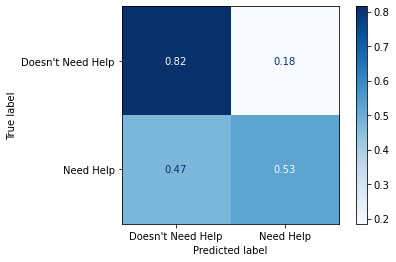

In [88]:
evaluate(gridsearch_cb,X_train,y_train,X_val,y_val)

Gridsearching gave us a overfitted model.

### Evaluation

Our best predictive model so far is the catboost model with feature selection.

Accuracy Score:
Train - 0.7654927654927655
Test - 0.6934889434889435
  
Precision Score:
Train - 0.7592039800995025
Test - 0.6108597285067874
  
Recall Score: 
Train - 0.5528985507246377
Test - 0.45226130653266333
  
F1 Score: 
Train - 0.639832285115304
Test - 0.5197305101058711
  
ROC_AUC: 
Train - 0.72344883734217
Test - 0.6427164922576022
  
  
Confusion matrix for test data


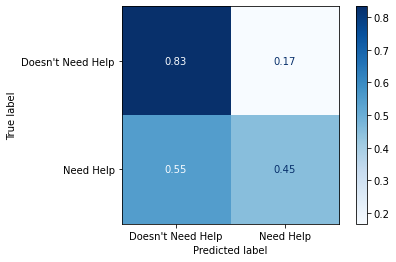

In [89]:
# evaluate final model on test set
evaluate(new_cb, X_train, y_train, X_test, y_test)

The model performance is consistent across training, testing and validation set. The model is not overfitted. Now let's look at feature importance.

In [90]:
# get feature importance for final model
new_cb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Q15.m,28.936742
1,Q30.a,23.135176
2,Q54:4,17.194360
3,Q31,16.806516
4,Q41,13.927206
...,...,...
221,Q59:1,0.000000
222,Q59:2,0.000000
223,Q59:3,0.000000
224,Q59:4,0.000000


The the top 4 features are overwhelmingly more important than the rest. Let's see what they are.

In [91]:
info('Q15.m')

column name: Q15.m
     
Question: Concern about my mental health as a result of PhD study
     
number of null values: 3068
     
Value Count:
3rd                                                        510
2nd                                                        490
4th                                                        452
5th                                                        416
1st                                                        366
6th                                                        296
7th                                                        246
8th                                                        195
9th                                                        121
10th                                                       118
11th                                                        87
12th                                                        78
13th                                                        41
14th                                 

How concerned a student is when they go into a PhD program is a strong predictor of how likely they are going to ask for help for anxiety and depression. The reason could be if the student is very concerned about their mental health, they are more mental health conscious, therefore better at recognizing when they need to ask for help. Or it could be that a student who already has a vulnerability to mental health issues would be more concerned about it.

This is a innate quality of the student, not environmental. There's nothing the school can do about it so we will not focus on that.

In [92]:
info('Q30.a')

column name: Q30.a
     
Question: Mental health and wellbeing services in my university are tailored and appropriate to the needs of PhD students
     
number of null values: 20
     
Value Count:
Neither agree nor disagree                                                                                         1667
Somewhat disagree                                                                                                  1459
Somewhat agree                                                                                                     1436
Strongly disagree                                                                                                  1296
Strongly agree                                                                                                      482
Prefer not to say                                                                                                   152
Mental health and wellbeing services in my university are tailored and appropriate

If the university have better mental health services students are more likely to reach out for help. 

In [93]:
info('Q54:4')

column name: Q54:4
     
Question: What would you do differently right now if you were starting your programme? 
     
number of null values: 3559
     
Value Count:
Nothing                                                                          2953
What would you do differently right now if you were starting your programme?        1
Name: Q54:4, dtype: int64


This column is either nothing or null. The ones who have nothing they would do differently are more likely to have better mental health, because they have no regrets. But the ones who wrote down something they want to do differently would be the ones that have null values in this column. That makes a lot of sense, but also the schools can't do anything about it.

In [94]:
info('Q31')

column name: Q31
     
Question: Do you feel that you have experienced bullying in your PhD program?
     
number of null values: 7
     
Value Count:
No                                                                     4902
Yes                                                                    1388
Prefer not to say                                                       215
Do you feel that you have experienced bullying in your PhD program?       1
Name: Q31, dtype: int64


Bullying is a strong factor in needing mental health help. This result is very consistent with our inferential model.

Our logistic regression shows that a student is twice as likely to seek help if they are bullied VS if they are not bullied. That means if student A normally has 20% likelihood of seeking mental health help. He gets bullied the next day, his likelihood of seeking help will rise to 40%. That is quite a strong impact.

If we look deeper into this issue, we can see that nearly half are bullied by their supervisors, who hold a lot of power over their life and their future. 

![perpetrator](images/perpetrator.png)

Which explains why 57% of the students feel unable to speak out about their experience, fearing retaliation. 

![silence](images/silence.png)

(These two images are from the [EDA report by the surveyer](https://figshare.com/s/74a5ea79d76ad66a8af8?file=18543281) that I mentioned before.)


#### Score Evaluation

- Our model has an accuracy of 70%.

- Our model has a recall of 0.43, which means out of all the students who need mental health help, 42% will be caught by our model, 57% will fall through the crack.

- Even though this is not very accurate , it is still way better than not doing anything.

## Conclusions

### Recommendations:
- Hammer down on bullying
- Automate student mental health monitoring procedure with predictive model
- Work with mental health professionals to develop better questions for survey

Both our logistic regression and decision tree model indicates that whether a student is bullied in school is the biggest indicator of whether they would need help with anxiety and depression. Our more complicated catboost model confirms that it is the most important enironmental contributor to student mental health problems.

It's very hard for students to voice their concerns in school because in a lot of cases their bully is their supervisor. By having an automated procedure in place, student can be best protected against their bullies. They will be able to speak out without fear of retaliation and still get the help they need.

According to Stanford's [statistics](https://irds.stanford.edu/data-findings/doctoral-degree-programs-enrollment-and-demographics), there are 4720 new PhD students enrolled in 2021. Even though our model's predictive power is limited, it's going to be able to pick out 43% of the 36% of students who needs help with anxiety and depression, that's 730 students who gets the attention and care they need instead of suffering in silence. 